## Label Correction

This notebook finds mislabeled samples (e.g., where a subject who was supposed to be running stopped for a break). The samples are dropped based on thresholds of the standard deviation of the x attribute of acceleration that were picked based on inspection of the scatter plots of the std. dev. of the acceleration vectors for each subject and each activity.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [2]:
training = pd.read_pickle('../../data/thigh100.pkl')

In [3]:
holdout = pd.read_pickle('../../data/thigh_validate100.pkl')

In [26]:
alldata = pd.concat([training,holdout], axis=0)

In [29]:
alldata.subject.value_counts()

5     246600
8     244800
3     228500
9     225300
1     221300
11    220600
13    219500
12    213000
6     212100
10    210900
2     208300
4     205700
15    197300
7     191400
14    182300
Name: subject, dtype: int64

## Create grouped dataset with standard deviations


In [30]:
deviation = alldata.groupby(['activity','subject','sample_num']).std()

In [31]:
deviation.head()

attr_time_gyr  attr_x_gyr  attr_y_gyr  \
activity     subject sample_num                                          
climbingdown 1       0              580.462094    0.003208    0.004846   
                     1              580.299681    0.003425    0.004124   
                     2              581.183295    0.003822    0.005771   
                     3              578.568396    0.003180    0.003495   
                     4              578.837414    0.024814    0.020402   

                                 attr_z_gyr  attr_time_acc  attr_x_acc  \
activity     subject sample_num                                          
climbingdown 1       0             0.002879     580.380247    0.014366   
                     1             0.002853     581.257359    0.014516   
                     2             0.003249     581.039058    0.014756   
                     3             0.002691     578.122638    0.012145   
                     4             0.025647     578.969036    0.054283   

                                 attr_y_acc  attr_z_acc  label  
activity     subject sample_num                                 
climbingdown 1       0             0.011870    0.013727    0.0  
                     1             0.011234    0.014858    0.0  
                     2             0.010528    0.013092    0.0  
                     3             0.009997    0.011631    0.0  
                     4             0.056692    0.052140    0.0

In [32]:
deviation.reset_index(inplace=True)  # converts multiindex into columns

In [33]:
deviation.columns

Index(['activity', 'subject', 'sample_num', 'attr_time_gyr', 'attr_x_gyr',
       'attr_y_gyr', 'attr_z_gyr', 'attr_time_acc', 'attr_x_acc', 'attr_y_acc',
       'attr_z_acc', 'label'],
      dtype='object')

In [48]:
# this function plots the standard deviation of the triaxial acceleration data by subject and by activity
def plot_std(dataframe,activity):
    for subject in range(1,16):
        plt.clf()
        df=dataframe[(dataframe['activity'] == activity) & (dataframe['subject'] == subject)] #subset the data by subject & activity
        title = activity+", subject: "+str(subject)+" Accelerometer"
        ylabel="acceleration"
        plt.figure(figsize=(18,10))
        plt.scatter(df.sample_num, df.attr_x_acc,s=3,c='r')
        plt.scatter(df.sample_num, df.attr_y_acc,s=3,c='b')
        plt.scatter(df.sample_num, df.attr_z_acc,s=3,c='g')
        plt.title(title)
        plt.xlabel('sample number')
        plt.ylabel(ylabel)
        plt.show();

<Figure size 432x288 with 0 Axes>

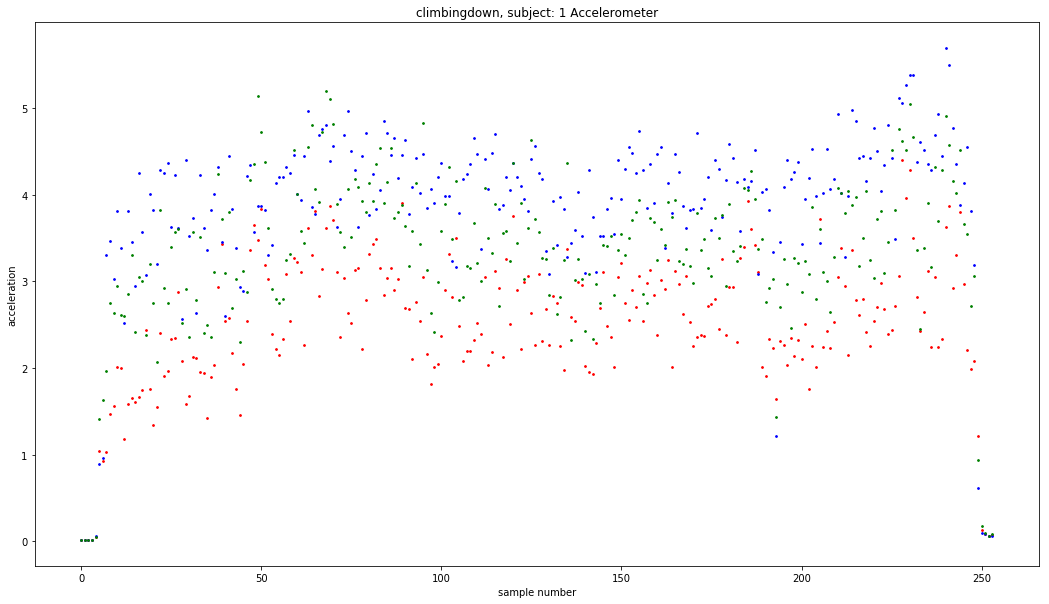

<Figure size 432x288 with 0 Axes>

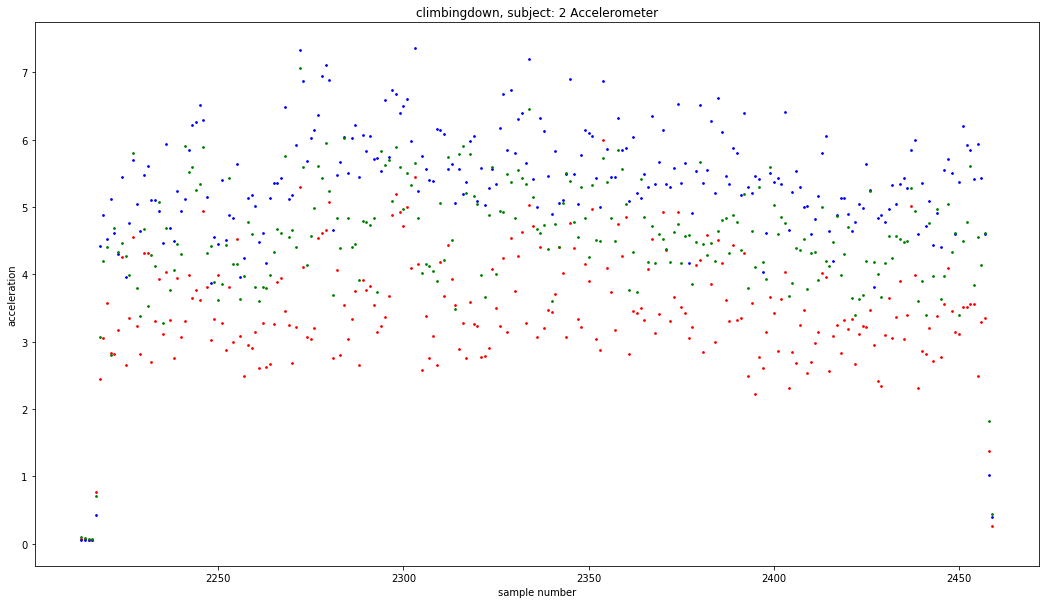

<Figure size 432x288 with 0 Axes>

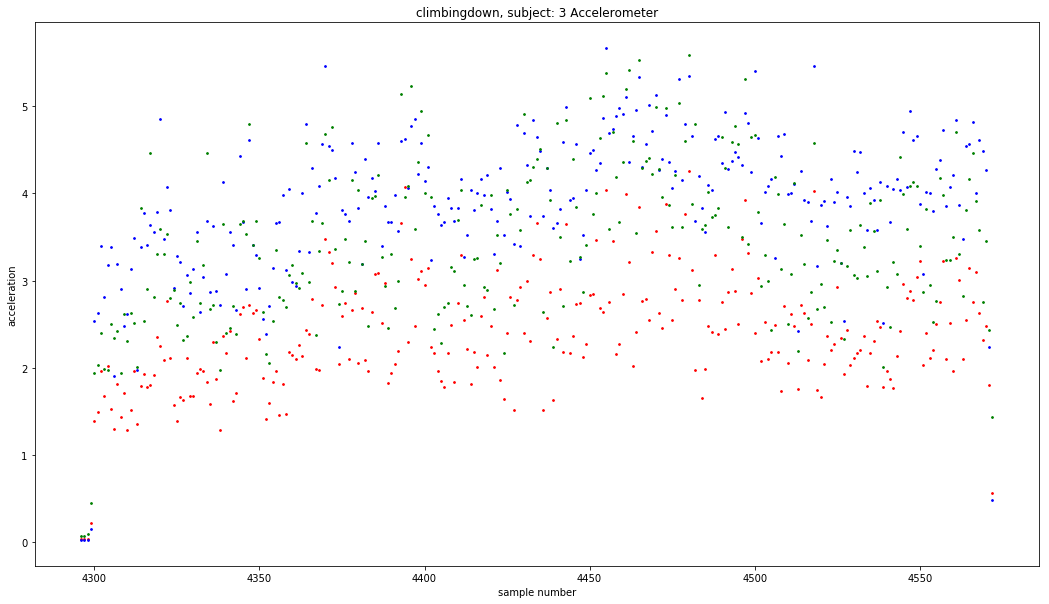

<Figure size 432x288 with 0 Axes>

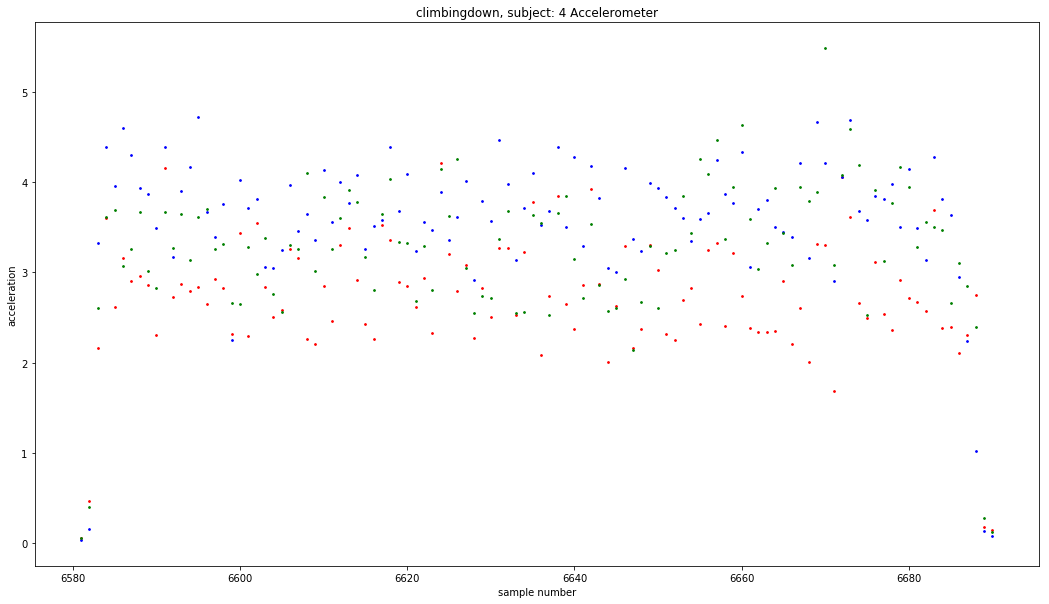

<Figure size 432x288 with 0 Axes>

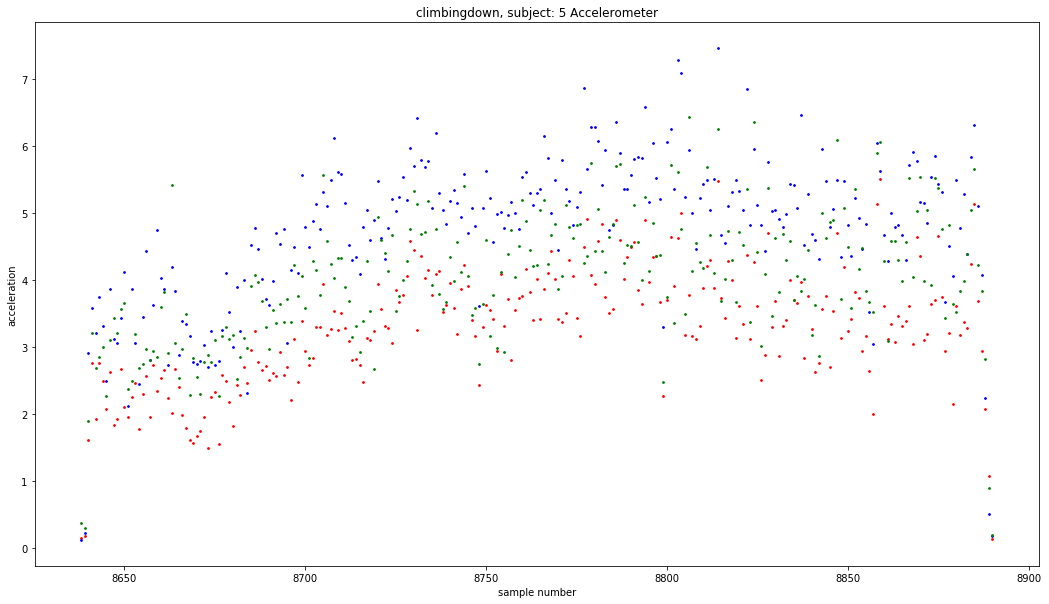

<Figure size 432x288 with 0 Axes>

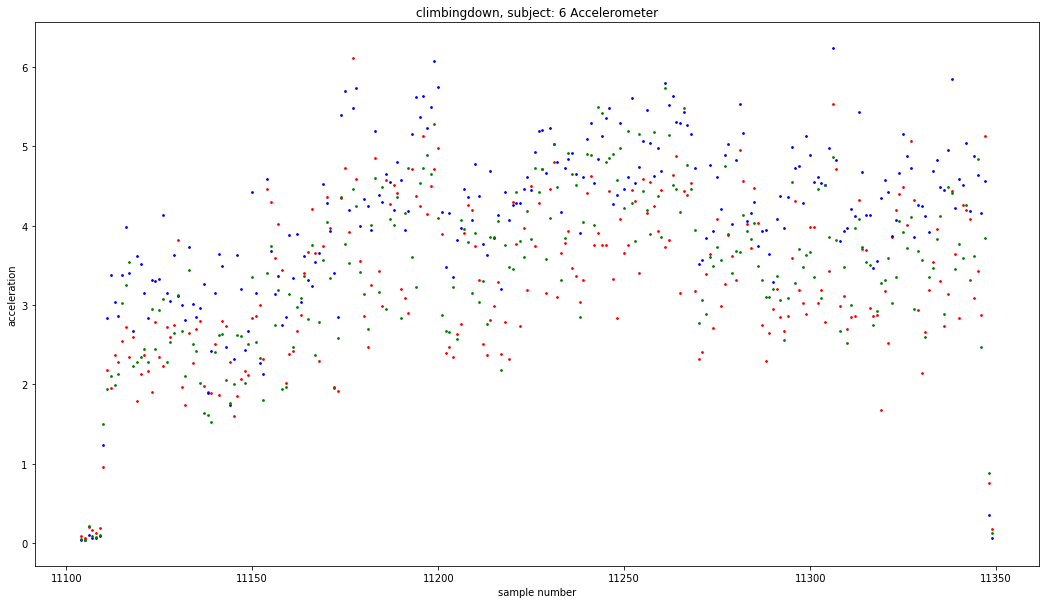

<Figure size 432x288 with 0 Axes>

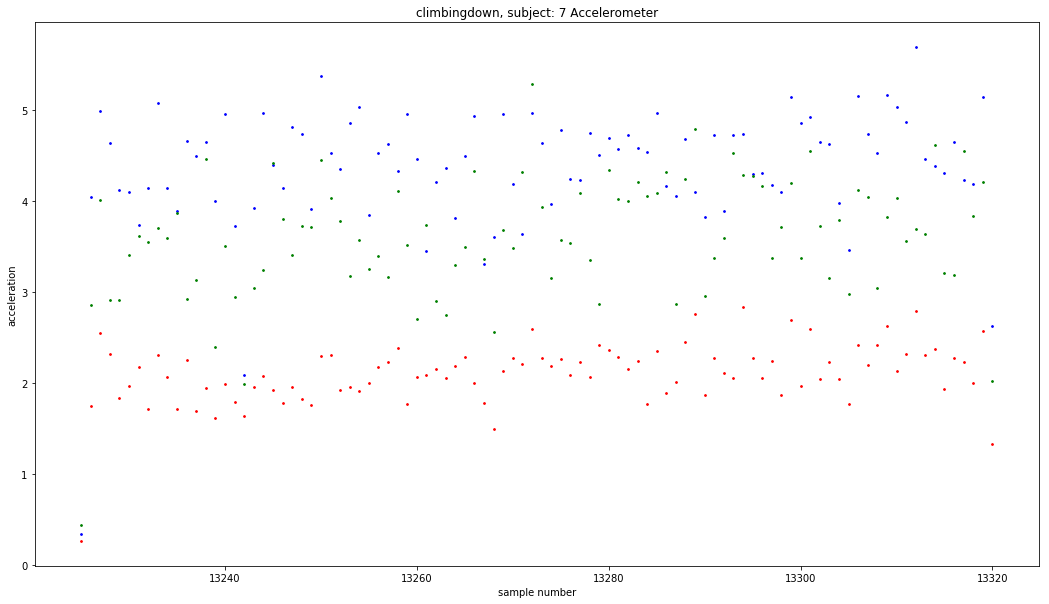

<Figure size 432x288 with 0 Axes>

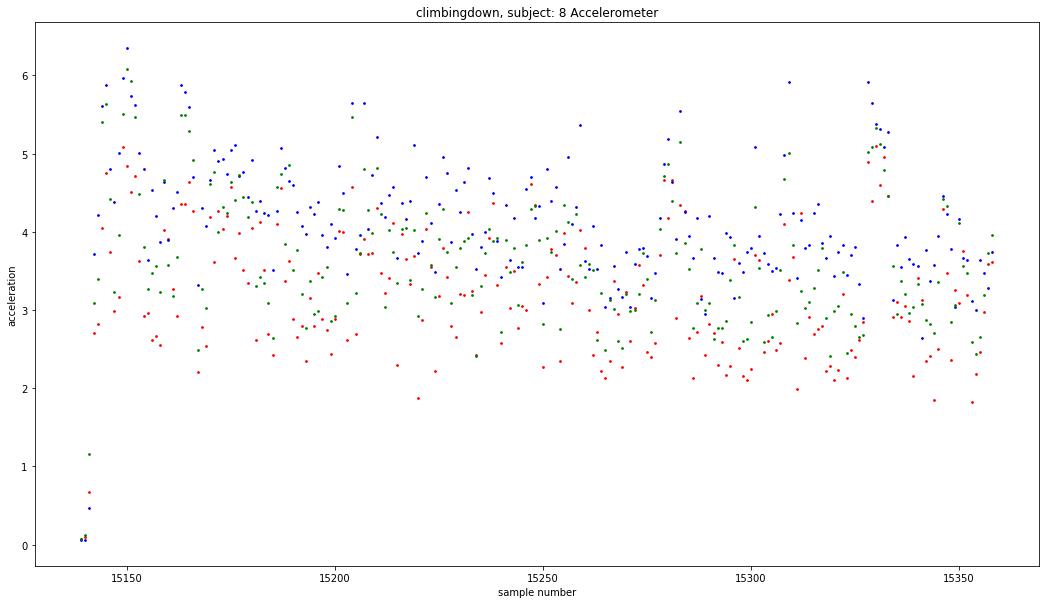

<Figure size 432x288 with 0 Axes>

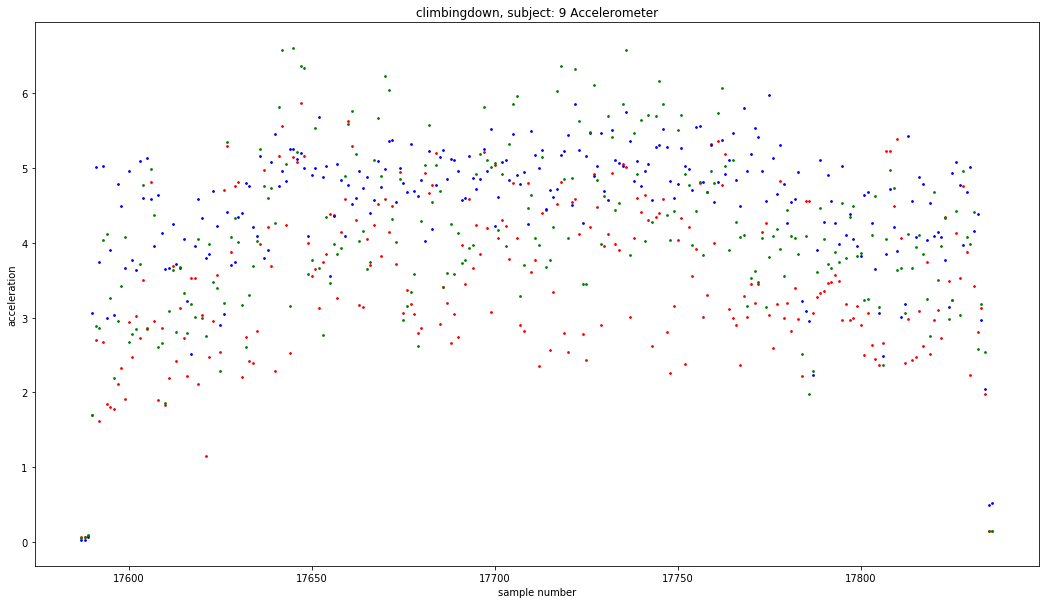

<Figure size 432x288 with 0 Axes>

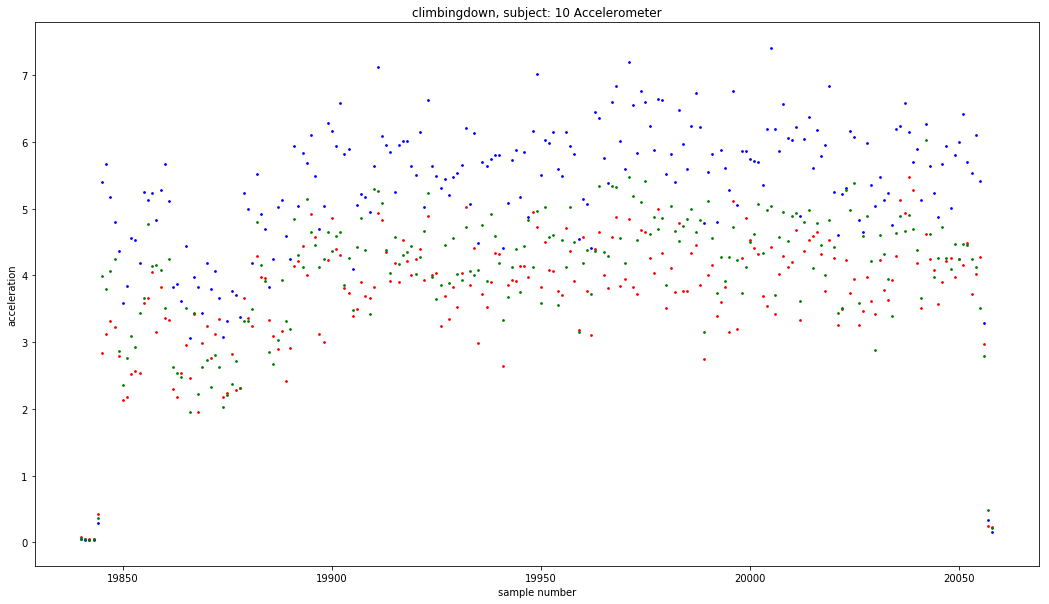

<Figure size 432x288 with 0 Axes>

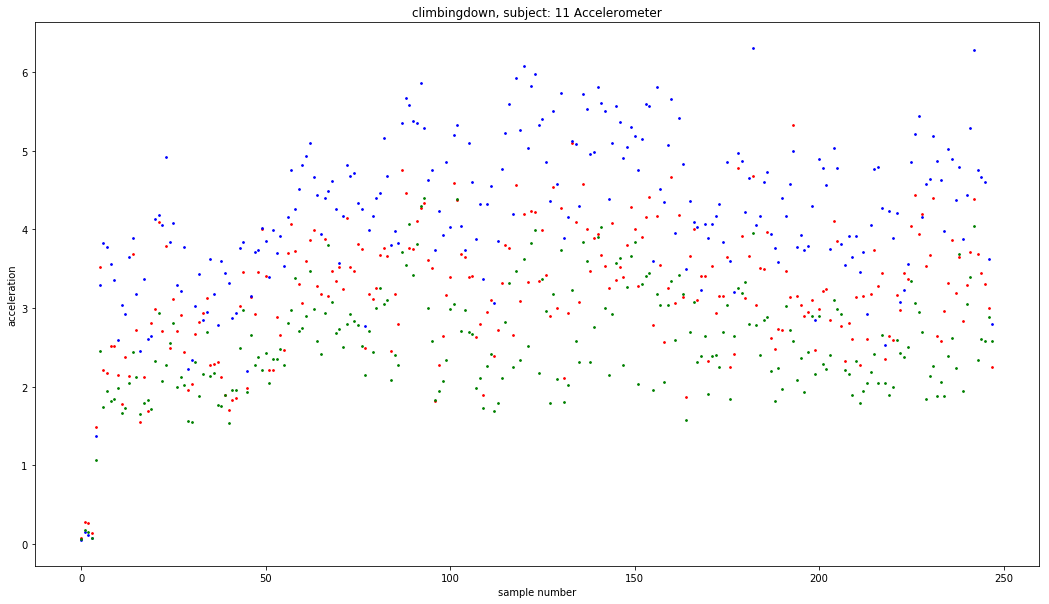

<Figure size 432x288 with 0 Axes>

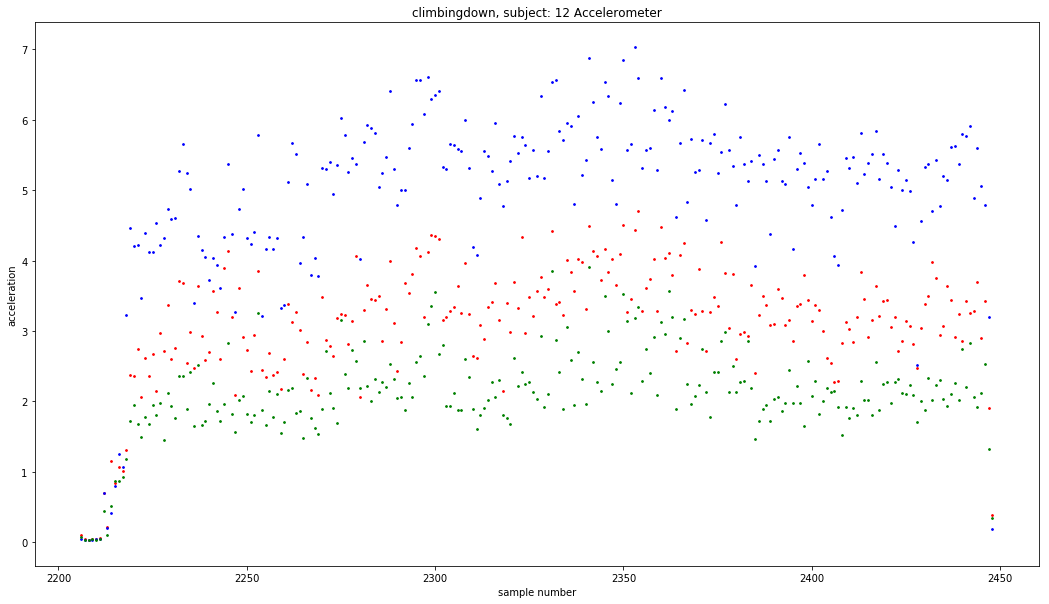

<Figure size 432x288 with 0 Axes>

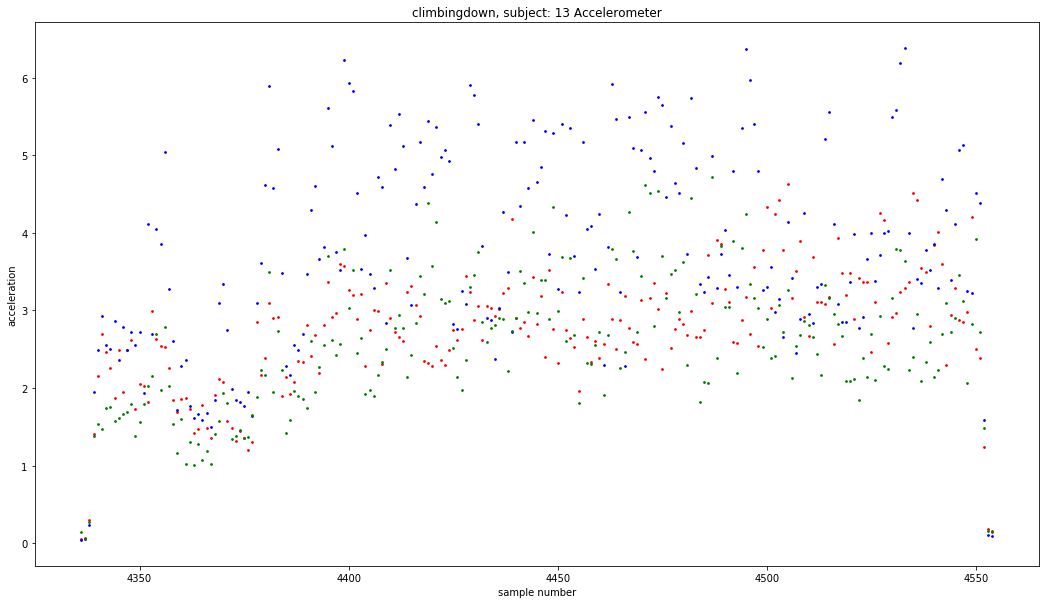

<Figure size 432x288 with 0 Axes>

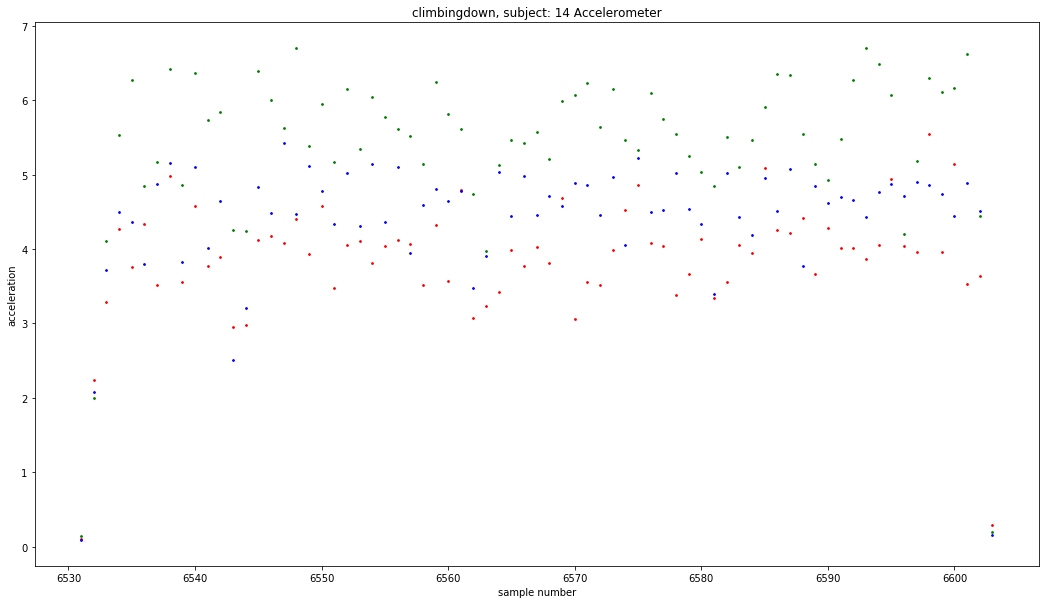

<Figure size 432x288 with 0 Axes>

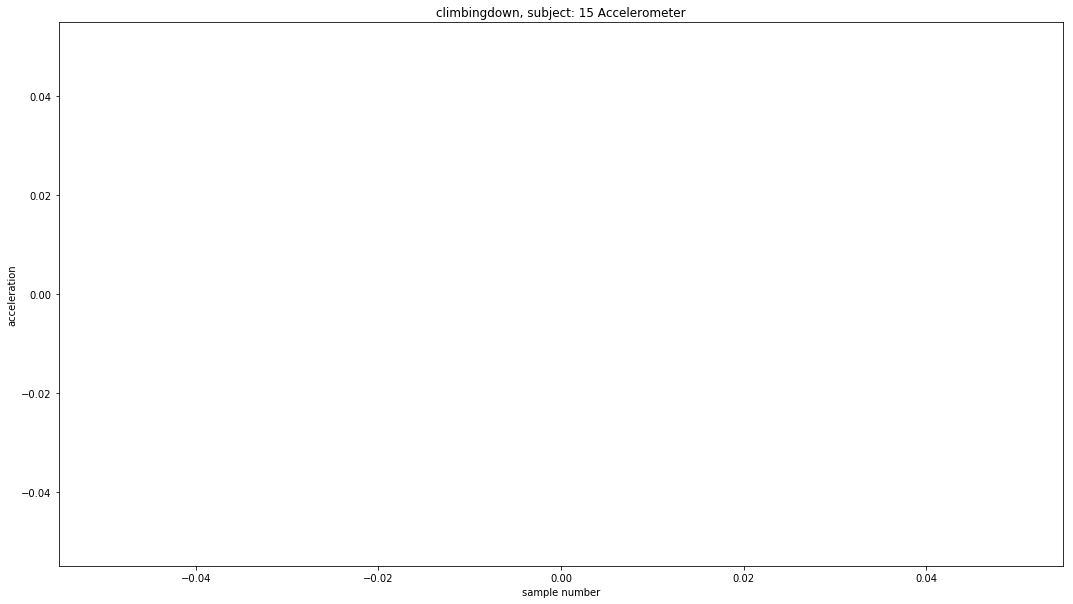

<Figure size 432x288 with 0 Axes>

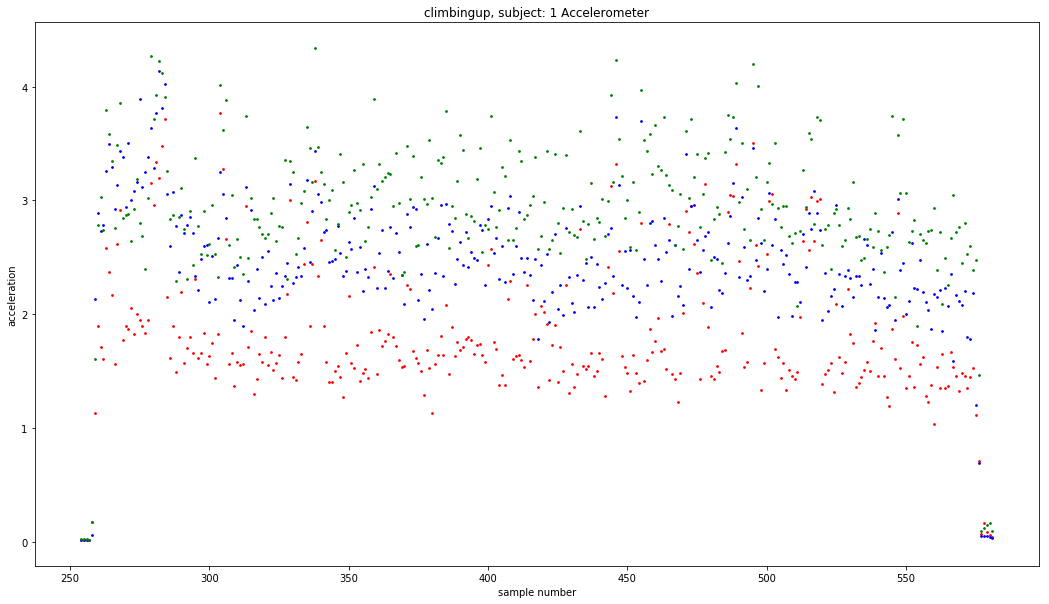

<Figure size 432x288 with 0 Axes>

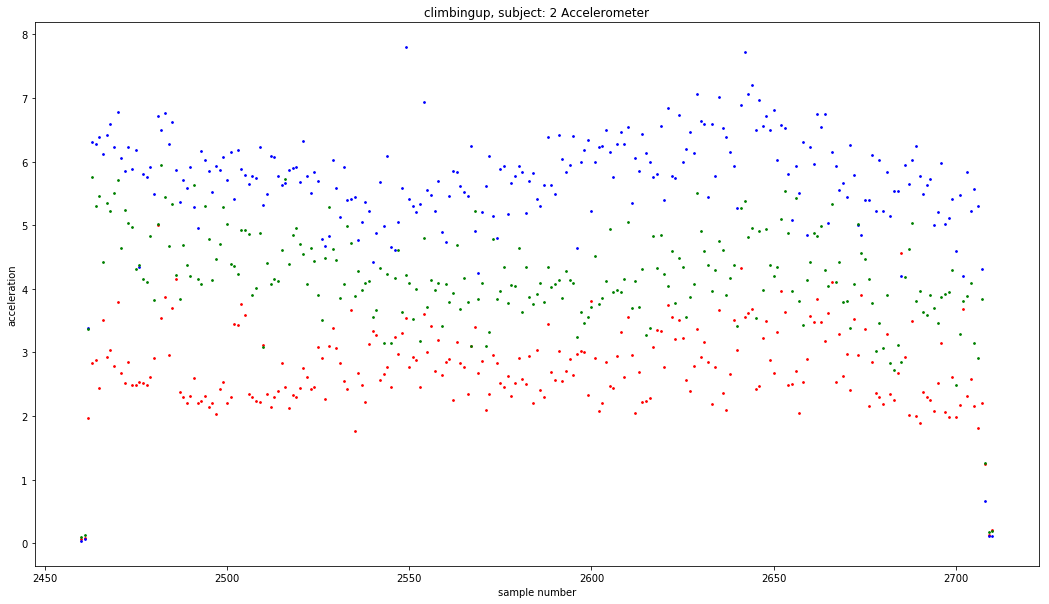

<Figure size 432x288 with 0 Axes>

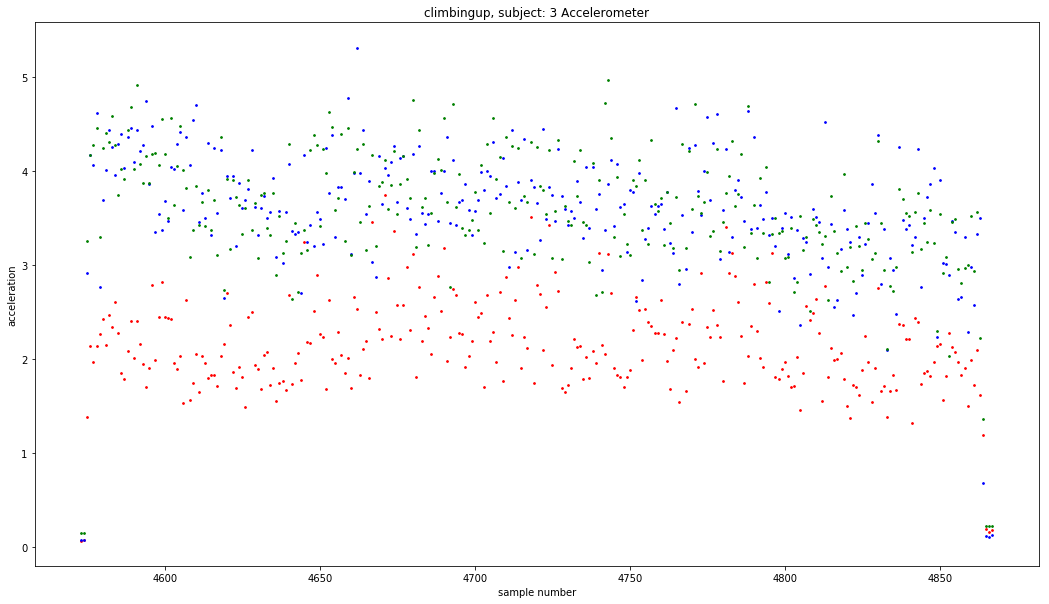

<Figure size 432x288 with 0 Axes>

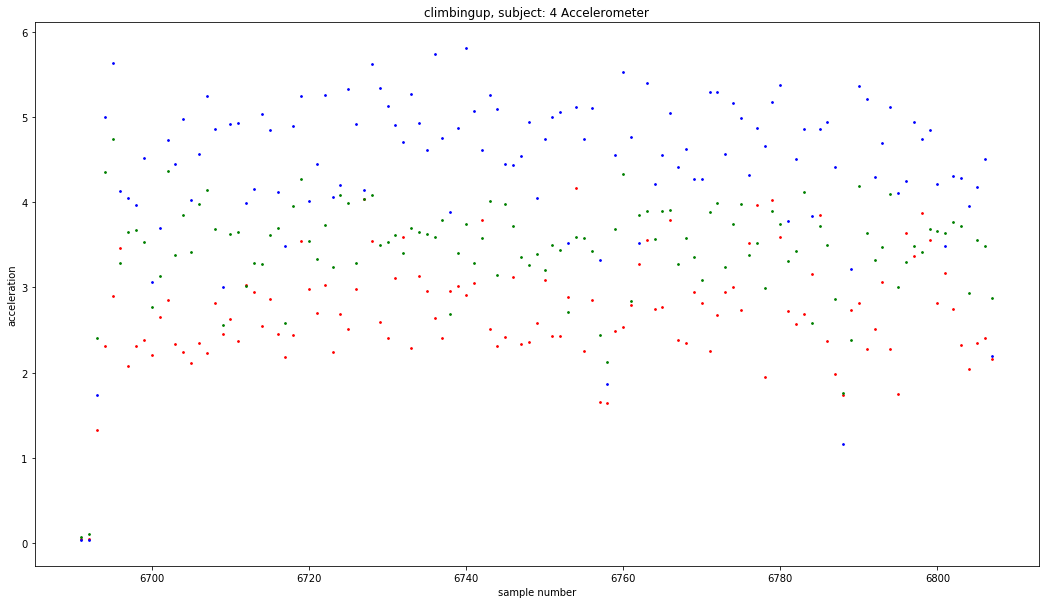

<Figure size 432x288 with 0 Axes>

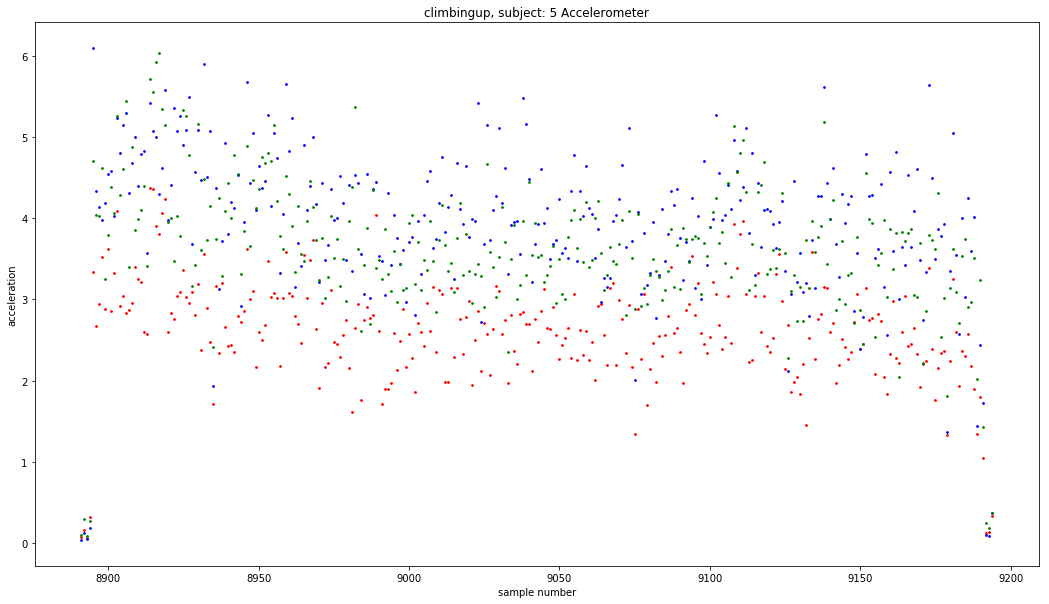

<Figure size 432x288 with 0 Axes>

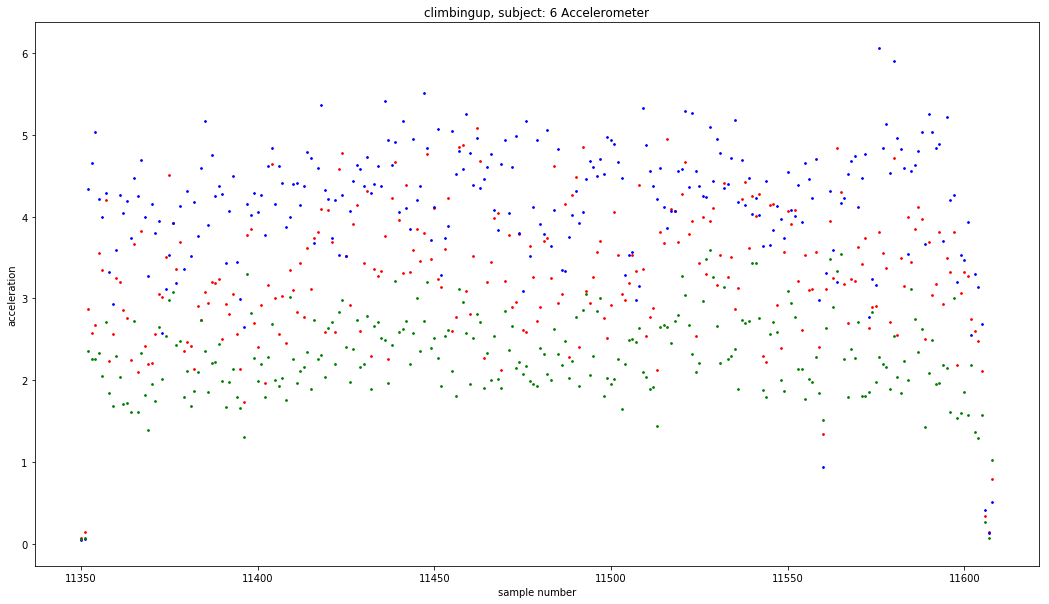

<Figure size 432x288 with 0 Axes>

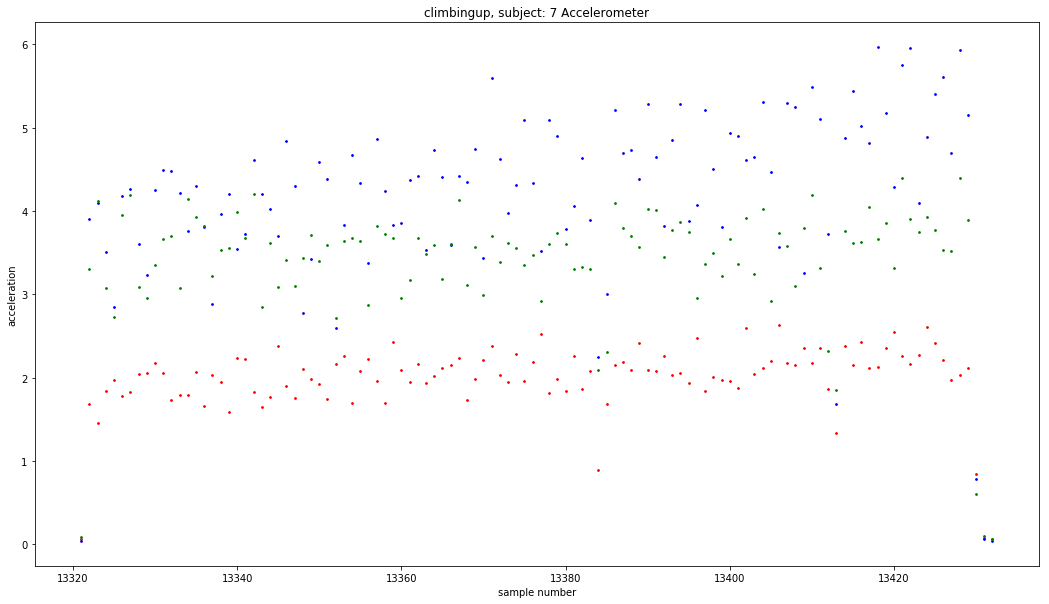

<Figure size 432x288 with 0 Axes>

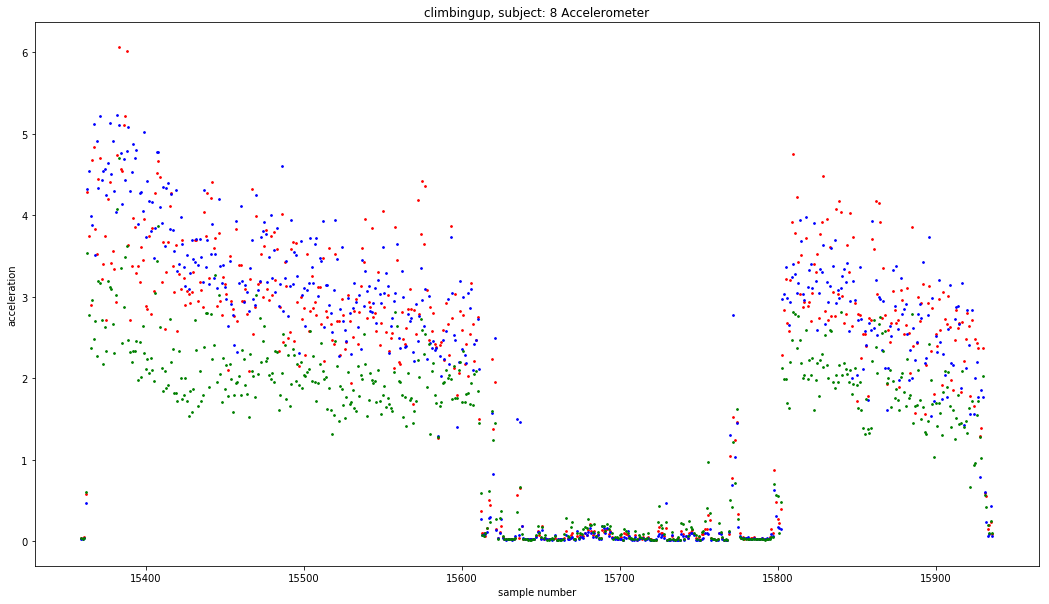

<Figure size 432x288 with 0 Axes>

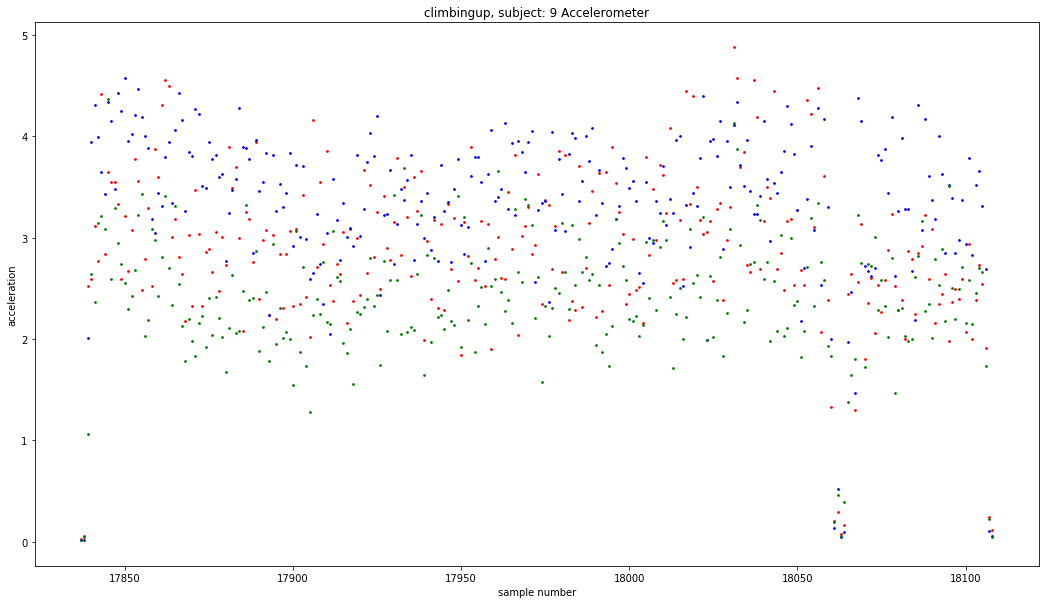

<Figure size 432x288 with 0 Axes>

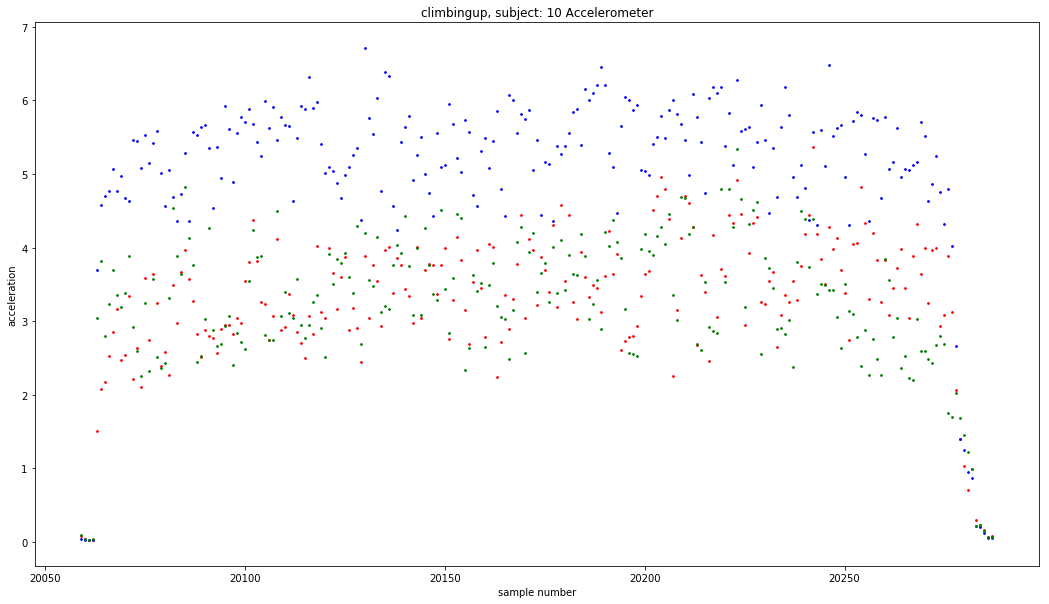

<Figure size 432x288 with 0 Axes>

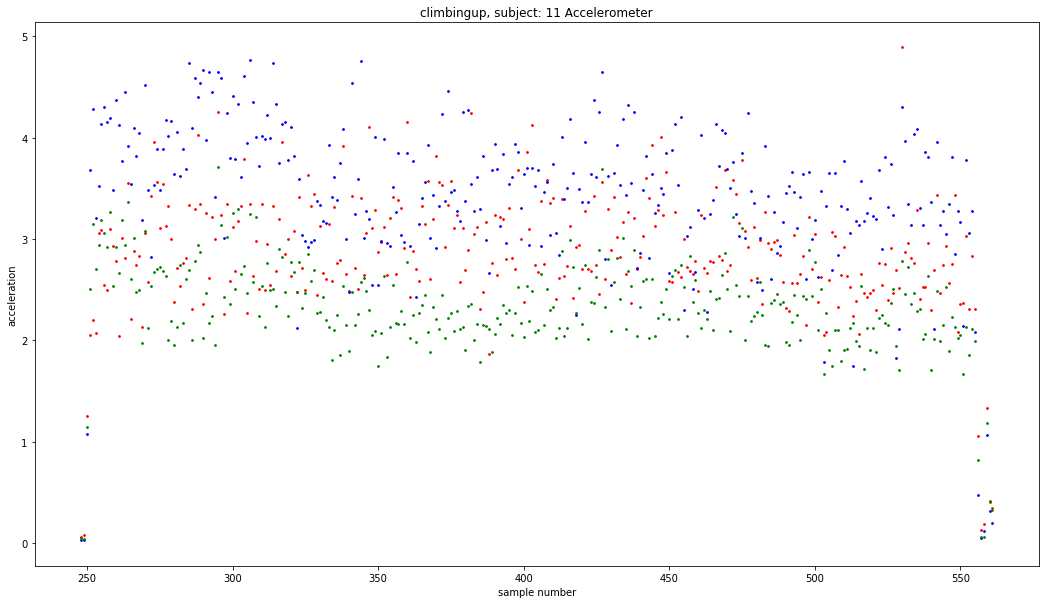

<Figure size 432x288 with 0 Axes>

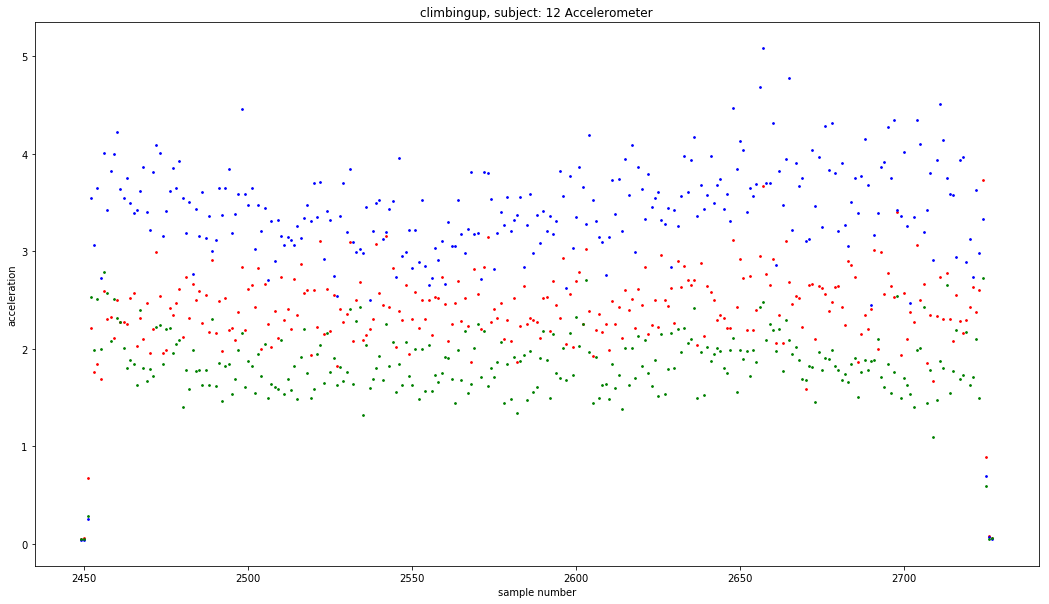

<Figure size 432x288 with 0 Axes>

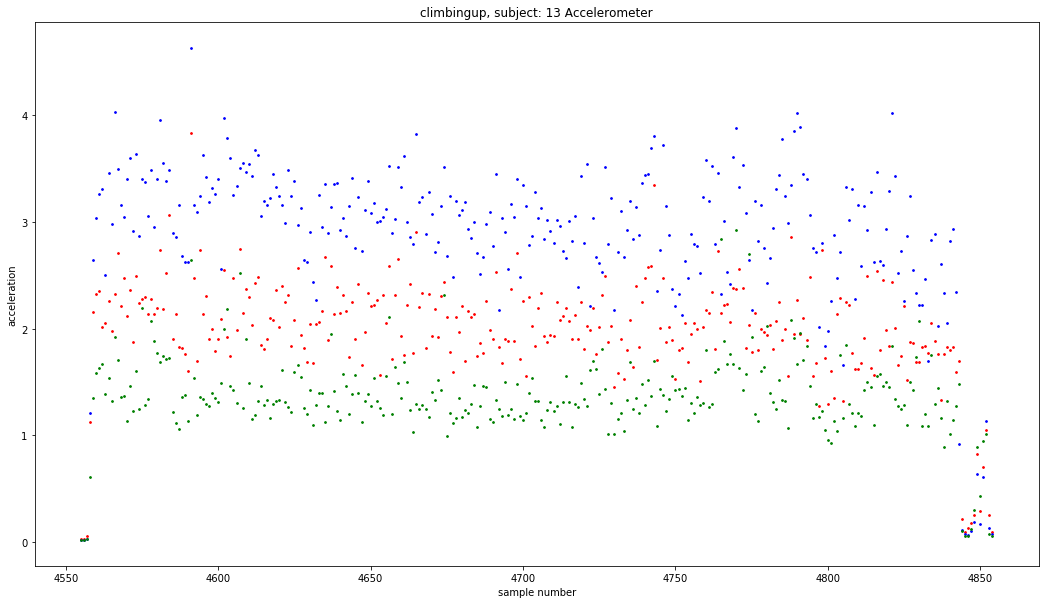

<Figure size 432x288 with 0 Axes>

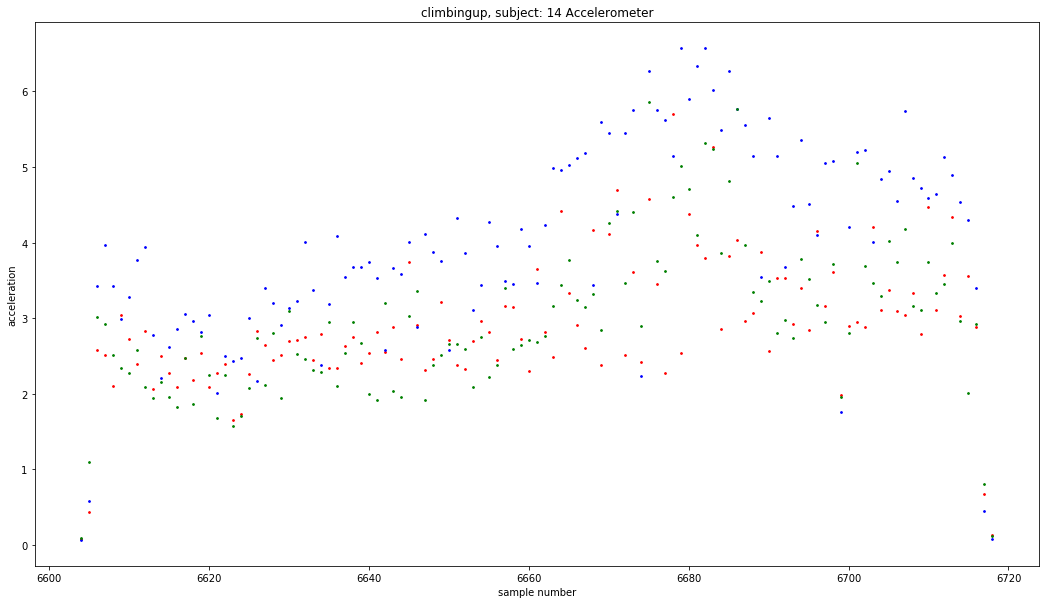

<Figure size 432x288 with 0 Axes>

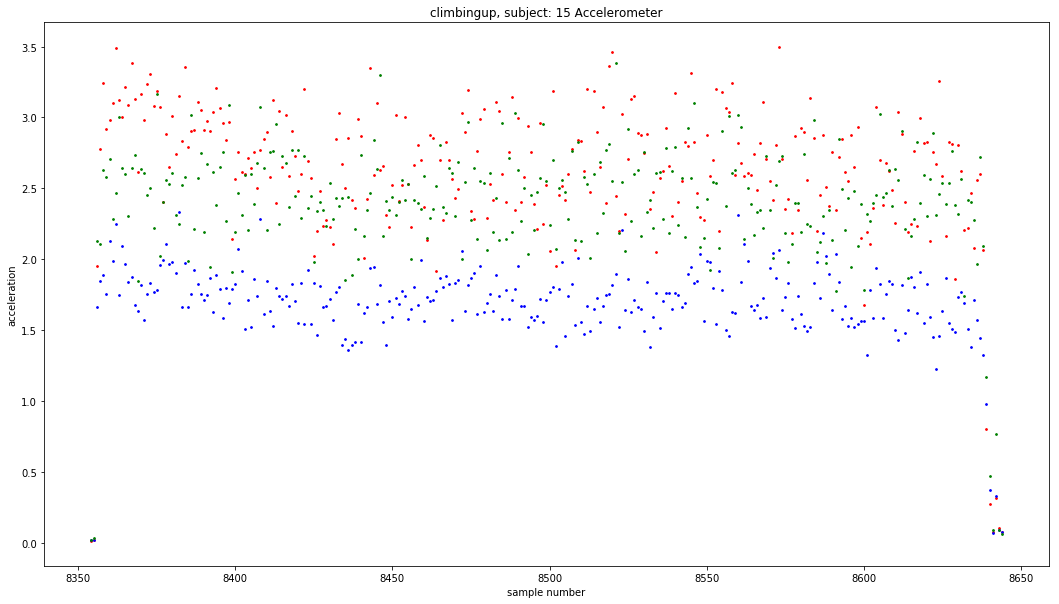

<Figure size 432x288 with 0 Axes>

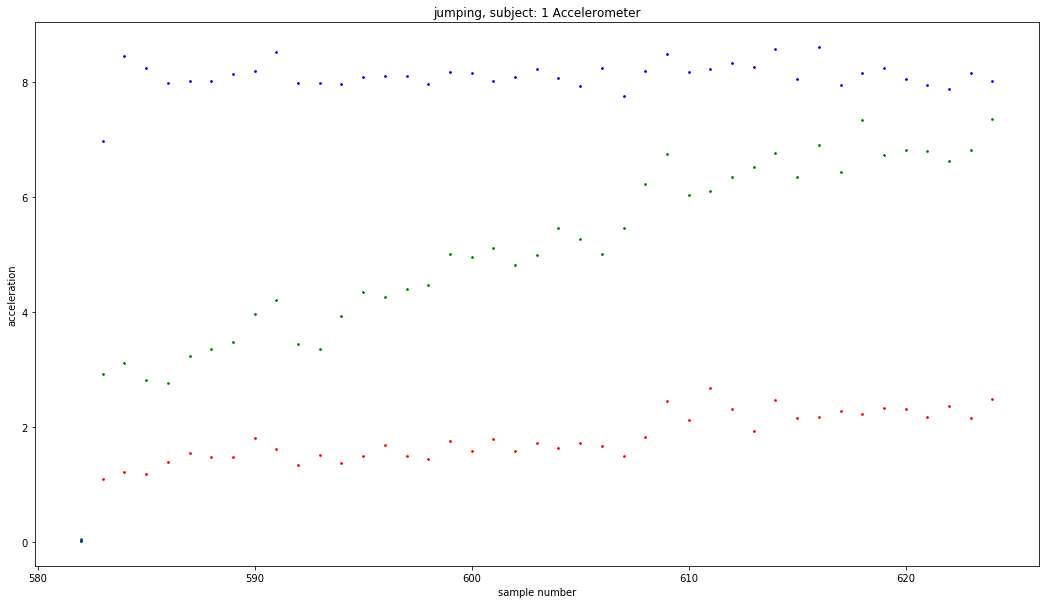

<Figure size 432x288 with 0 Axes>

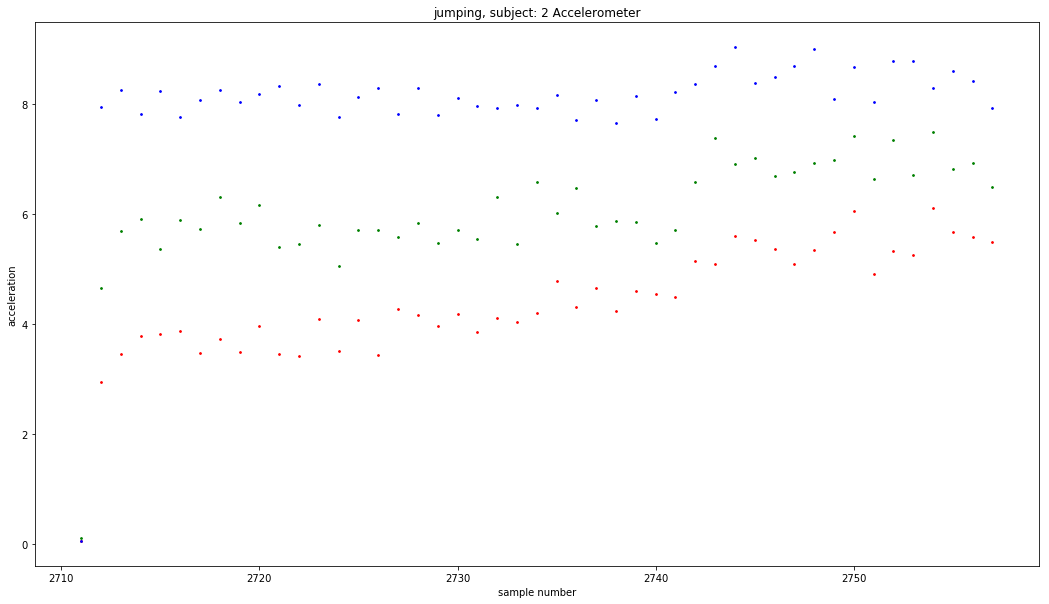

<Figure size 432x288 with 0 Axes>

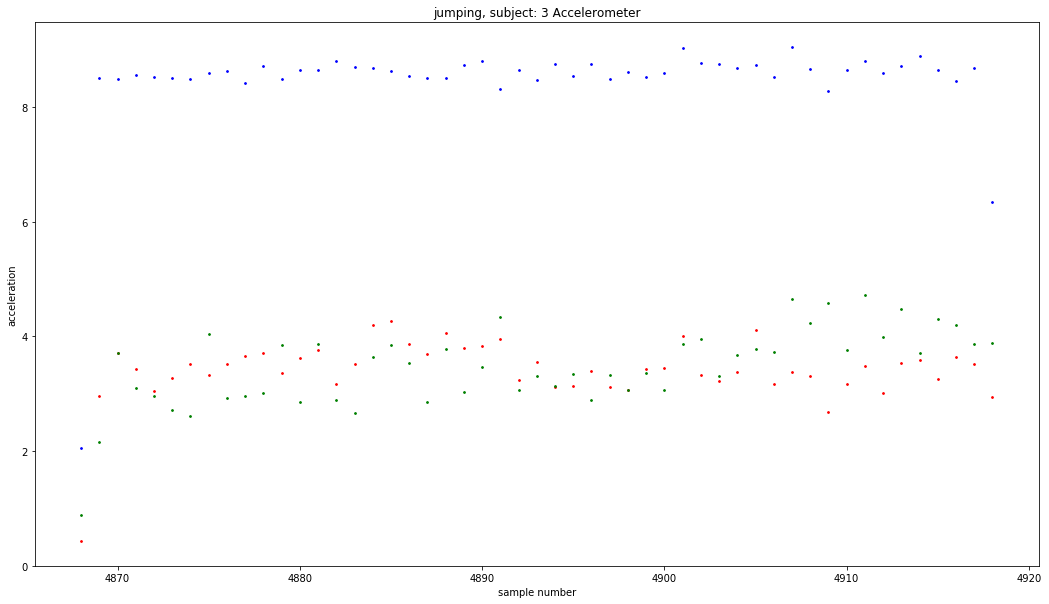

<Figure size 432x288 with 0 Axes>

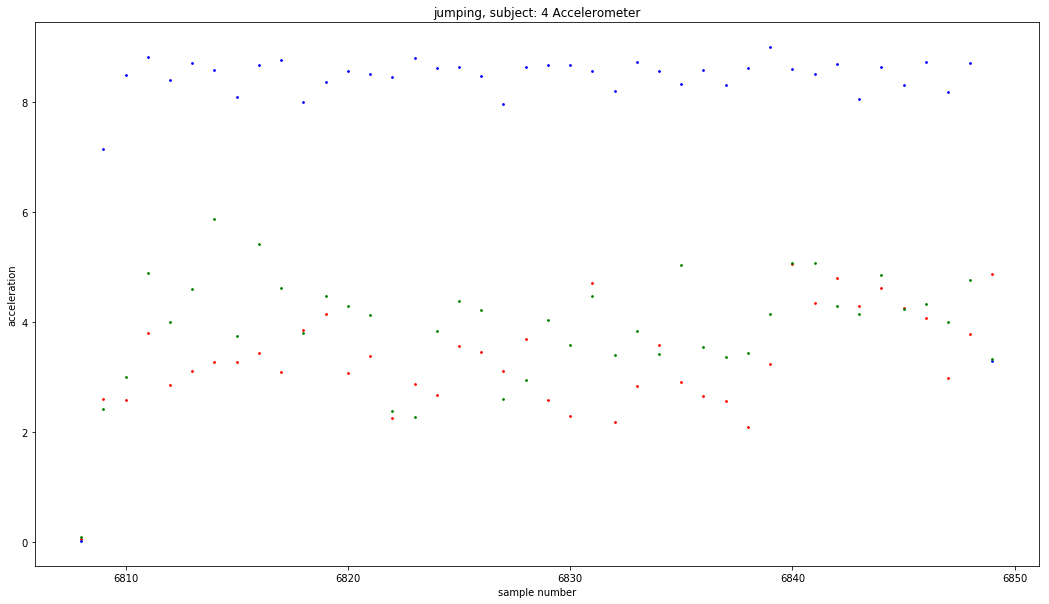

<Figure size 432x288 with 0 Axes>

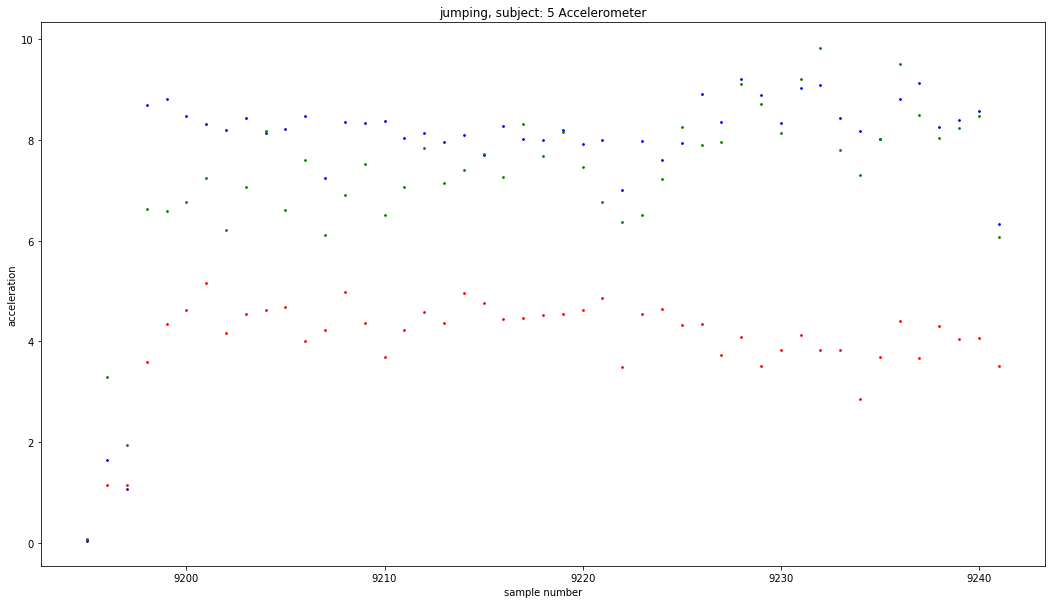

<Figure size 432x288 with 0 Axes>

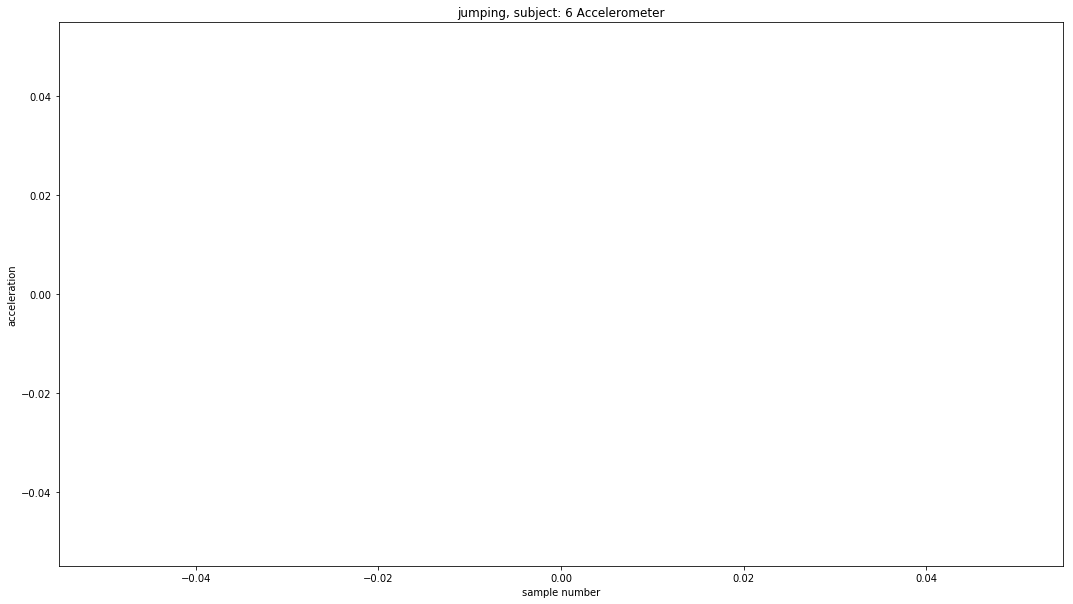

<Figure size 432x288 with 0 Axes>

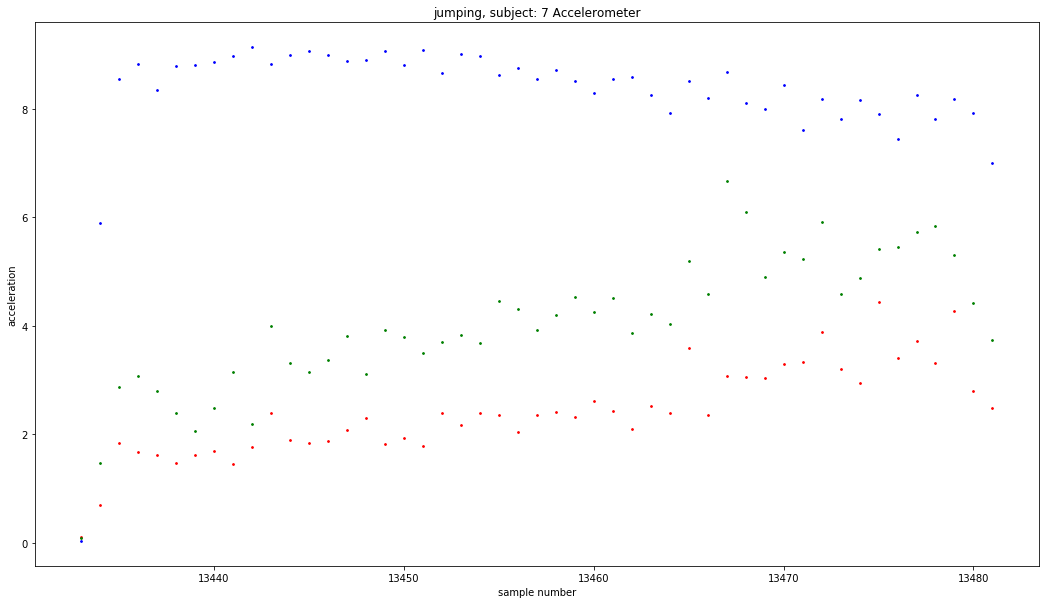

<Figure size 432x288 with 0 Axes>

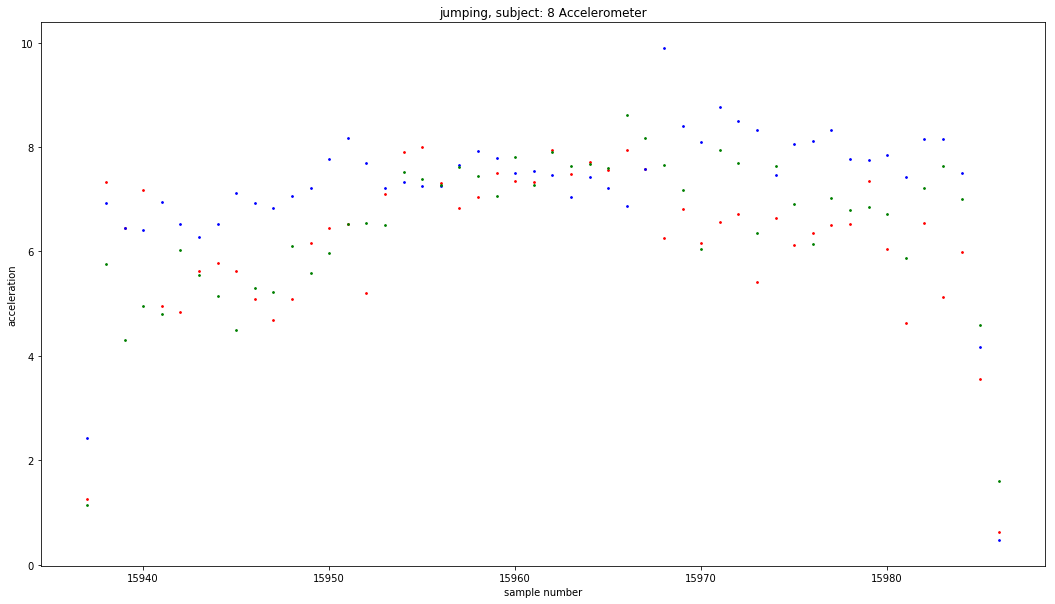

<Figure size 432x288 with 0 Axes>

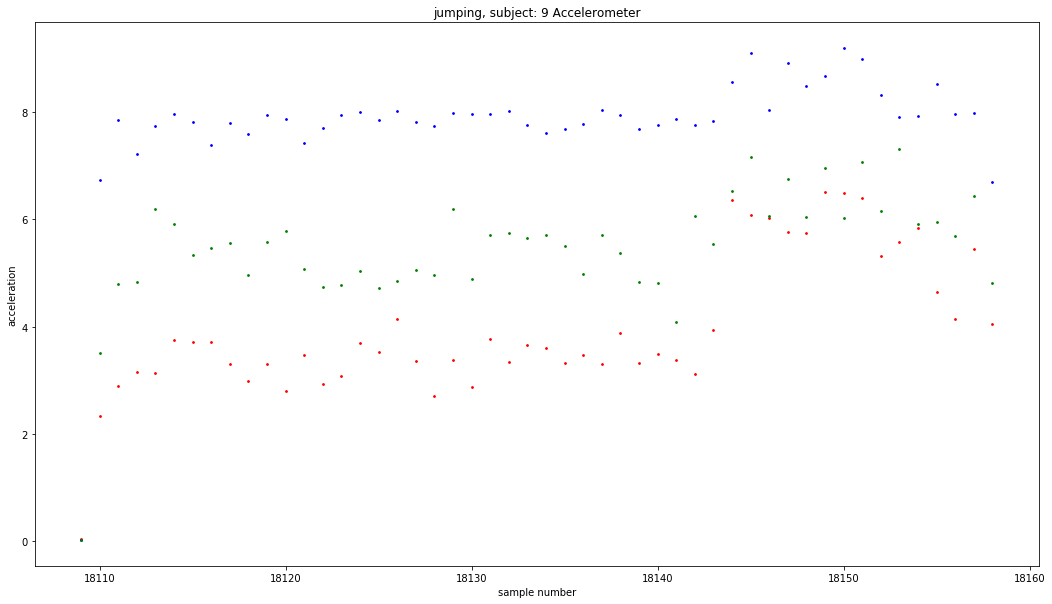

<Figure size 432x288 with 0 Axes>

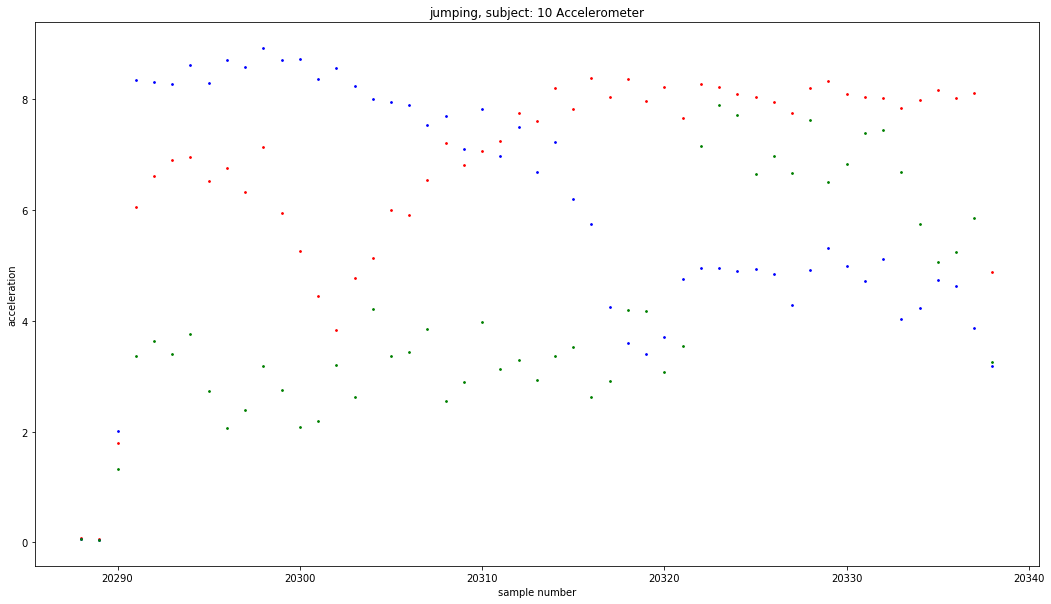

<Figure size 432x288 with 0 Axes>

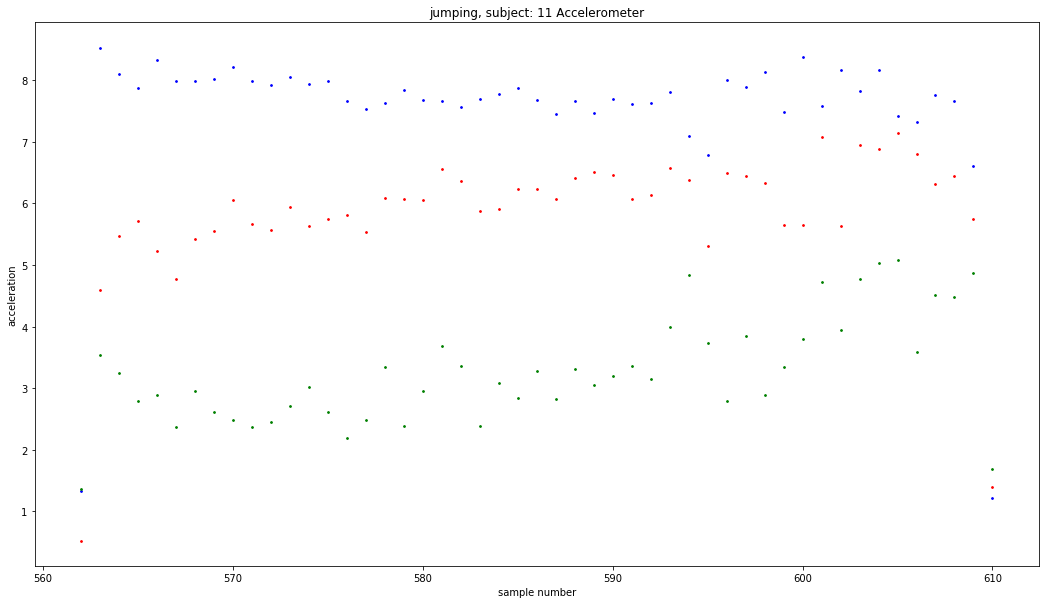

<Figure size 432x288 with 0 Axes>

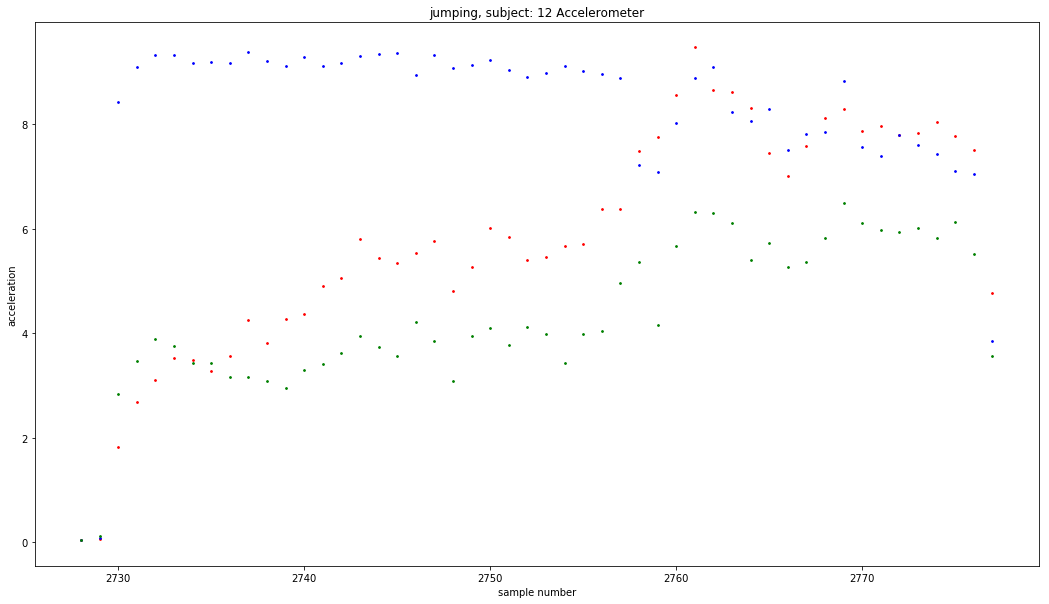

<Figure size 432x288 with 0 Axes>

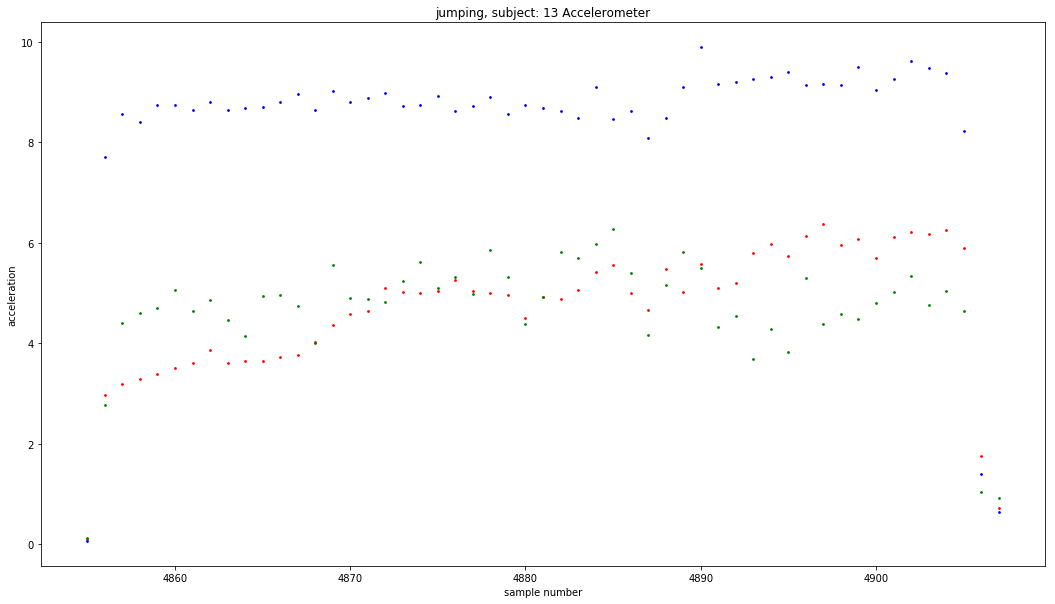

<Figure size 432x288 with 0 Axes>

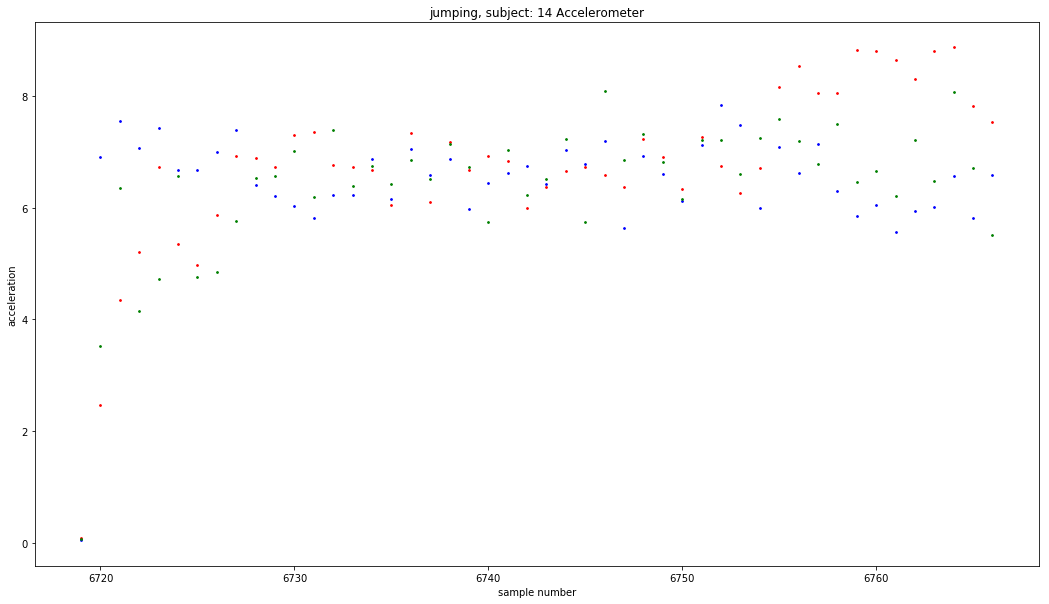

<Figure size 432x288 with 0 Axes>

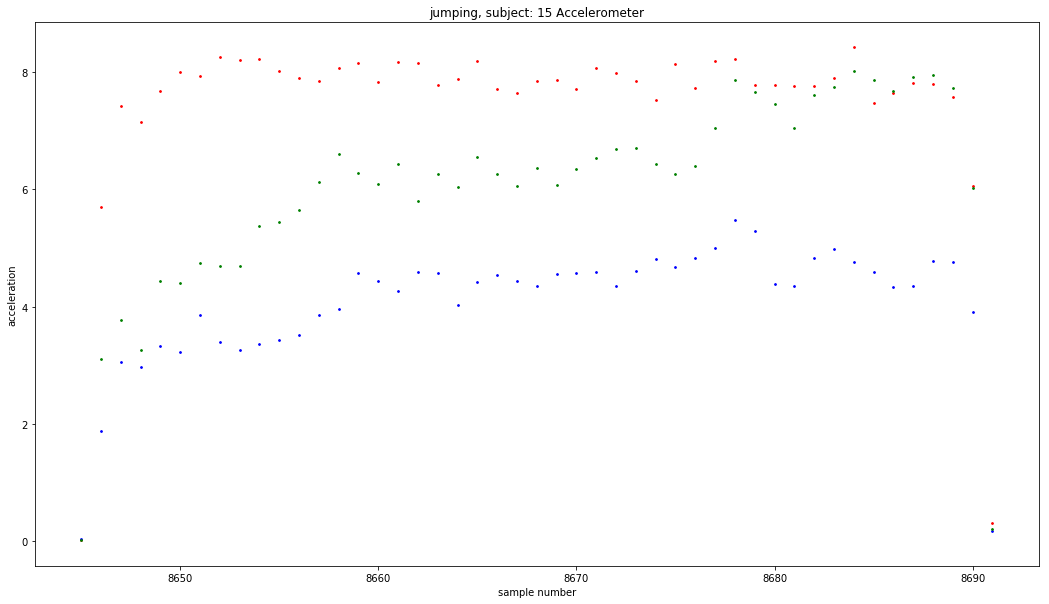

<Figure size 432x288 with 0 Axes>

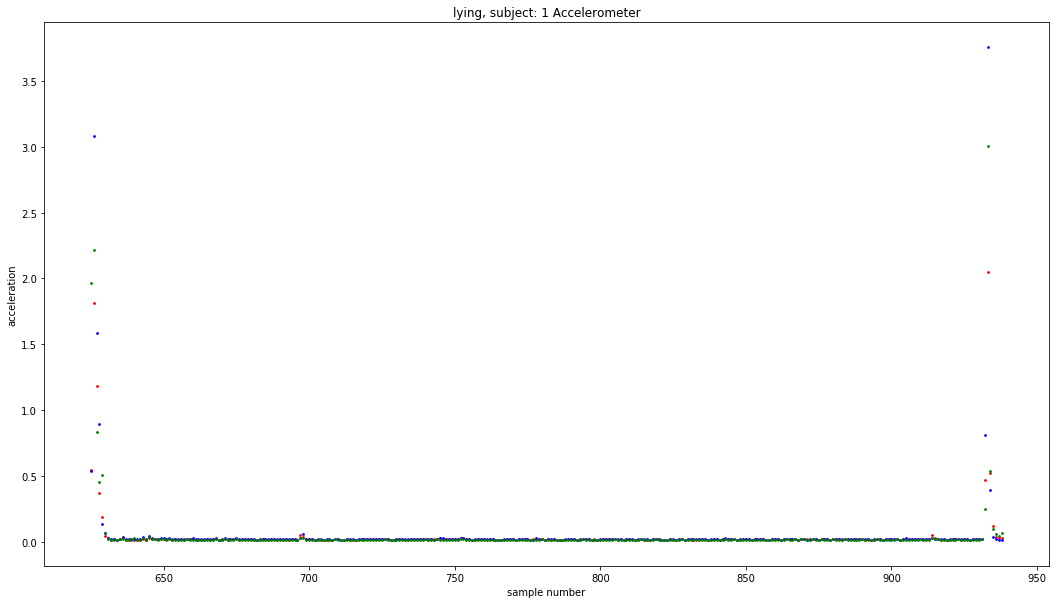

<Figure size 432x288 with 0 Axes>

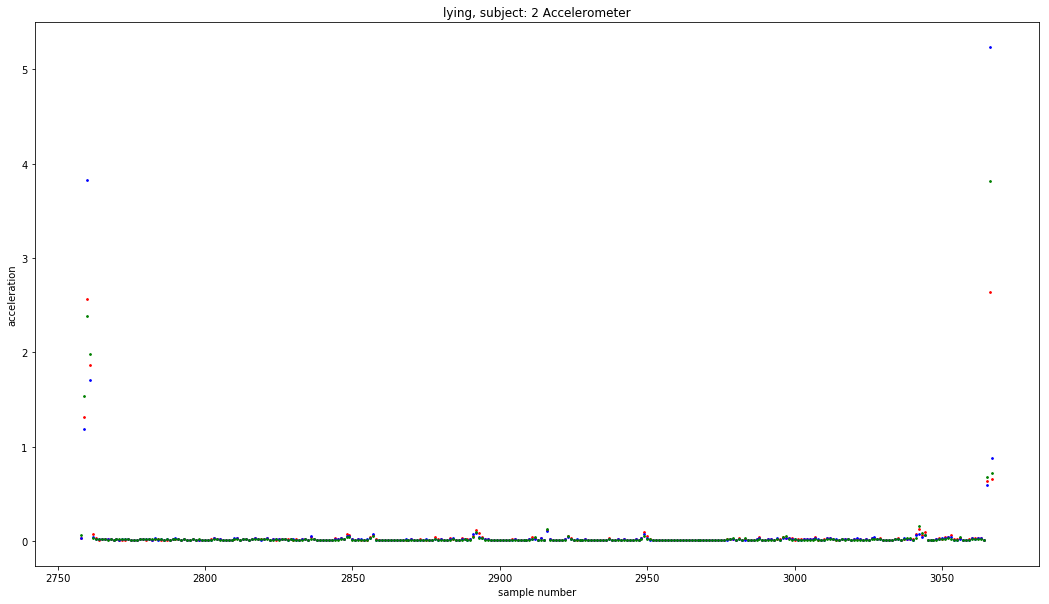

<Figure size 432x288 with 0 Axes>

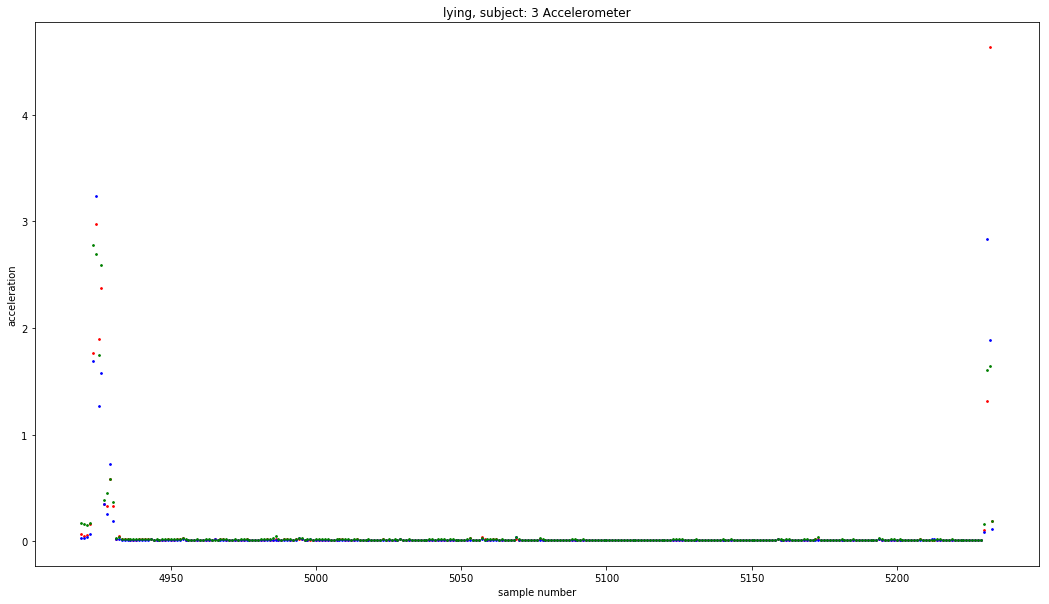

<Figure size 432x288 with 0 Axes>

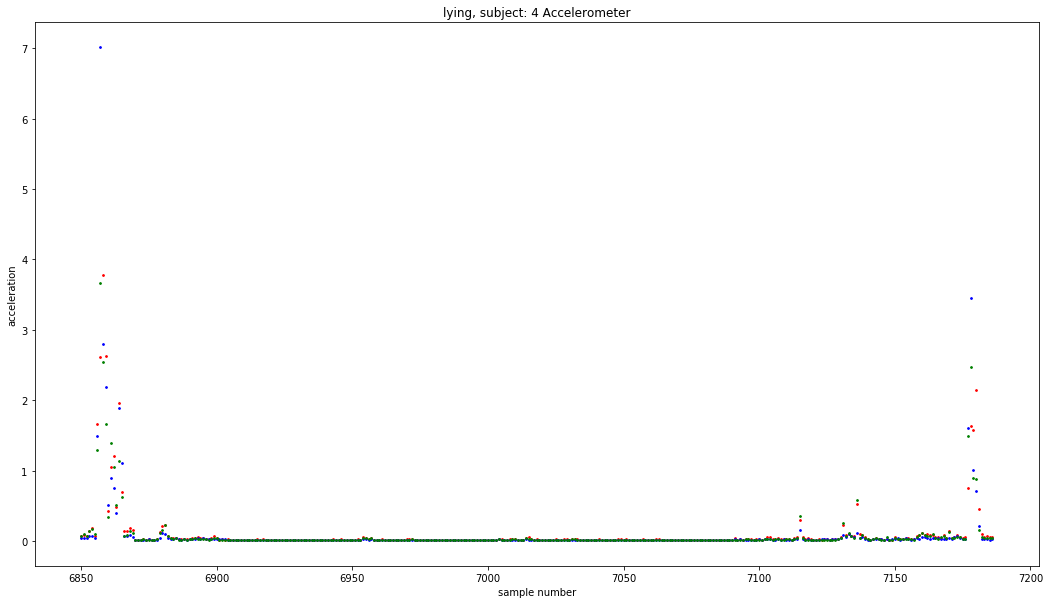

<Figure size 432x288 with 0 Axes>

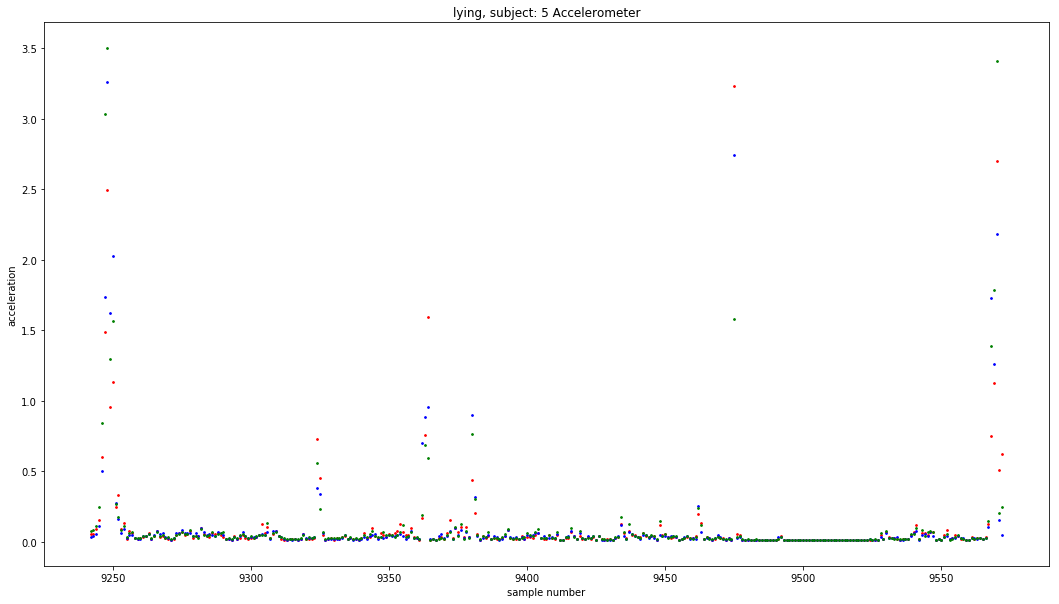

<Figure size 432x288 with 0 Axes>

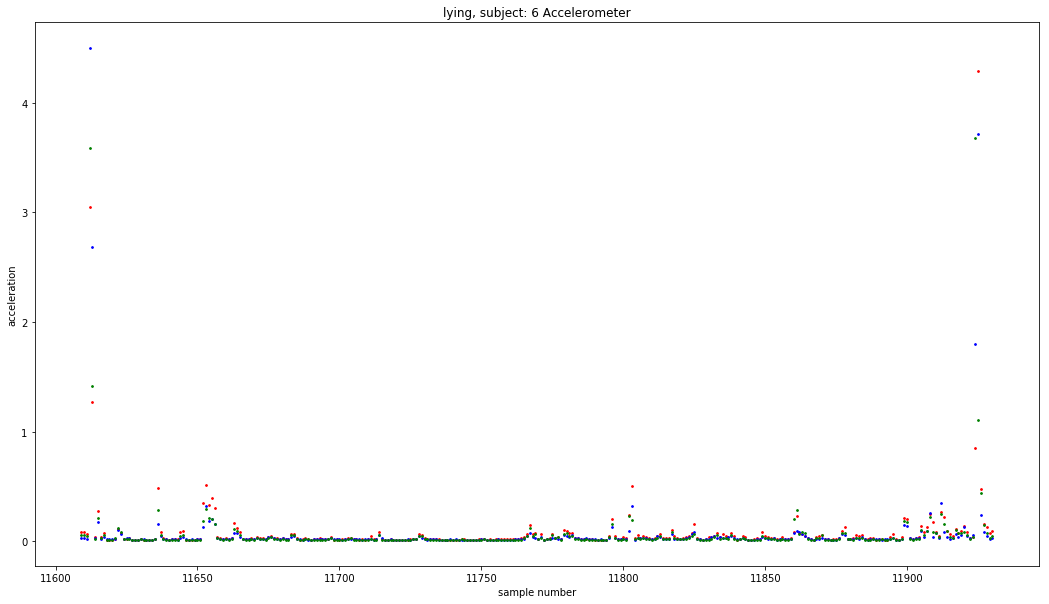

<Figure size 432x288 with 0 Axes>

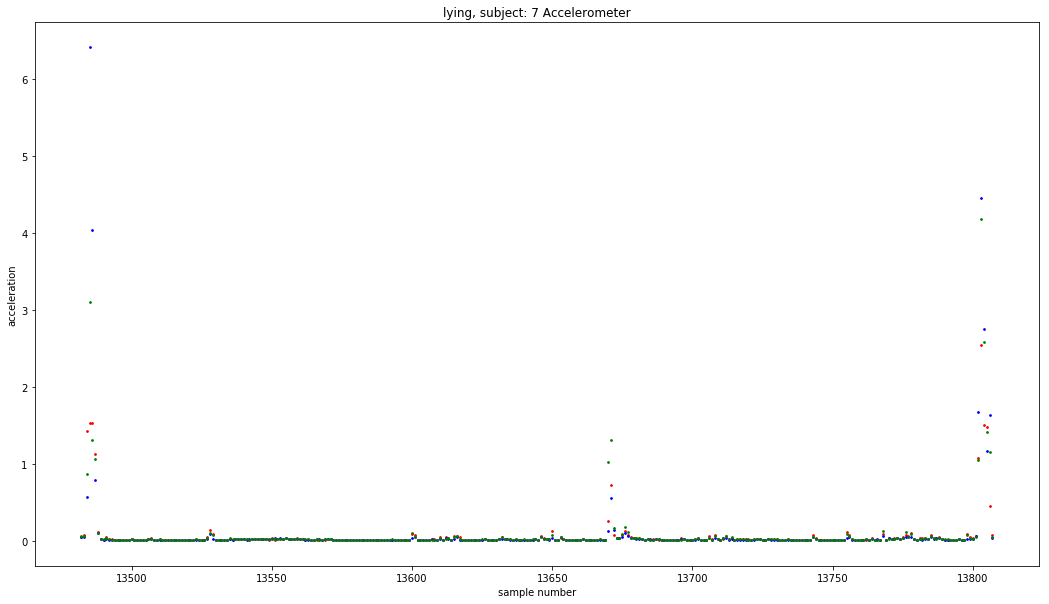

<Figure size 432x288 with 0 Axes>

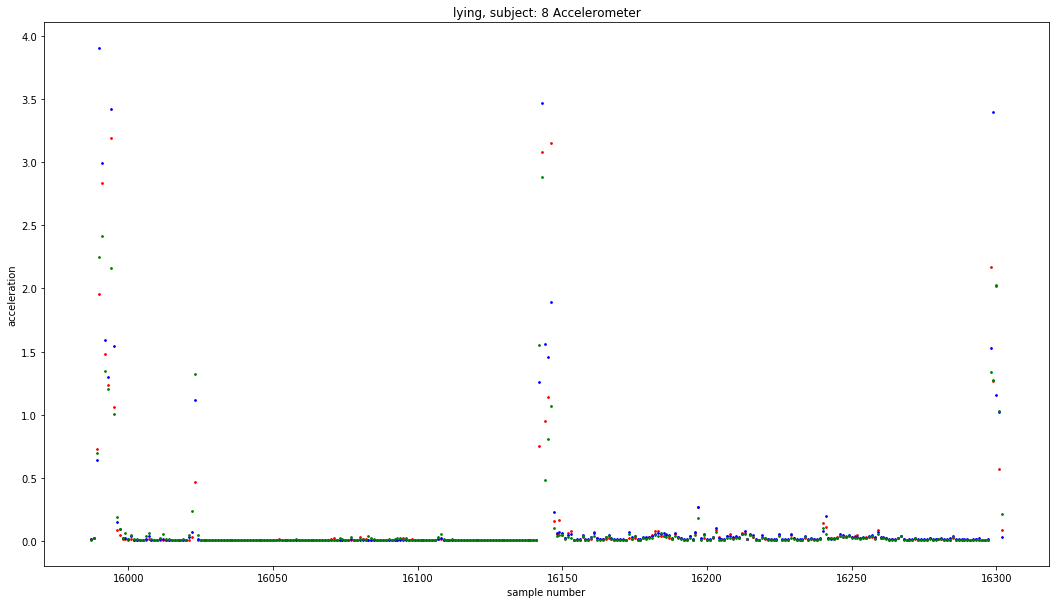

<Figure size 432x288 with 0 Axes>

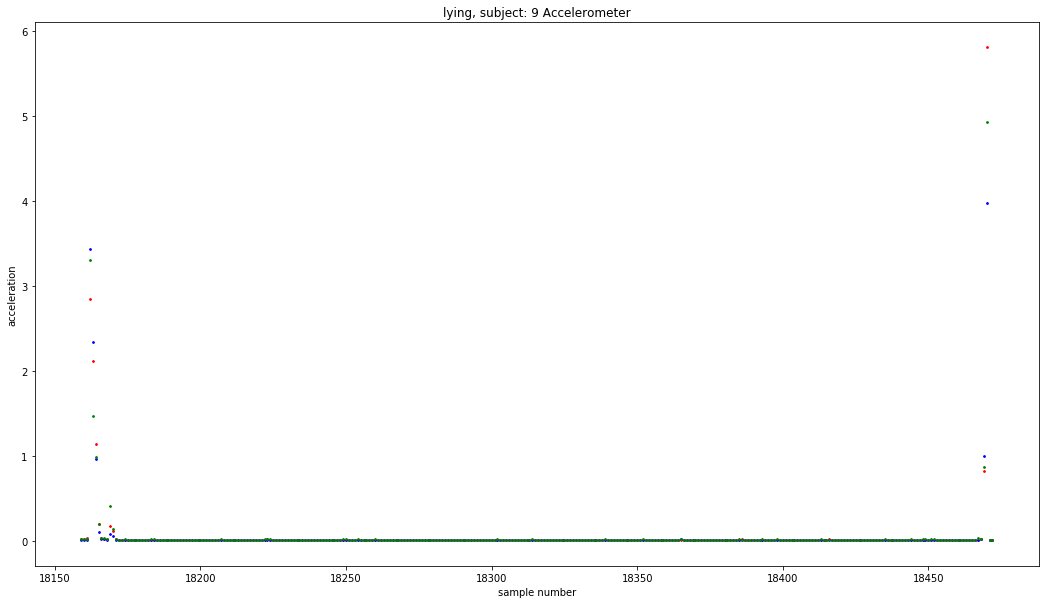

<Figure size 432x288 with 0 Axes>

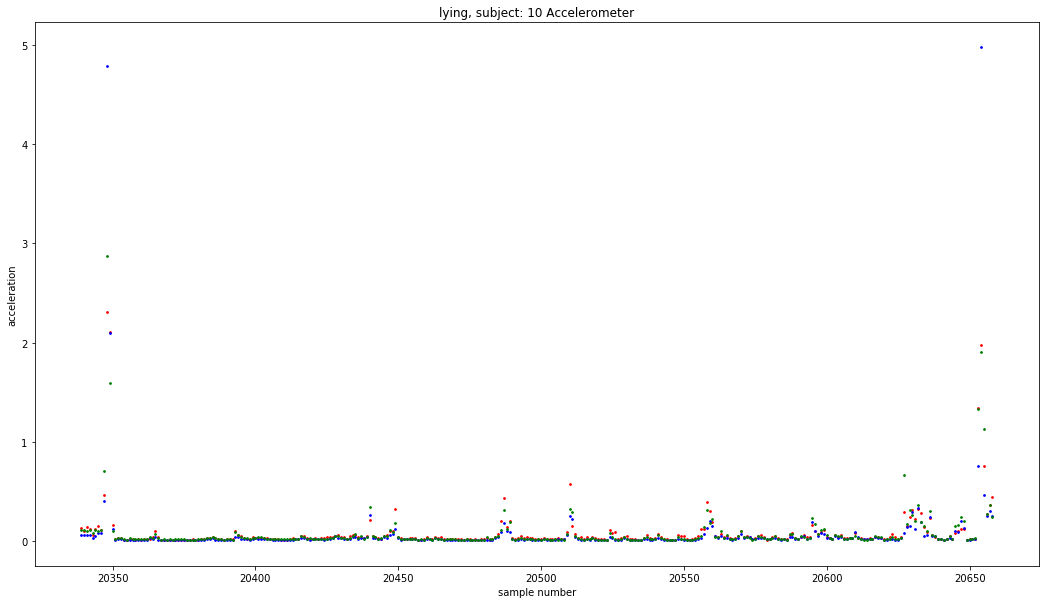

<Figure size 432x288 with 0 Axes>

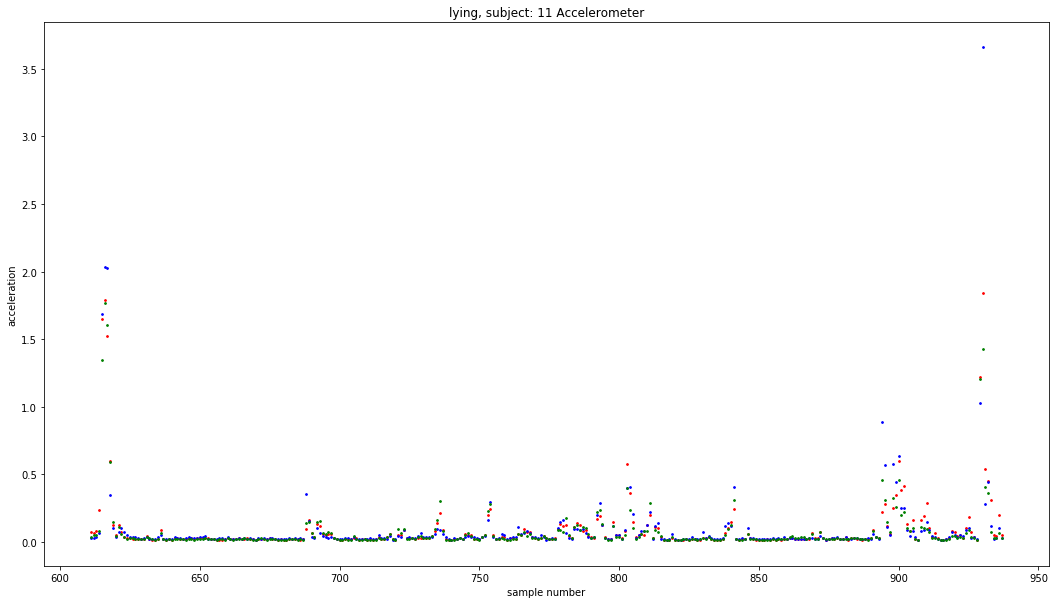

<Figure size 432x288 with 0 Axes>

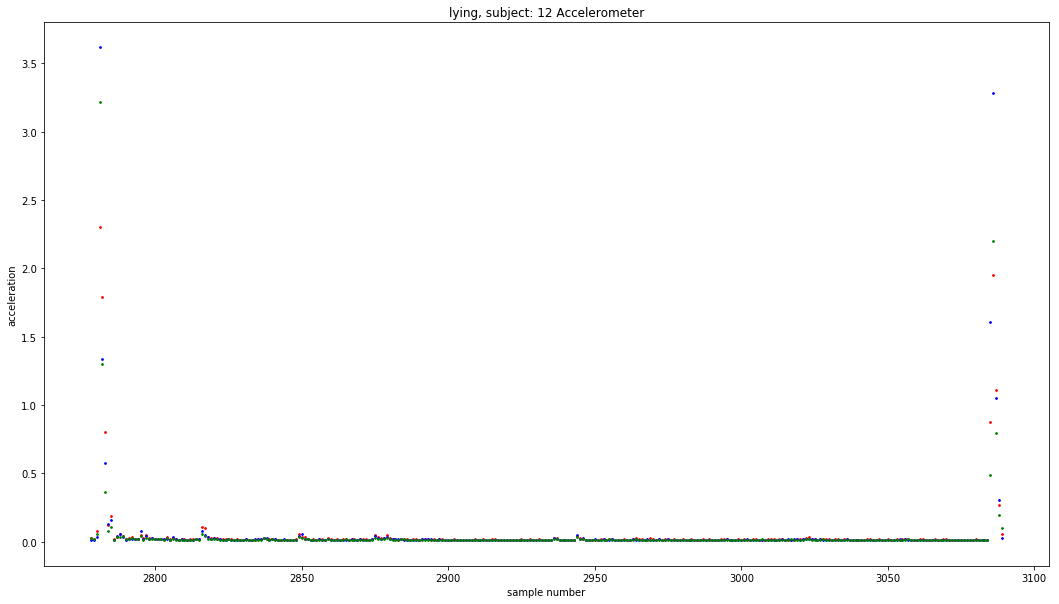

<Figure size 432x288 with 0 Axes>

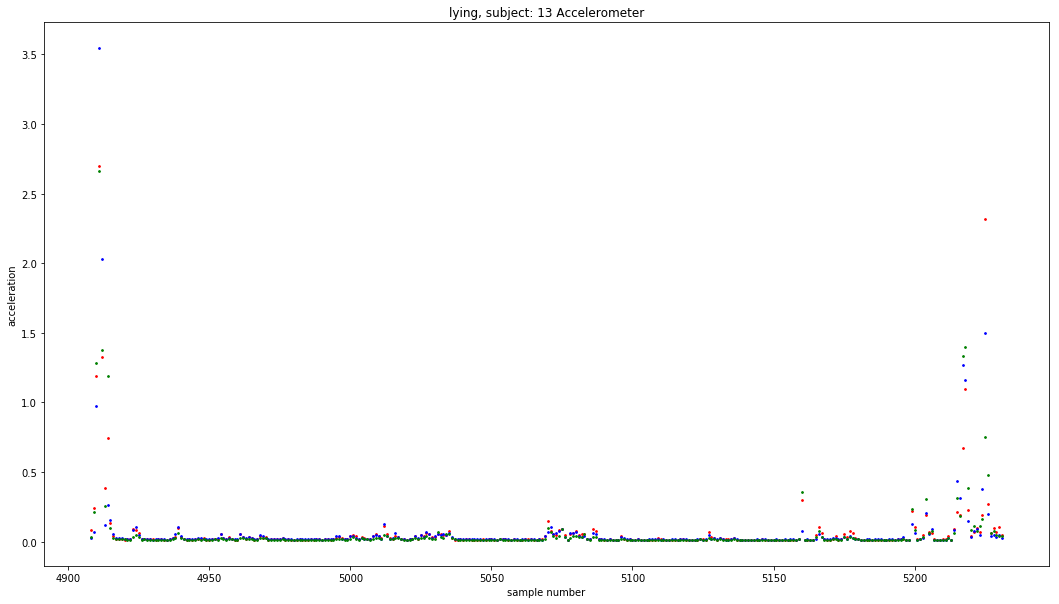

<Figure size 432x288 with 0 Axes>

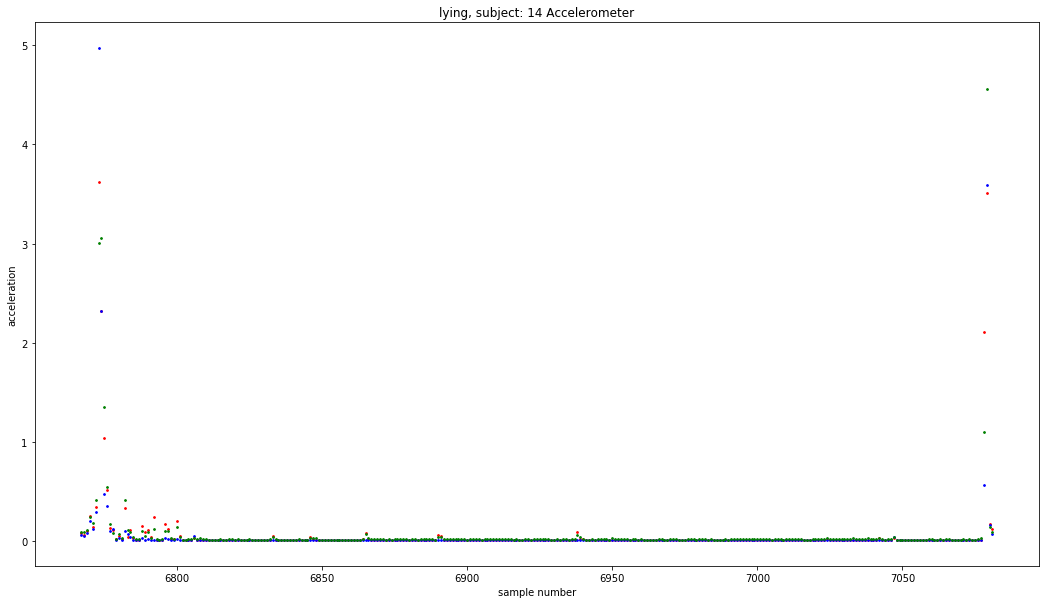

<Figure size 432x288 with 0 Axes>

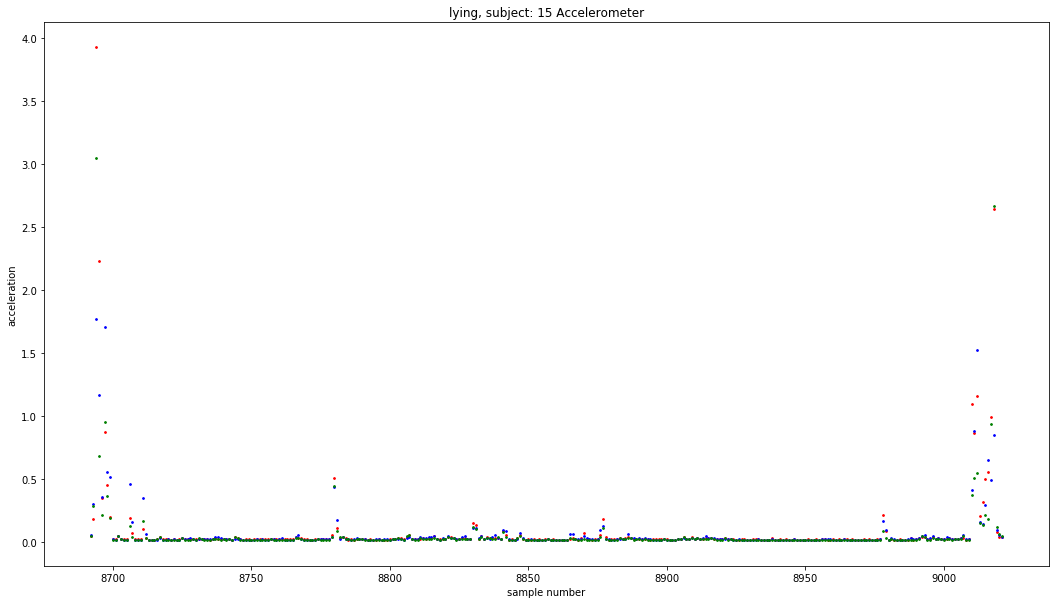

<Figure size 432x288 with 0 Axes>

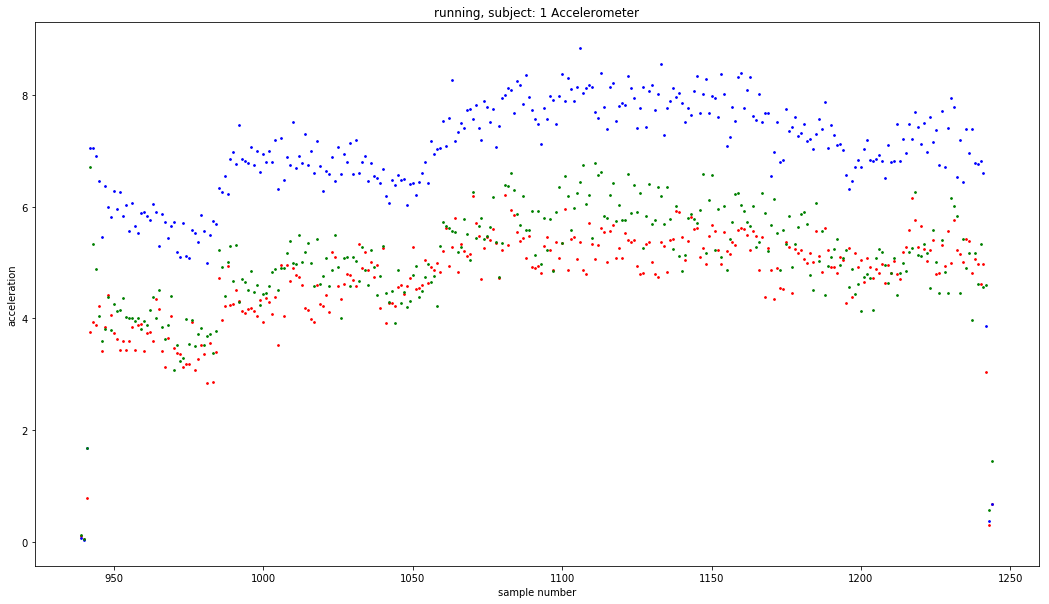

<Figure size 432x288 with 0 Axes>

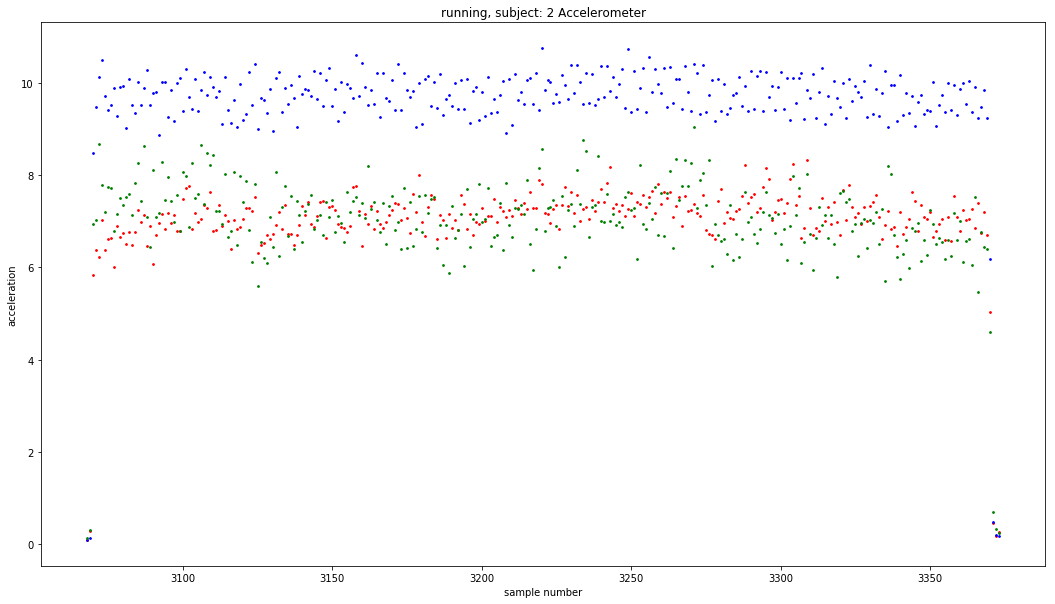

<Figure size 432x288 with 0 Axes>

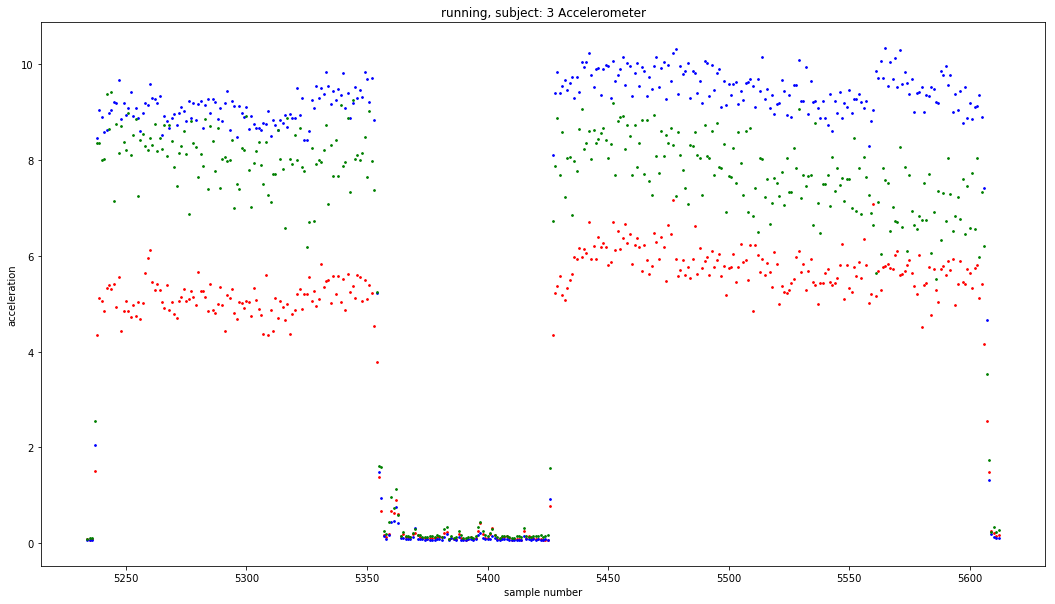

<Figure size 432x288 with 0 Axes>

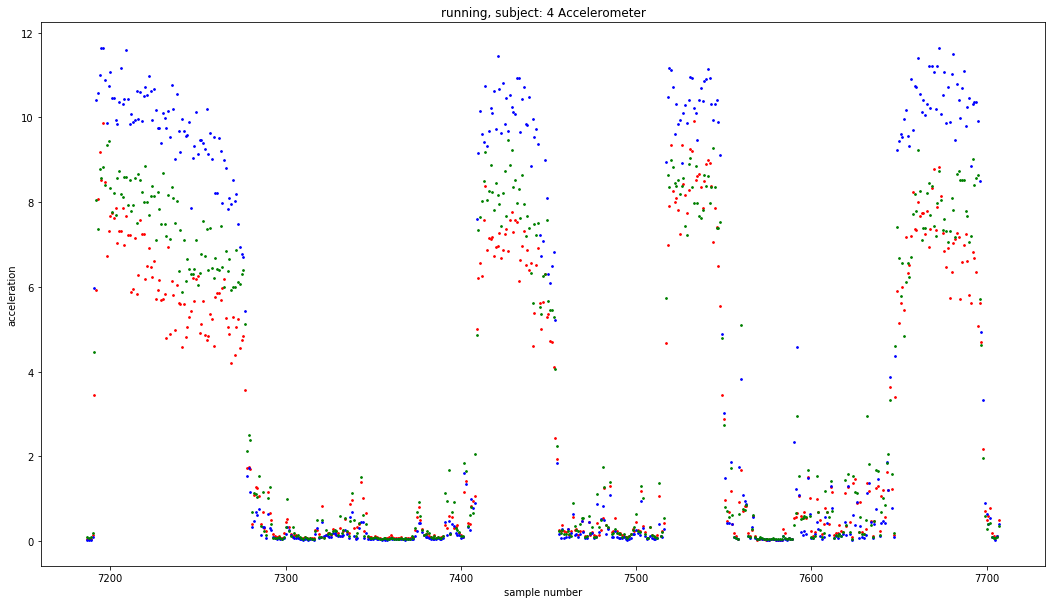

<Figure size 432x288 with 0 Axes>

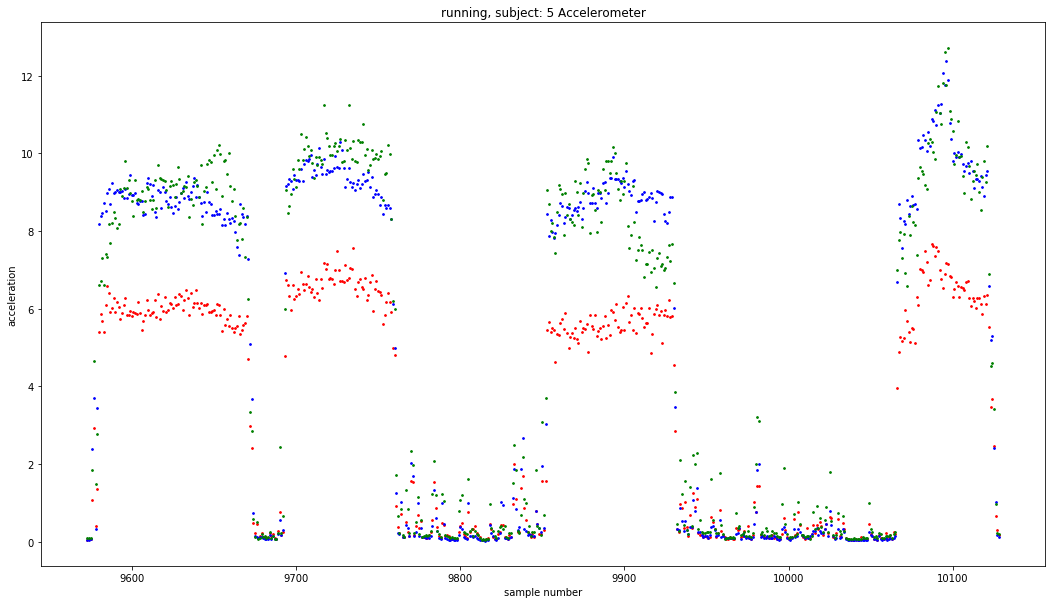

<Figure size 432x288 with 0 Axes>

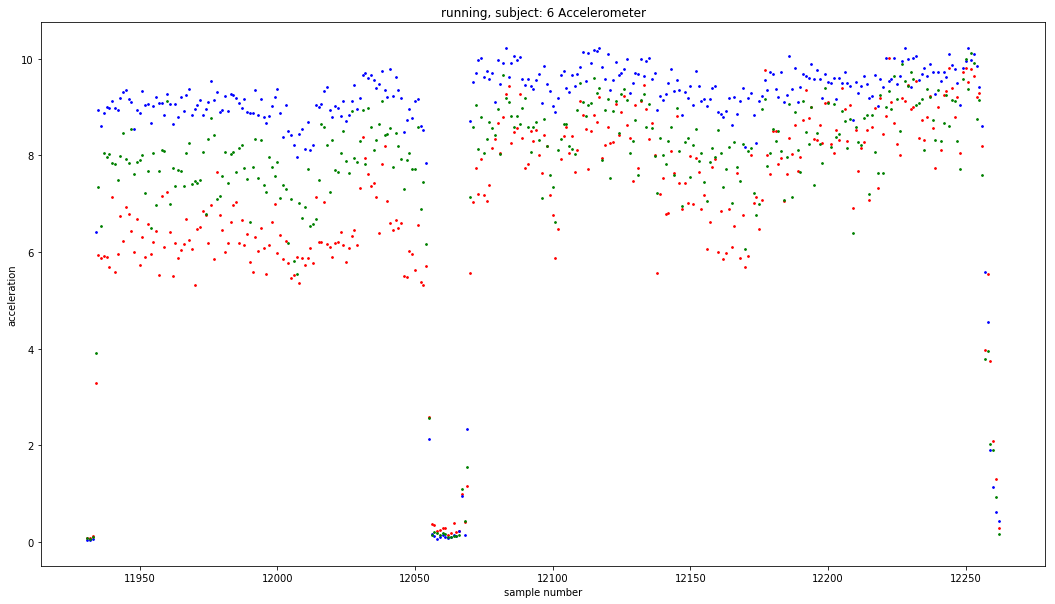

<Figure size 432x288 with 0 Axes>

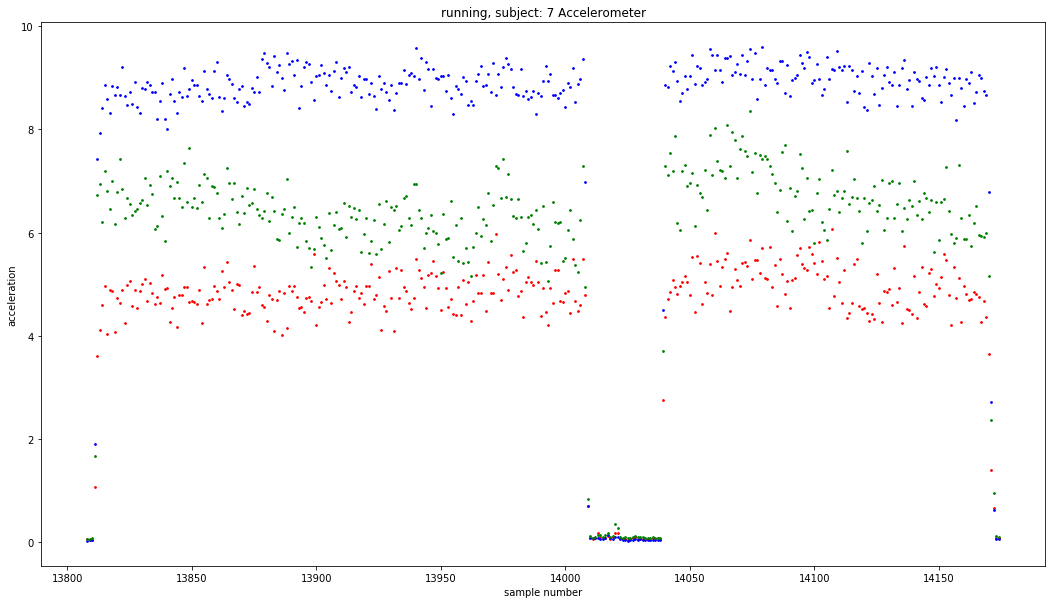

<Figure size 432x288 with 0 Axes>

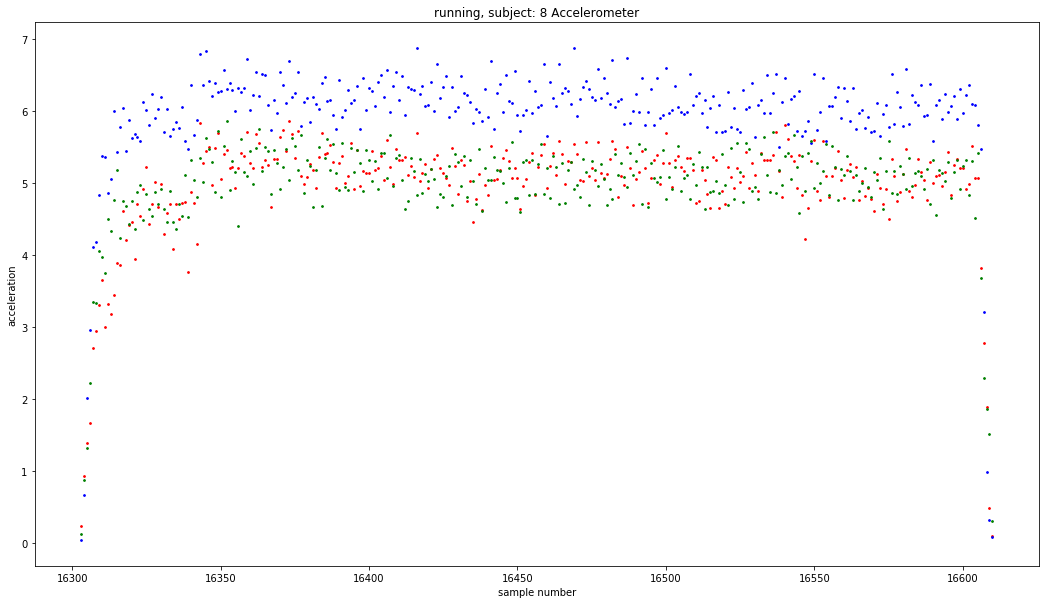

<Figure size 432x288 with 0 Axes>

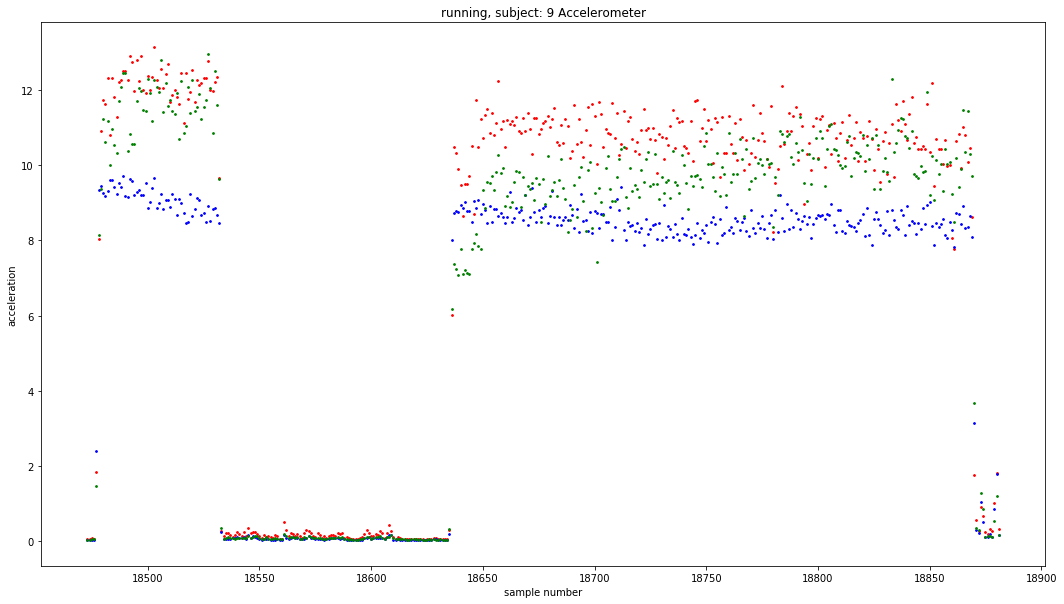

<Figure size 432x288 with 0 Axes>

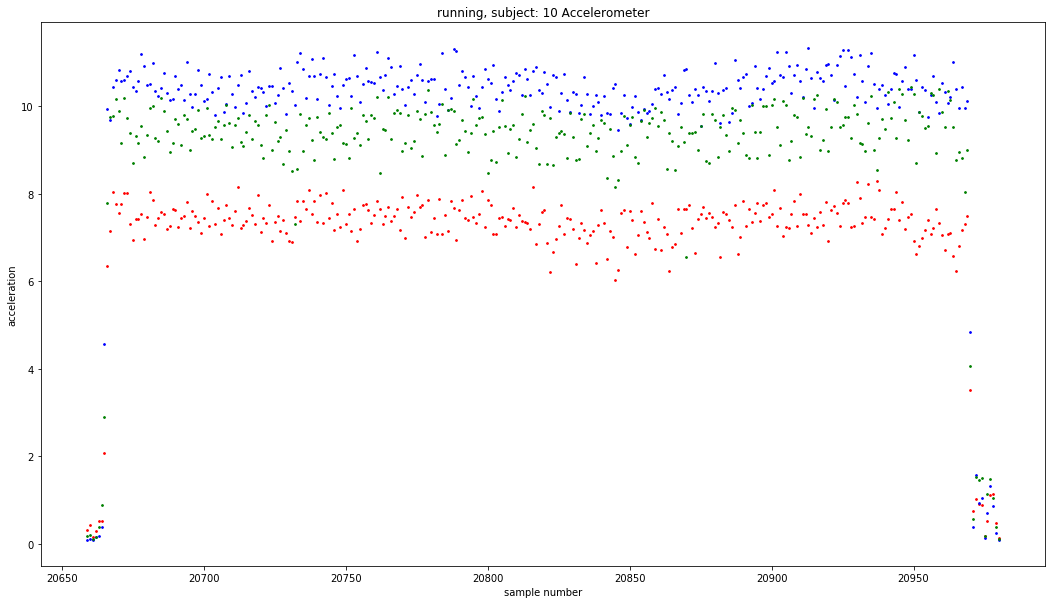

<Figure size 432x288 with 0 Axes>

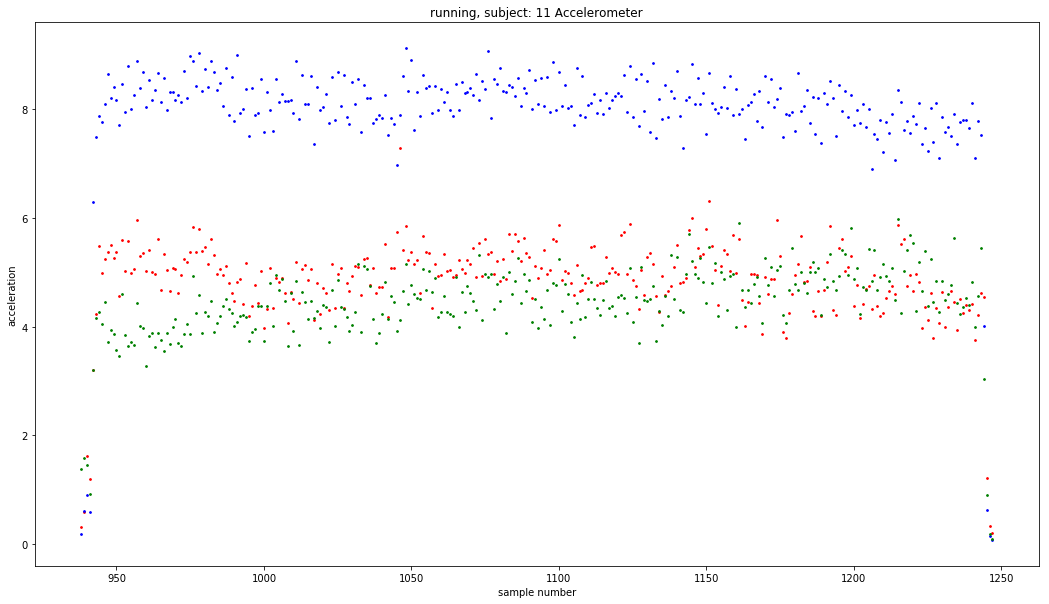

<Figure size 432x288 with 0 Axes>

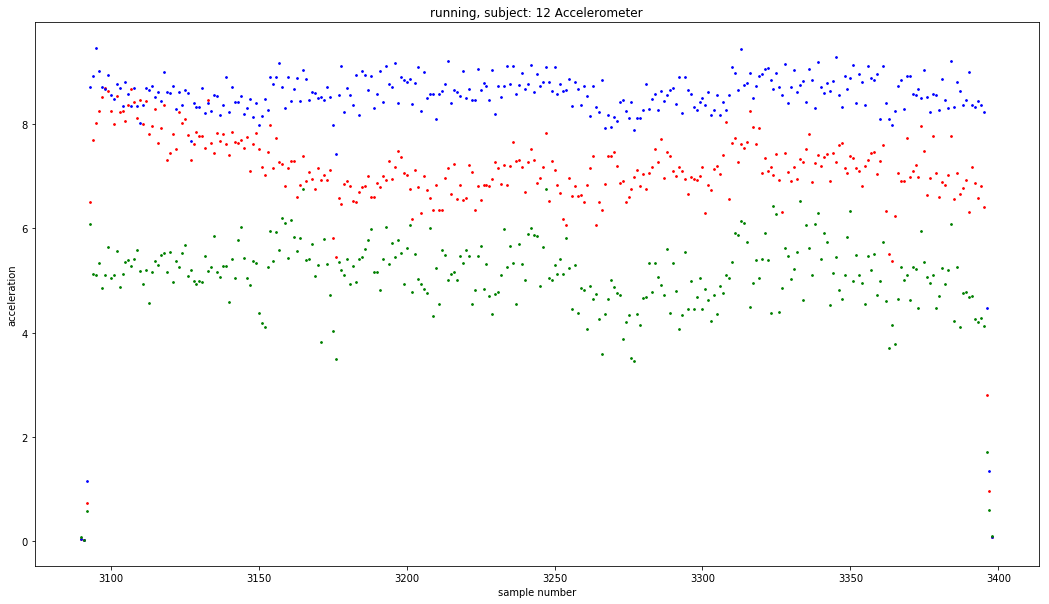

<Figure size 432x288 with 0 Axes>

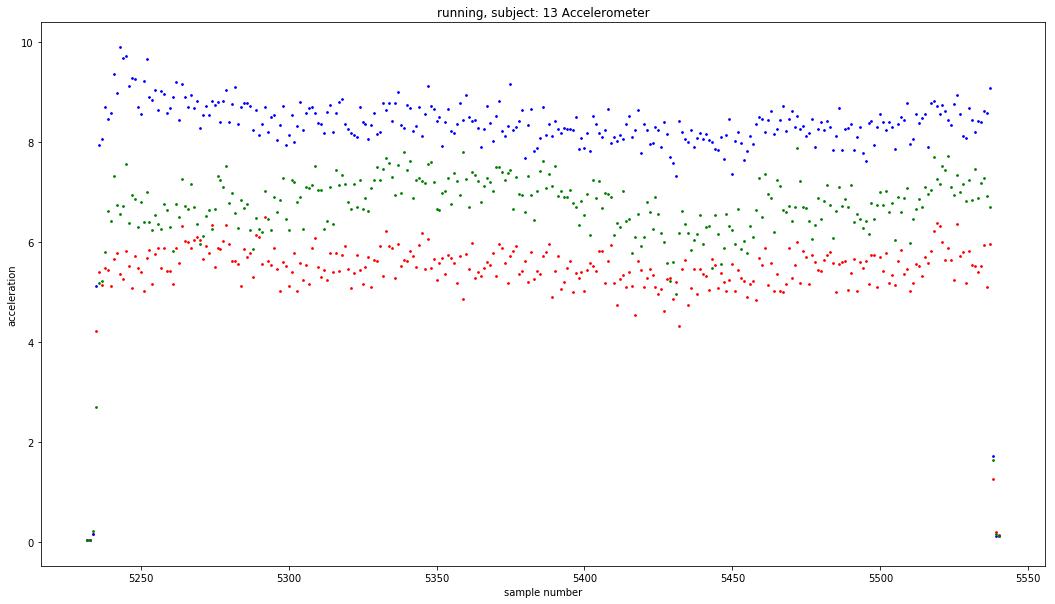

<Figure size 432x288 with 0 Axes>

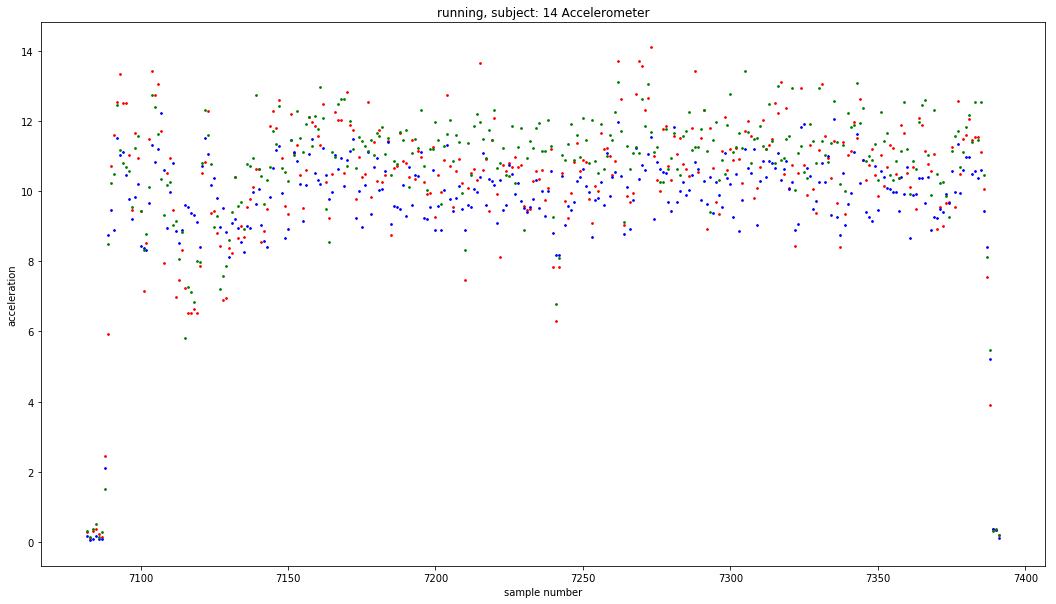

<Figure size 432x288 with 0 Axes>

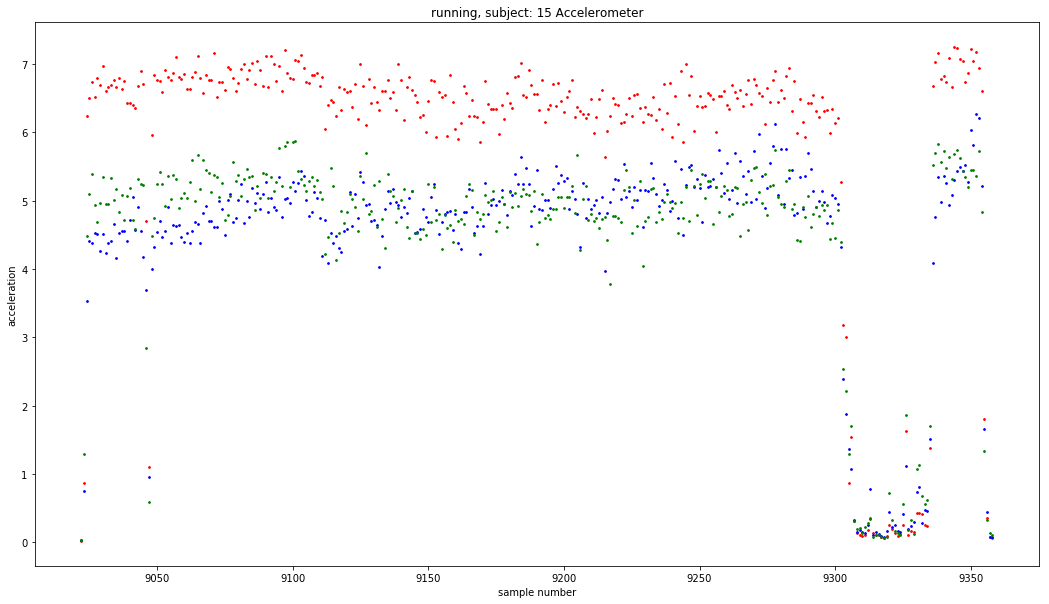

<Figure size 432x288 with 0 Axes>

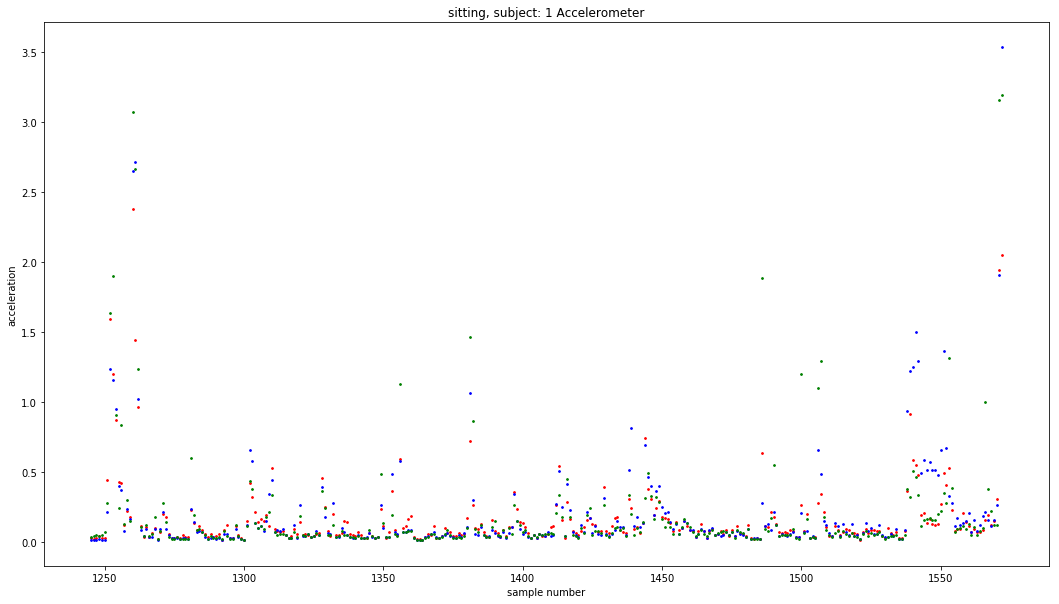

<Figure size 432x288 with 0 Axes>

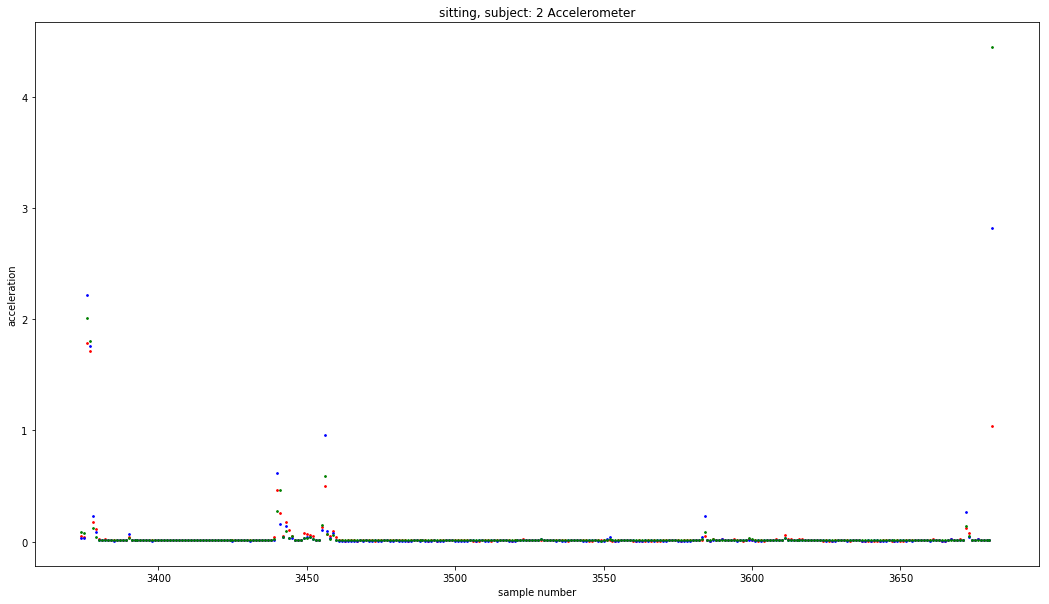

<Figure size 432x288 with 0 Axes>

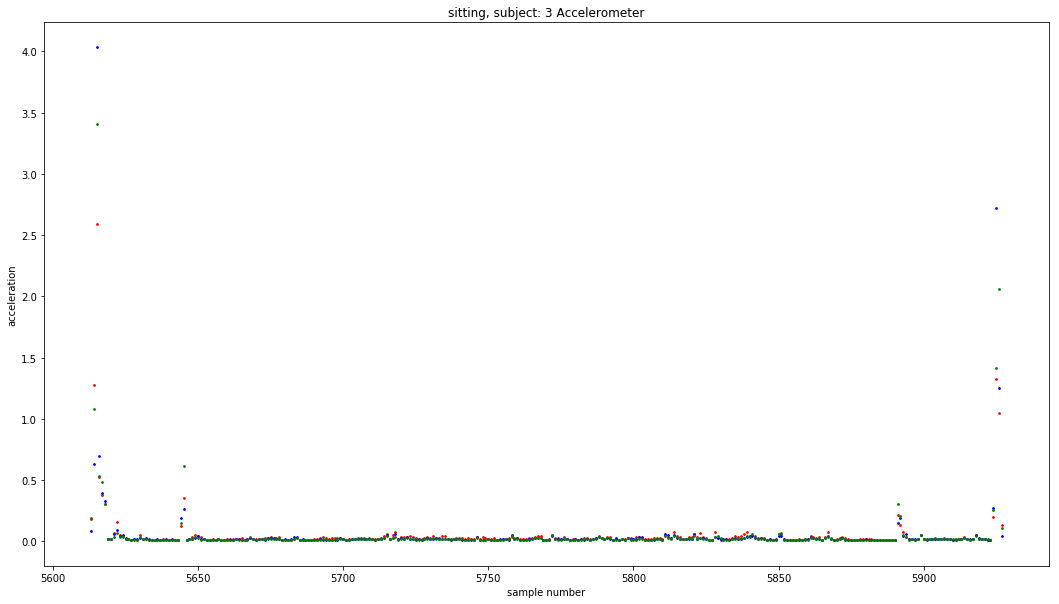

<Figure size 432x288 with 0 Axes>

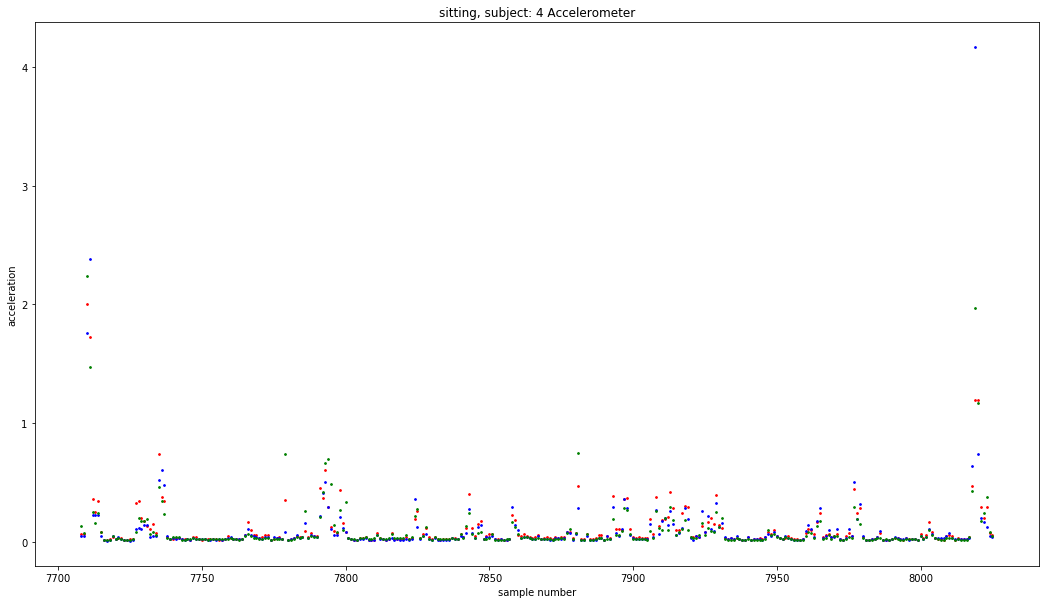

<Figure size 432x288 with 0 Axes>

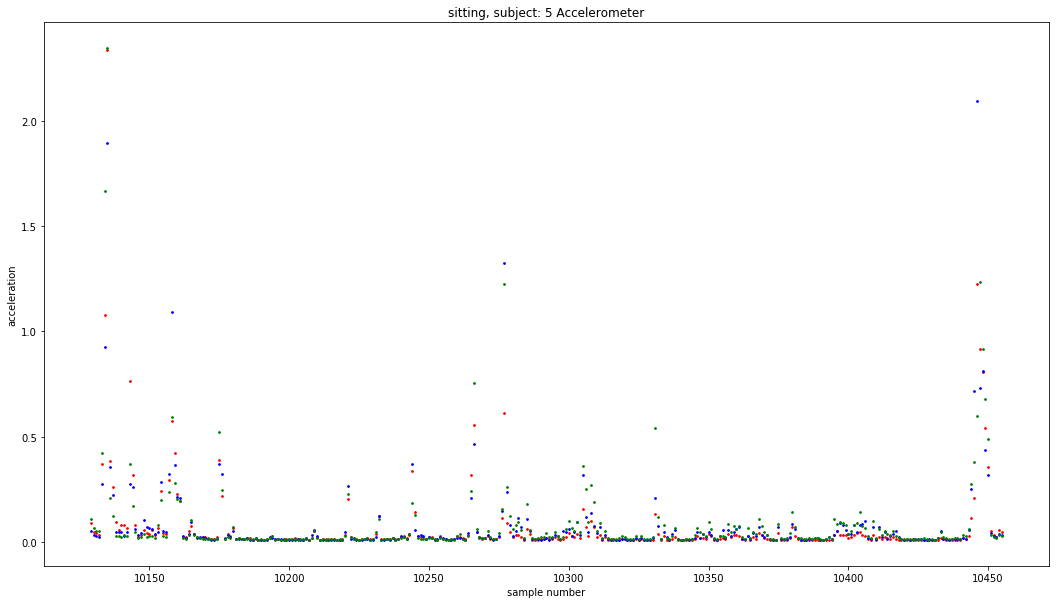

<Figure size 432x288 with 0 Axes>

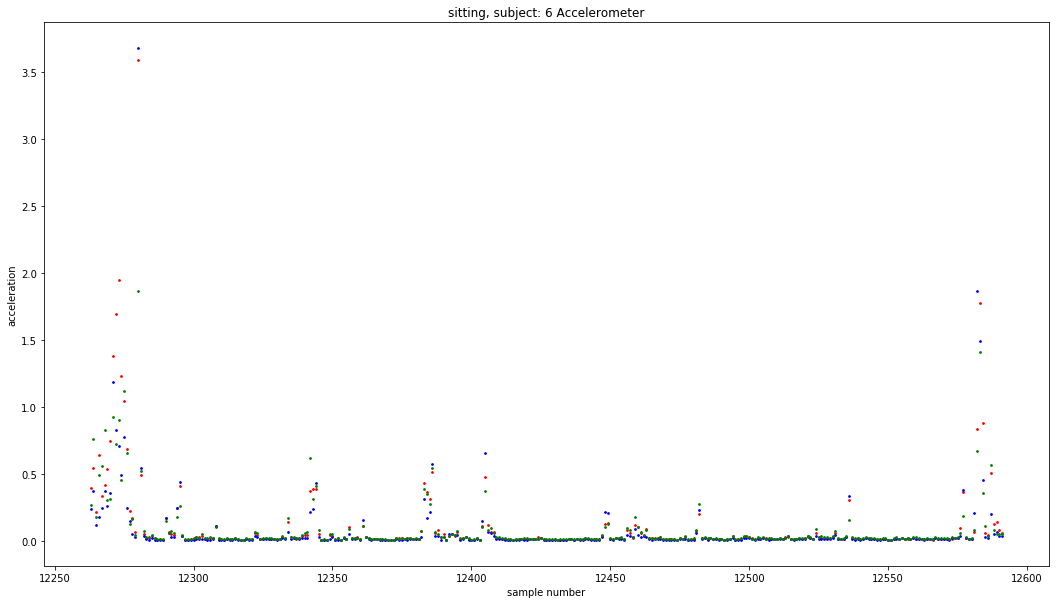

<Figure size 432x288 with 0 Axes>

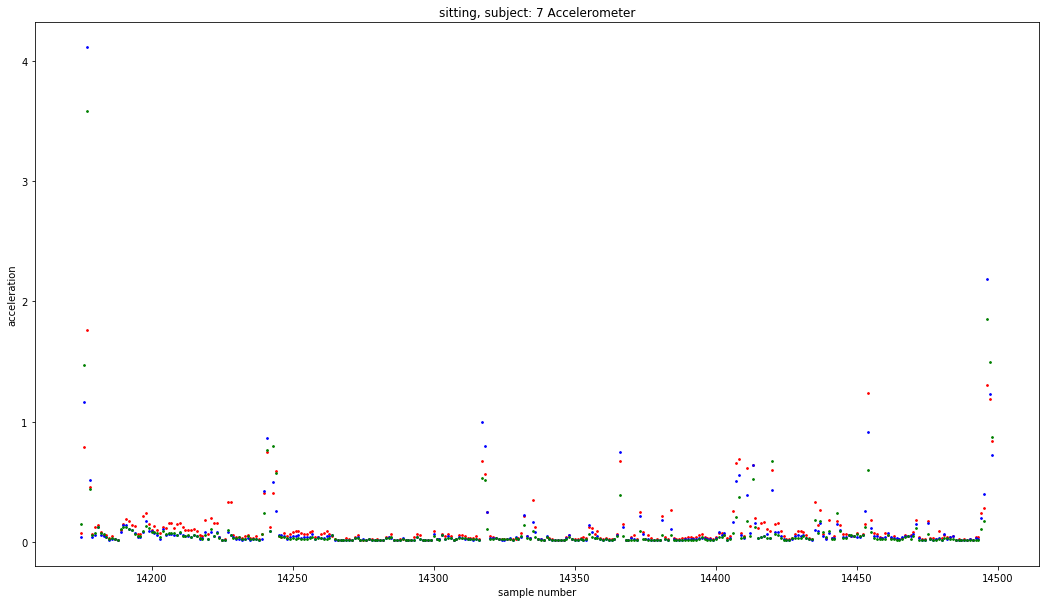

<Figure size 432x288 with 0 Axes>

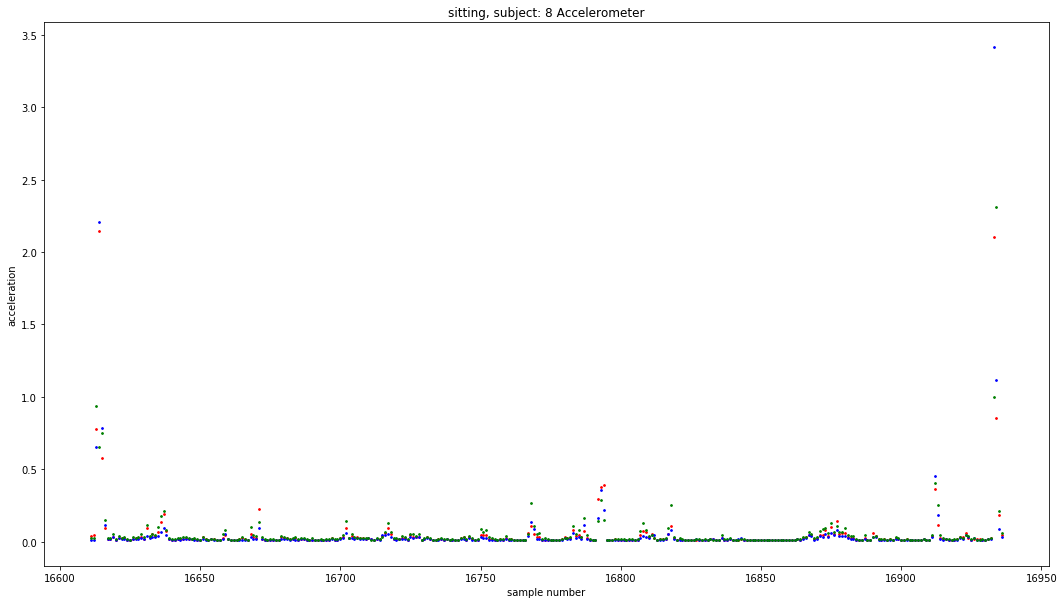

<Figure size 432x288 with 0 Axes>

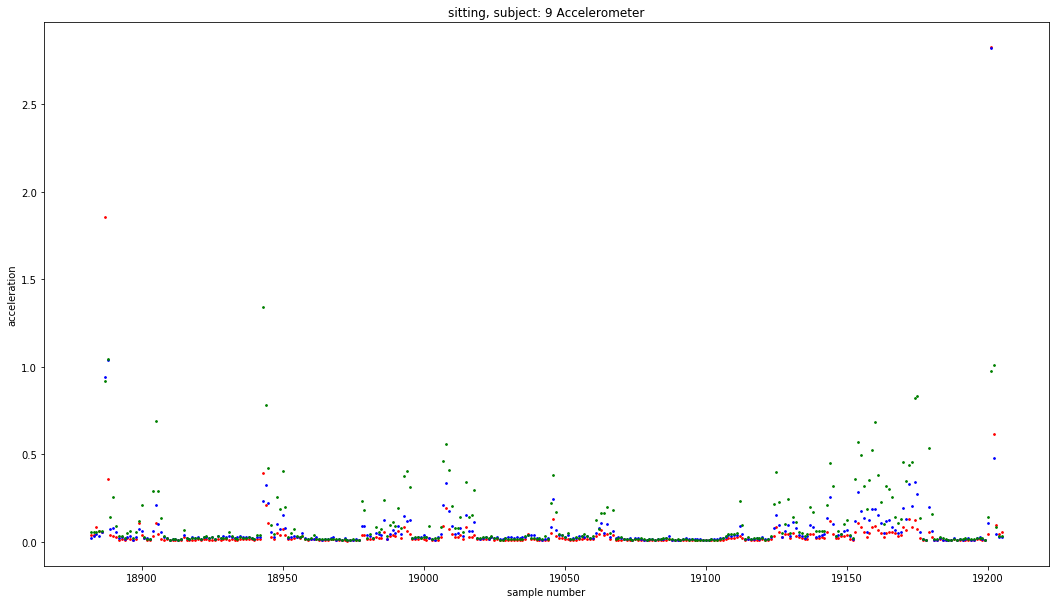

<Figure size 432x288 with 0 Axes>

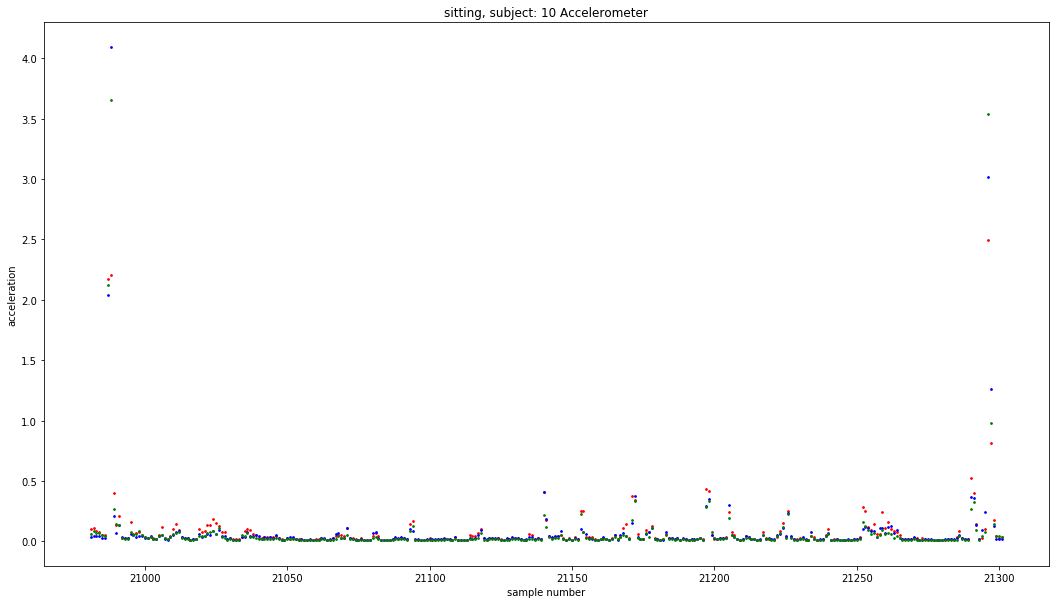

<Figure size 432x288 with 0 Axes>

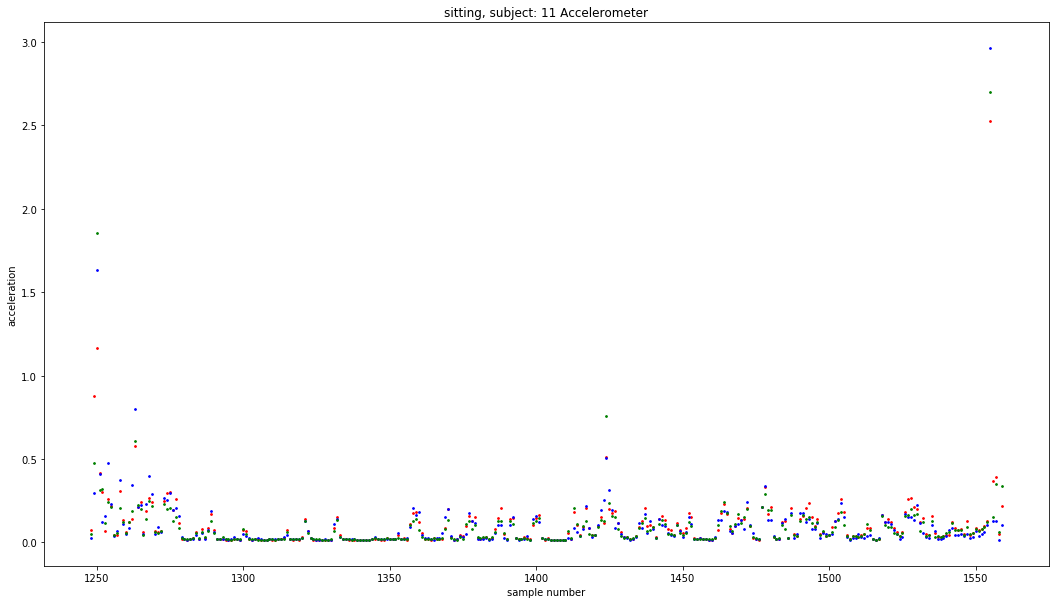

<Figure size 432x288 with 0 Axes>

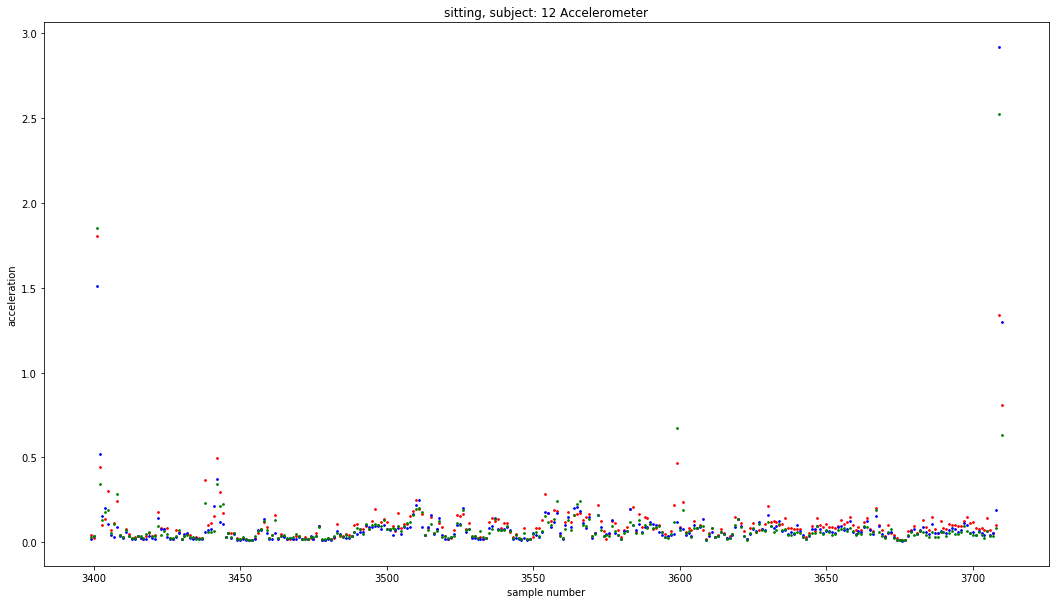

<Figure size 432x288 with 0 Axes>

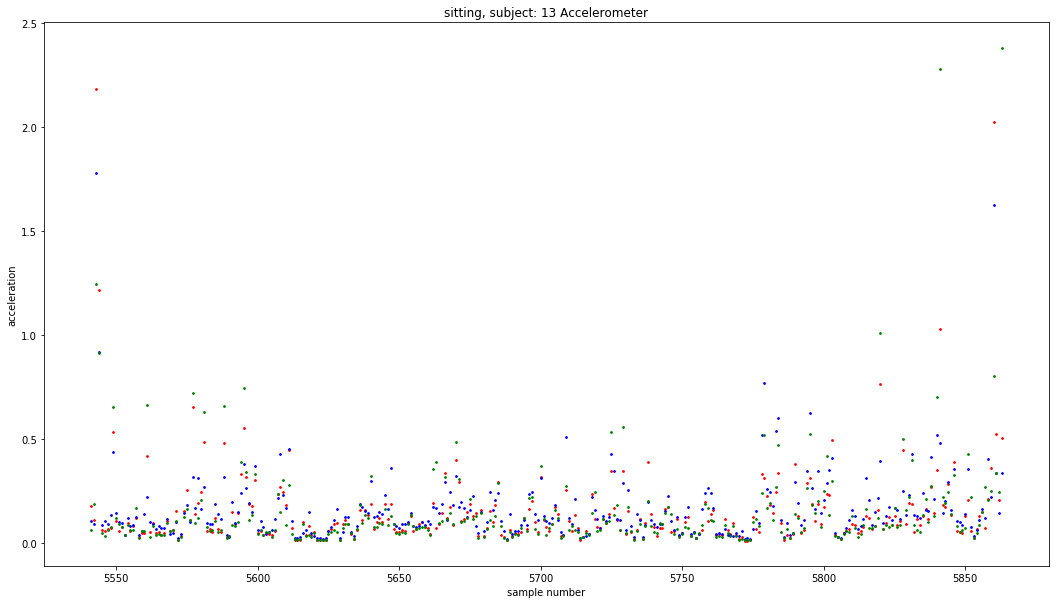

<Figure size 432x288 with 0 Axes>

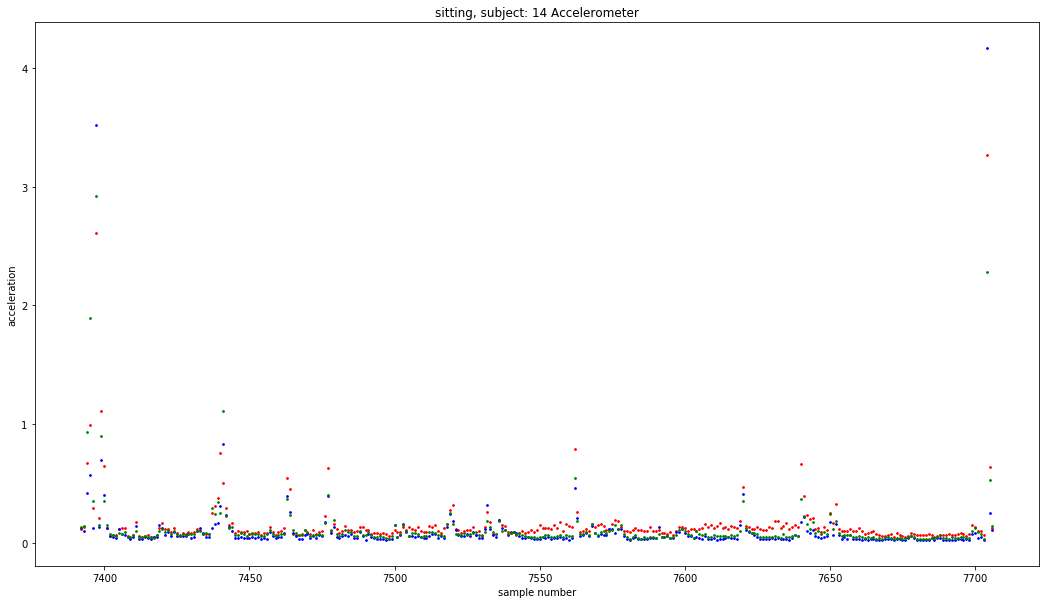

<Figure size 432x288 with 0 Axes>

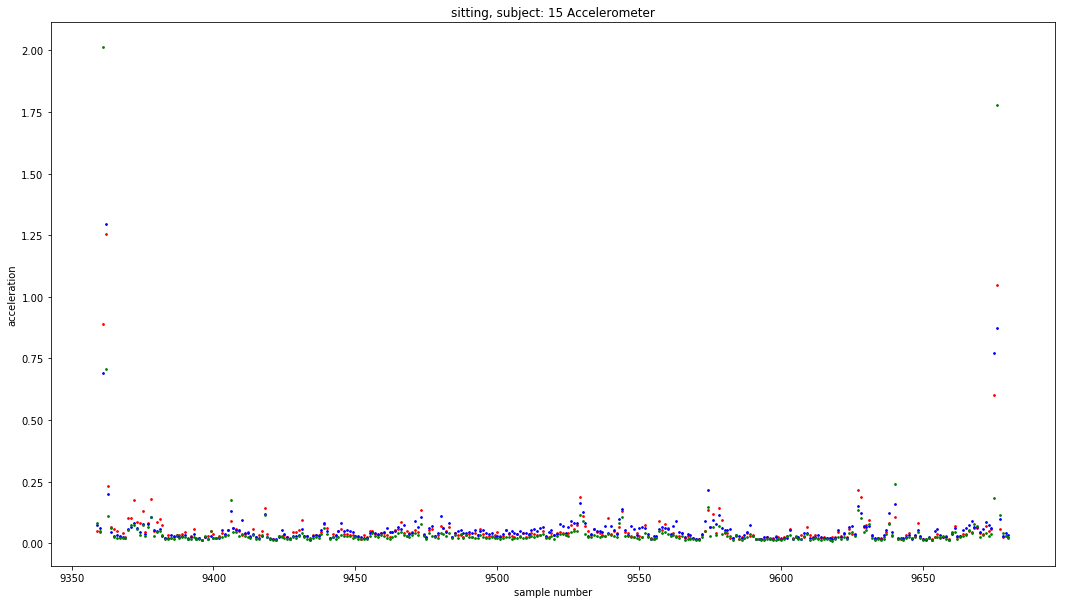

<Figure size 432x288 with 0 Axes>

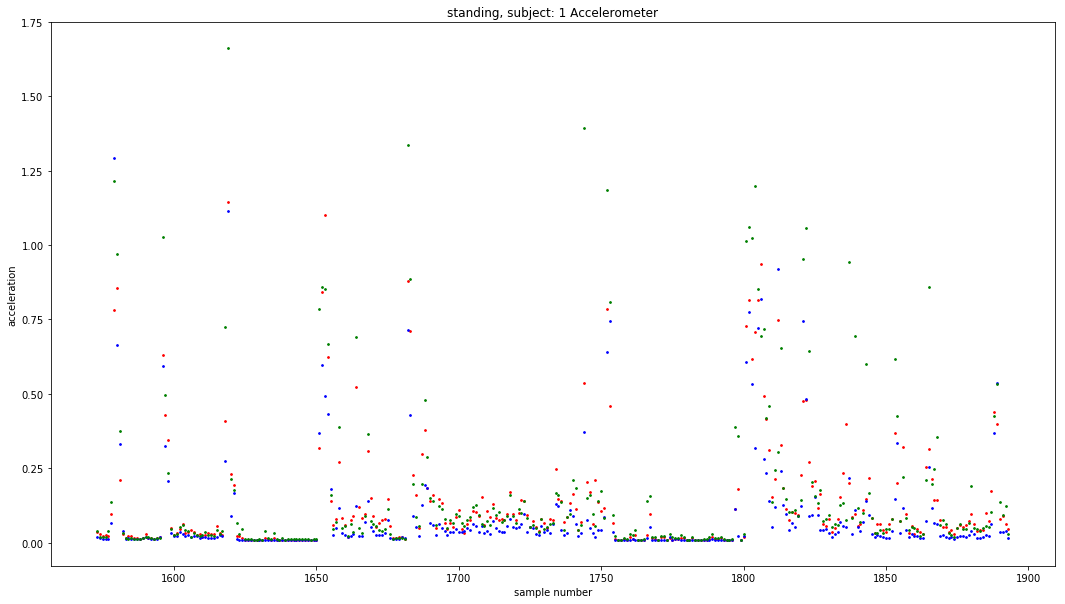

<Figure size 432x288 with 0 Axes>

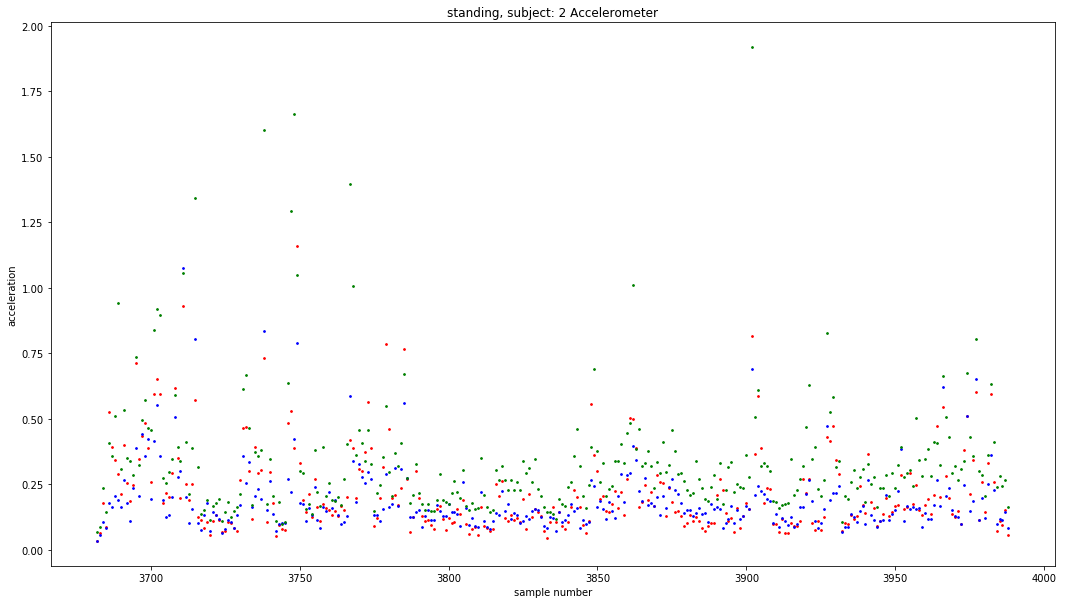

<Figure size 432x288 with 0 Axes>

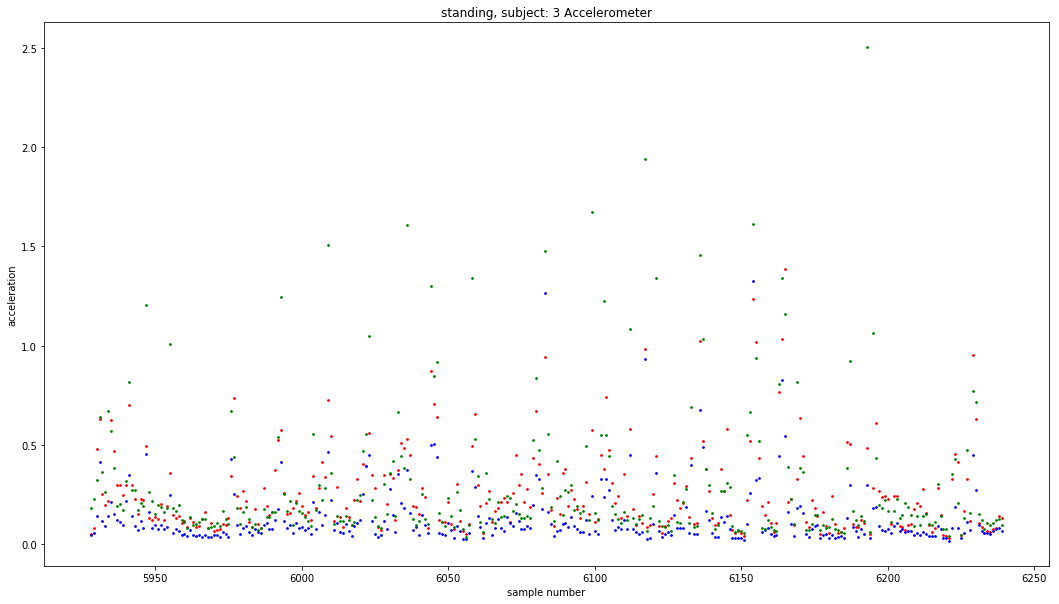

<Figure size 432x288 with 0 Axes>

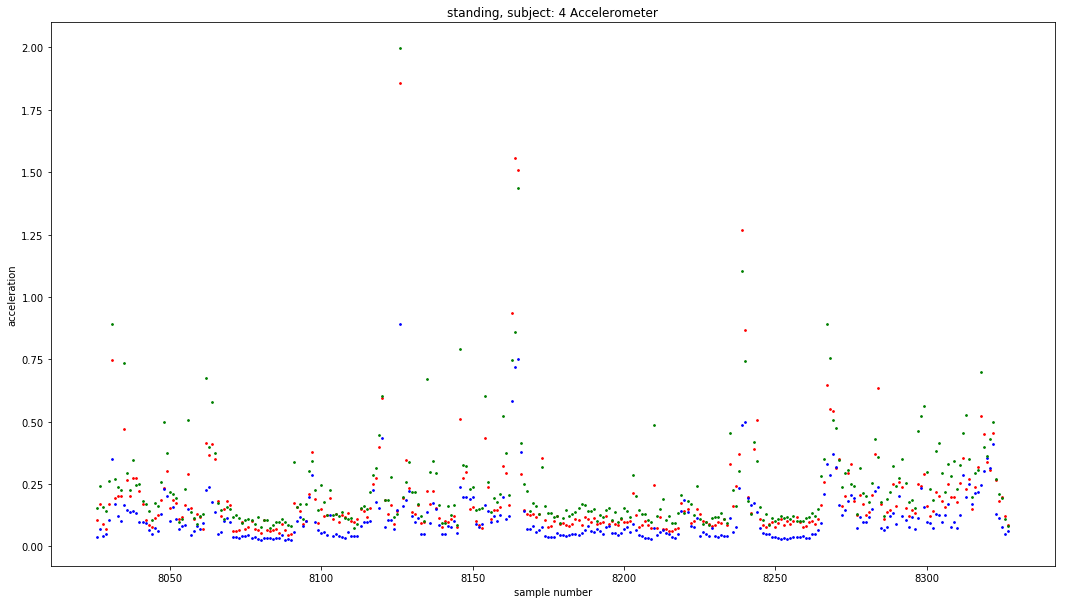

<Figure size 432x288 with 0 Axes>

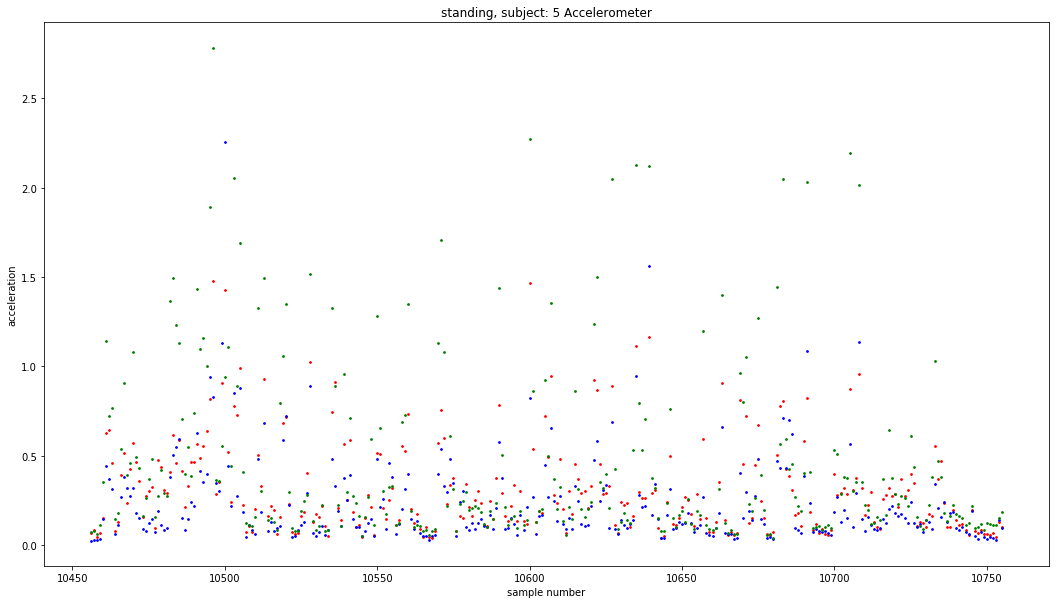

<Figure size 432x288 with 0 Axes>

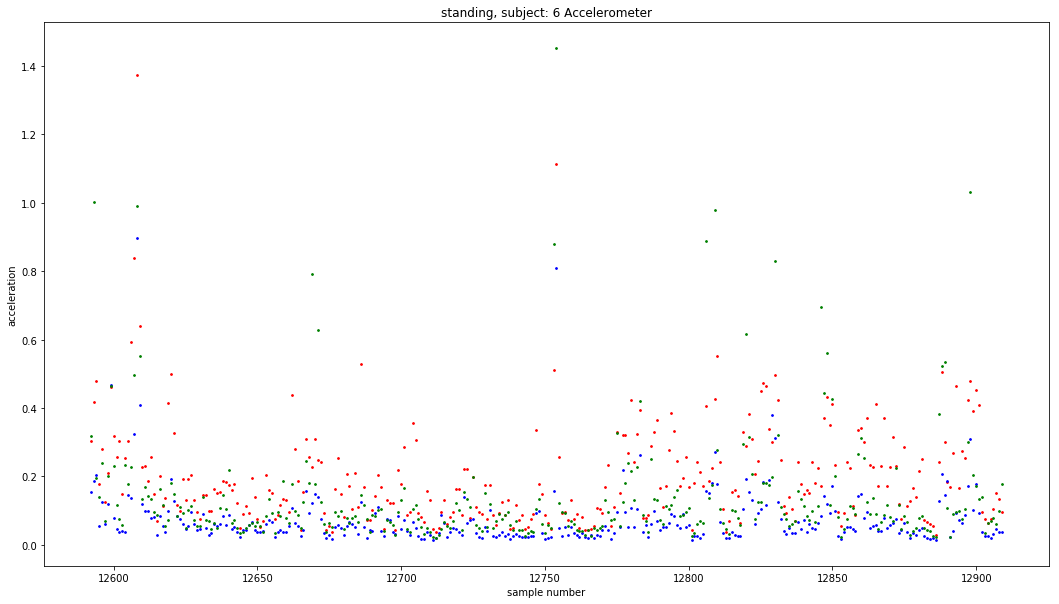

<Figure size 432x288 with 0 Axes>

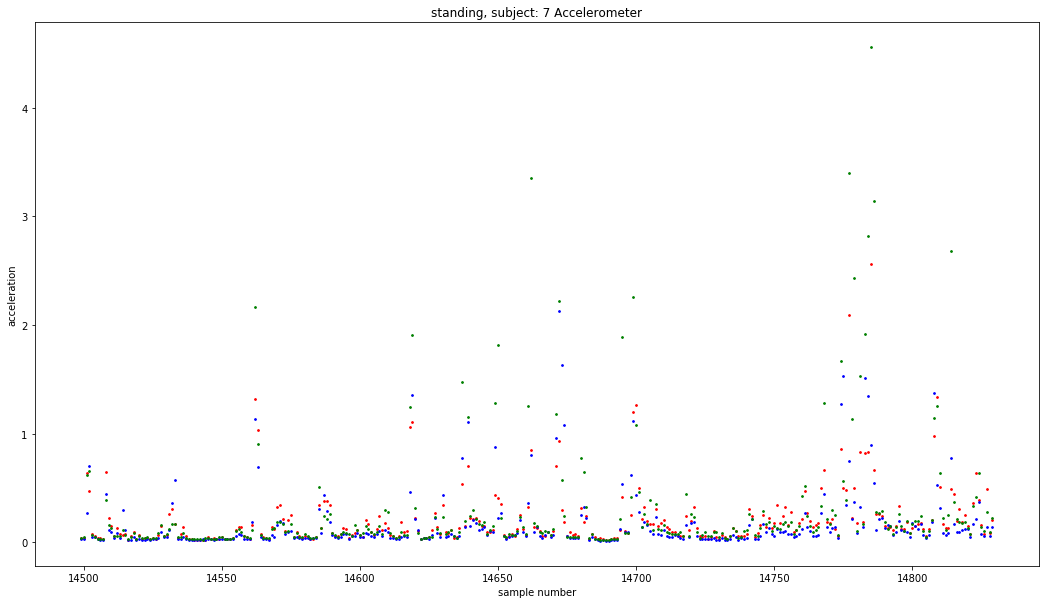

<Figure size 432x288 with 0 Axes>

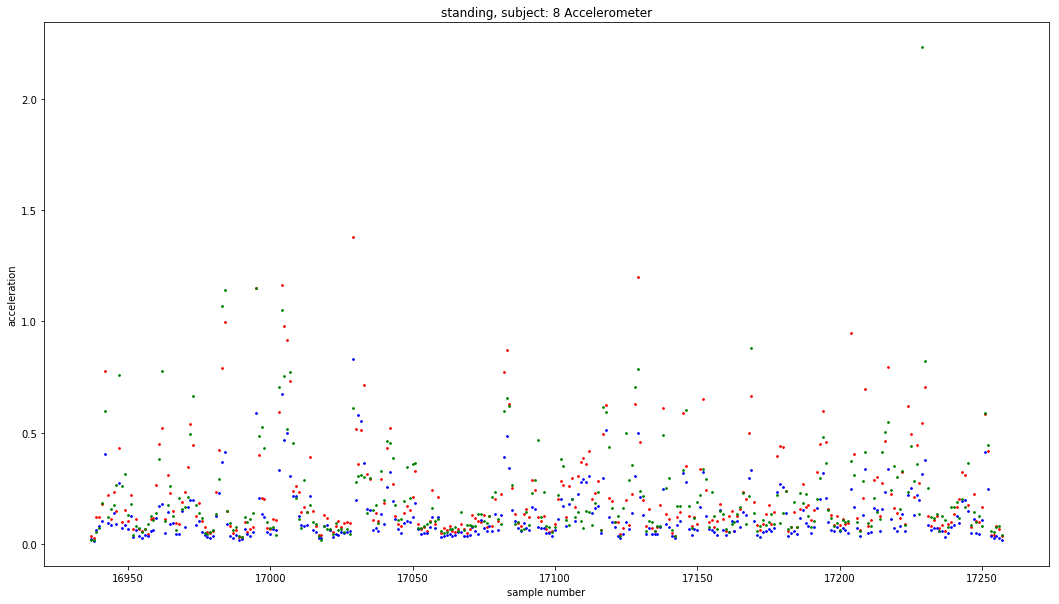

<Figure size 432x288 with 0 Axes>

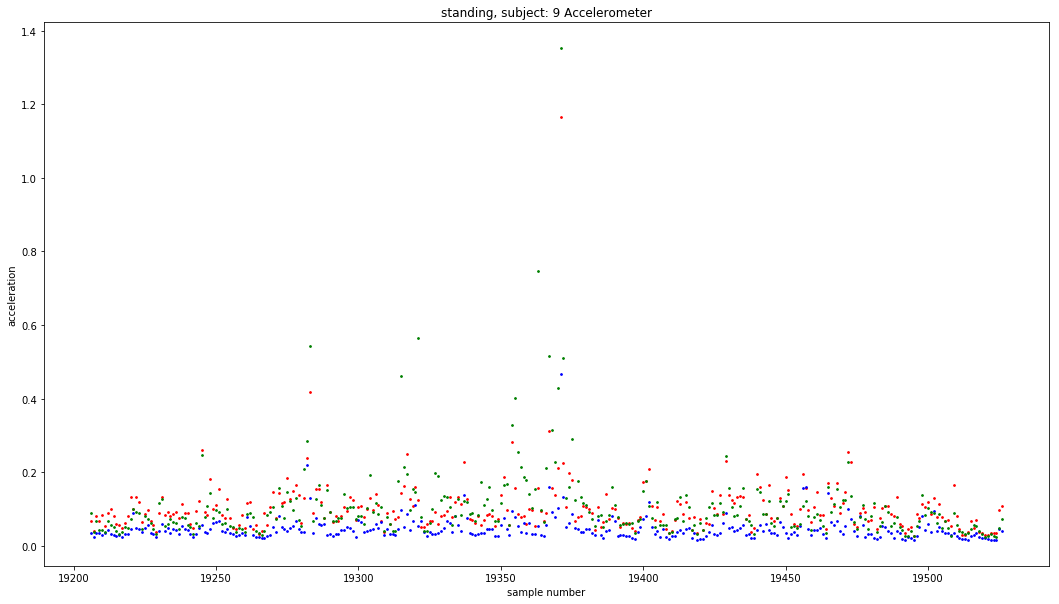

<Figure size 432x288 with 0 Axes>

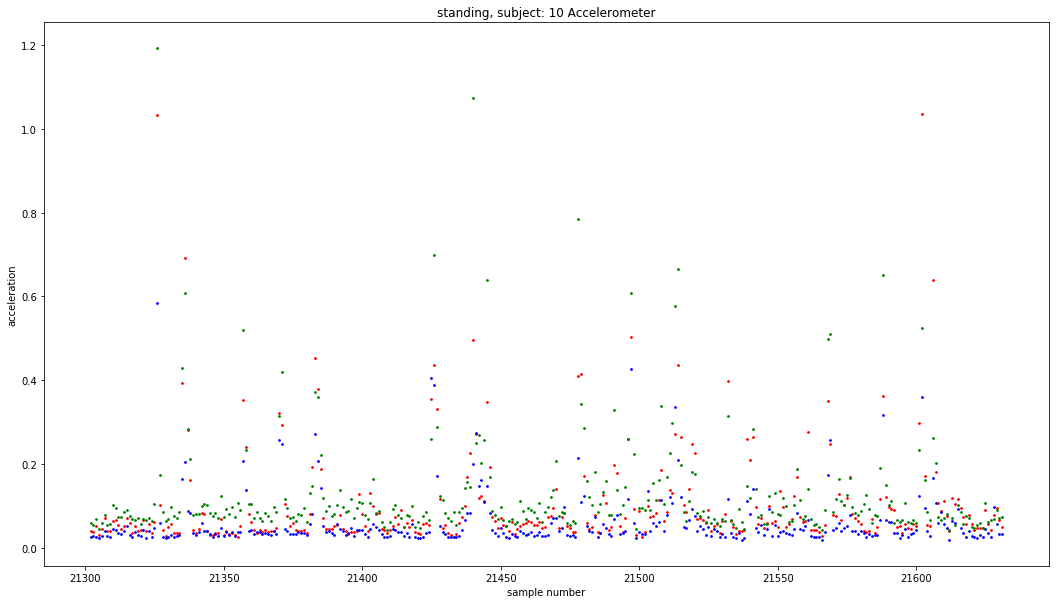

<Figure size 432x288 with 0 Axes>

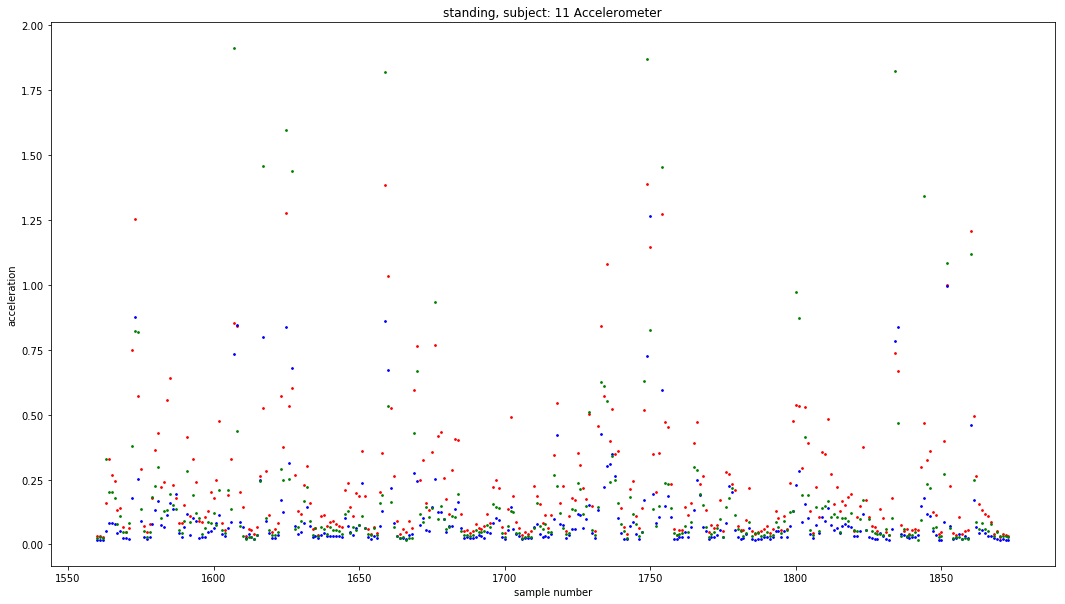

<Figure size 432x288 with 0 Axes>

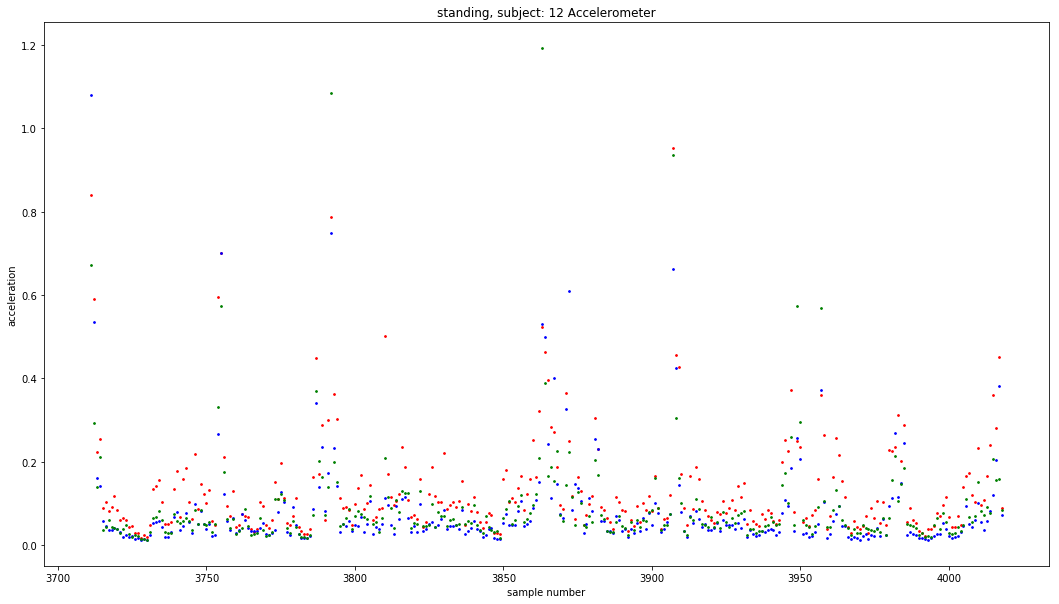

<Figure size 432x288 with 0 Axes>

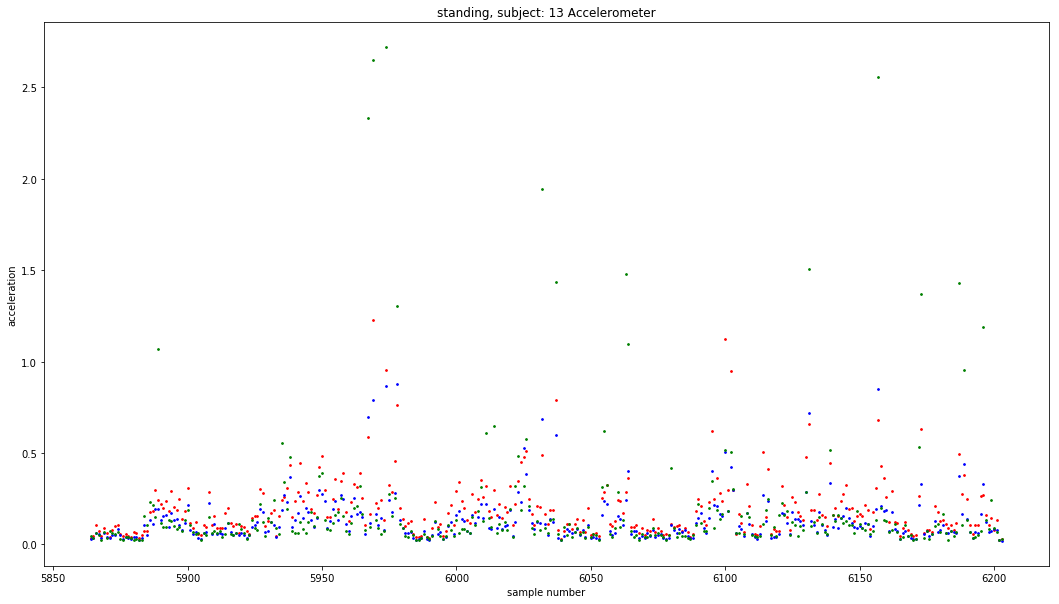

<Figure size 432x288 with 0 Axes>

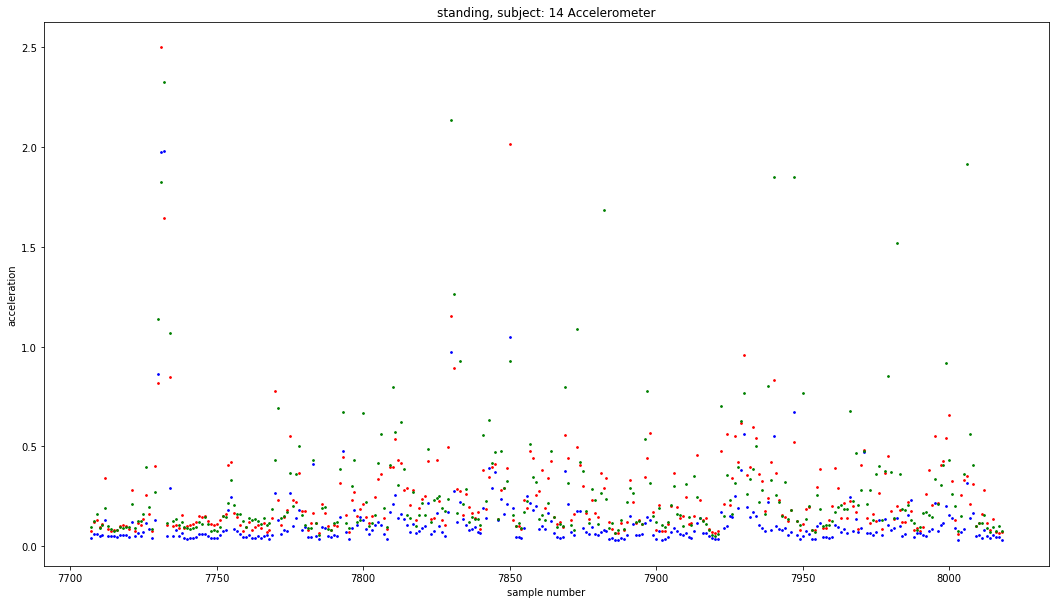

<Figure size 432x288 with 0 Axes>

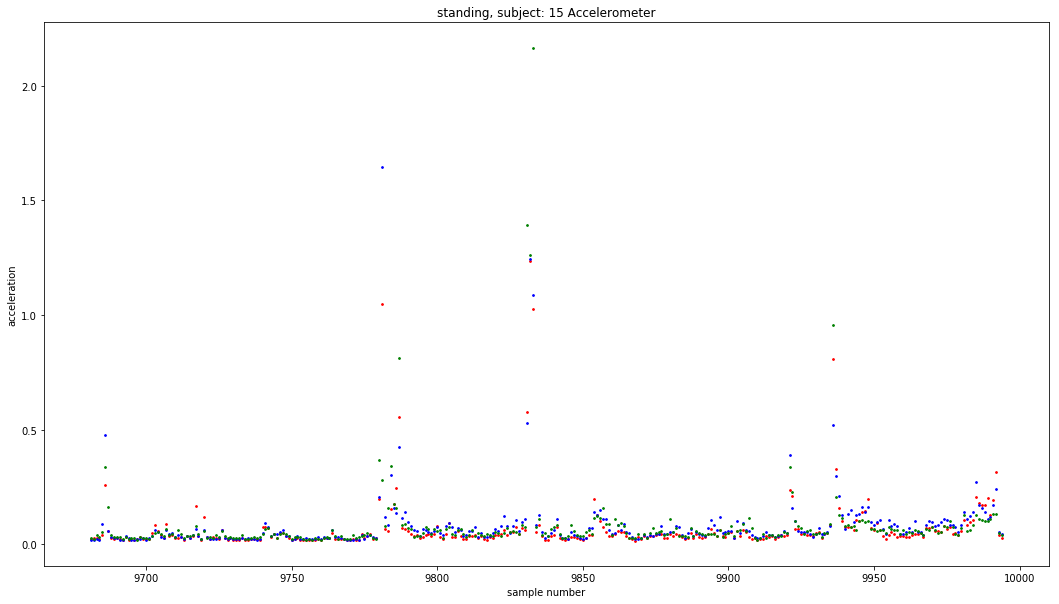

<Figure size 432x288 with 0 Axes>

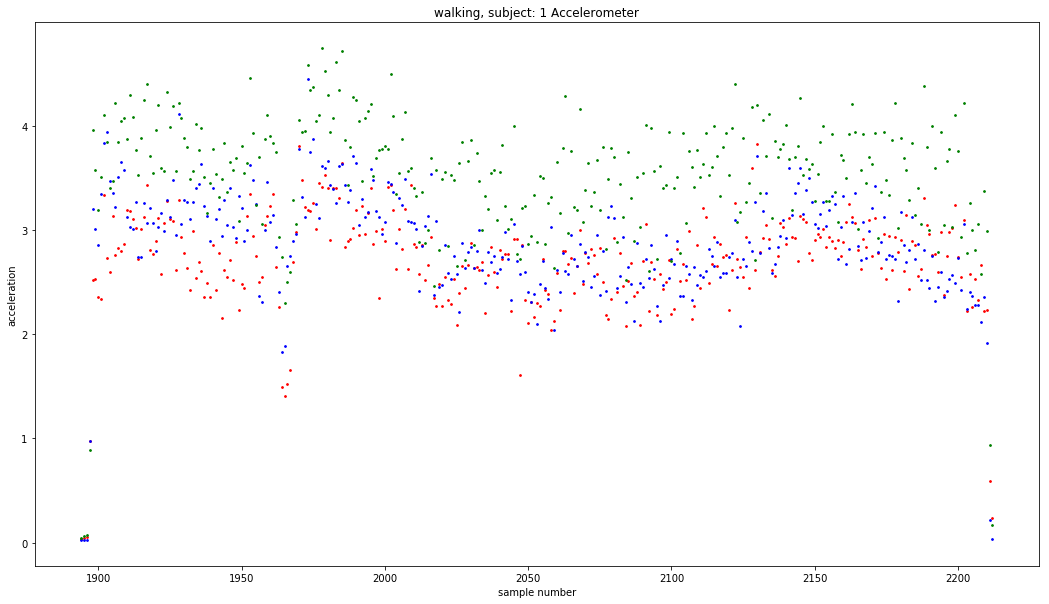

<Figure size 432x288 with 0 Axes>

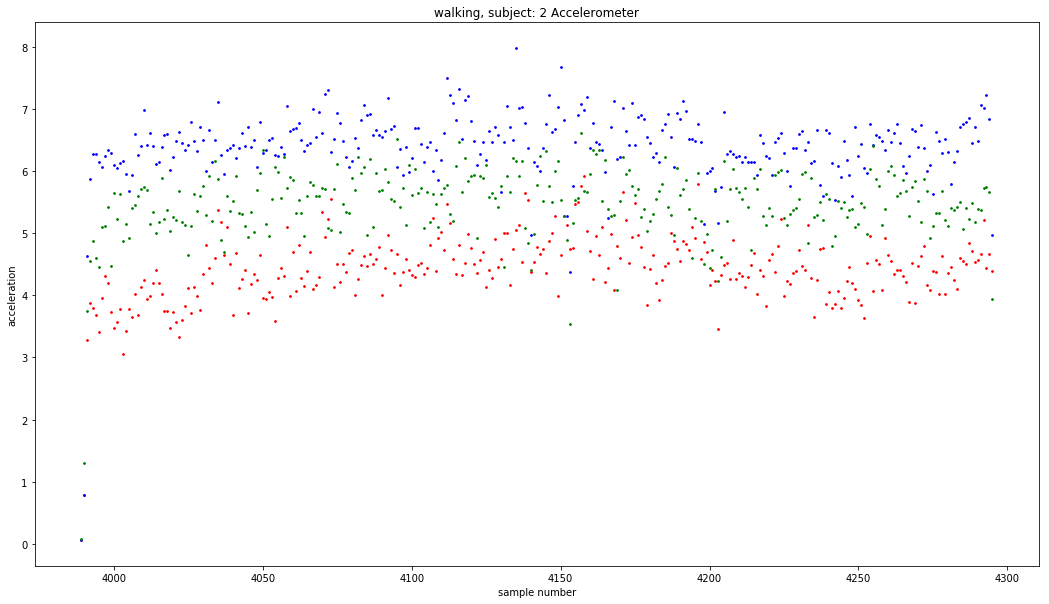

<Figure size 432x288 with 0 Axes>

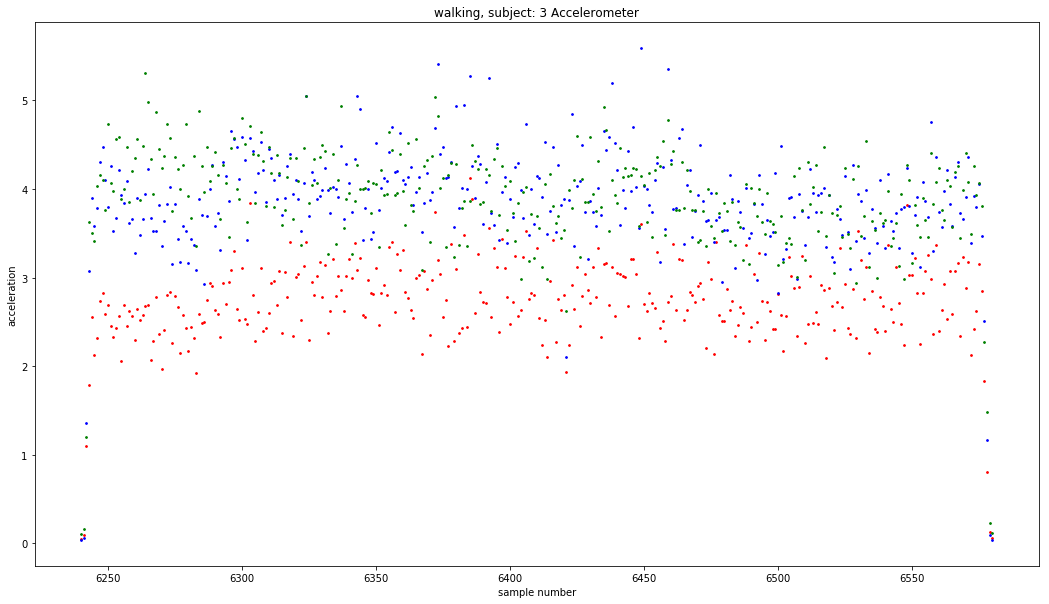

<Figure size 432x288 with 0 Axes>

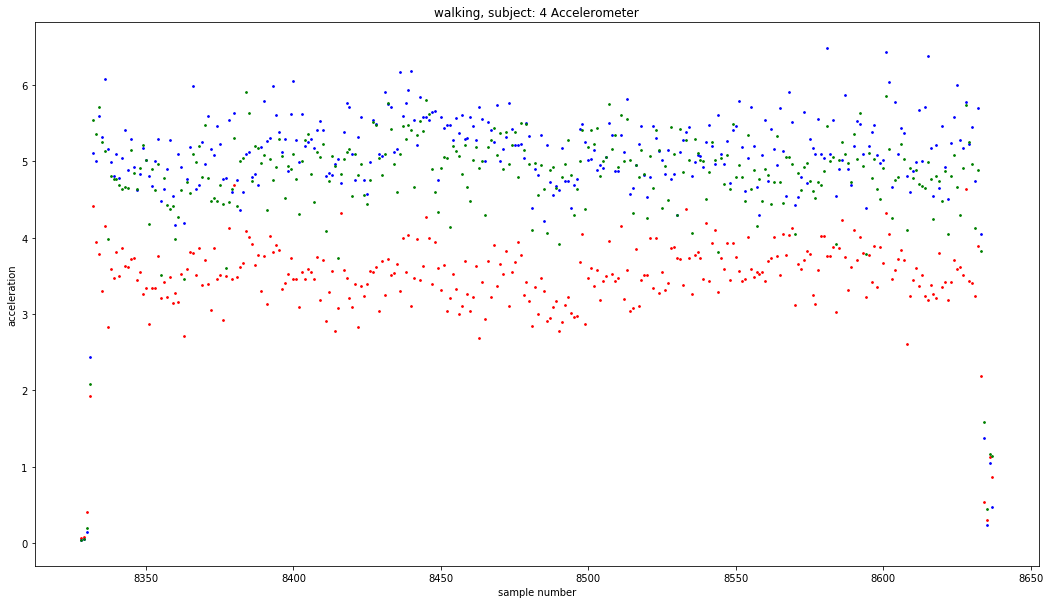

<Figure size 432x288 with 0 Axes>

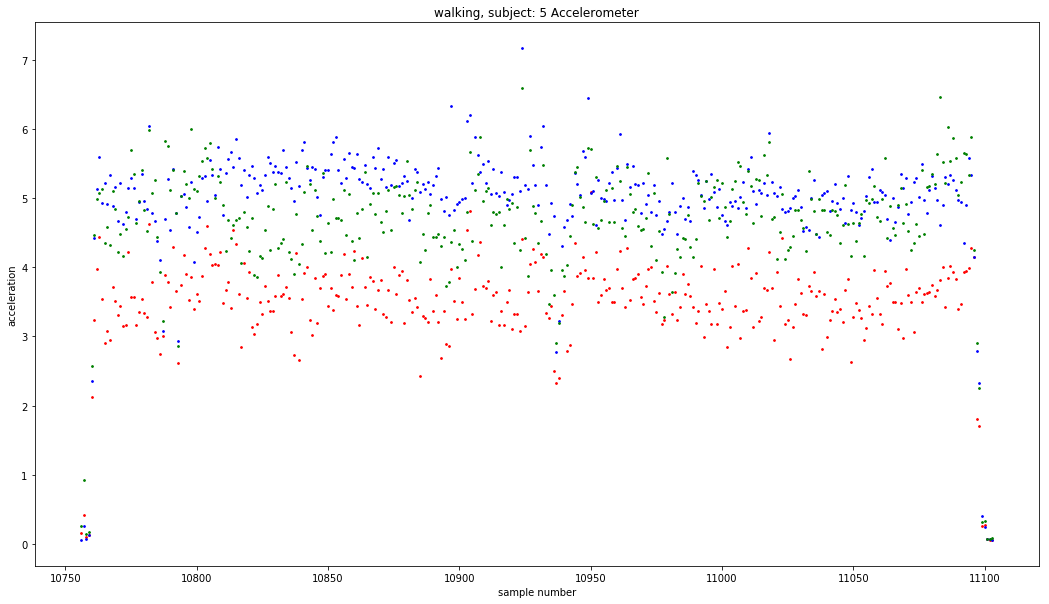

<Figure size 432x288 with 0 Axes>

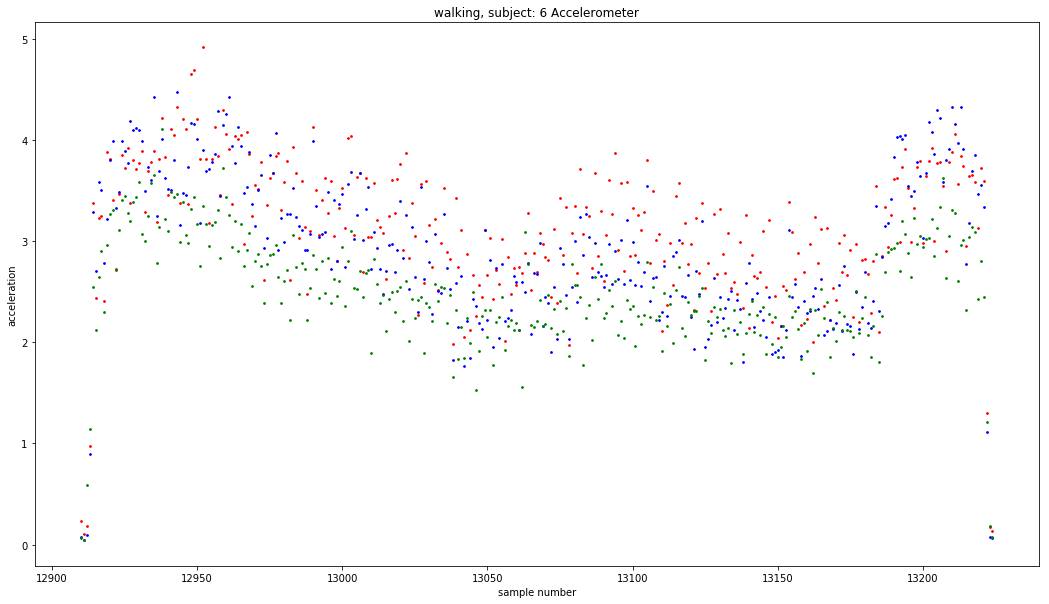

<Figure size 432x288 with 0 Axes>

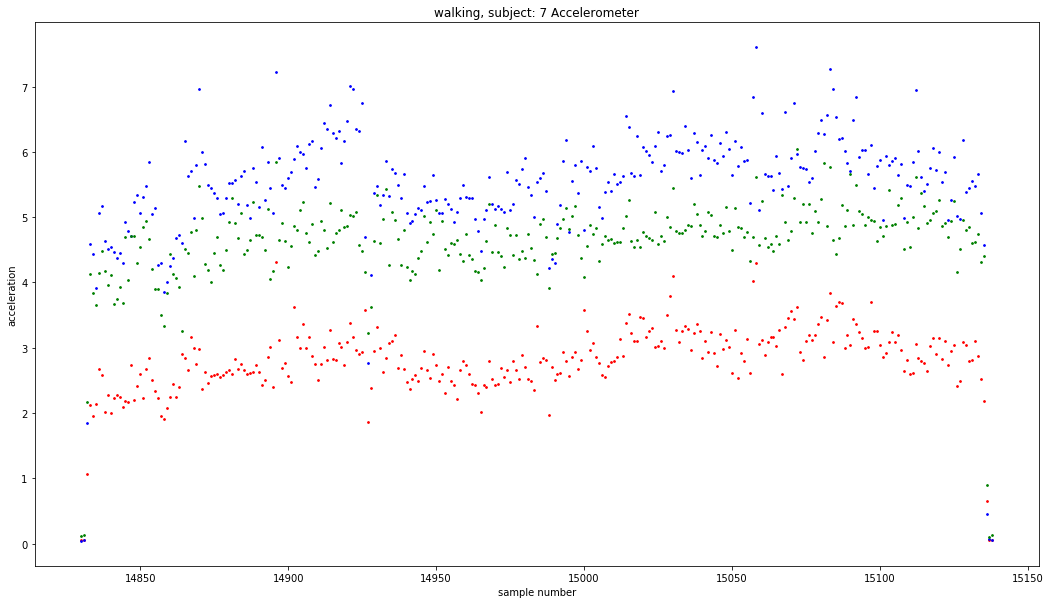

<Figure size 432x288 with 0 Axes>

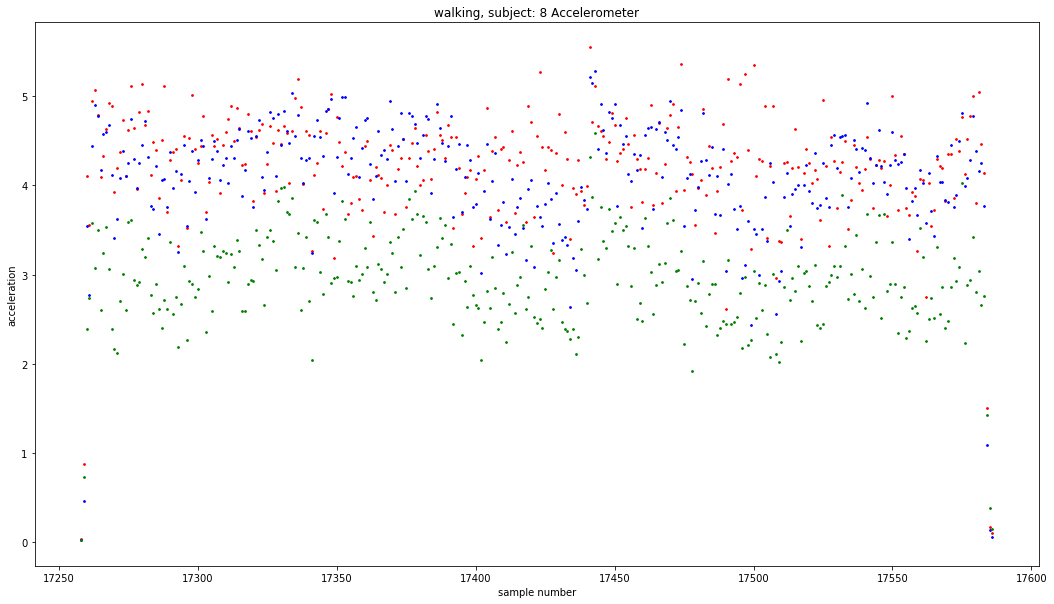

<Figure size 432x288 with 0 Axes>

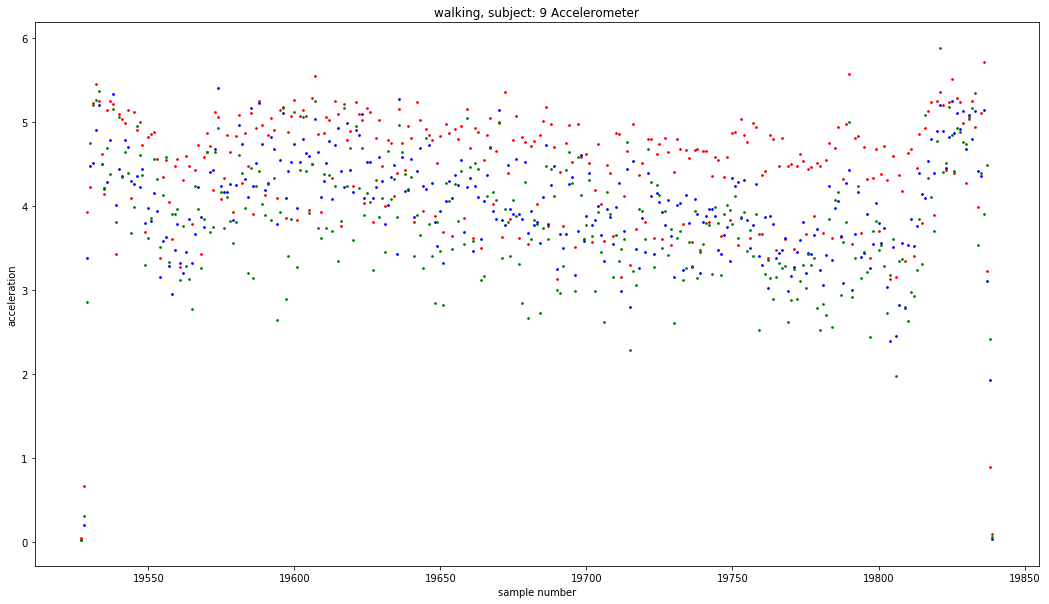

<Figure size 432x288 with 0 Axes>

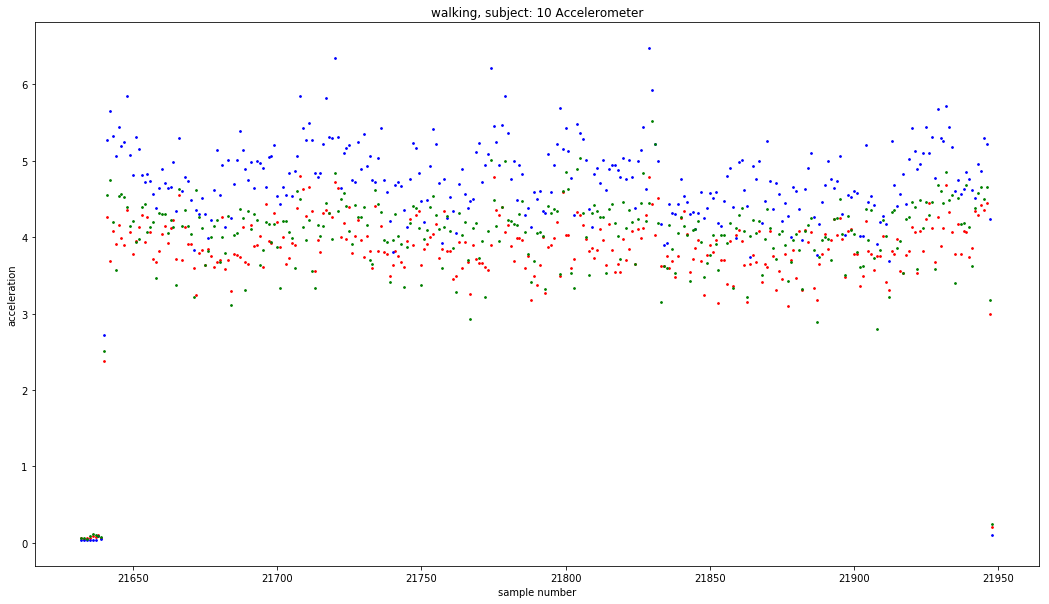

<Figure size 432x288 with 0 Axes>

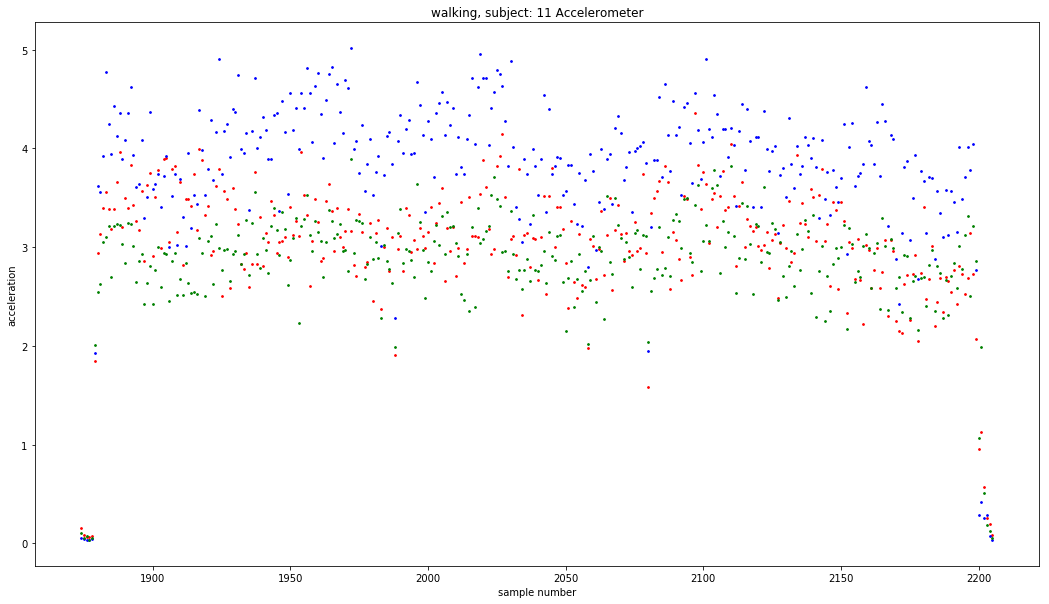

<Figure size 432x288 with 0 Axes>

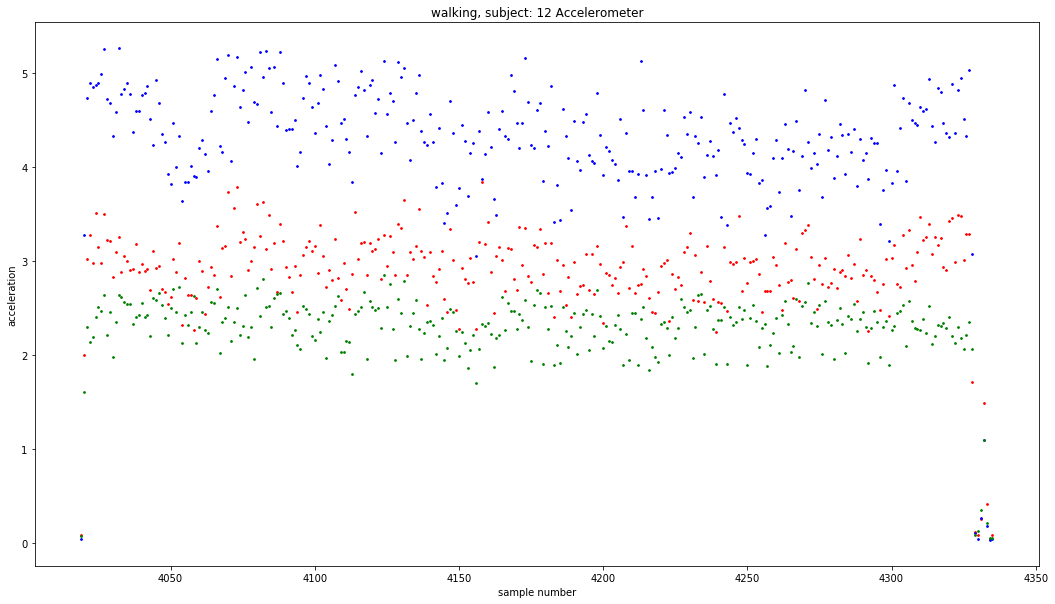

<Figure size 432x288 with 0 Axes>

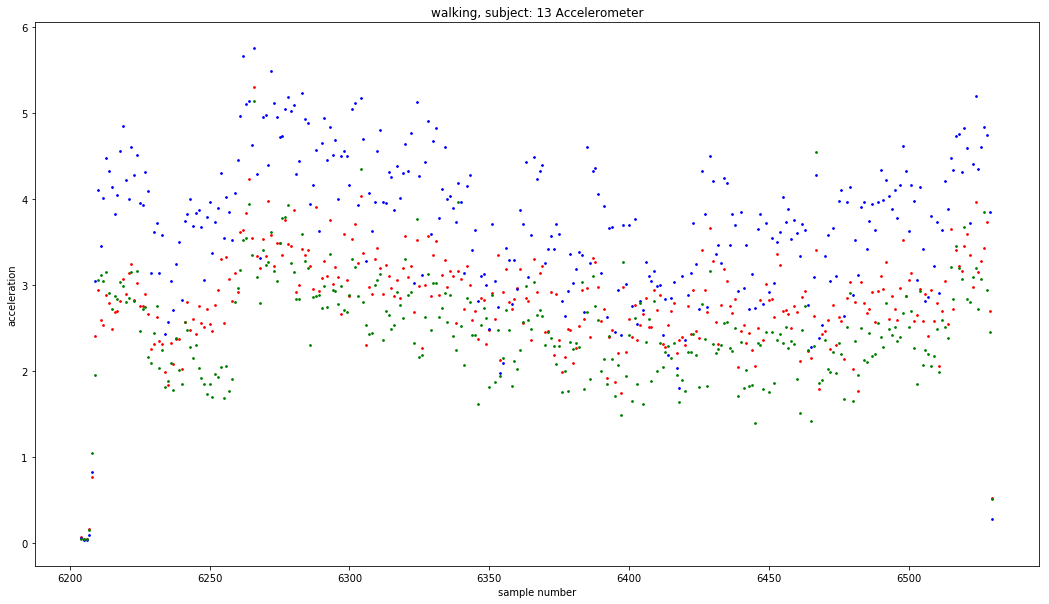

<Figure size 432x288 with 0 Axes>

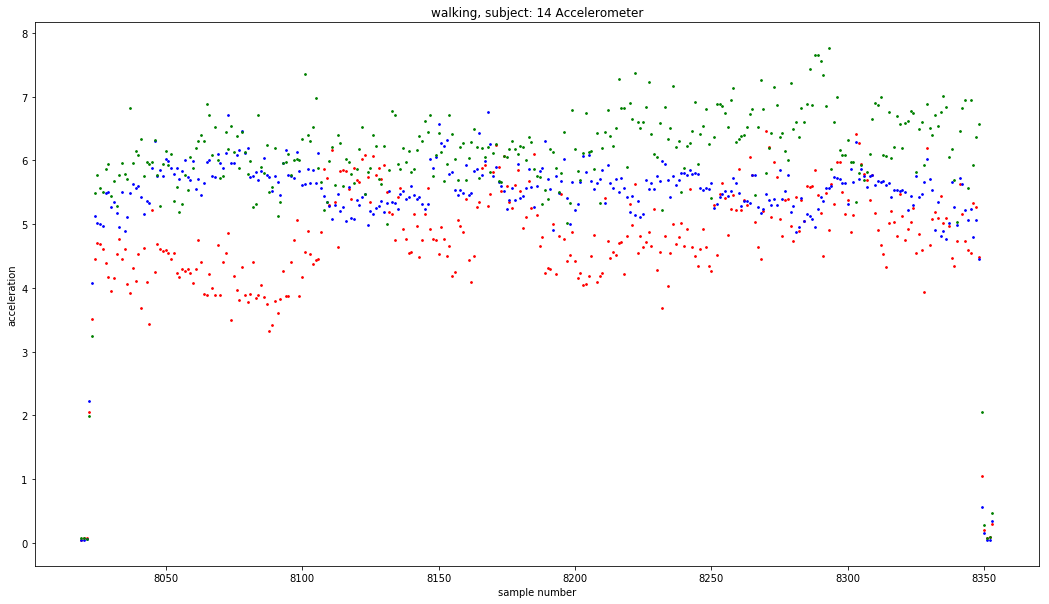

<Figure size 432x288 with 0 Axes>

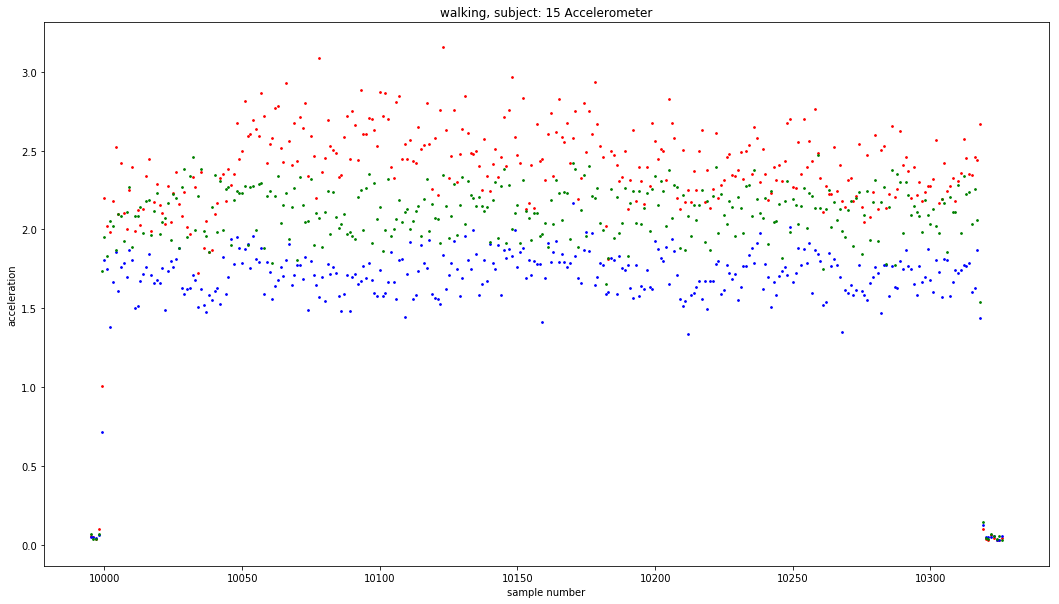

In [49]:
# plot standard deviation of acceleration data for all activities
activities =["climbingdown","climbingup","jumping","lying","running","sitting","standing","walking"]
for activity in activities:
    plot_std(deviation,activity)

## Drop samples that do not meet the threshold tests

Based on an inspection of the s.d. plots, the following thresholds were picked for removing the sample based on the sample s.d. of the y accelerometer:
* climbingdown y < 1.2 
* climbingup y < 1.2 
* jumping y < 3.5 
* lying y > 0.5 
* running  y < 5 
* sitting y > 1
* standing NONE
* walking y < 1.5

In [50]:
# this function extends the list of 'samples_to_drop' based on an operater (> or <) and a threshold
def find_bad_samples(activity,samples_to_drop,operator,threshold):
    mask =(deviation.activity == activity) & operator(deviation.attr_x_acc, threshold)
    return samples_to_drop.extend(list(df.sample_num[mask]))

In [51]:
# this code creates a list of samples_to_drop based on the threshold for each activity
import operator
samples_to_drop = []
find_bad_samples('climbingdown',samples_to_drop,operator.lt,1.2)
find_bad_samples('climbingup',samples_to_drop,operator.lt,1.2)
find_bad_samples('jumping',samples_to_drop,operator.lt,3.5)
find_bad_samples('lying',samples_to_drop,operator.gt,0.5)
find_bad_samples('running',samples_to_drop,operator.lt,5)
find_bad_samples('sitting',samples_to_drop,operator.gt,1)
find_bad_samples('walking',samples_to_drop,operator.lt,1.5)

In [52]:
len(samples_to_drop)

2559

In [53]:
len(deviation)

32276

In [54]:
# share of samples to be dropped = 8%
2559/32276

0.07928491758582228

In [44]:
# create dataframe of clean data based on samples that are NOT in samples_to_drop list
clean_data = alldata[~alldata.sample_num.isin(samples_to_drop)]

In [45]:
clean_data.shape

(2839500, 12)

In [46]:
# save cleaned data
clean_data.to_pickle('./clean_data.pkl')

<Figure size 432x288 with 0 Axes>

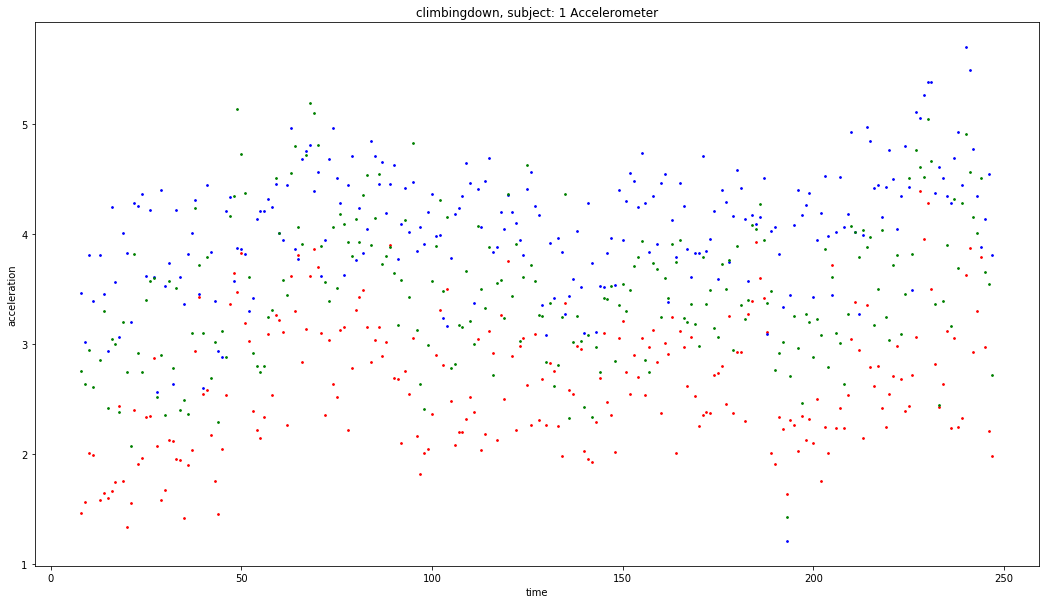

<Figure size 432x288 with 0 Axes>

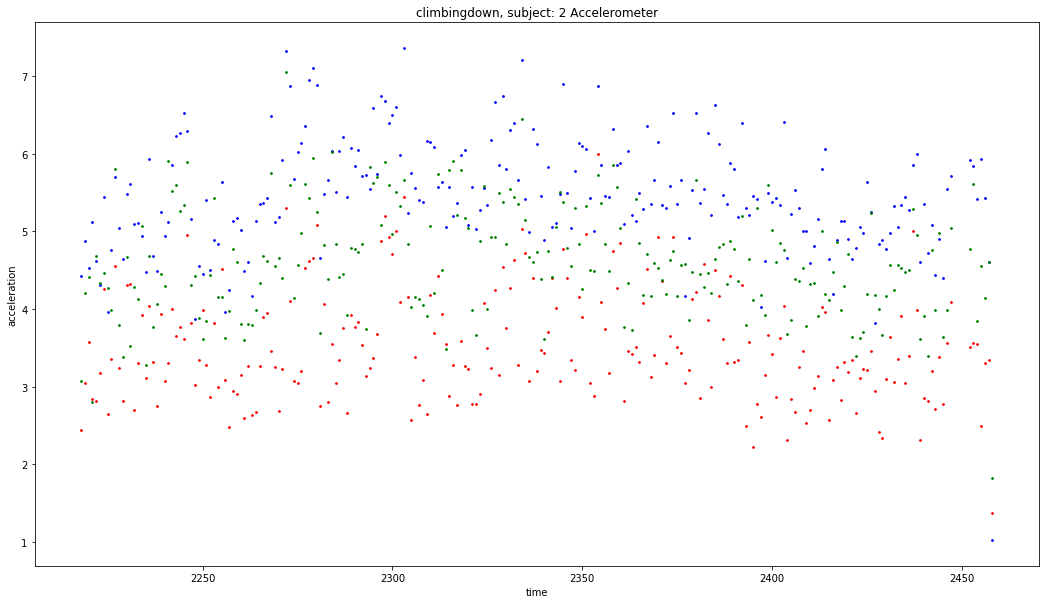

<Figure size 432x288 with 0 Axes>

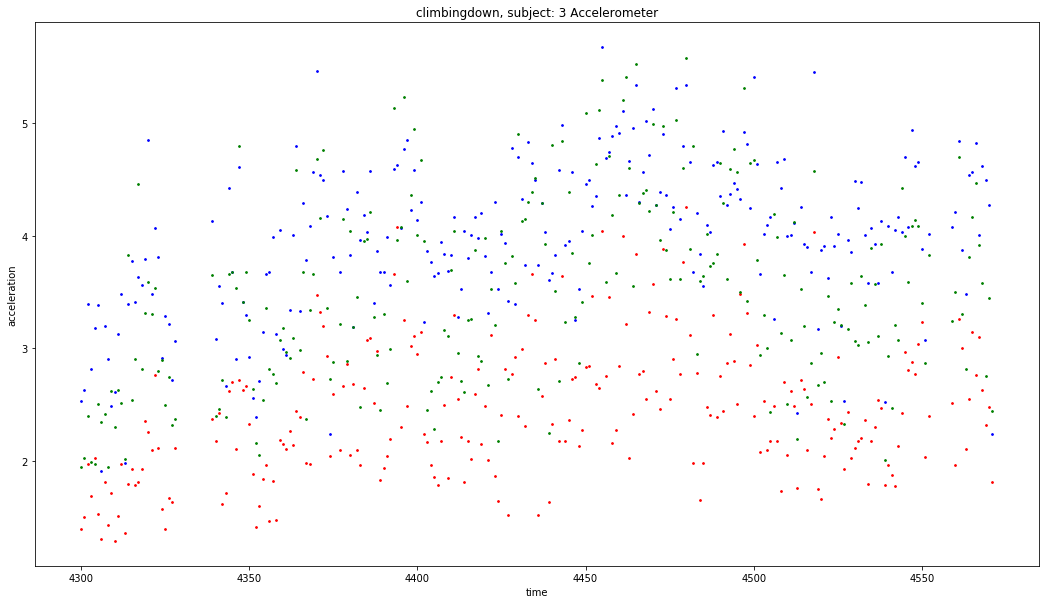

<Figure size 432x288 with 0 Axes>

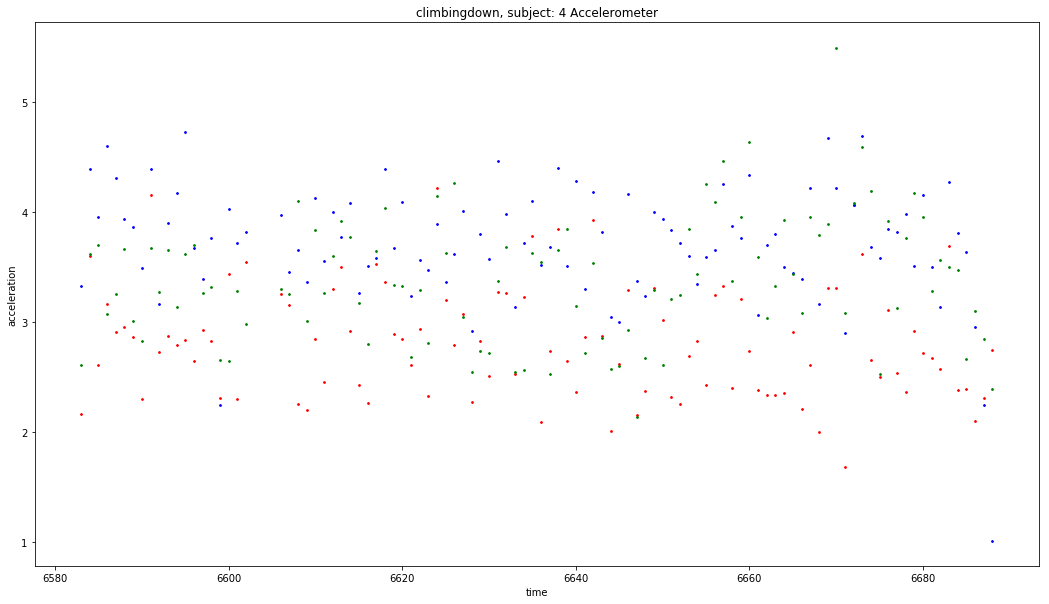

<Figure size 432x288 with 0 Axes>

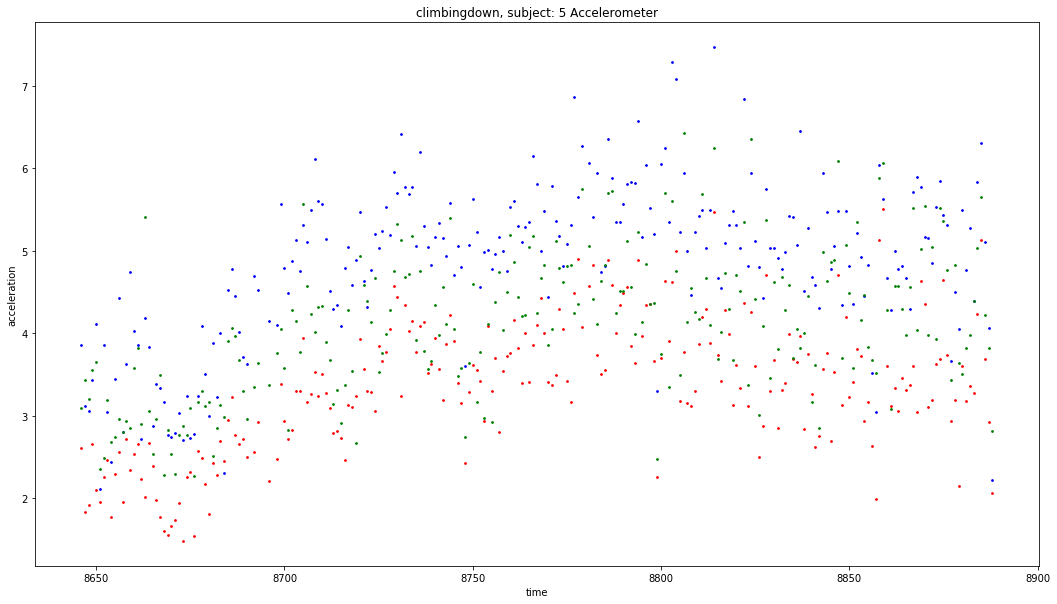

<Figure size 432x288 with 0 Axes>

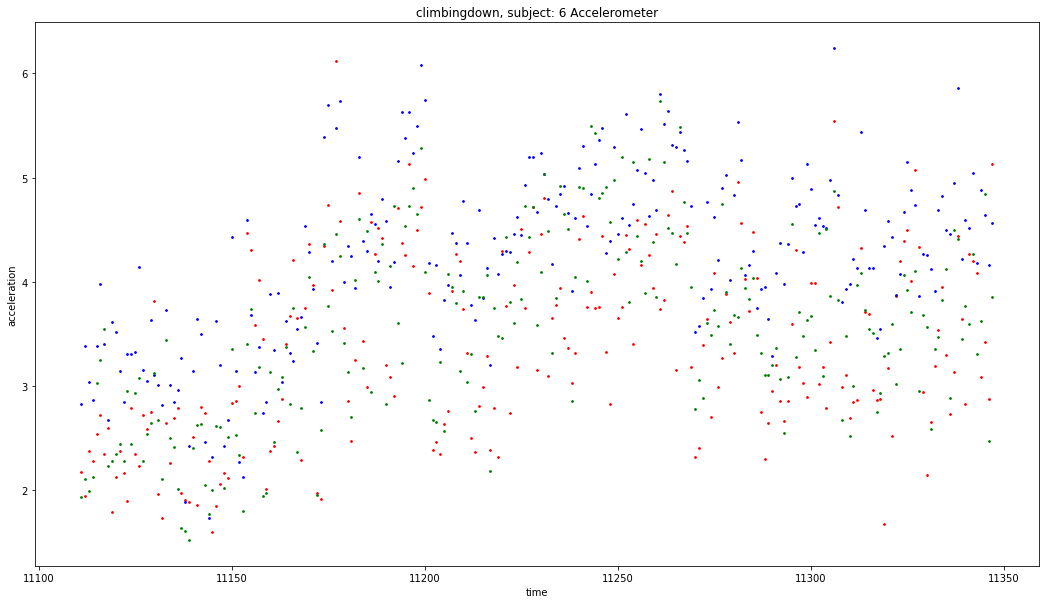

<Figure size 432x288 with 0 Axes>

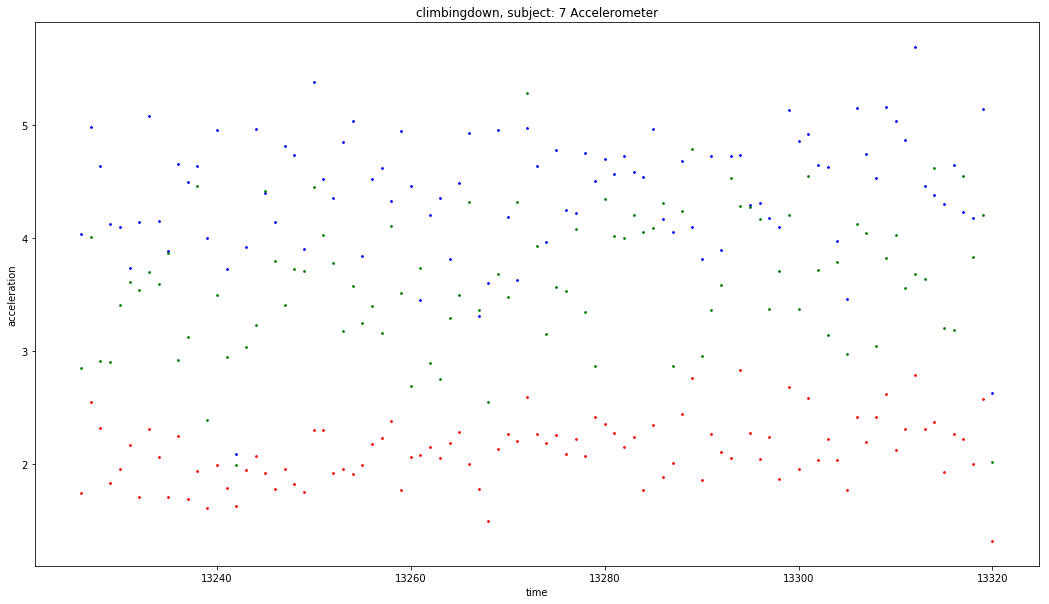

<Figure size 432x288 with 0 Axes>

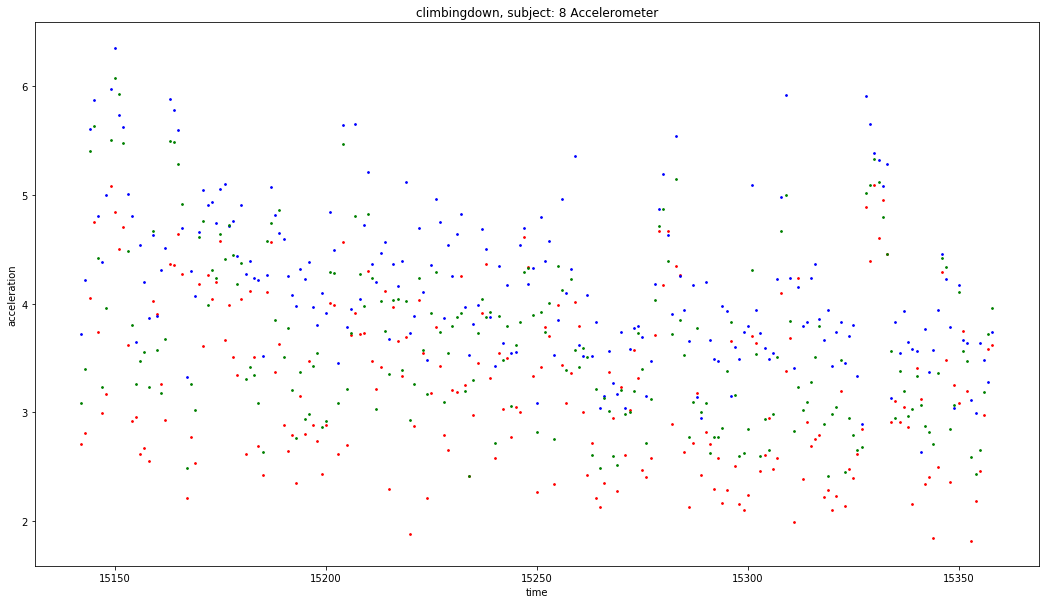

<Figure size 432x288 with 0 Axes>

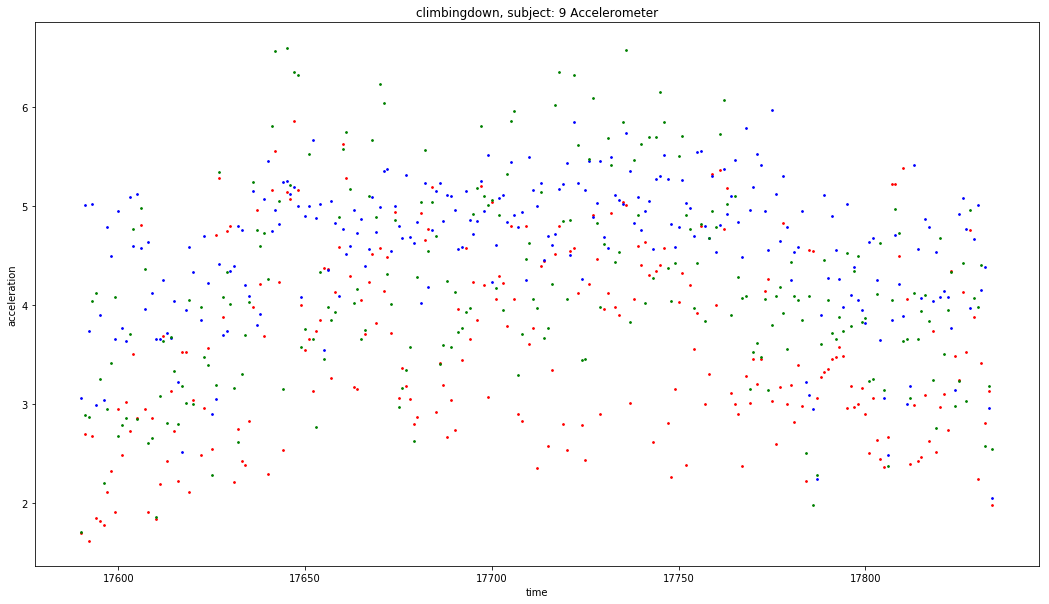

<Figure size 432x288 with 0 Axes>

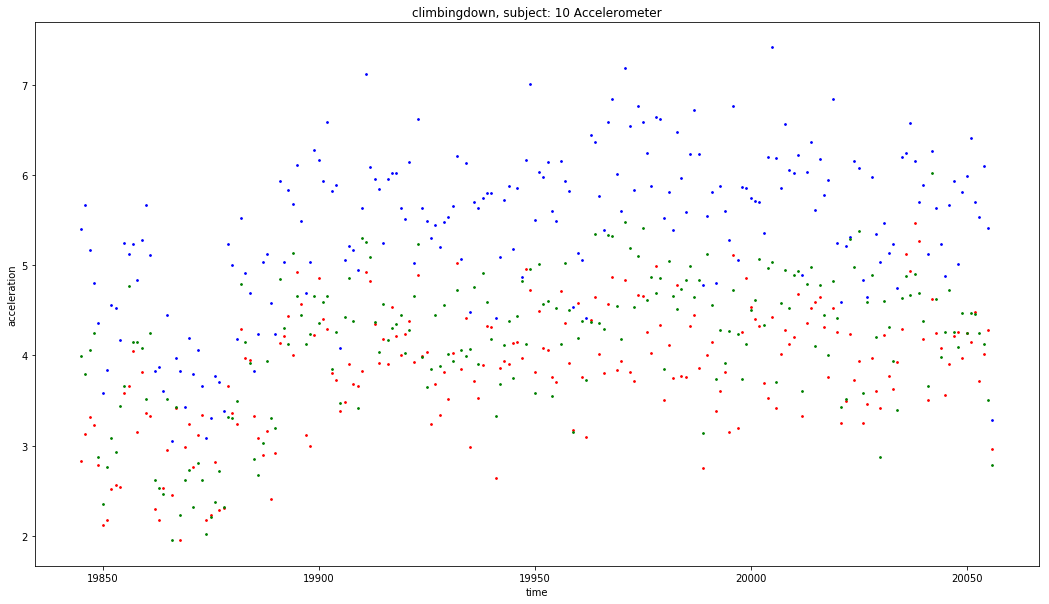

<Figure size 432x288 with 0 Axes>

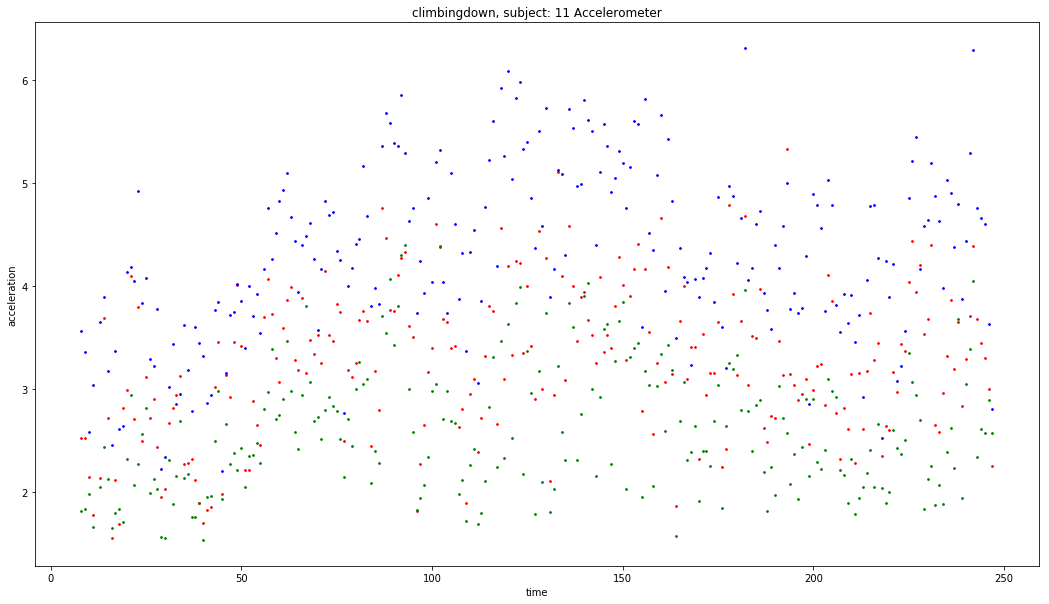

<Figure size 432x288 with 0 Axes>

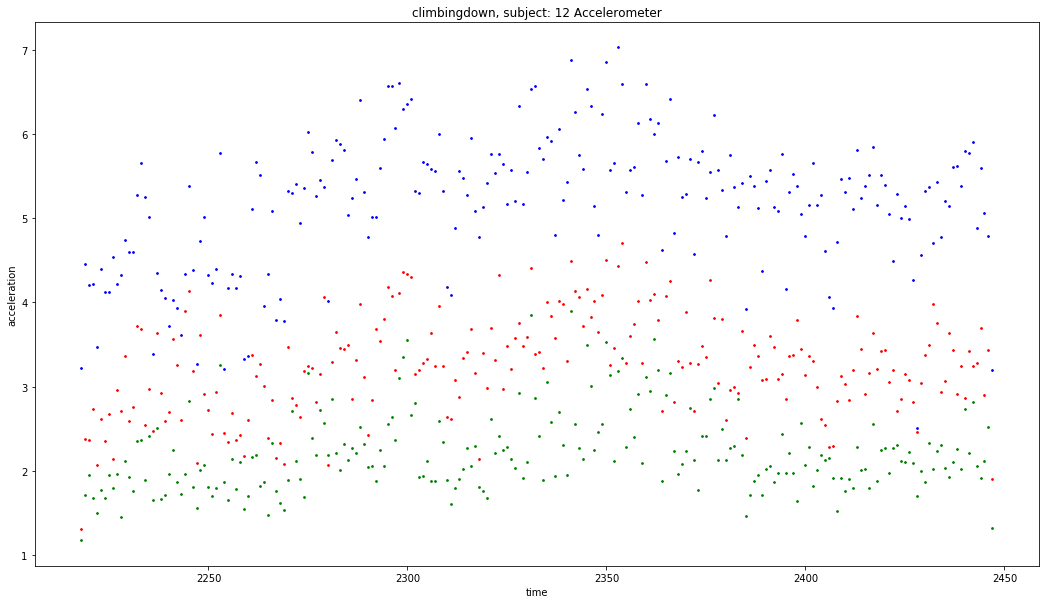

<Figure size 432x288 with 0 Axes>

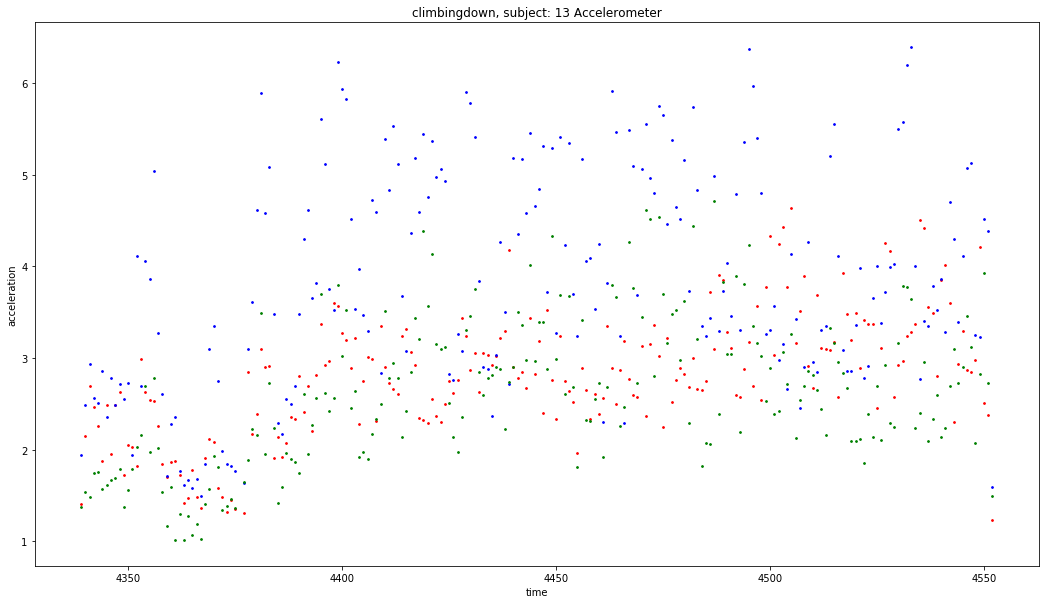

<Figure size 432x288 with 0 Axes>

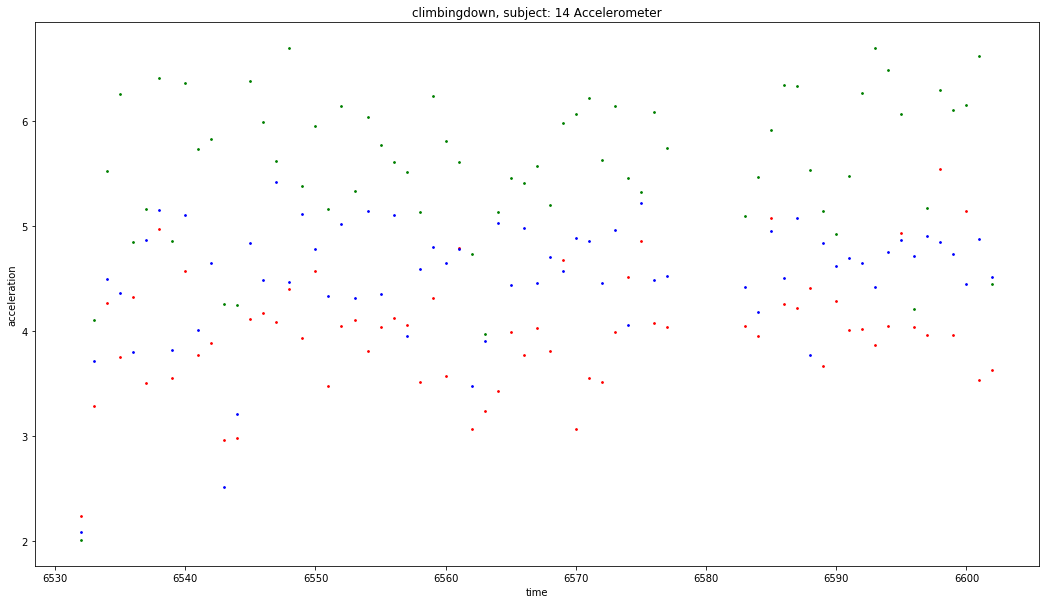

<Figure size 432x288 with 0 Axes>

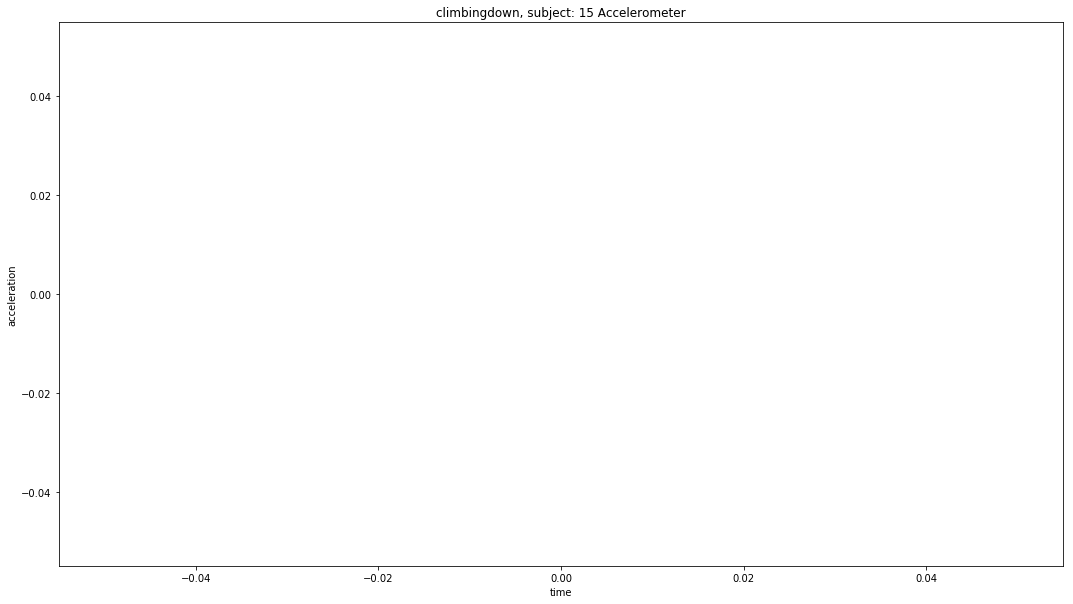

<Figure size 432x288 with 0 Axes>

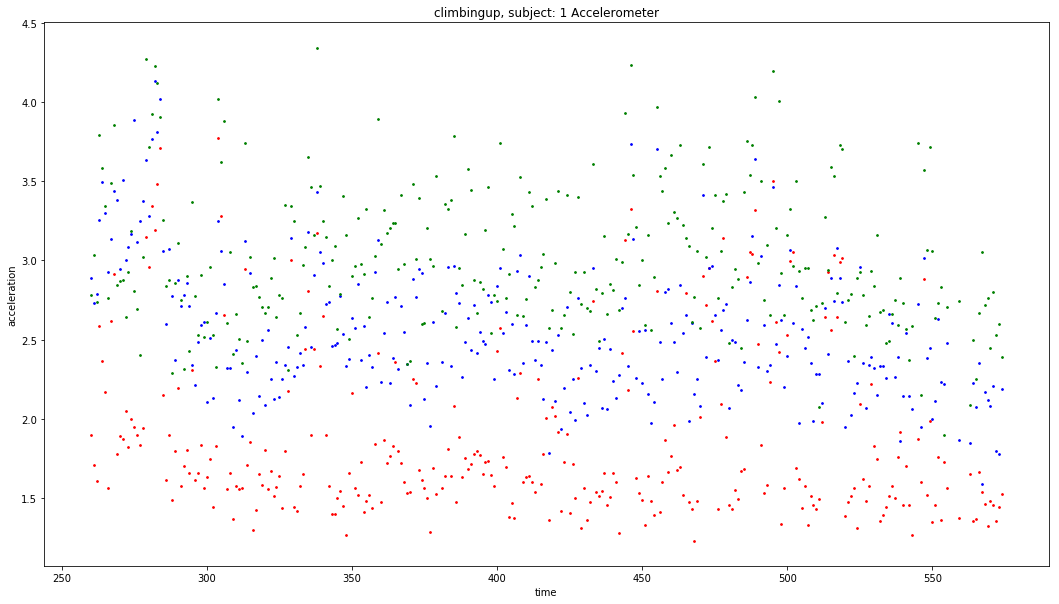

<Figure size 432x288 with 0 Axes>

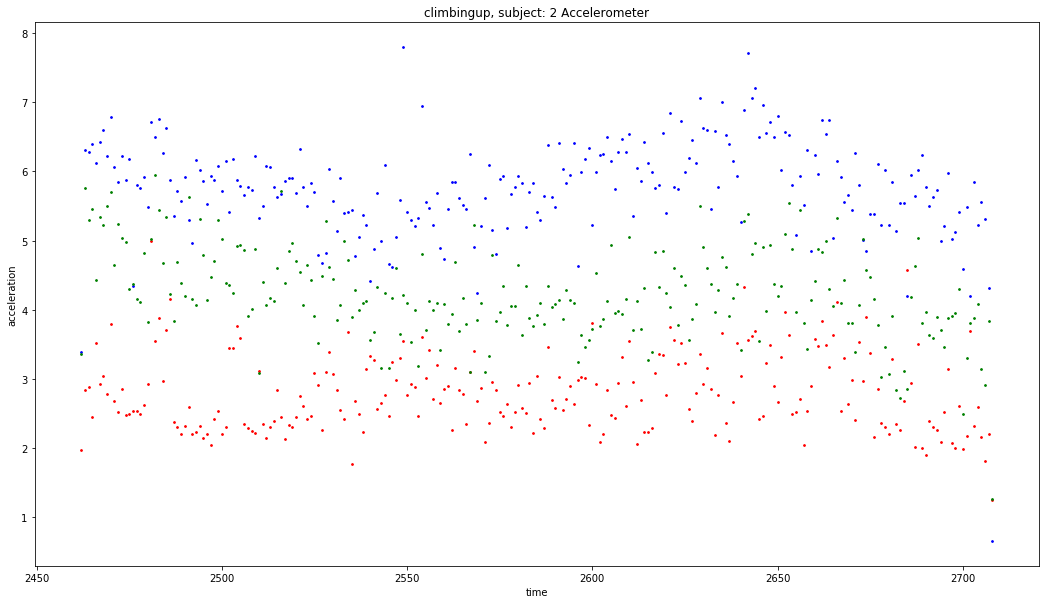

<Figure size 432x288 with 0 Axes>

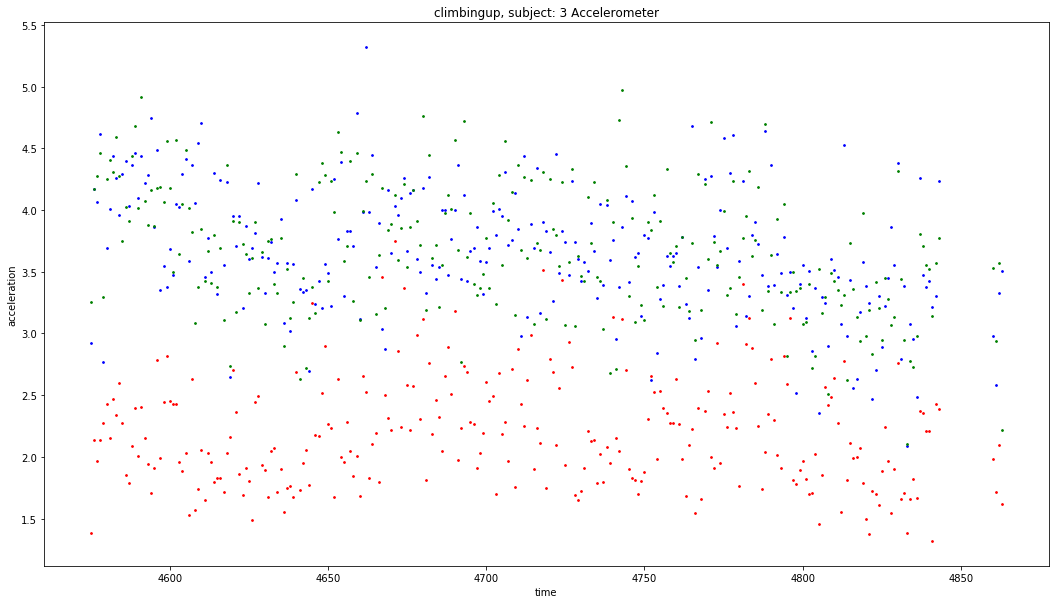

<Figure size 432x288 with 0 Axes>

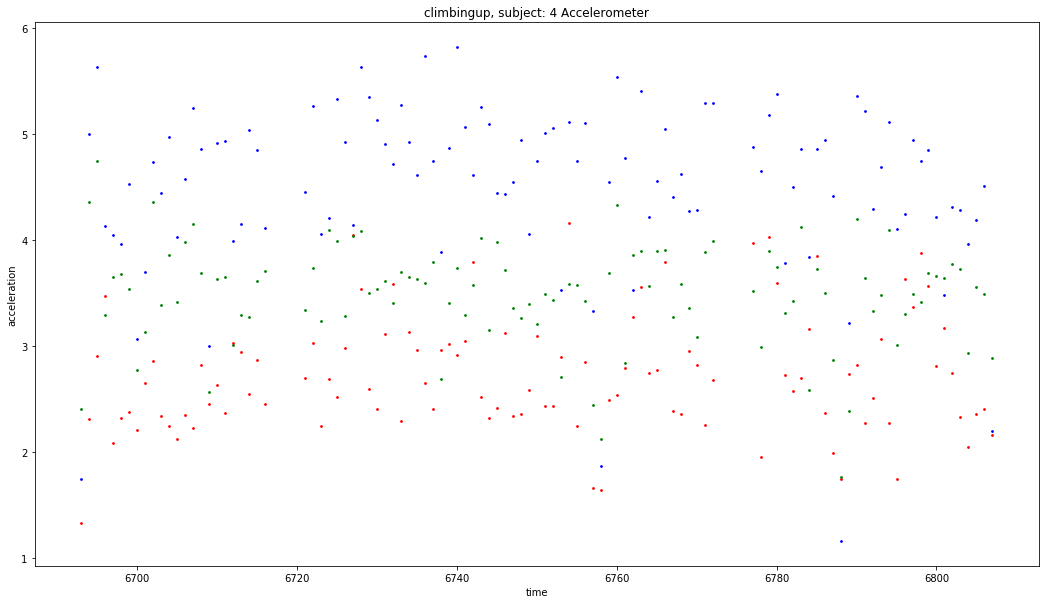

<Figure size 432x288 with 0 Axes>

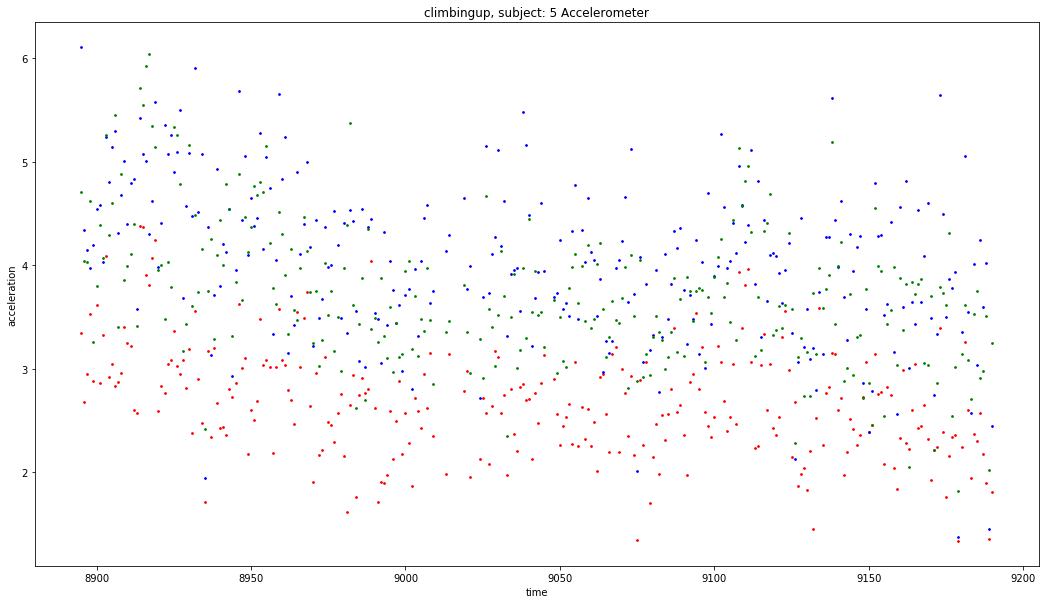

<Figure size 432x288 with 0 Axes>

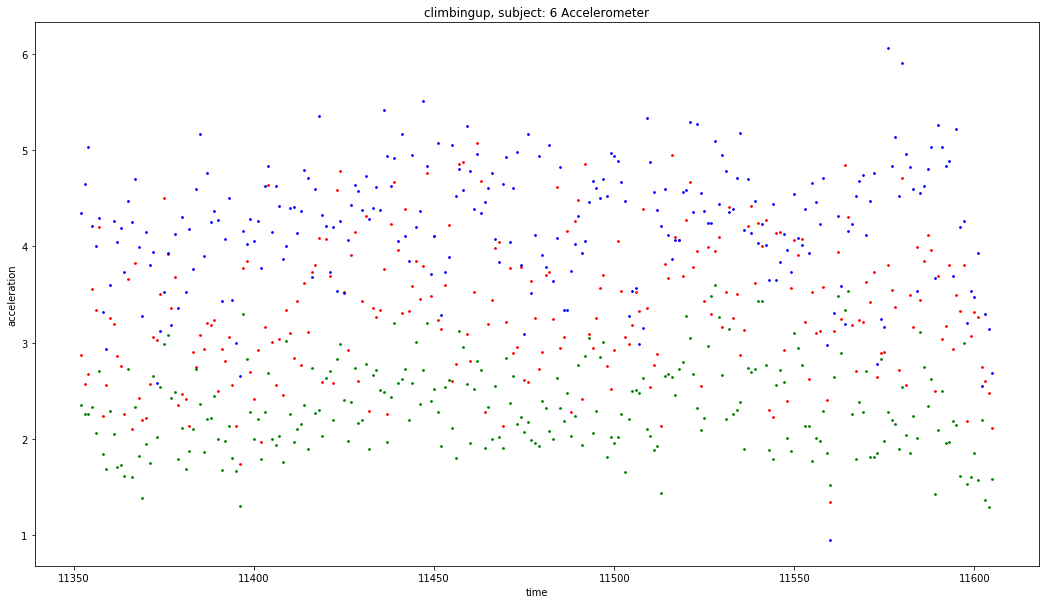

<Figure size 432x288 with 0 Axes>

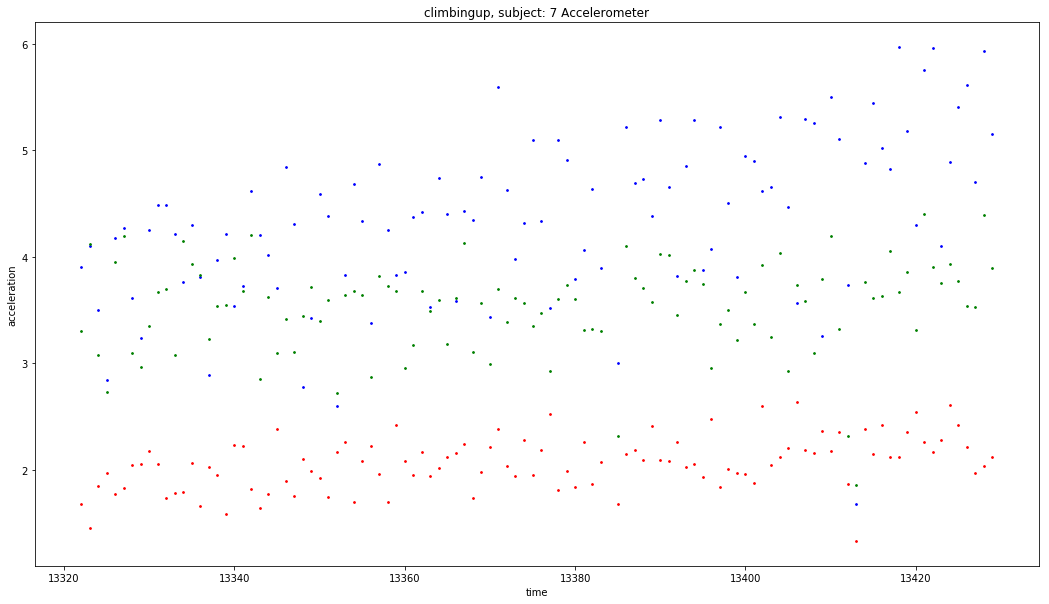

<Figure size 432x288 with 0 Axes>

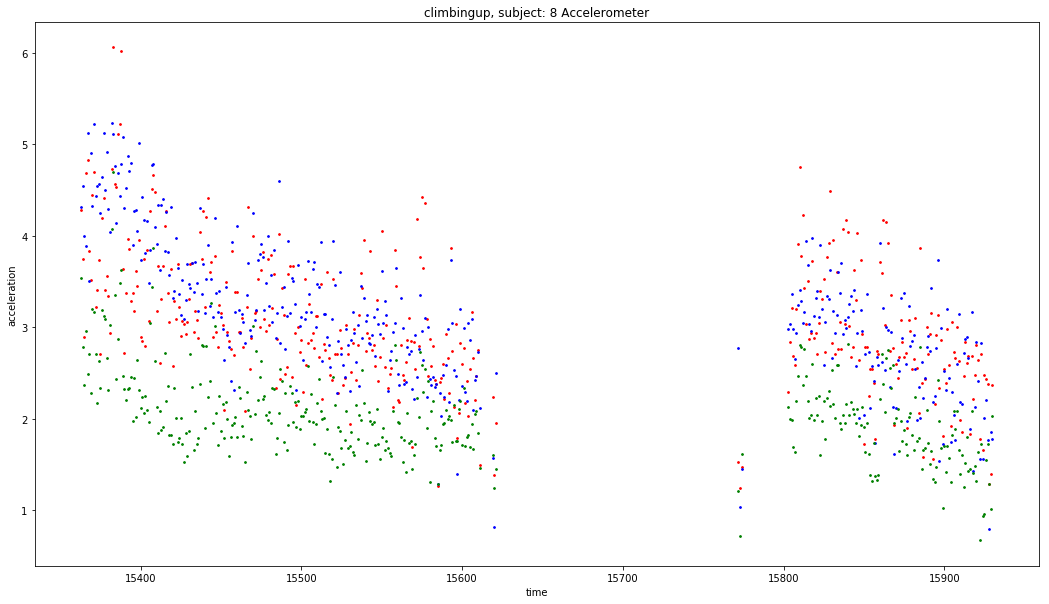

<Figure size 432x288 with 0 Axes>

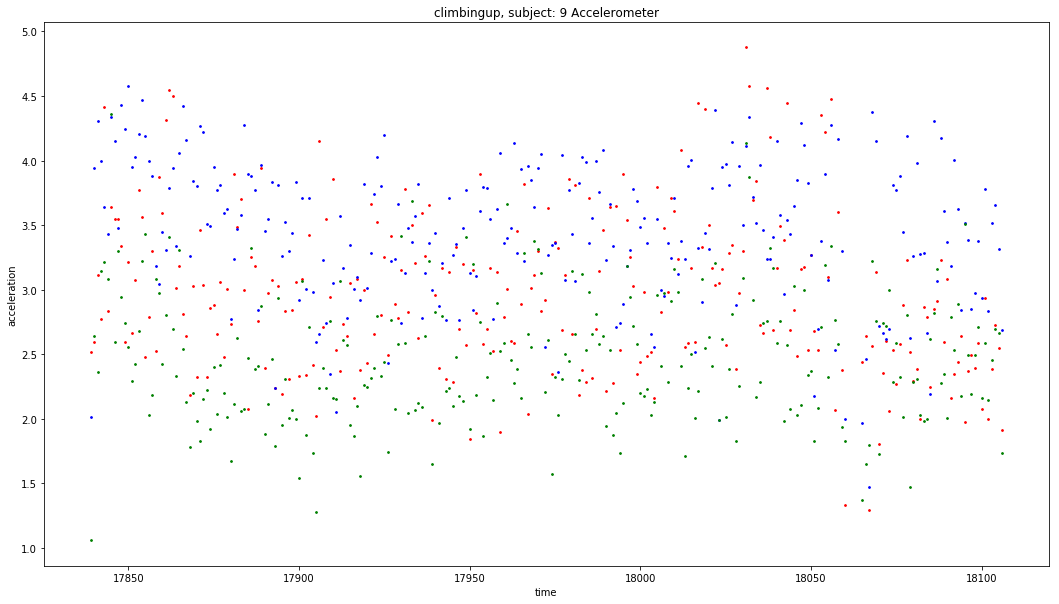

<Figure size 432x288 with 0 Axes>

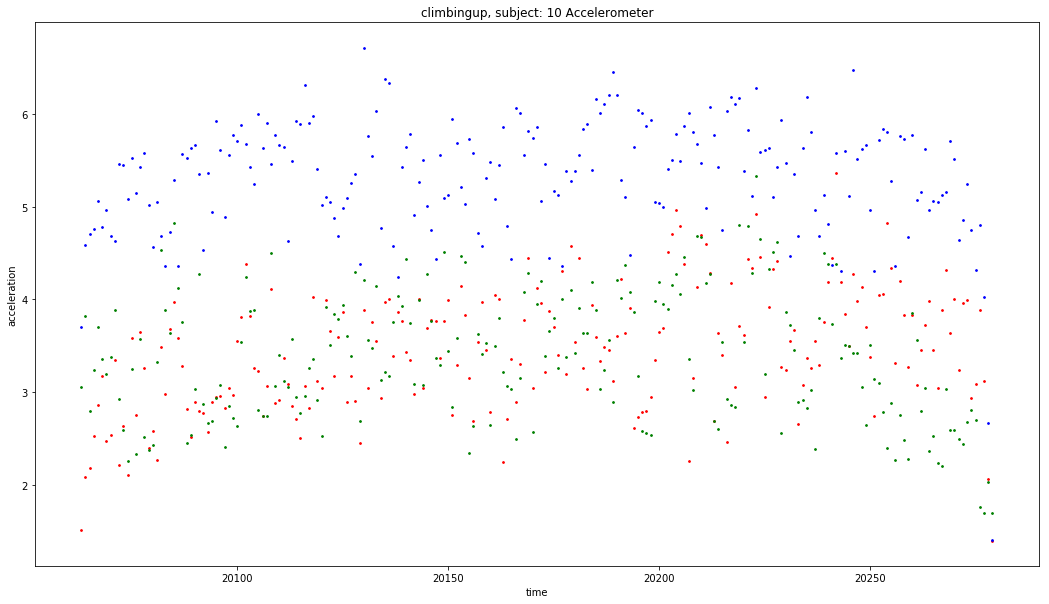

<Figure size 432x288 with 0 Axes>

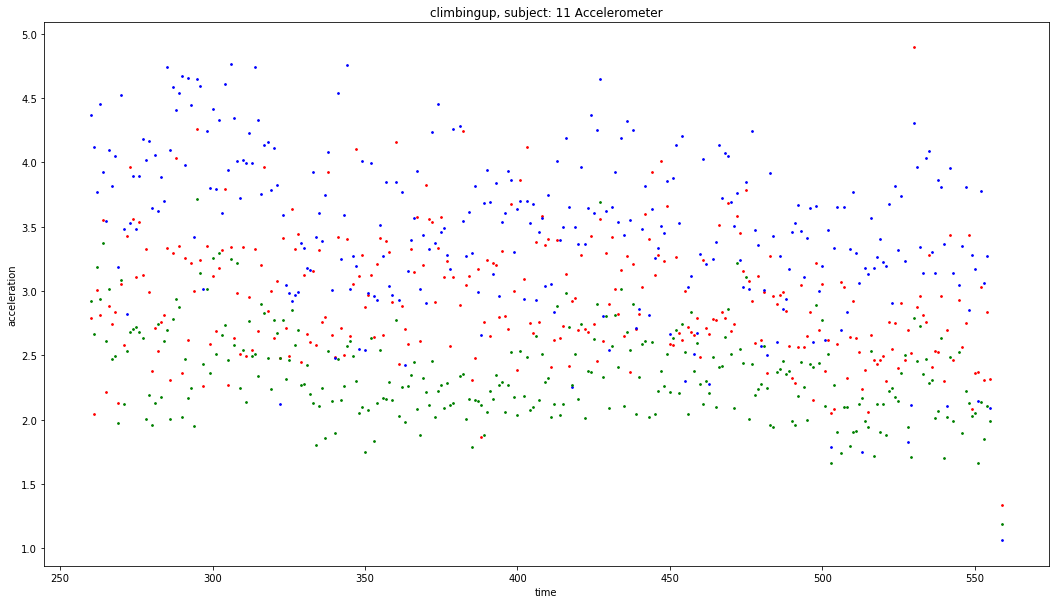

<Figure size 432x288 with 0 Axes>

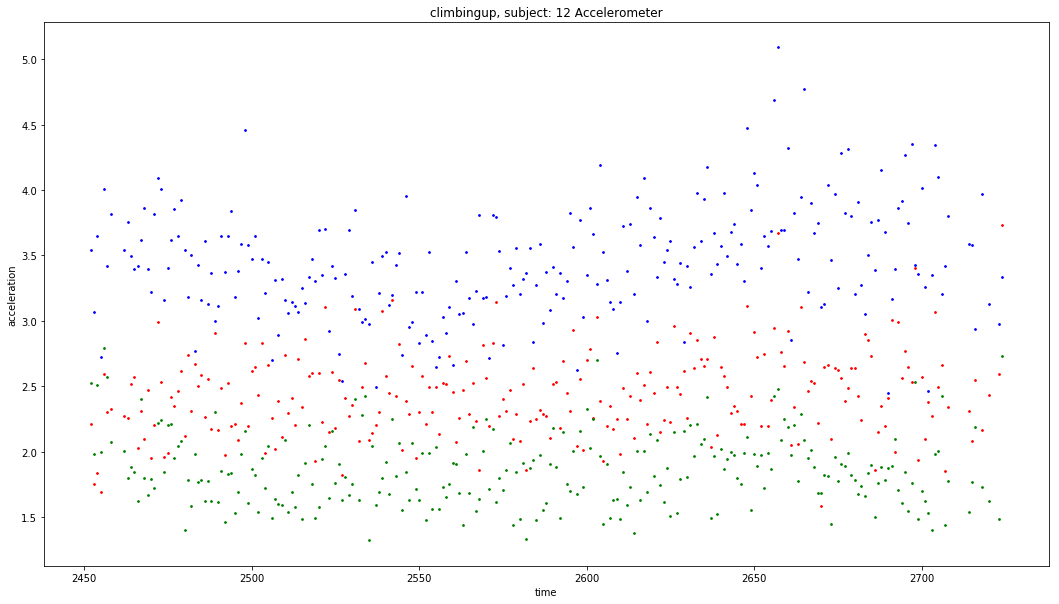

<Figure size 432x288 with 0 Axes>

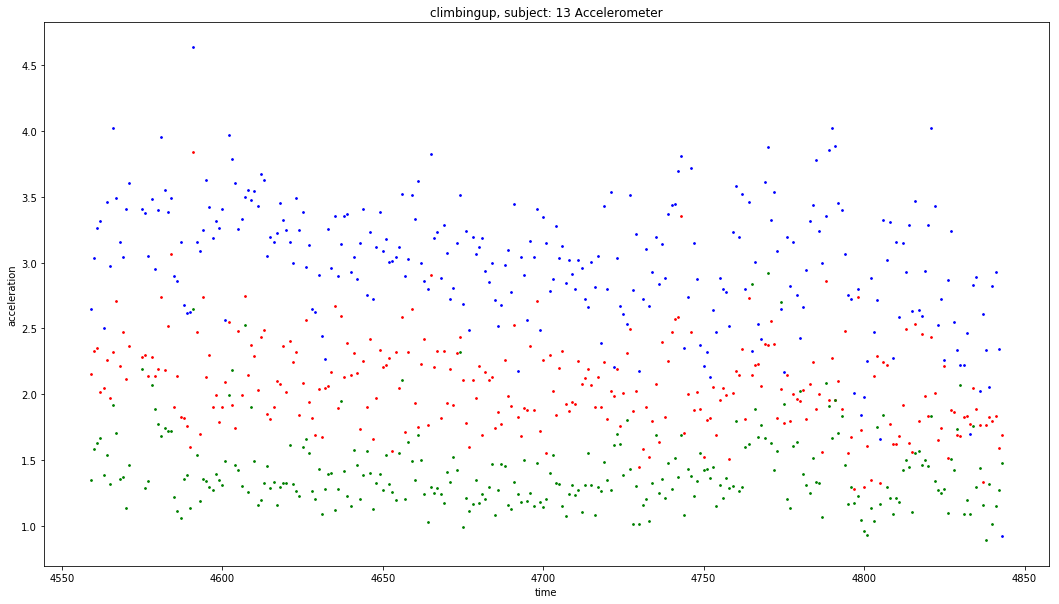

<Figure size 432x288 with 0 Axes>

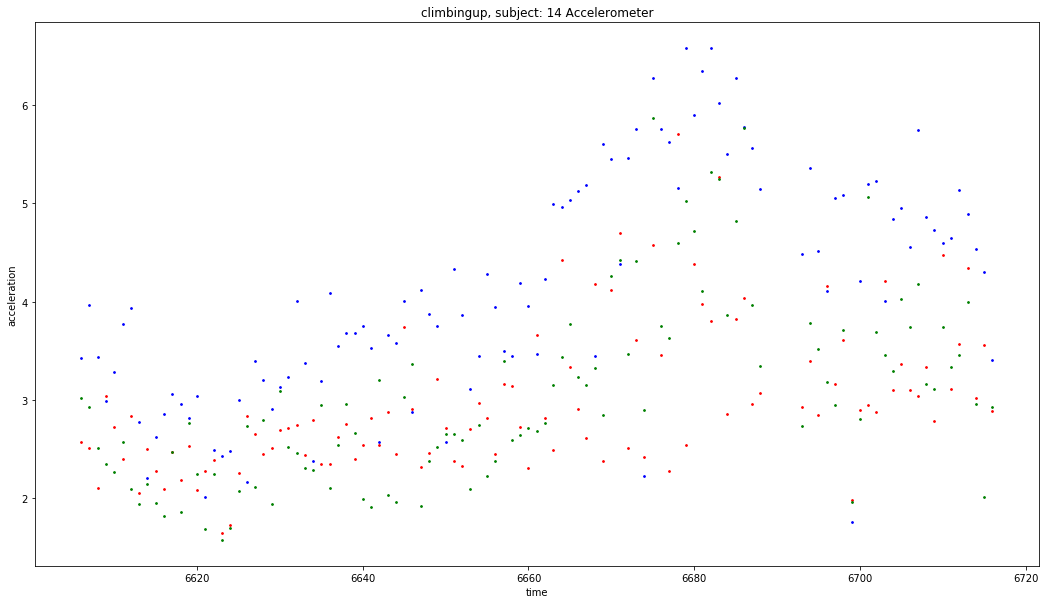

<Figure size 432x288 with 0 Axes>

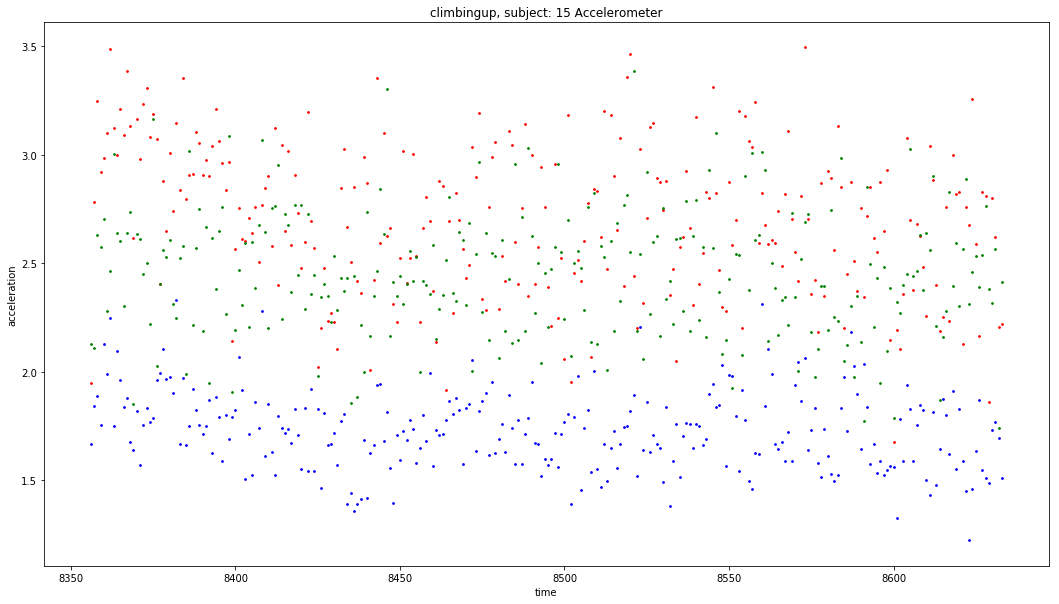

<Figure size 432x288 with 0 Axes>

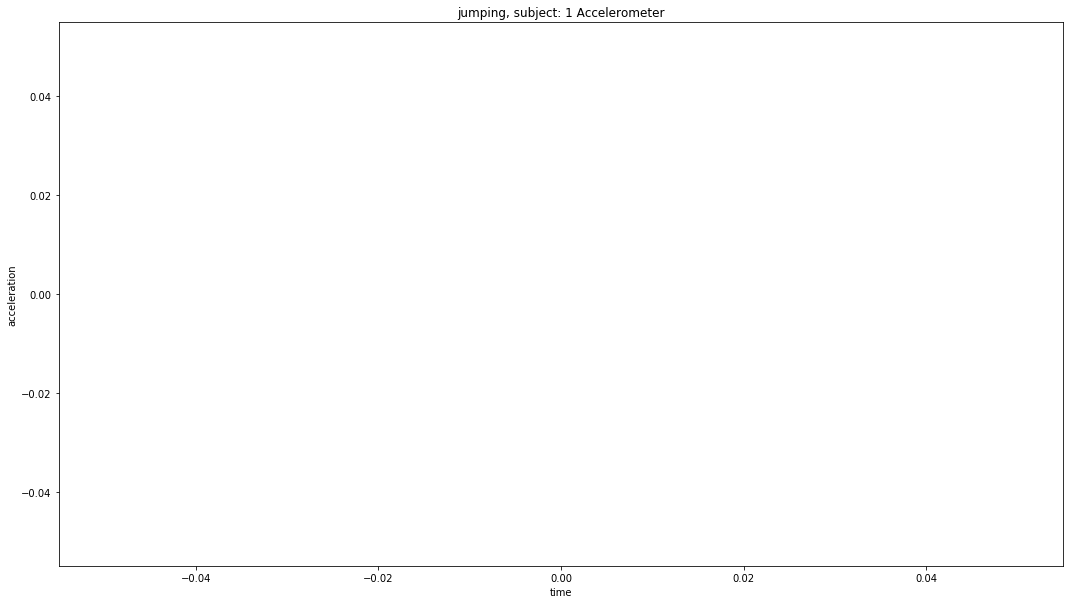

<Figure size 432x288 with 0 Axes>

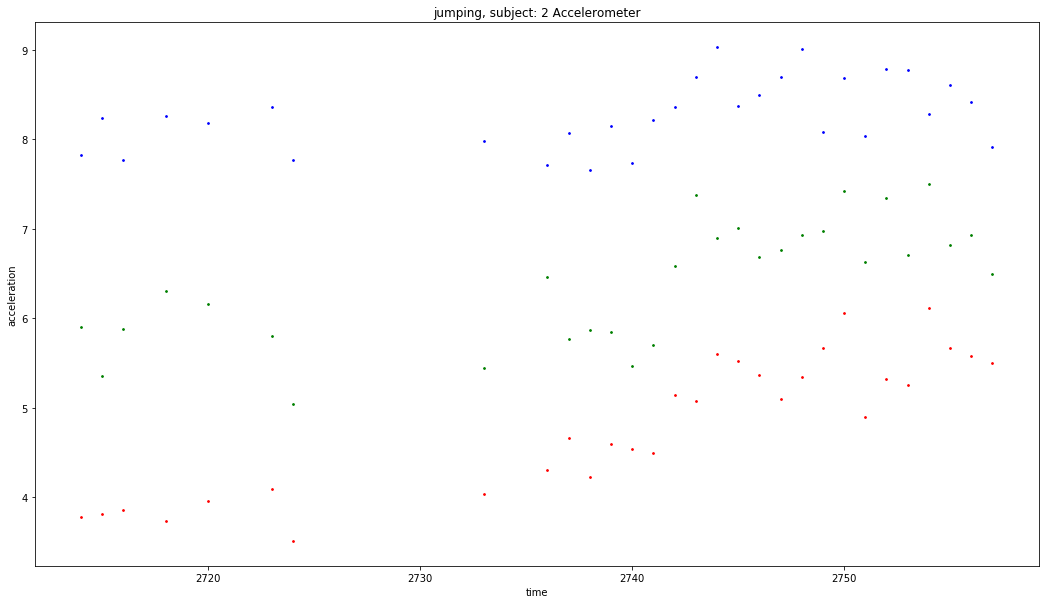

<Figure size 432x288 with 0 Axes>

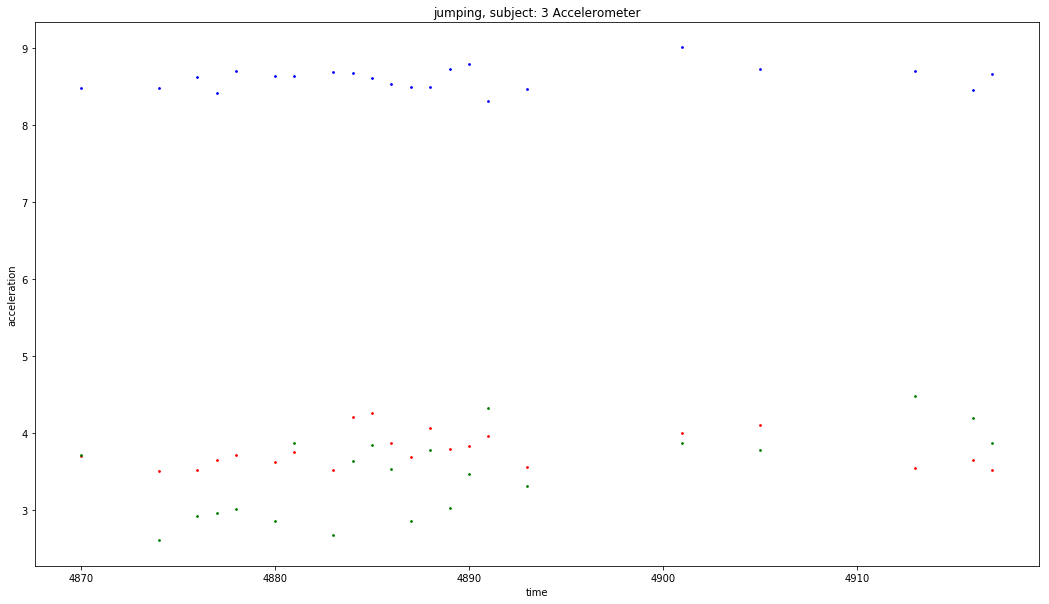

<Figure size 432x288 with 0 Axes>

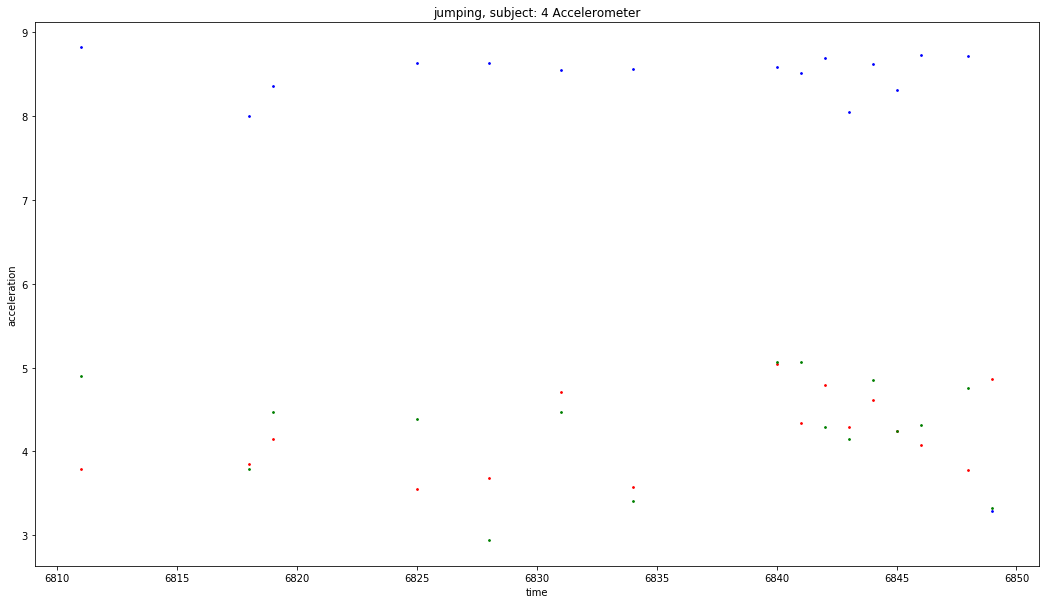

<Figure size 432x288 with 0 Axes>

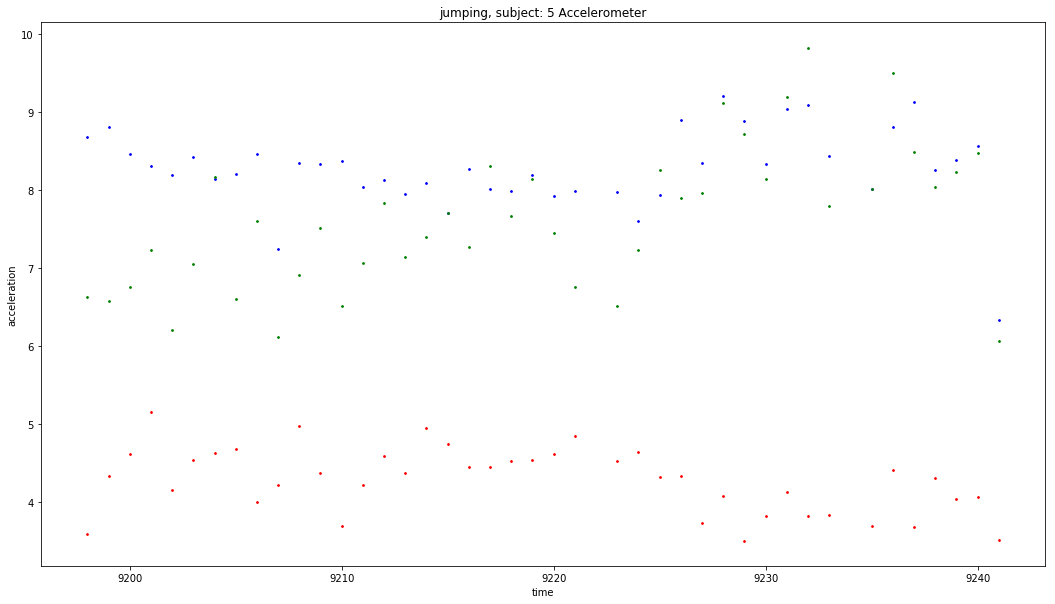

<Figure size 432x288 with 0 Axes>

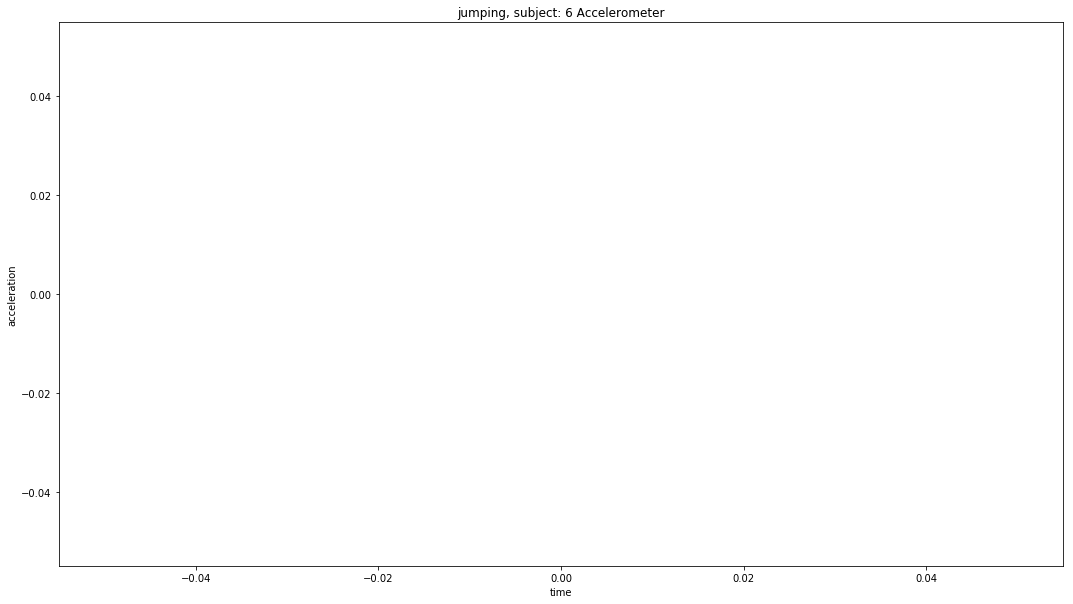

<Figure size 432x288 with 0 Axes>

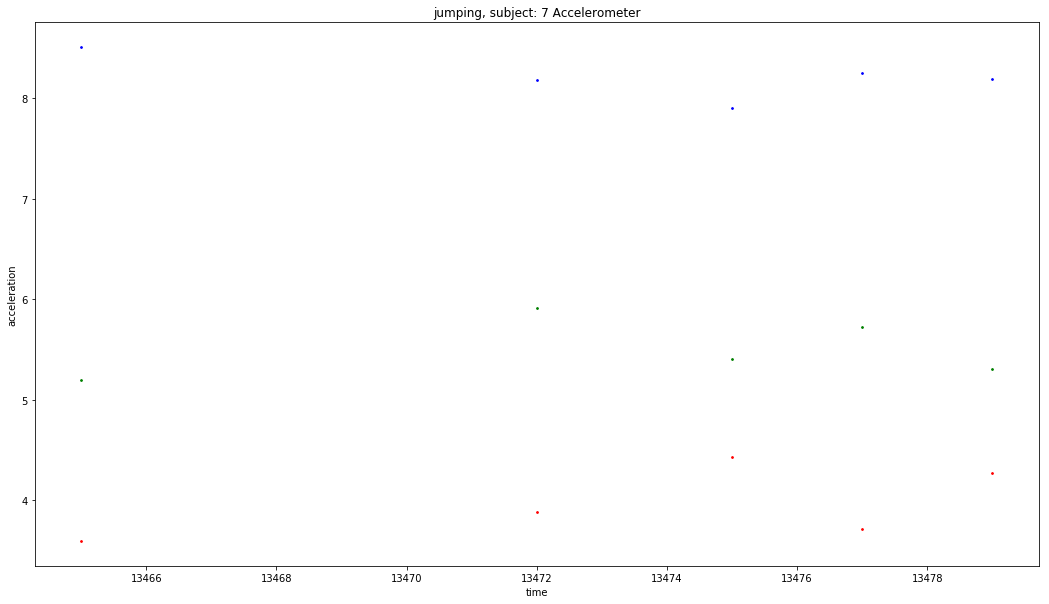

<Figure size 432x288 with 0 Axes>

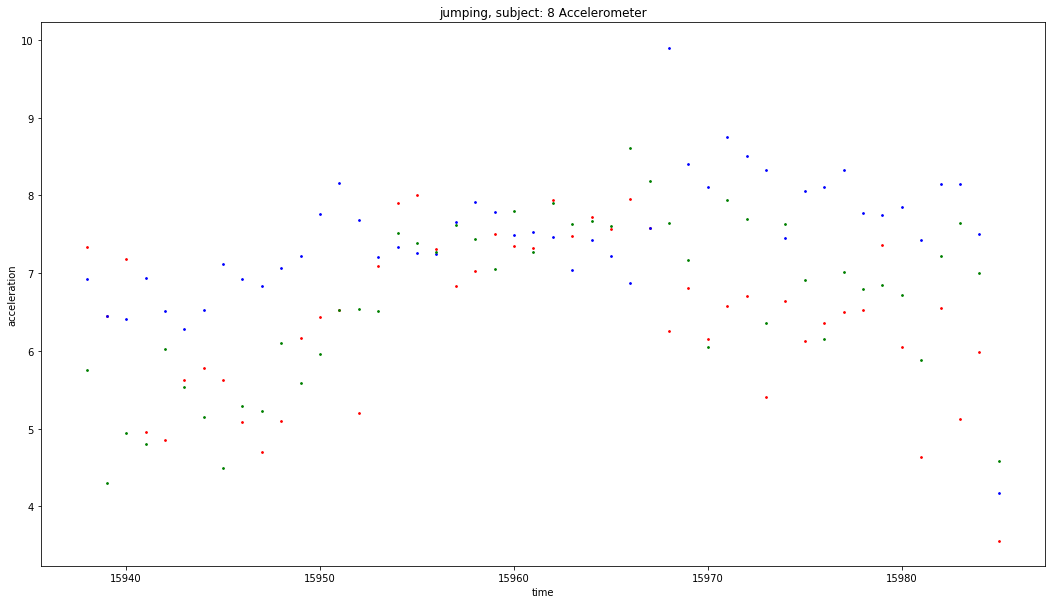

<Figure size 432x288 with 0 Axes>

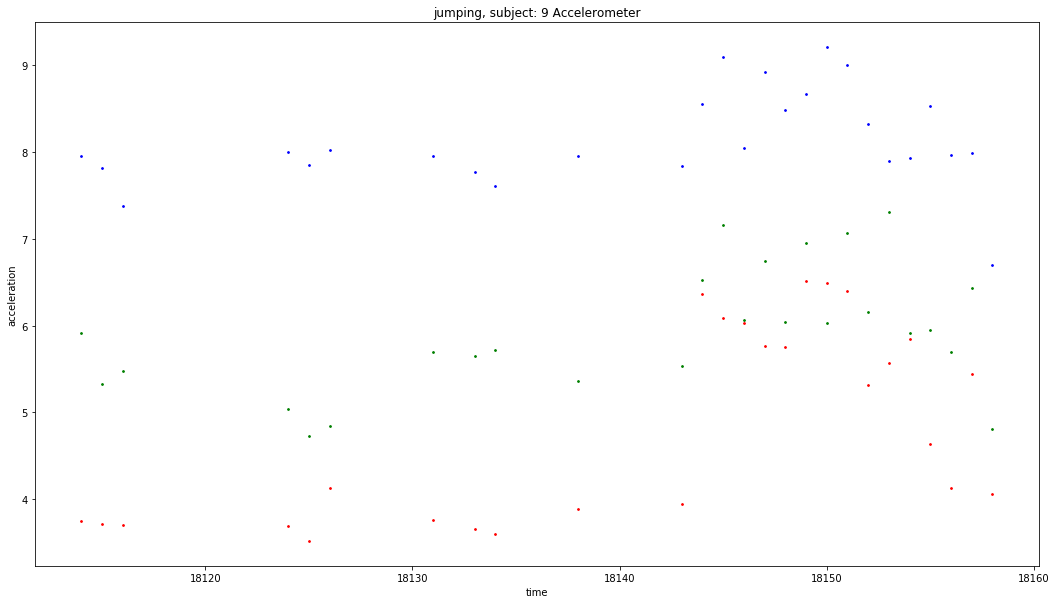

<Figure size 432x288 with 0 Axes>

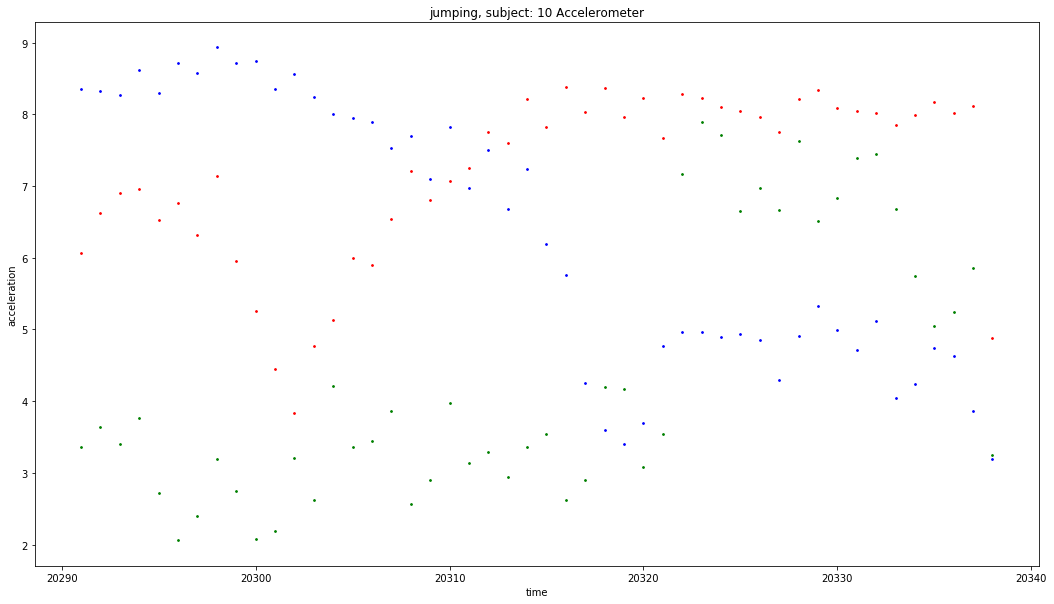

<Figure size 432x288 with 0 Axes>

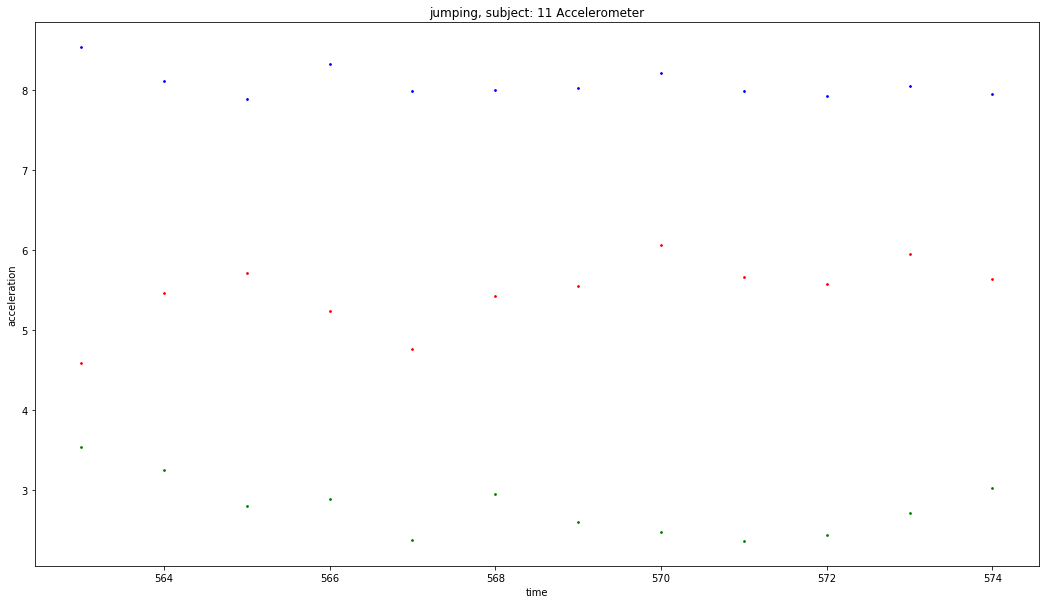

<Figure size 432x288 with 0 Axes>

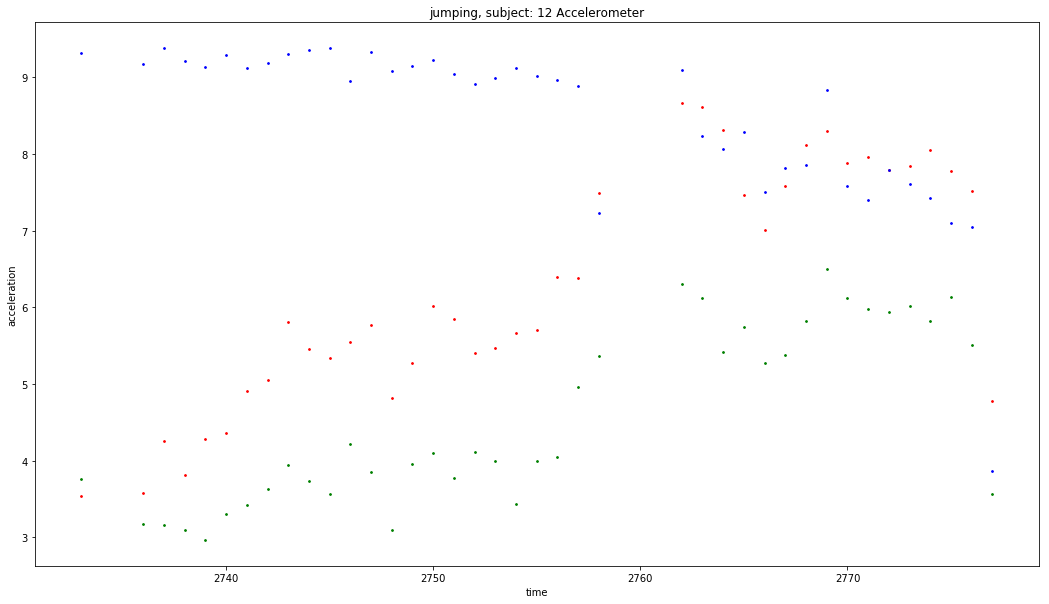

<Figure size 432x288 with 0 Axes>

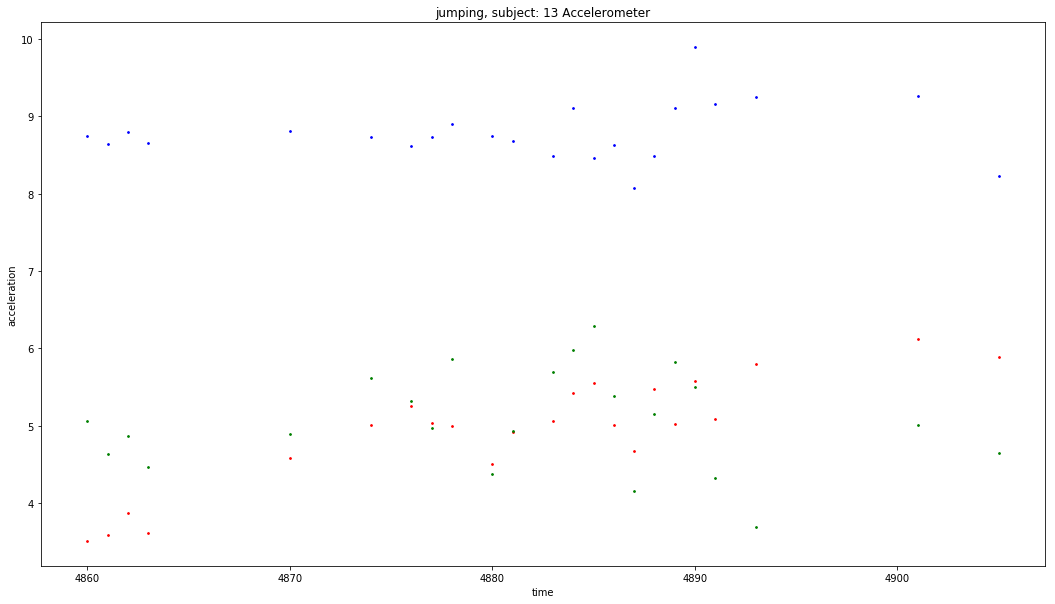

<Figure size 432x288 with 0 Axes>

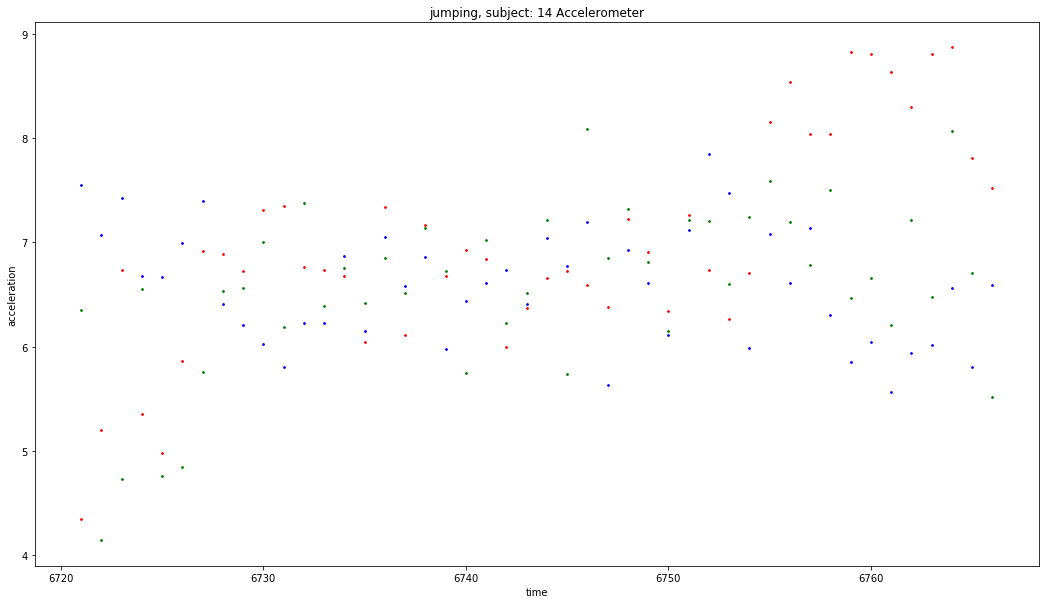

<Figure size 432x288 with 0 Axes>

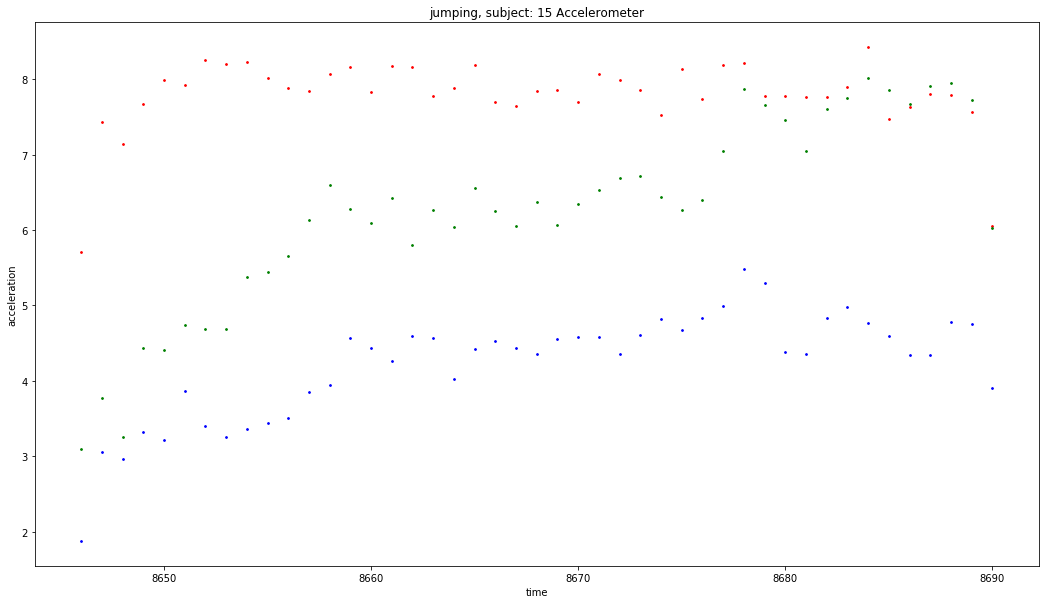

<Figure size 432x288 with 0 Axes>

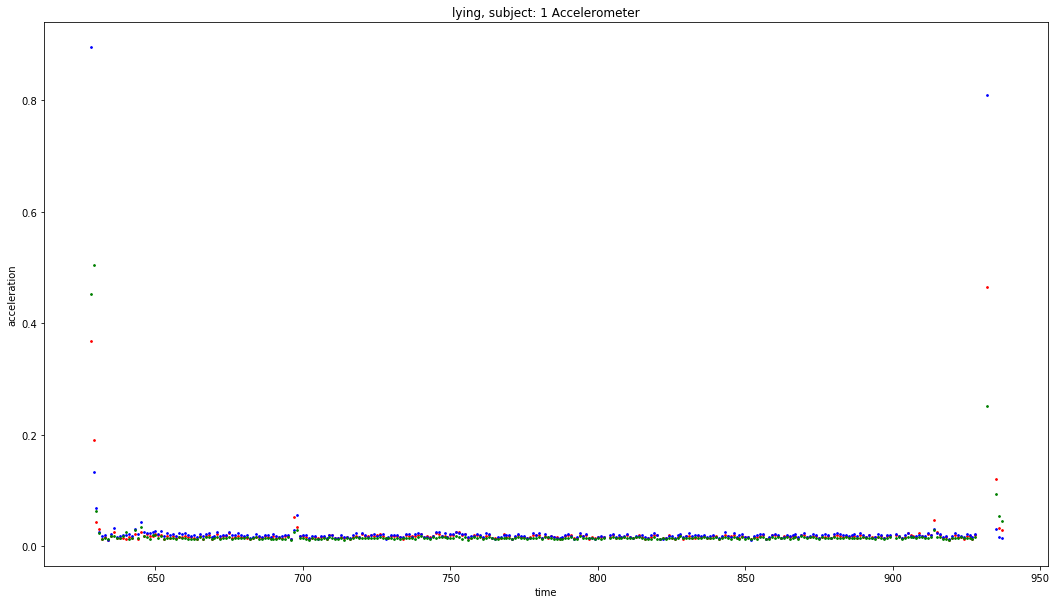

<Figure size 432x288 with 0 Axes>

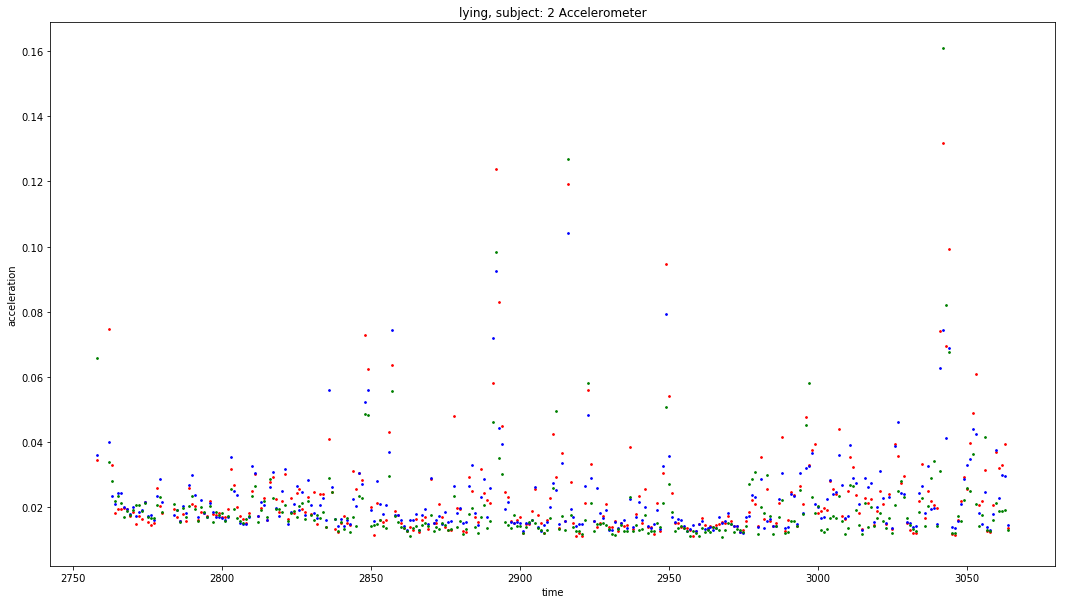

<Figure size 432x288 with 0 Axes>

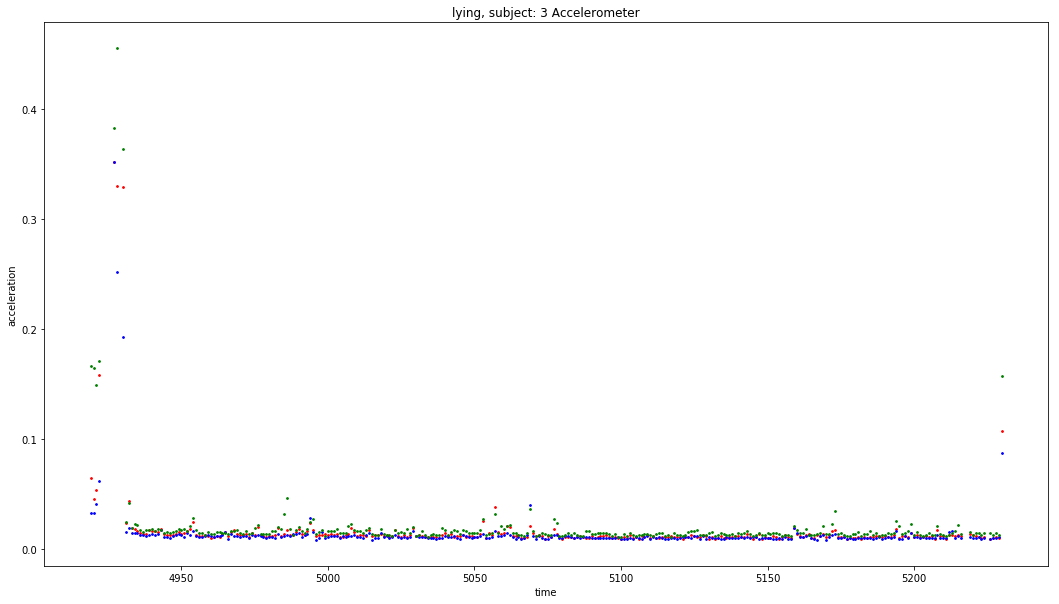

<Figure size 432x288 with 0 Axes>

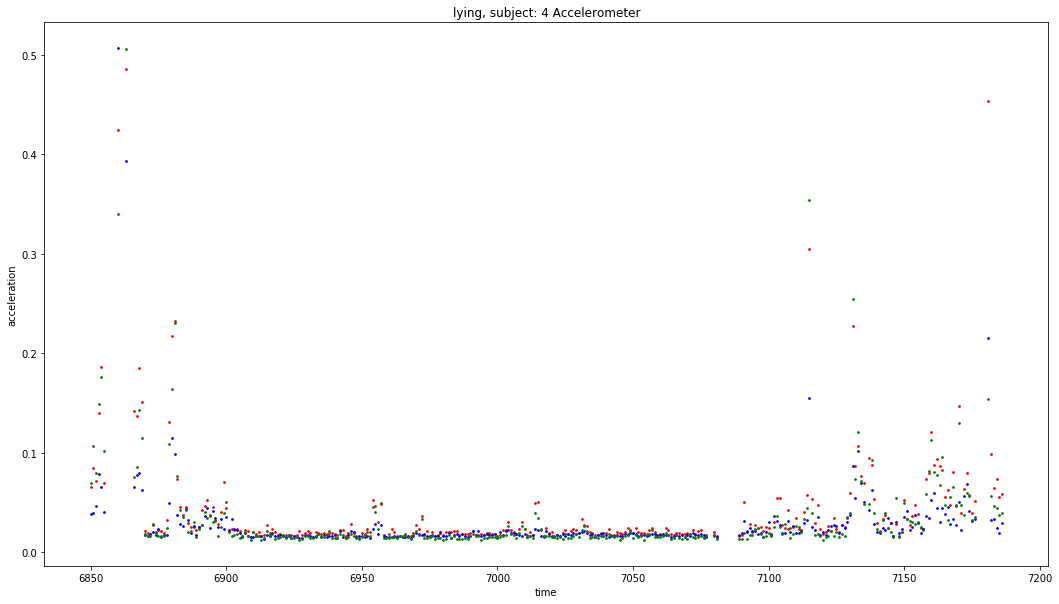

<Figure size 432x288 with 0 Axes>

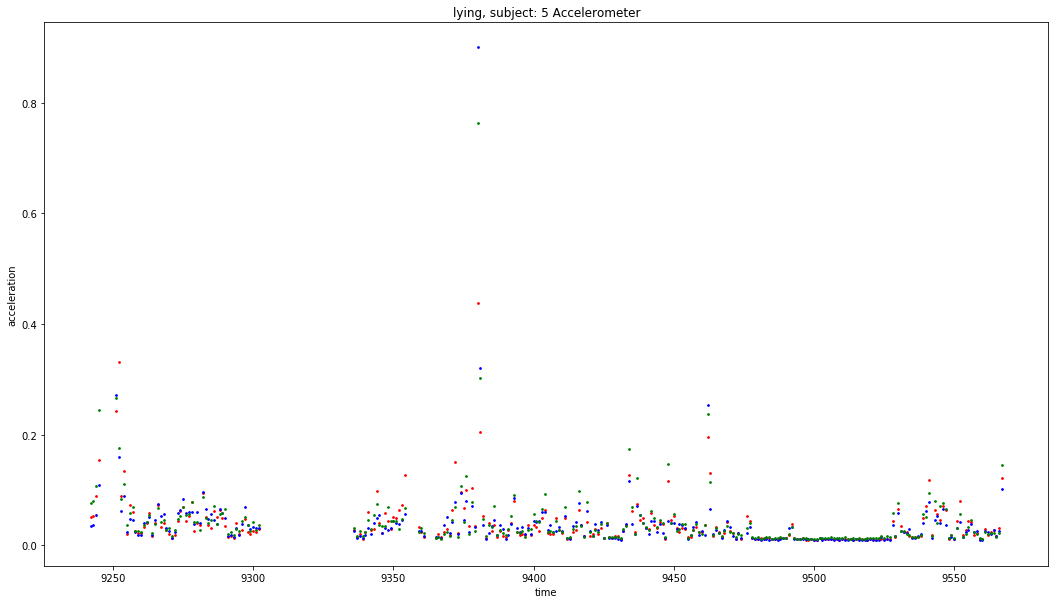

<Figure size 432x288 with 0 Axes>

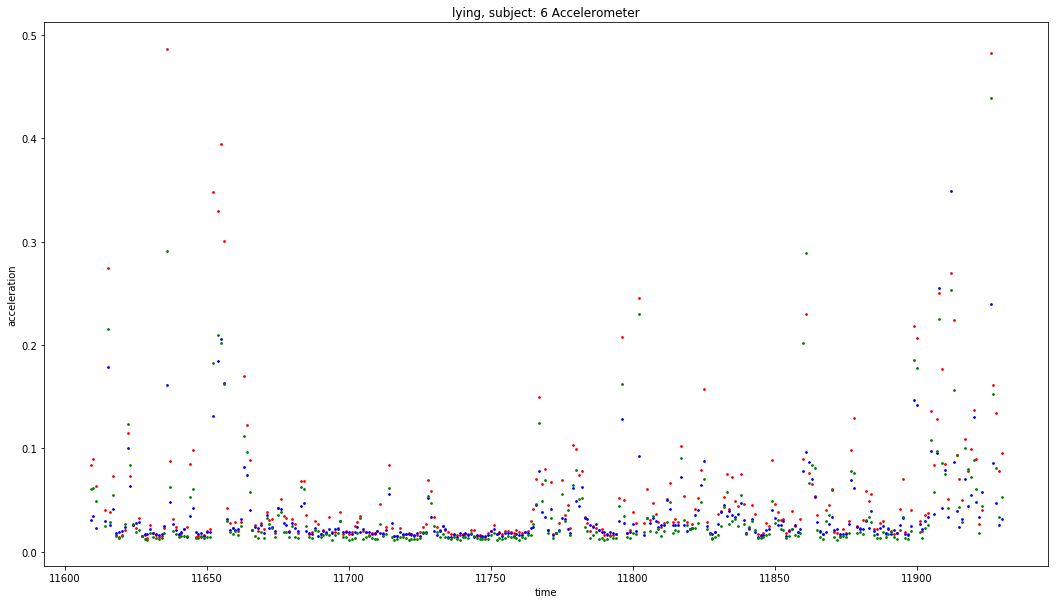

<Figure size 432x288 with 0 Axes>

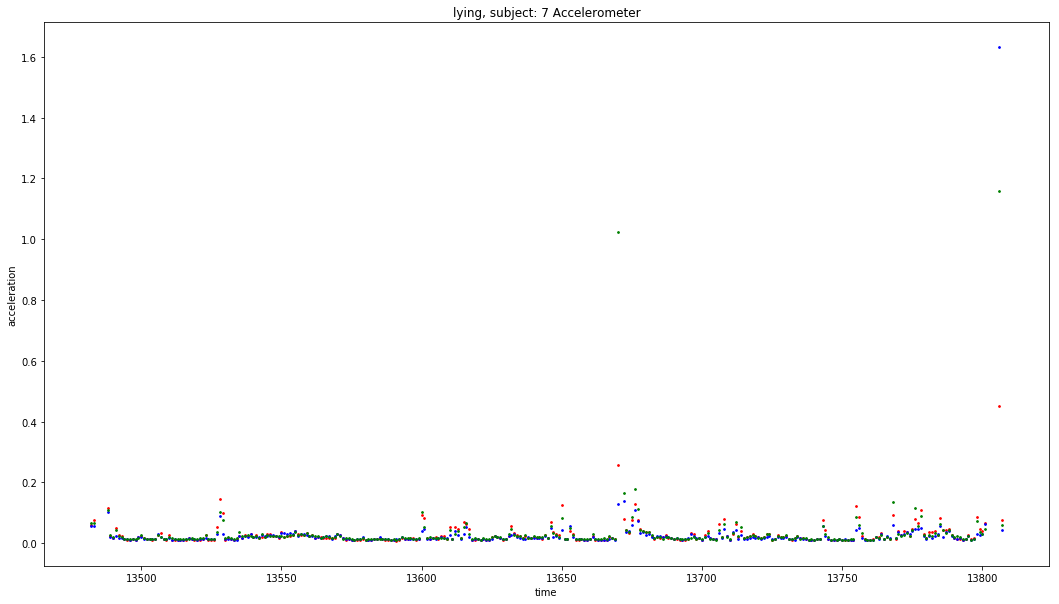

<Figure size 432x288 with 0 Axes>

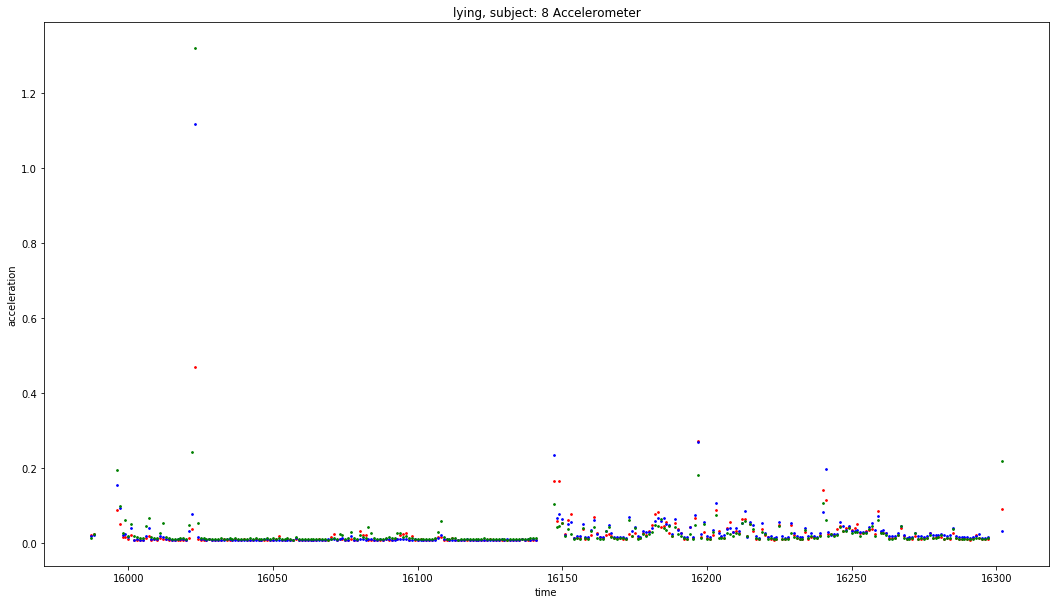

<Figure size 432x288 with 0 Axes>

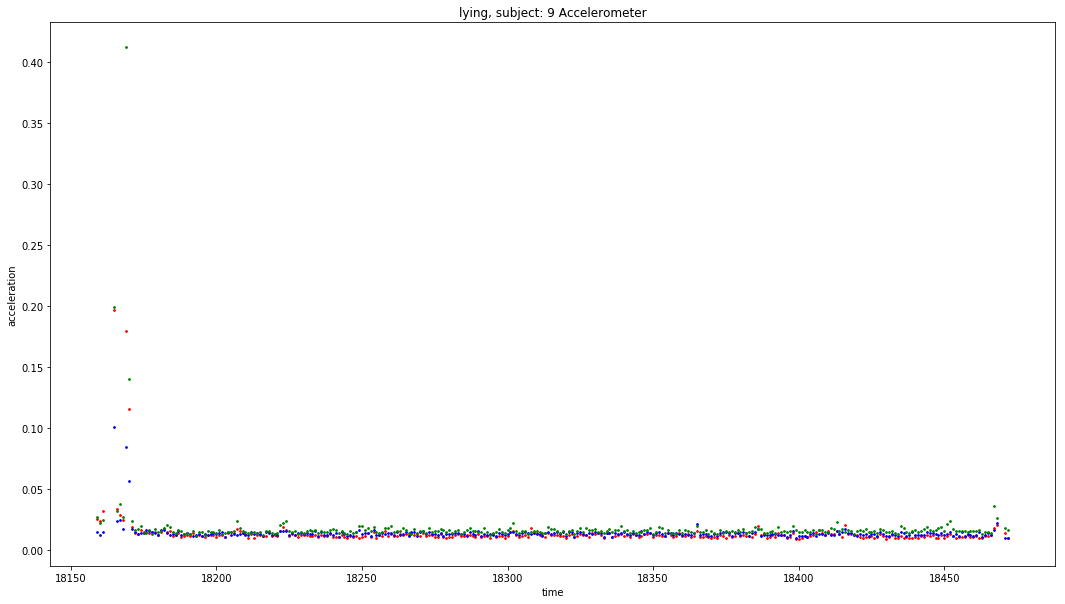

<Figure size 432x288 with 0 Axes>

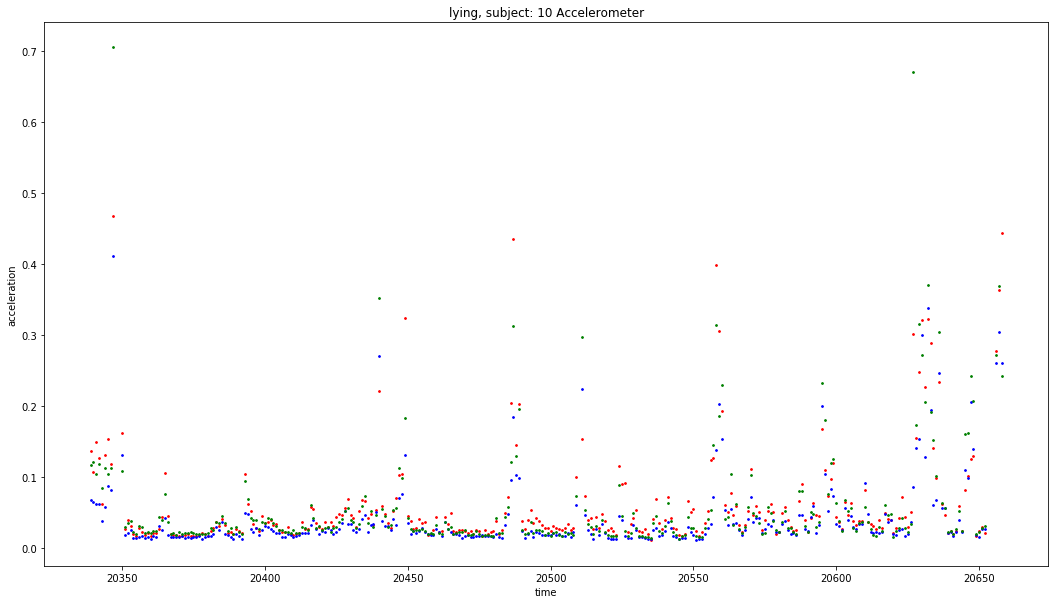

<Figure size 432x288 with 0 Axes>

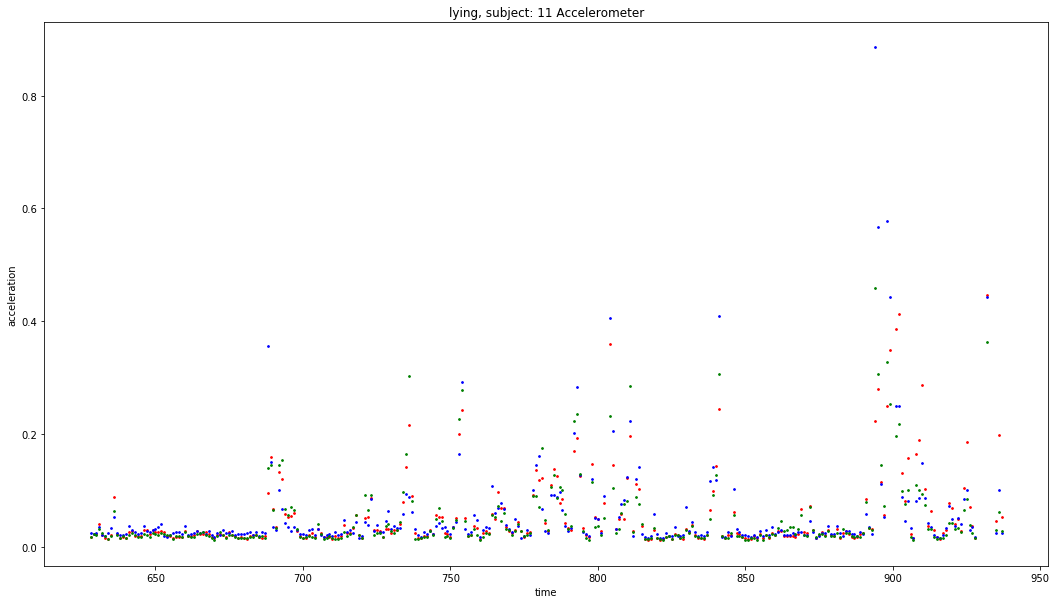

<Figure size 432x288 with 0 Axes>

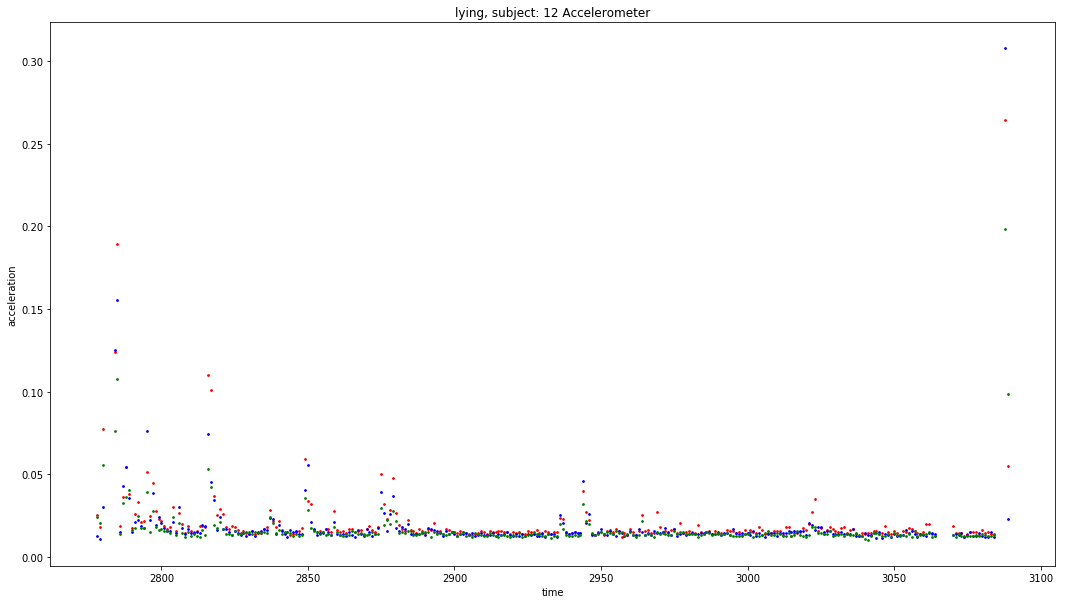

<Figure size 432x288 with 0 Axes>

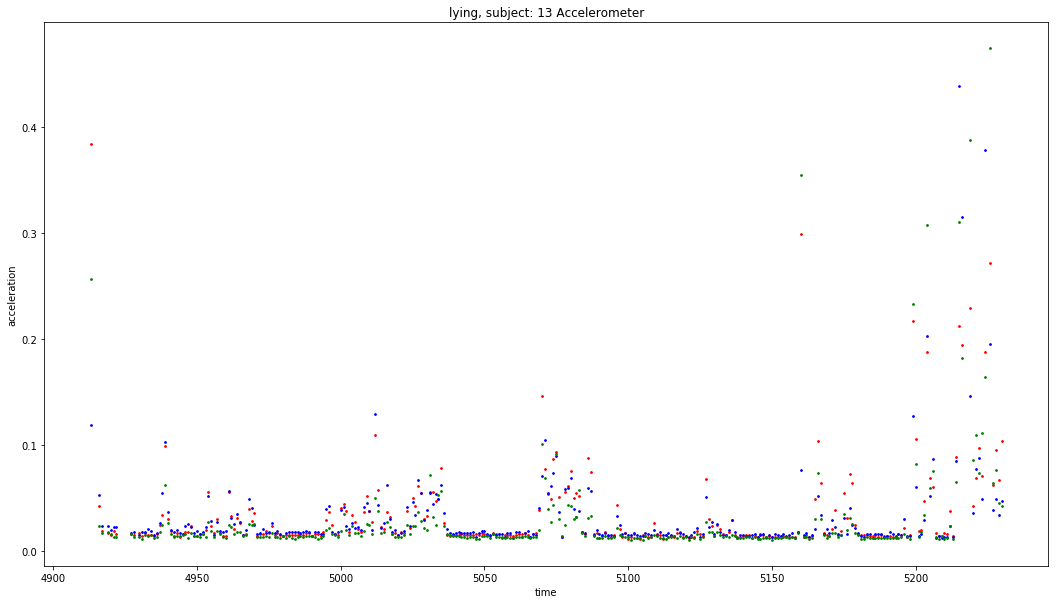

<Figure size 432x288 with 0 Axes>

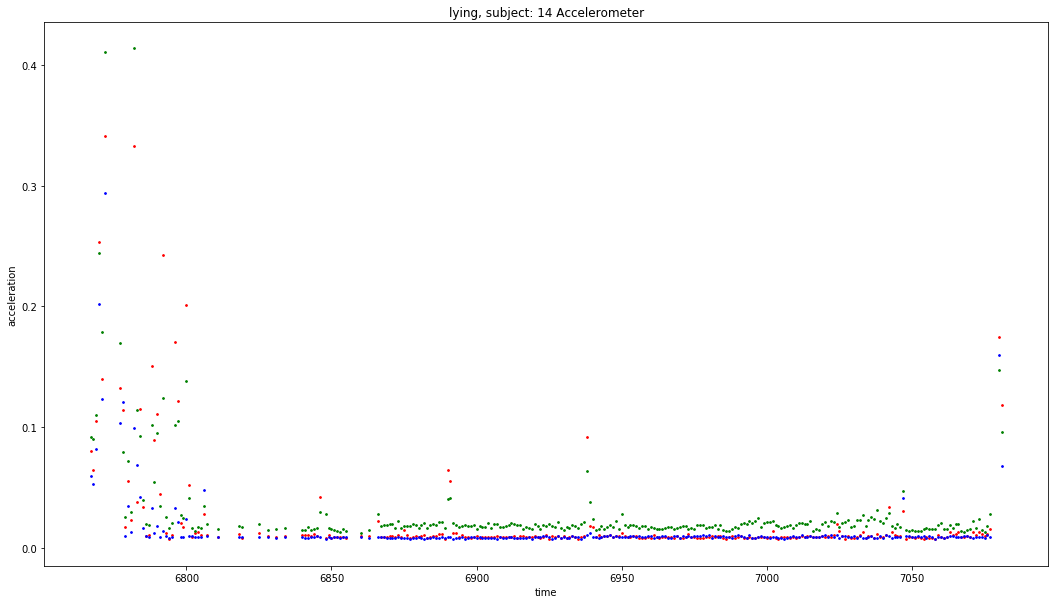

<Figure size 432x288 with 0 Axes>

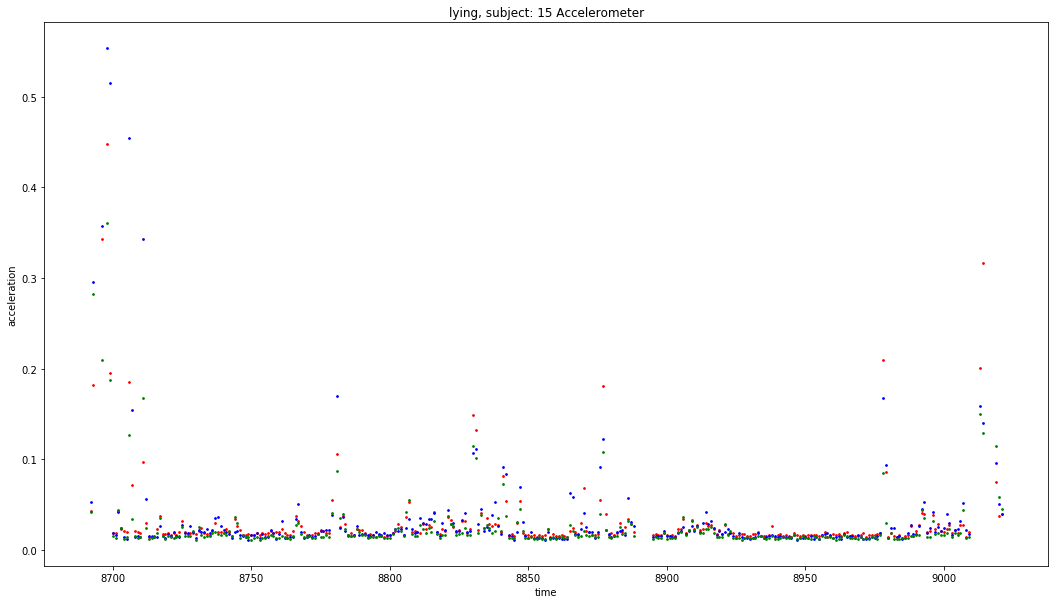

<Figure size 432x288 with 0 Axes>

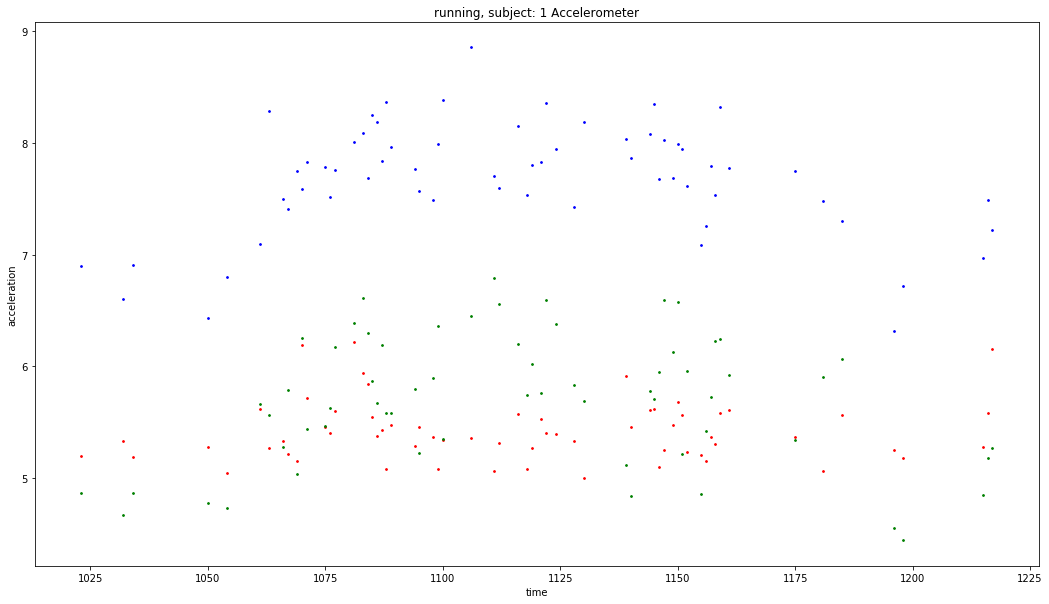

<Figure size 432x288 with 0 Axes>

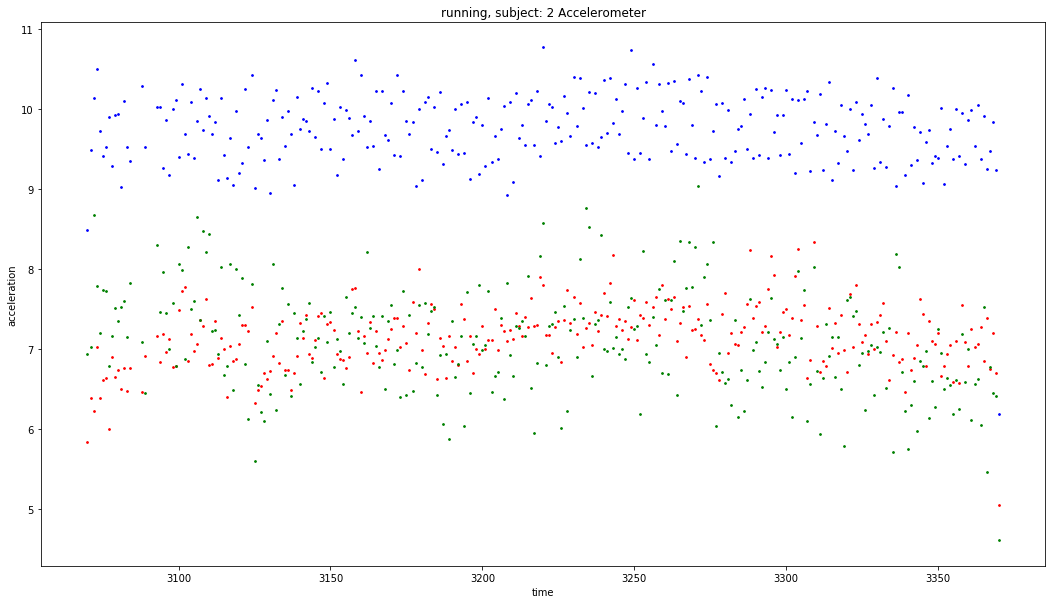

<Figure size 432x288 with 0 Axes>

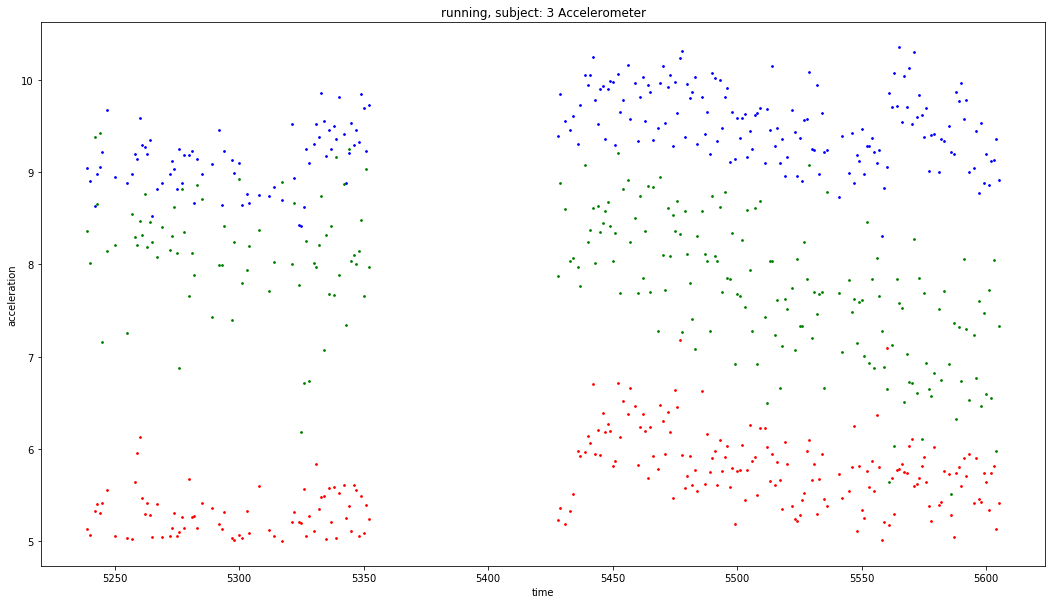

<Figure size 432x288 with 0 Axes>

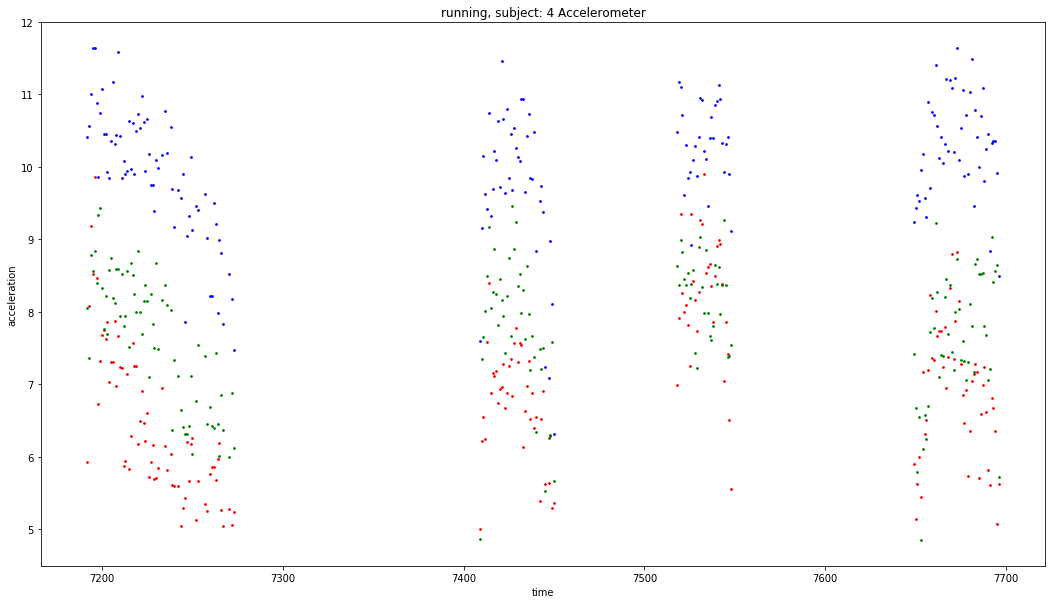

<Figure size 432x288 with 0 Axes>

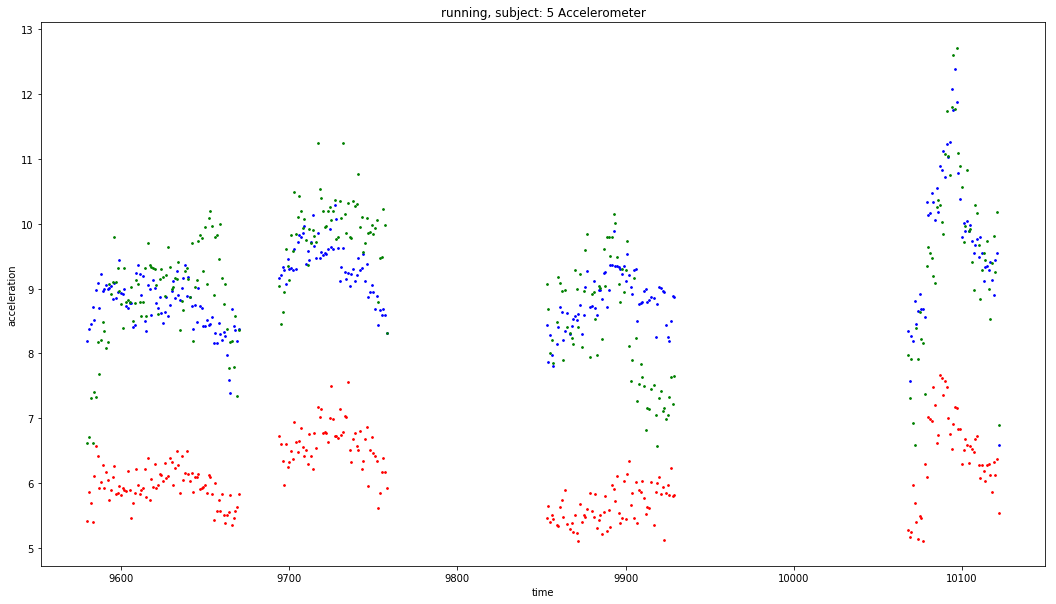

<Figure size 432x288 with 0 Axes>

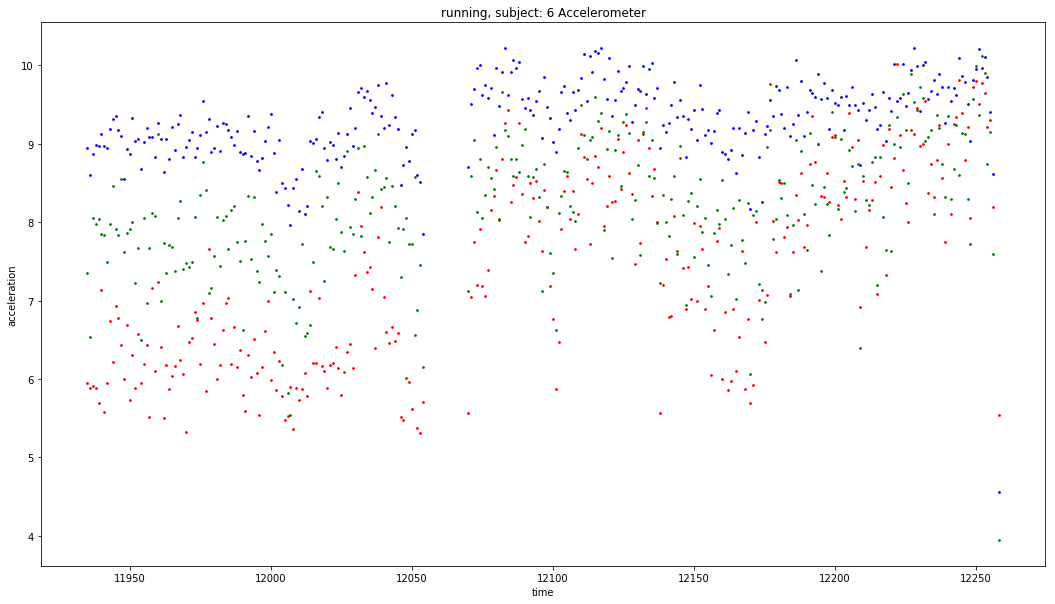

<Figure size 432x288 with 0 Axes>

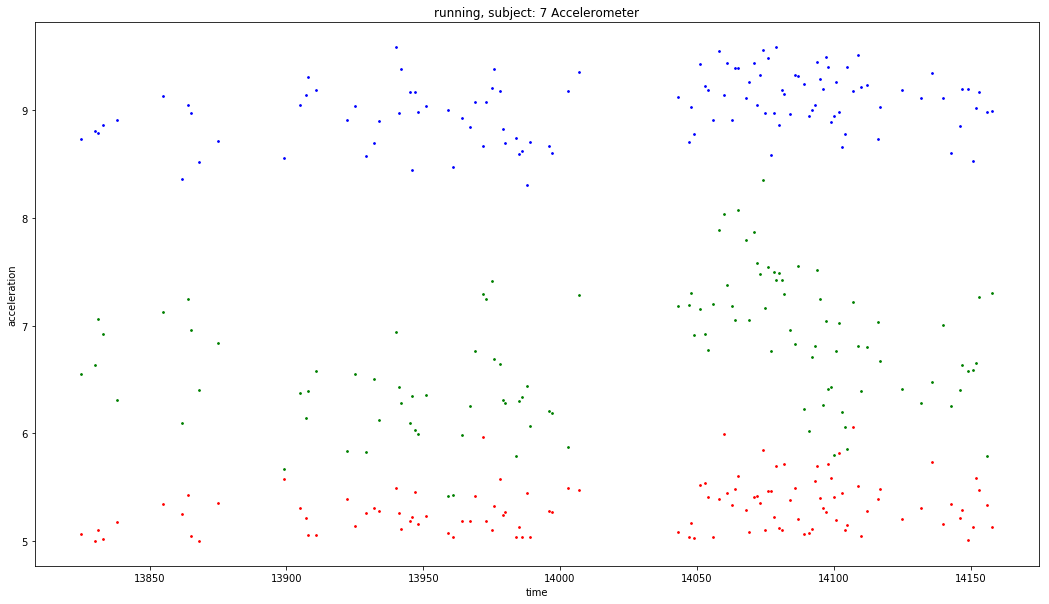

<Figure size 432x288 with 0 Axes>

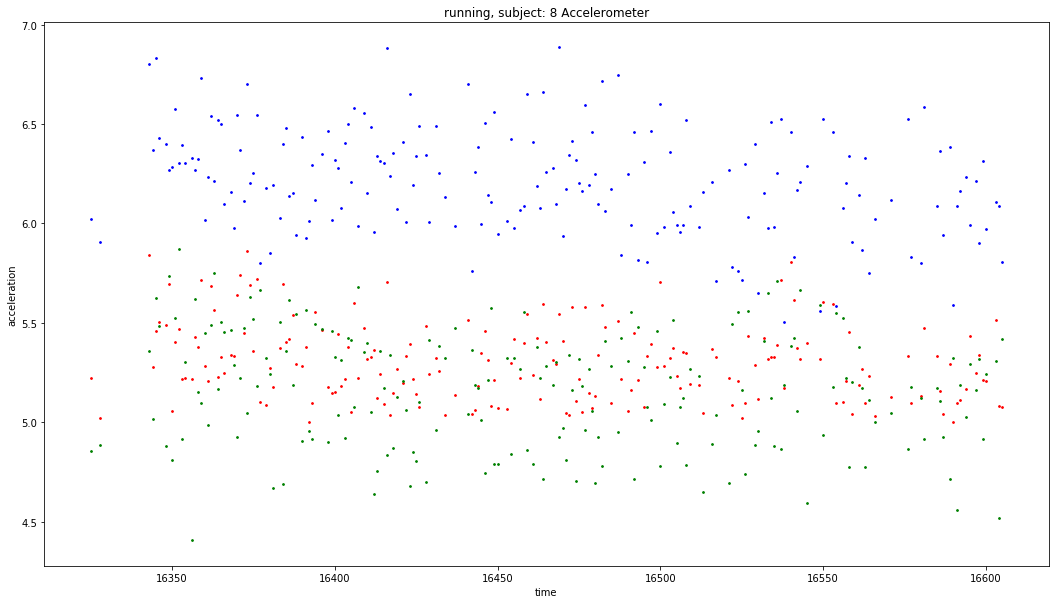

<Figure size 432x288 with 0 Axes>

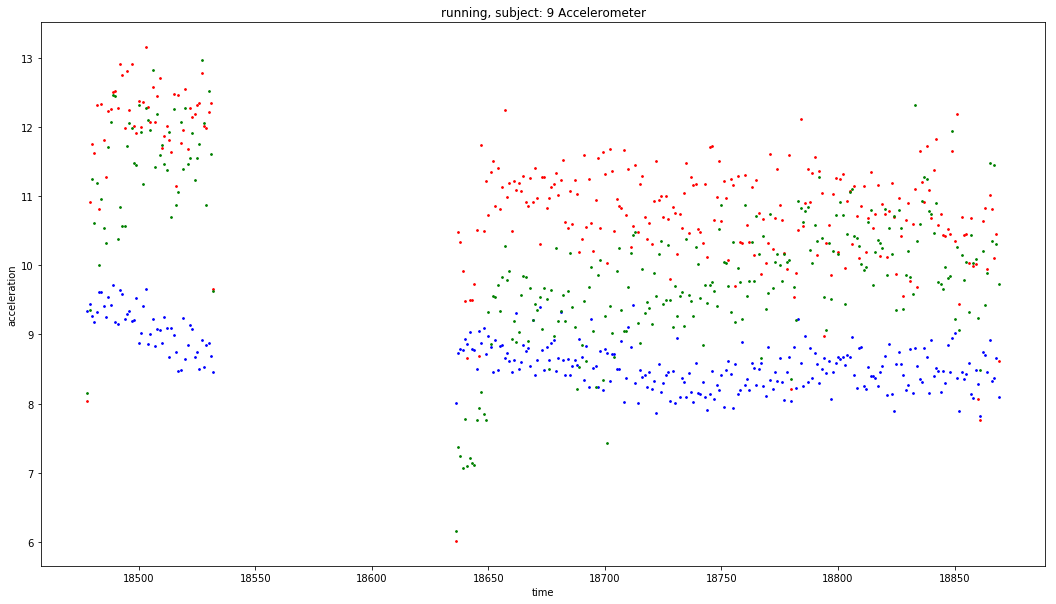

<Figure size 432x288 with 0 Axes>

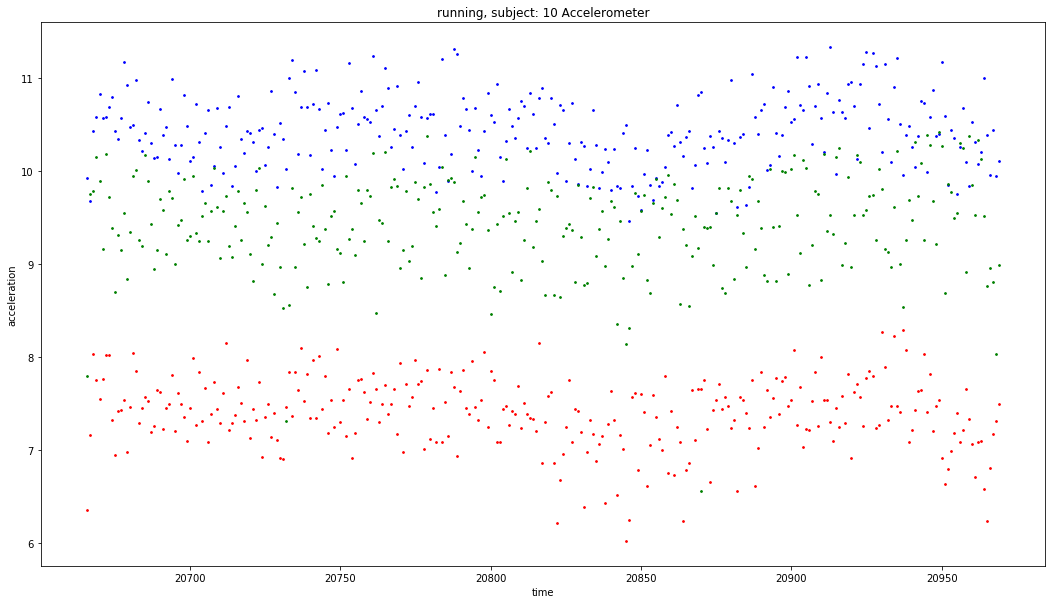

<Figure size 432x288 with 0 Axes>

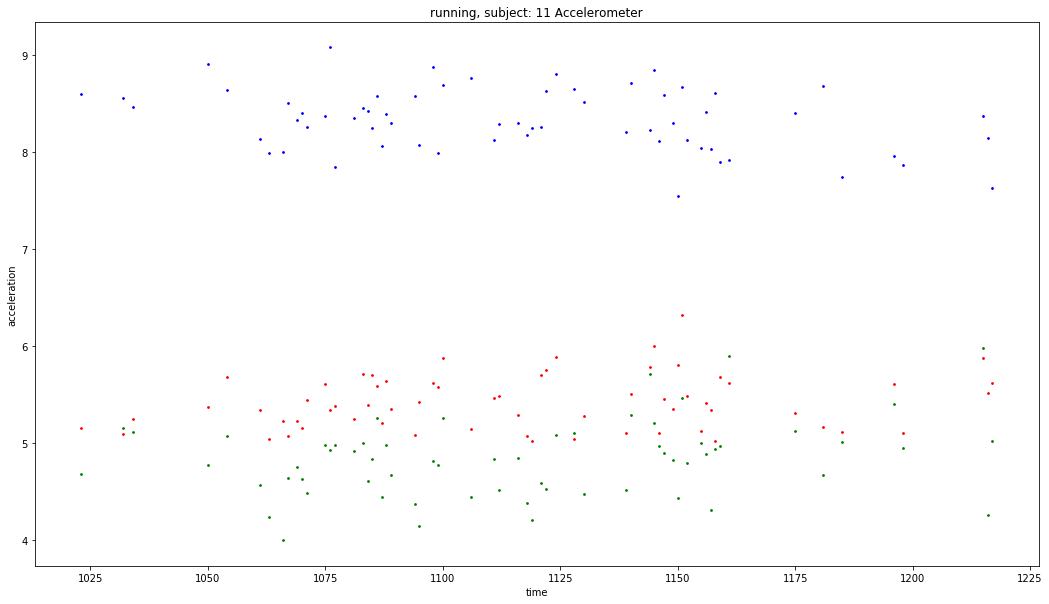

<Figure size 432x288 with 0 Axes>

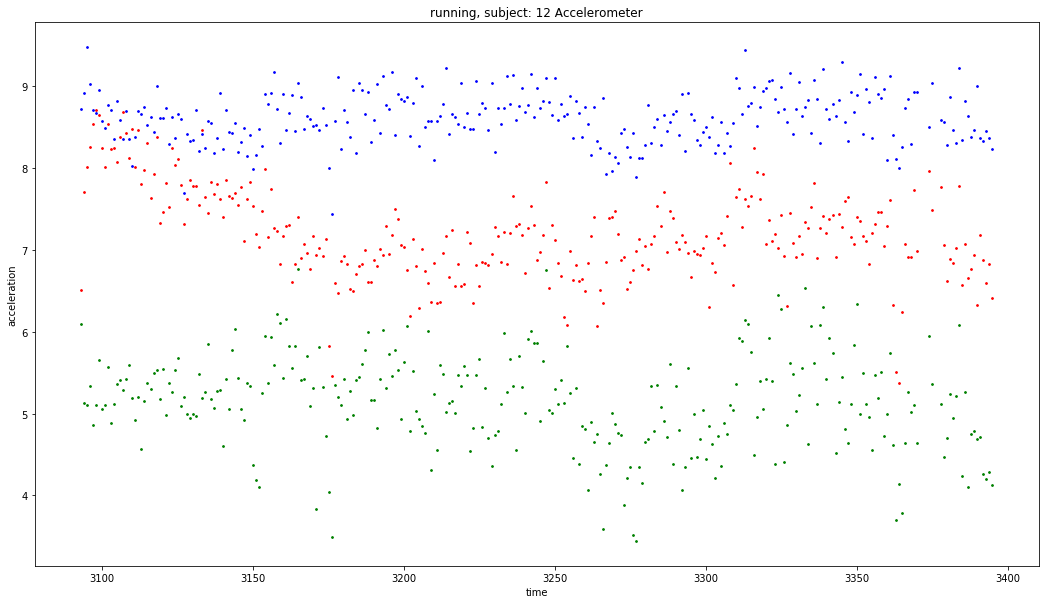

<Figure size 432x288 with 0 Axes>

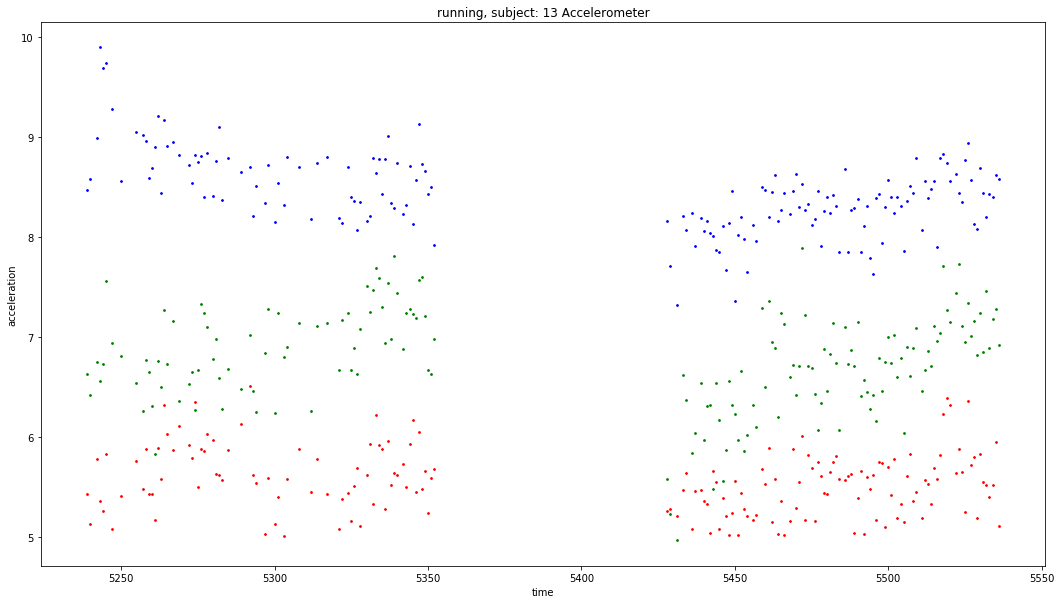

<Figure size 432x288 with 0 Axes>

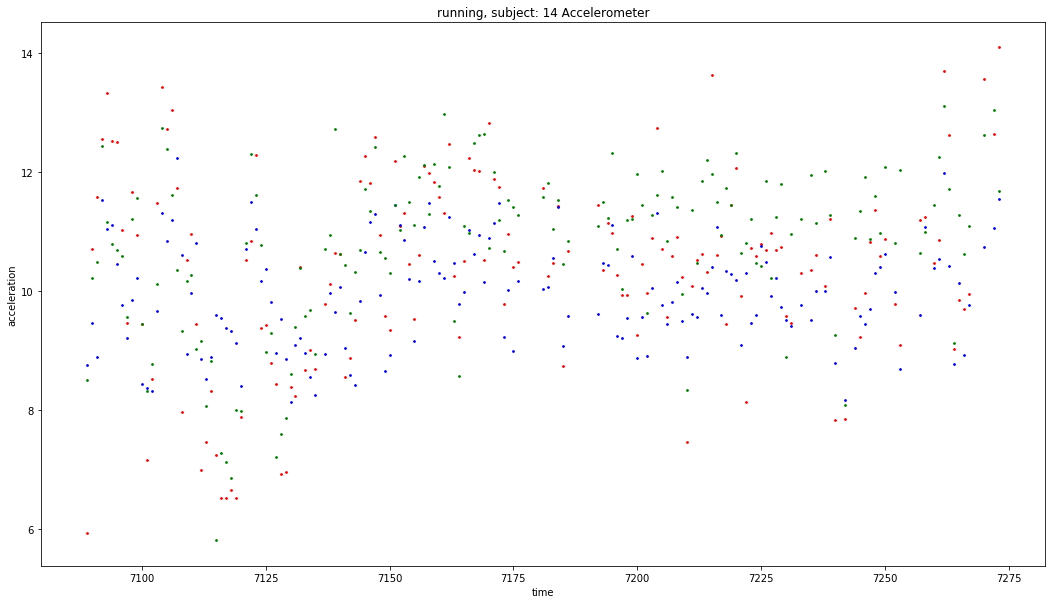

<Figure size 432x288 with 0 Axes>

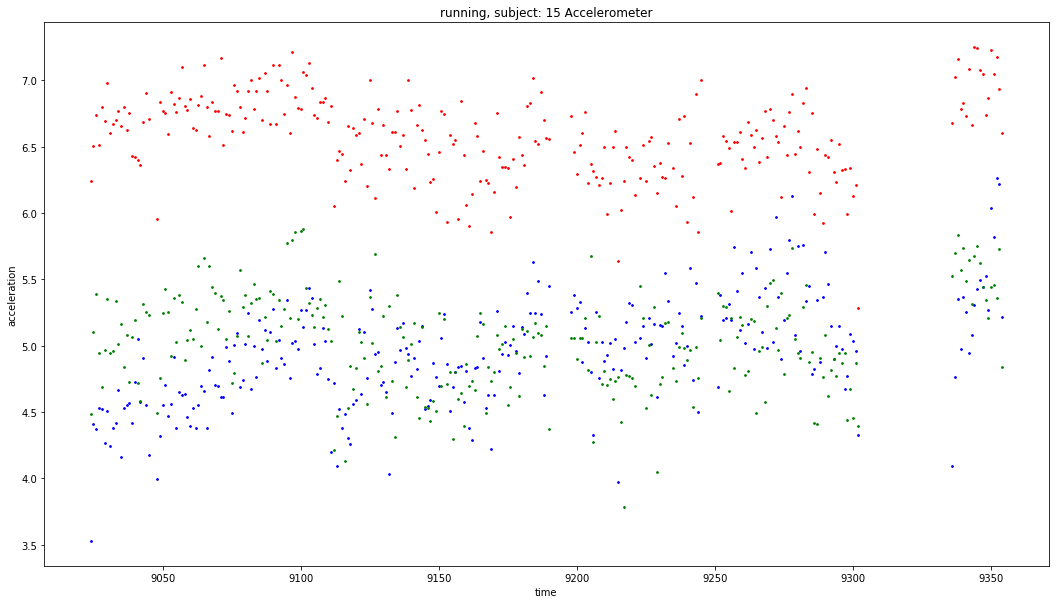

<Figure size 432x288 with 0 Axes>

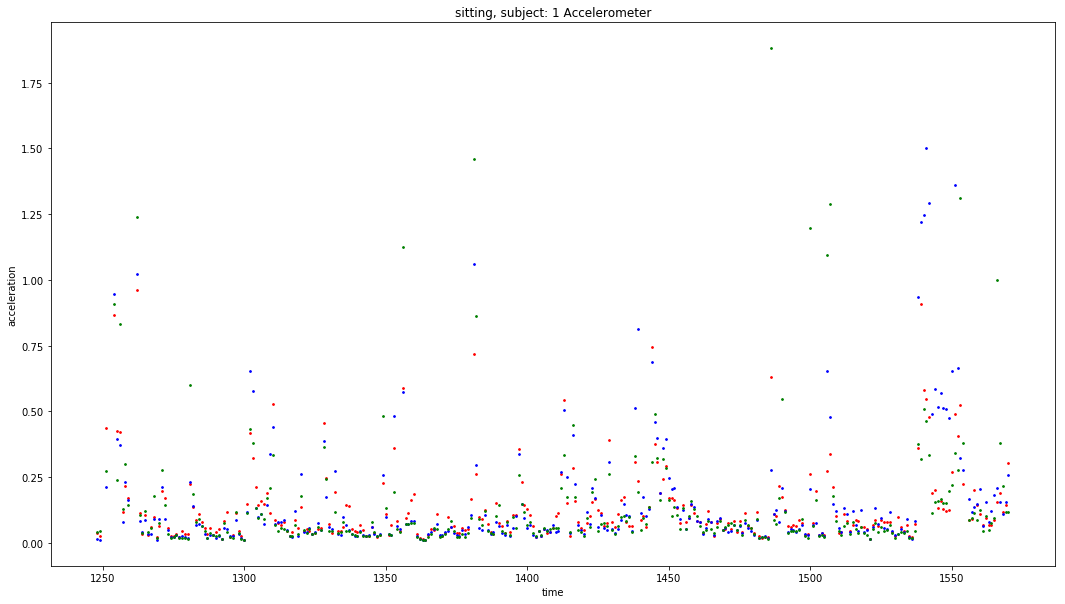

<Figure size 432x288 with 0 Axes>

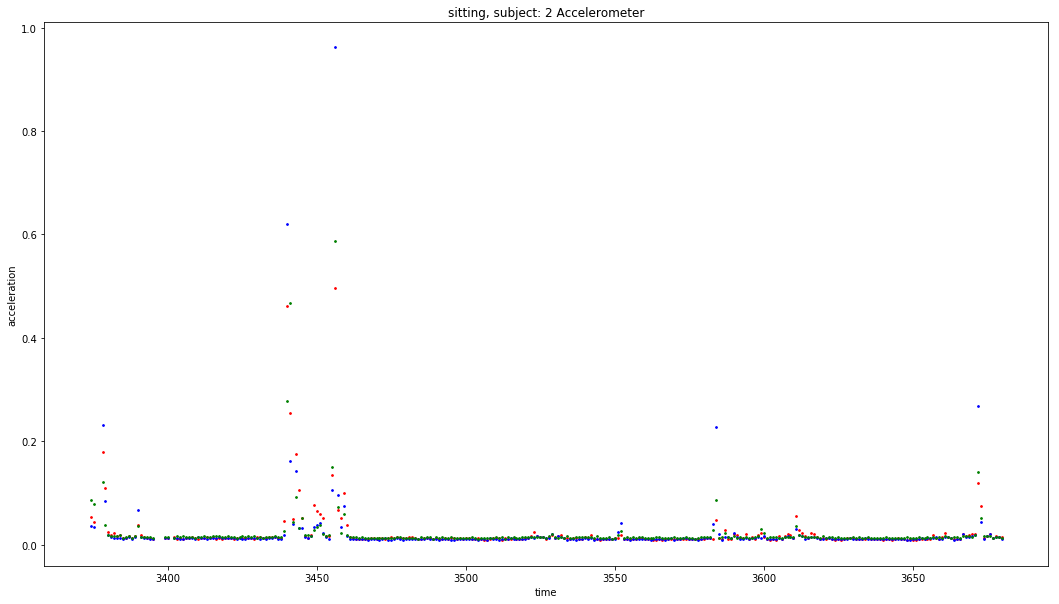

<Figure size 432x288 with 0 Axes>

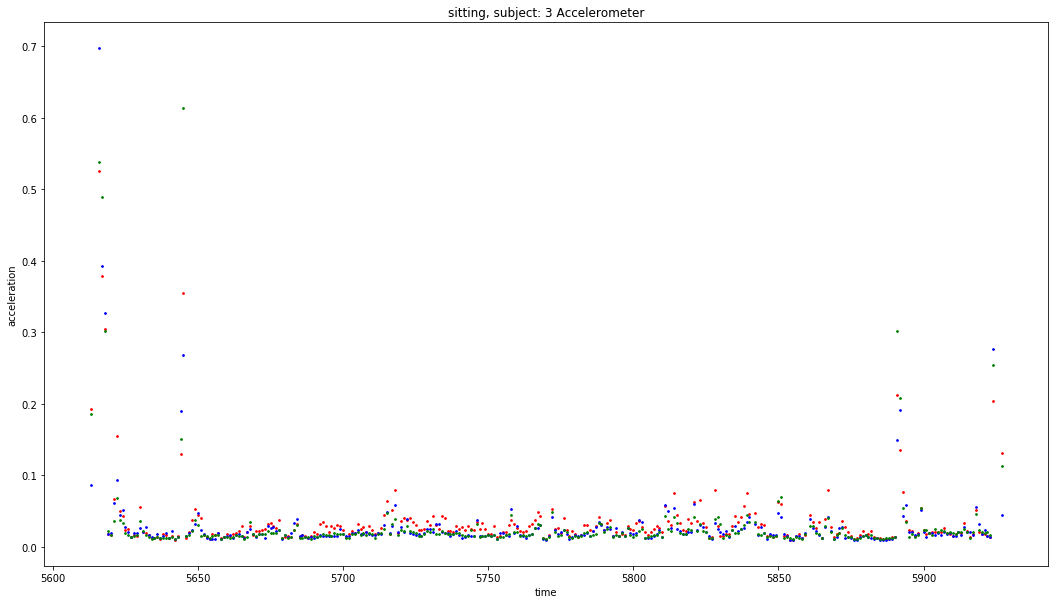

<Figure size 432x288 with 0 Axes>

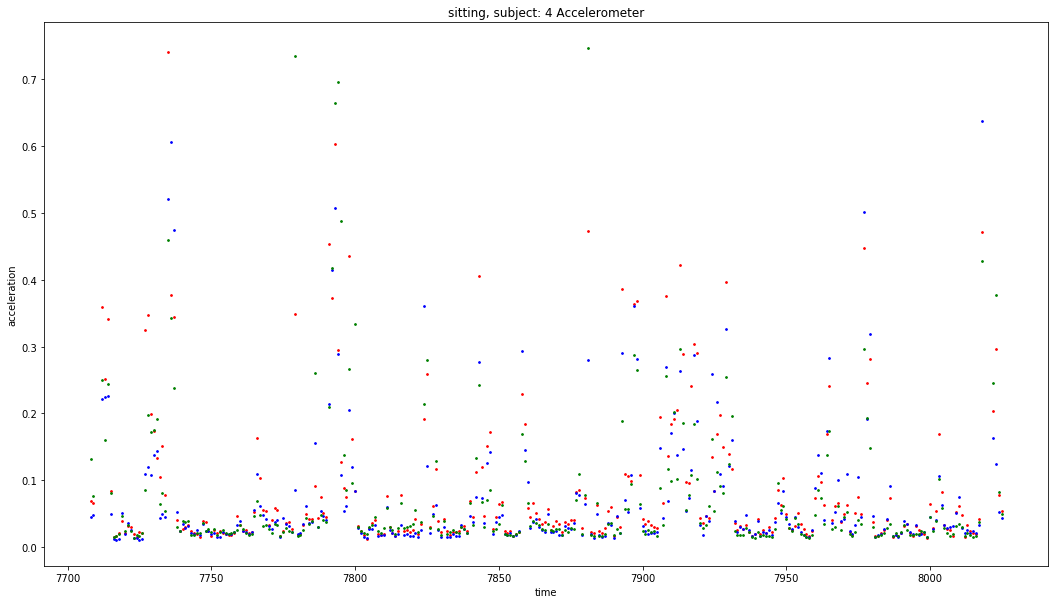

<Figure size 432x288 with 0 Axes>

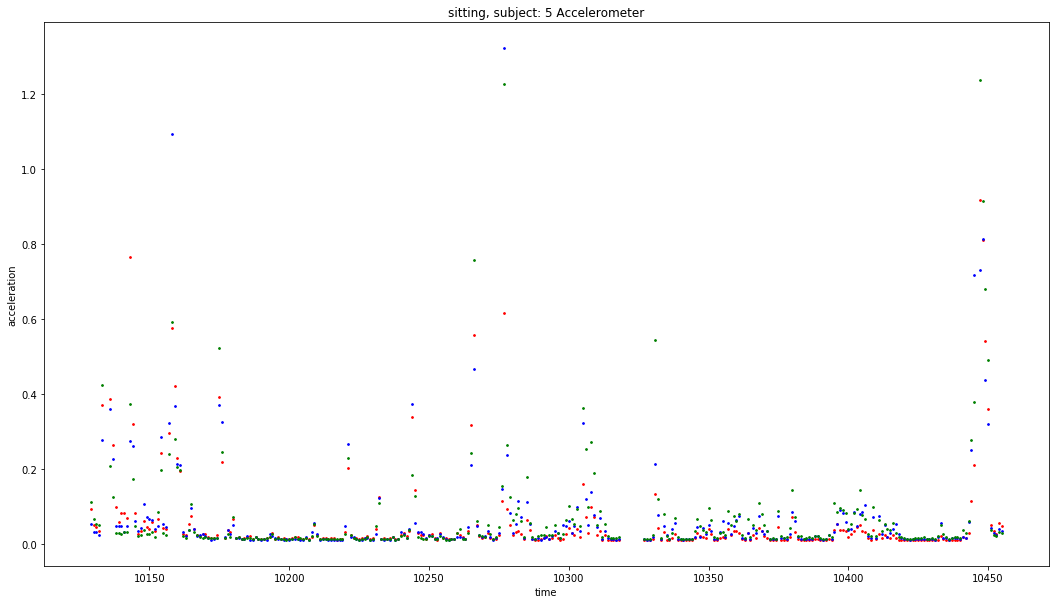

<Figure size 432x288 with 0 Axes>

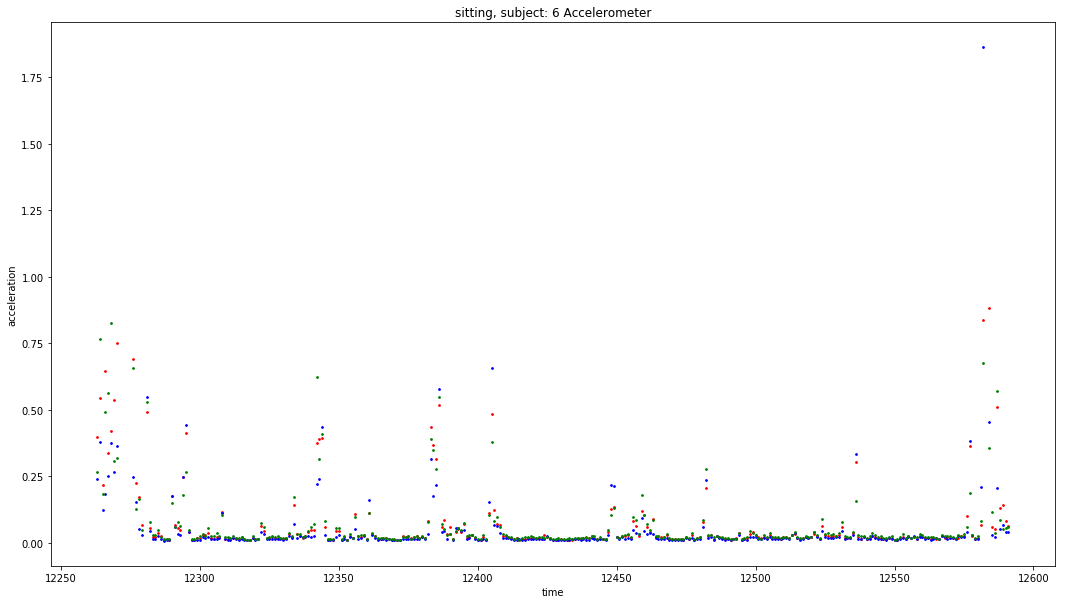

<Figure size 432x288 with 0 Axes>

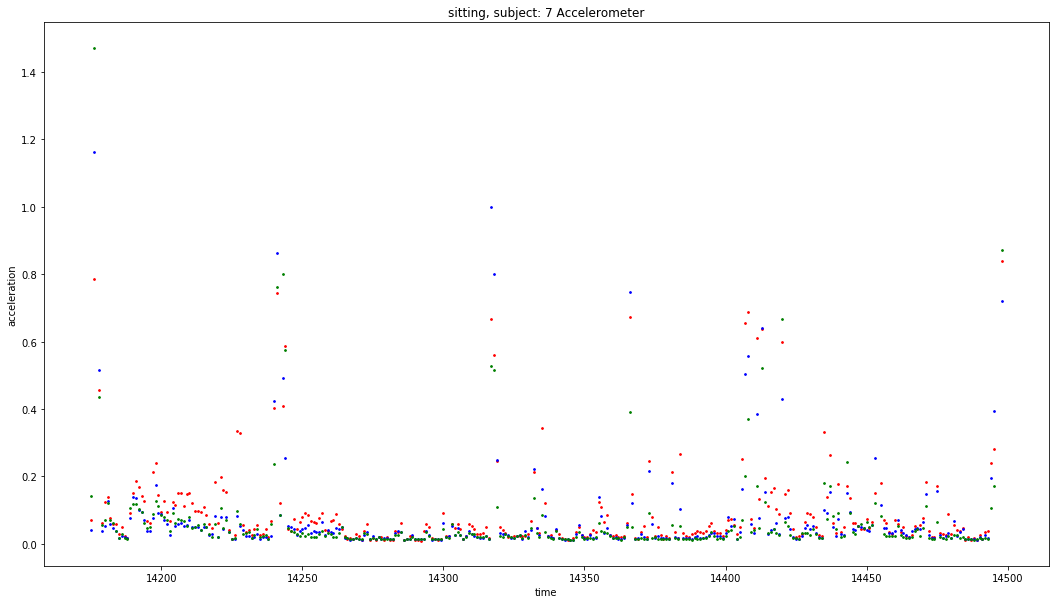

<Figure size 432x288 with 0 Axes>

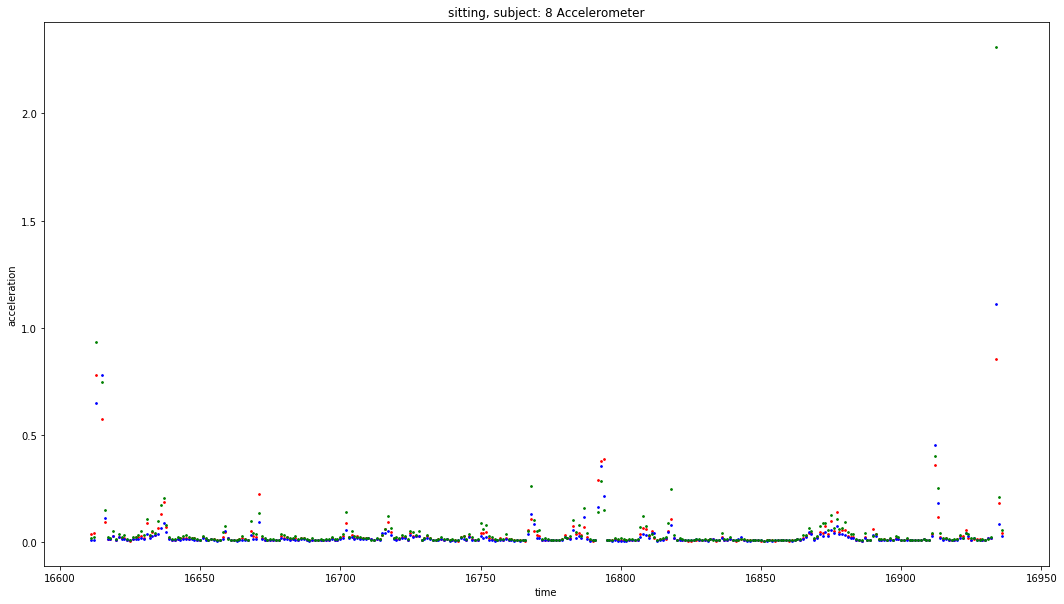

<Figure size 432x288 with 0 Axes>

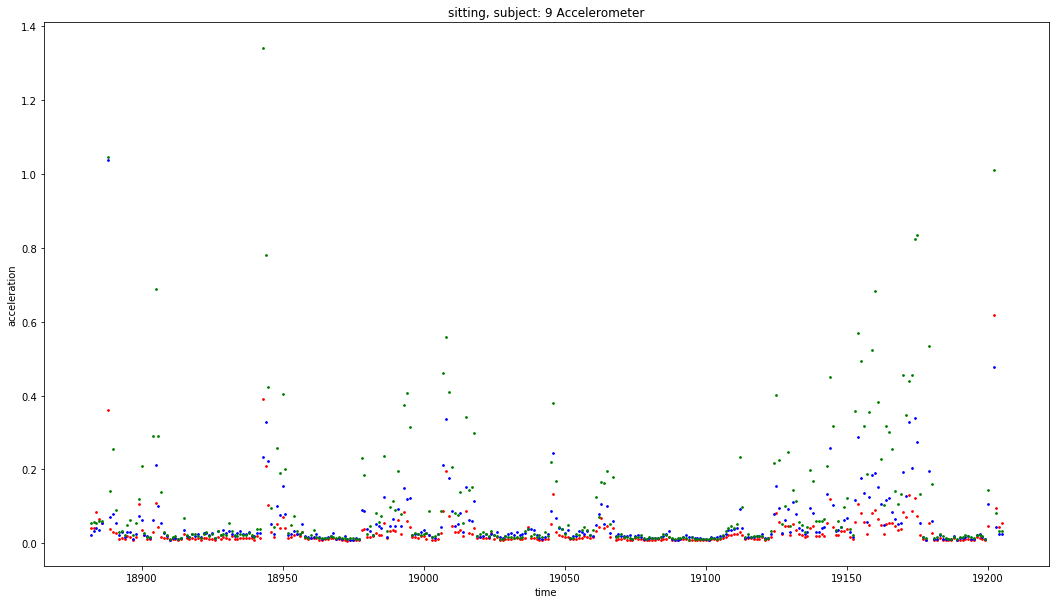

<Figure size 432x288 with 0 Axes>

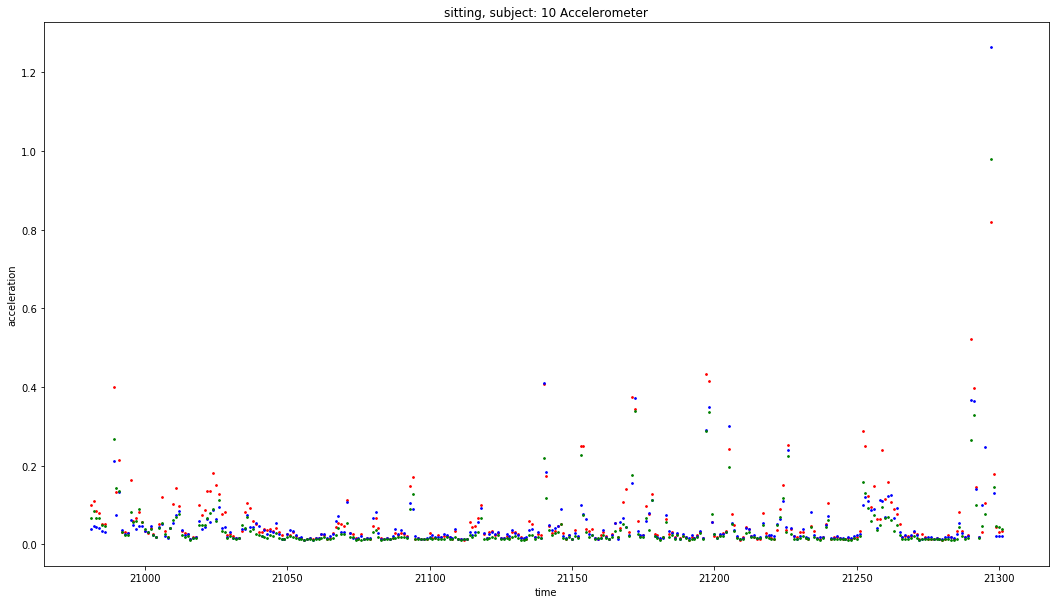

<Figure size 432x288 with 0 Axes>

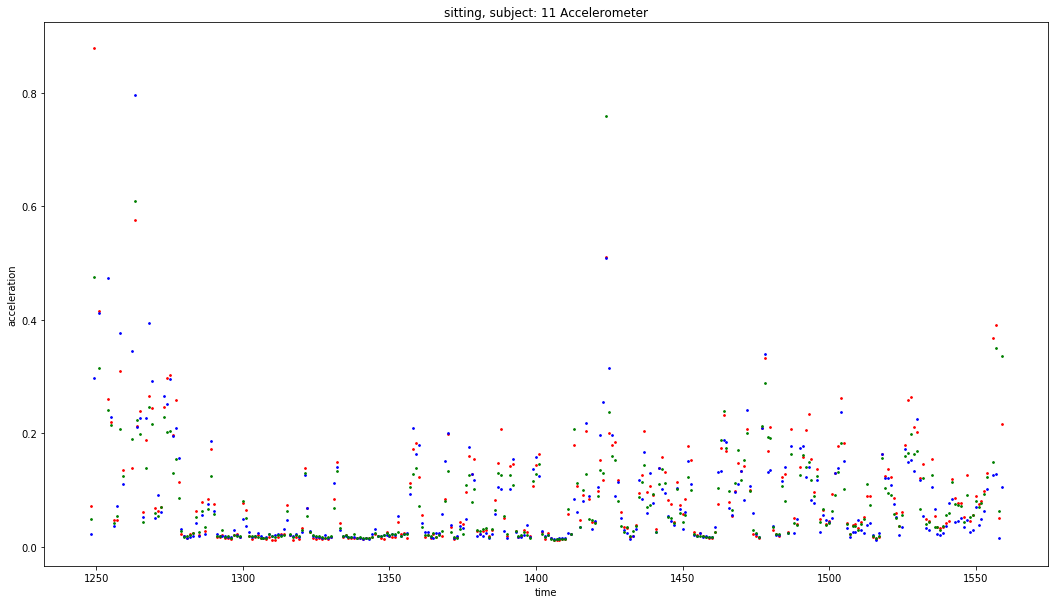

<Figure size 432x288 with 0 Axes>

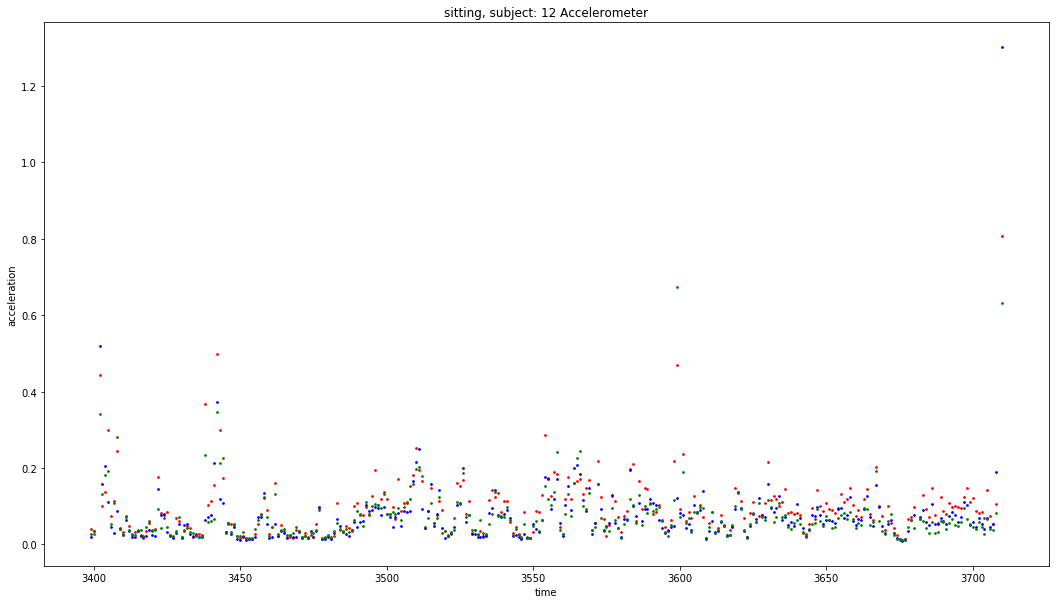

<Figure size 432x288 with 0 Axes>

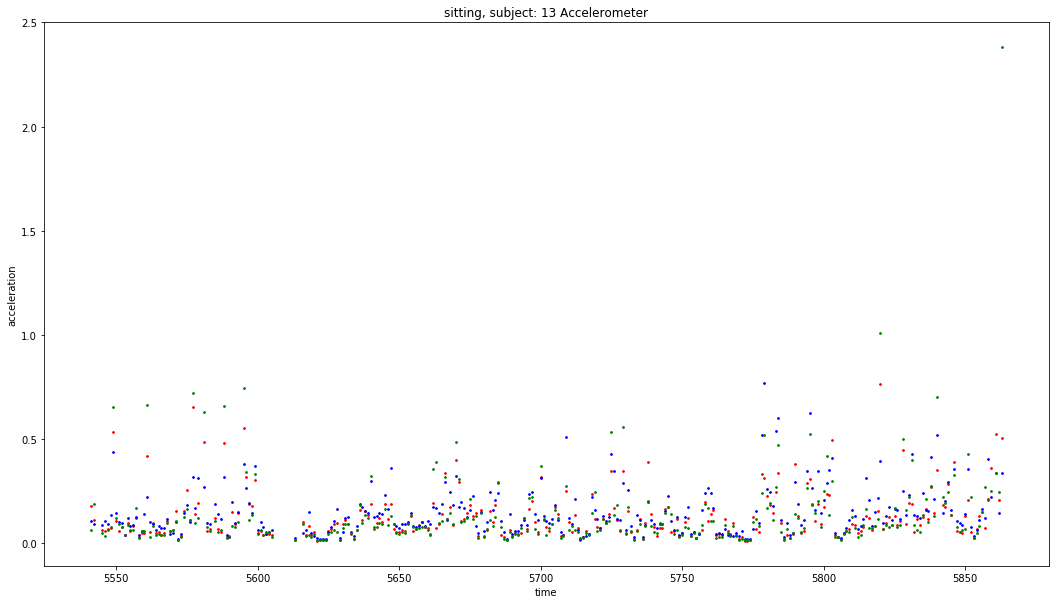

<Figure size 432x288 with 0 Axes>

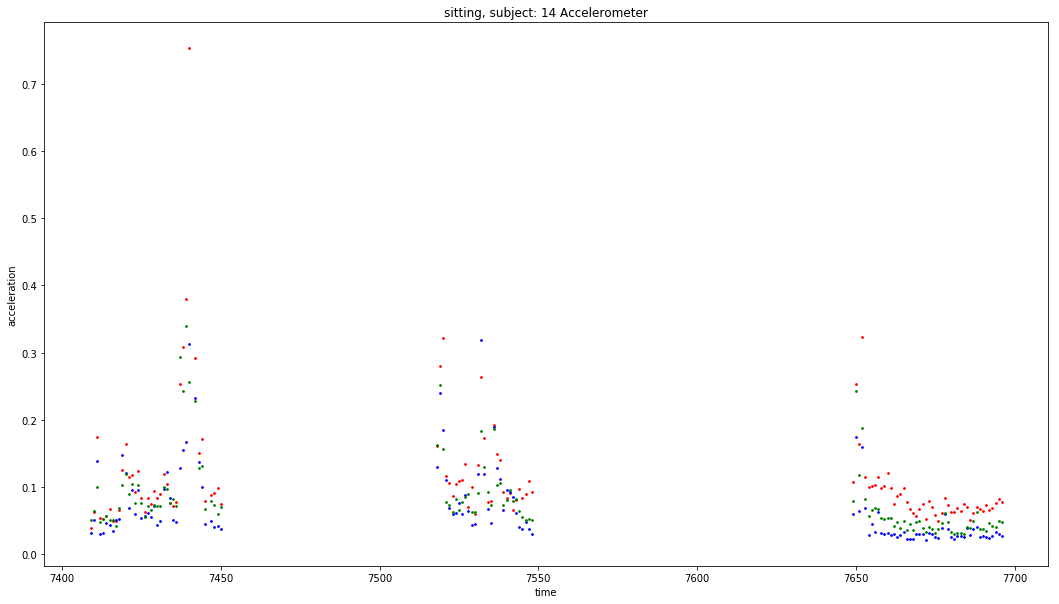

<Figure size 432x288 with 0 Axes>

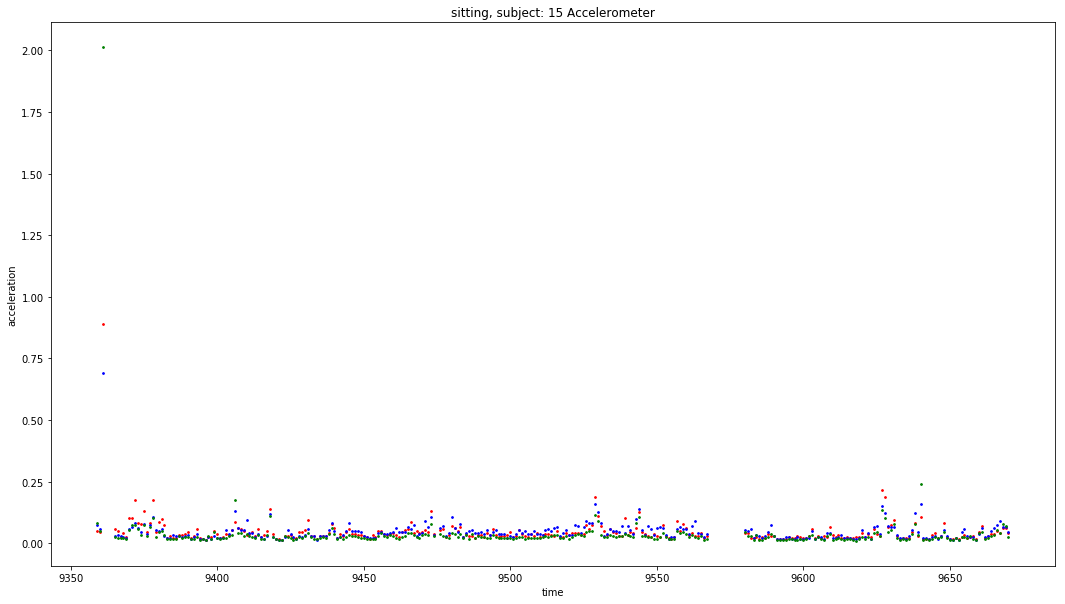

<Figure size 432x288 with 0 Axes>

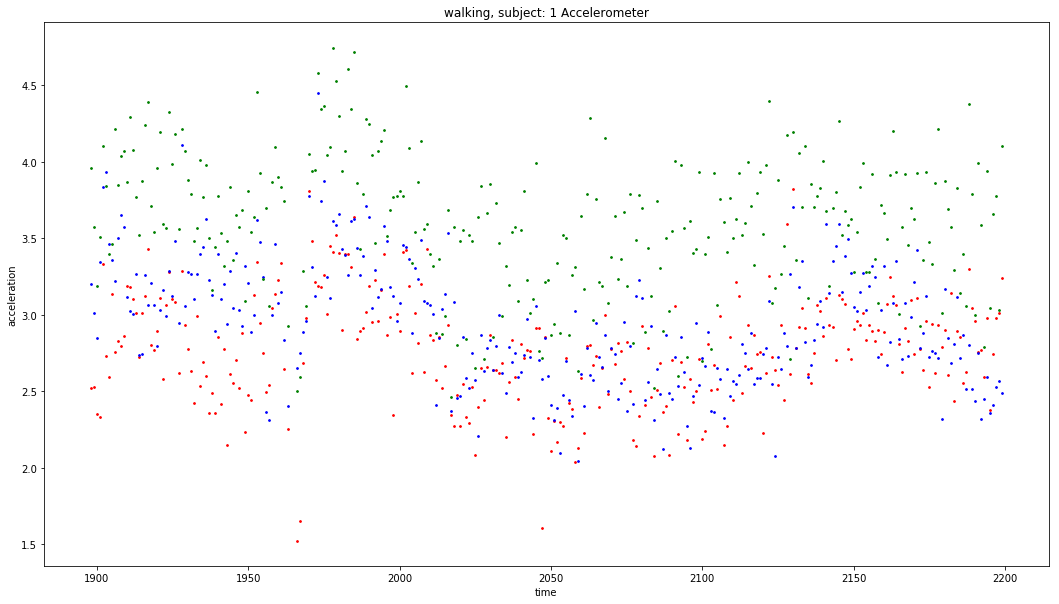

<Figure size 432x288 with 0 Axes>

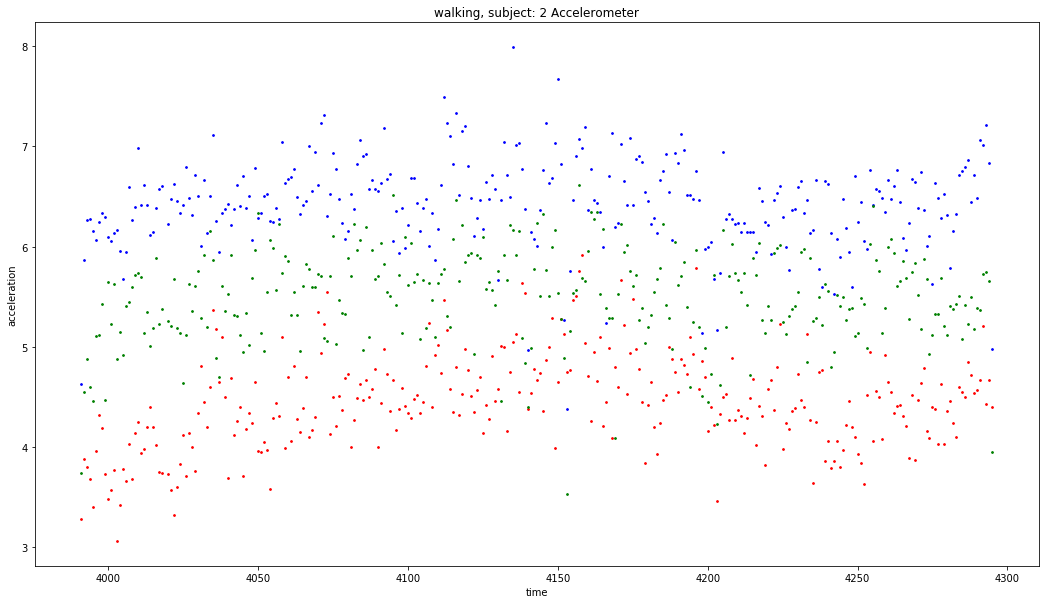

<Figure size 432x288 with 0 Axes>

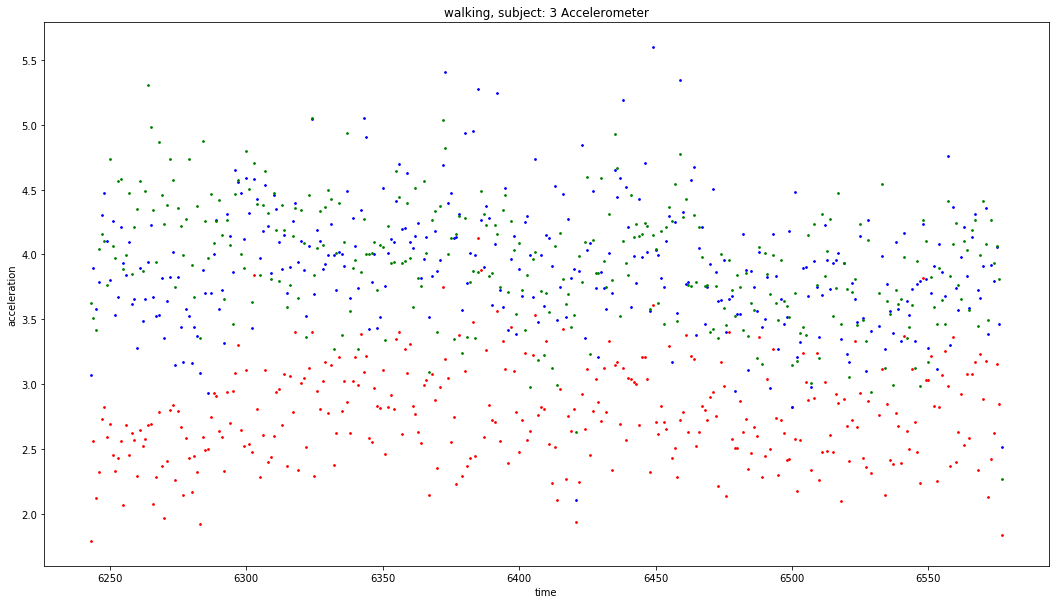

<Figure size 432x288 with 0 Axes>

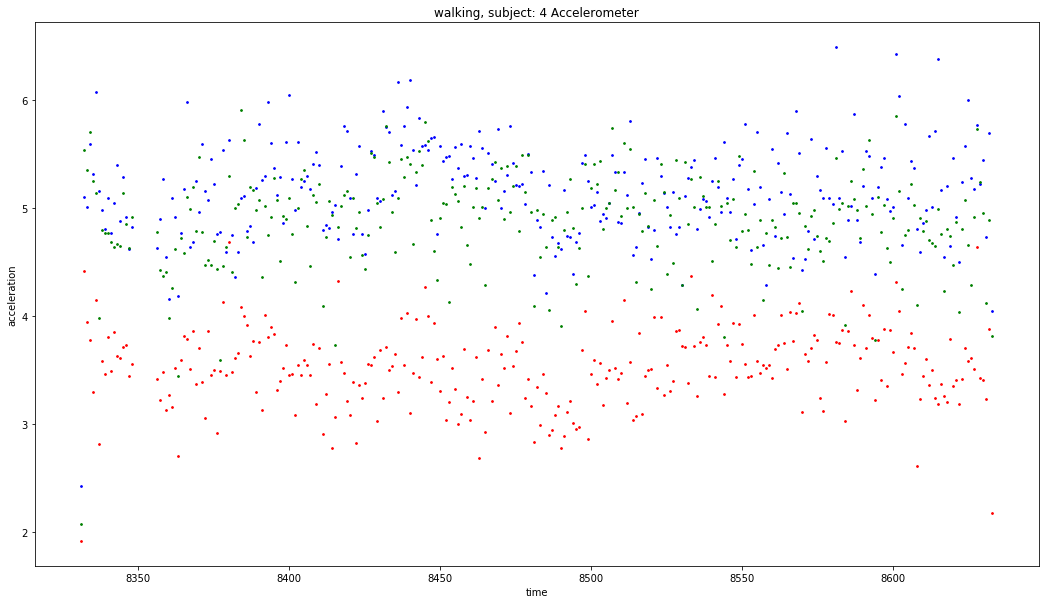

<Figure size 432x288 with 0 Axes>

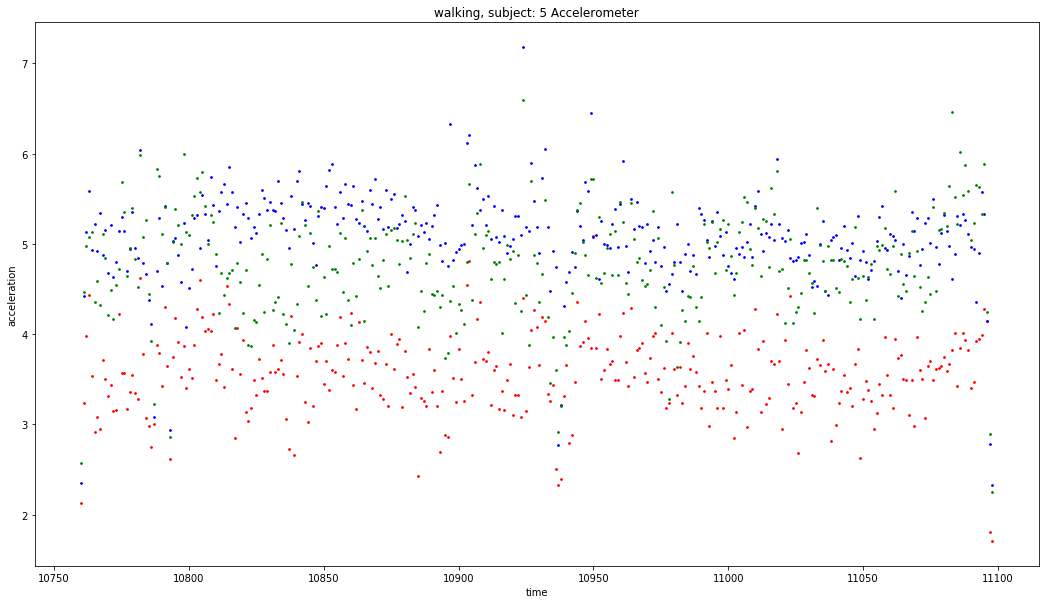

<Figure size 432x288 with 0 Axes>

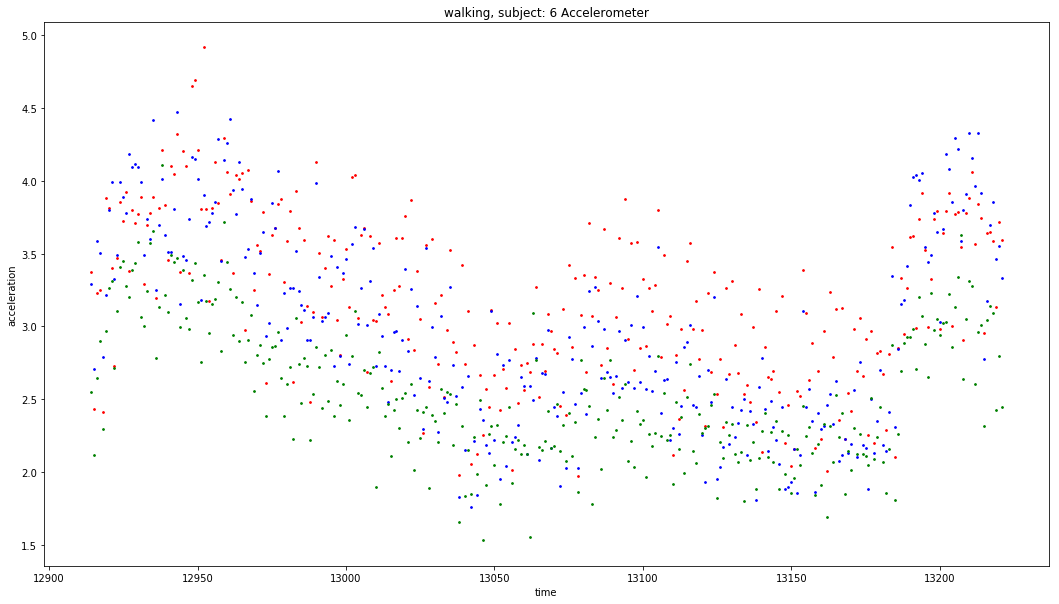

<Figure size 432x288 with 0 Axes>

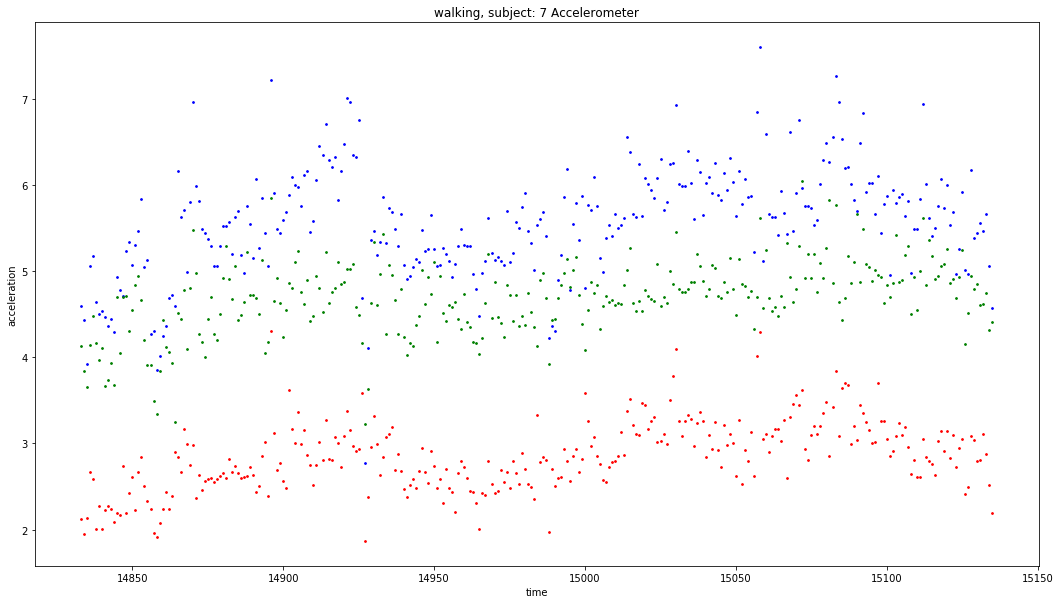

<Figure size 432x288 with 0 Axes>

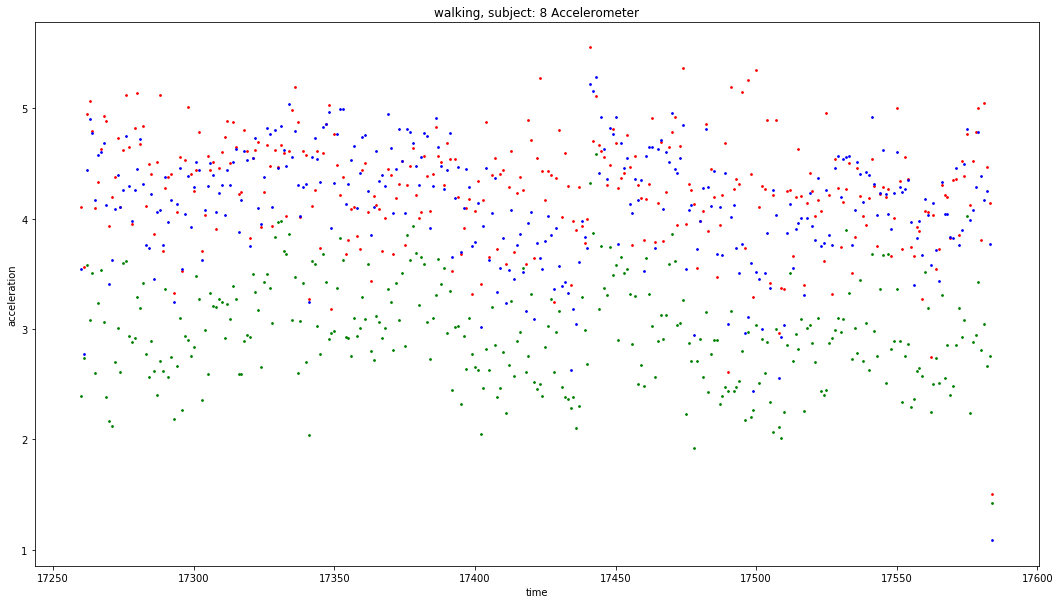

<Figure size 432x288 with 0 Axes>

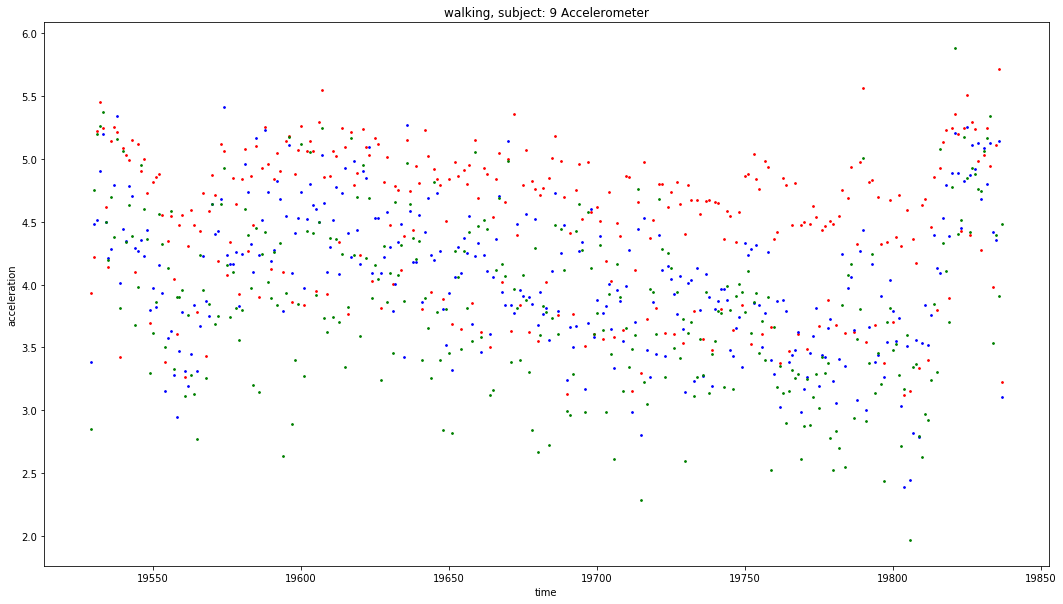

<Figure size 432x288 with 0 Axes>

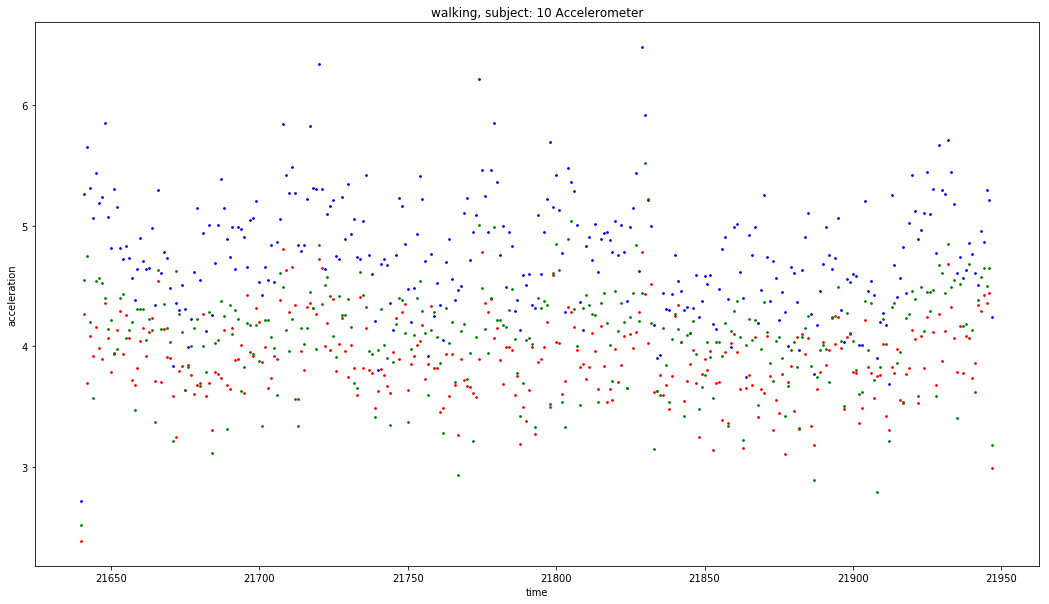

<Figure size 432x288 with 0 Axes>

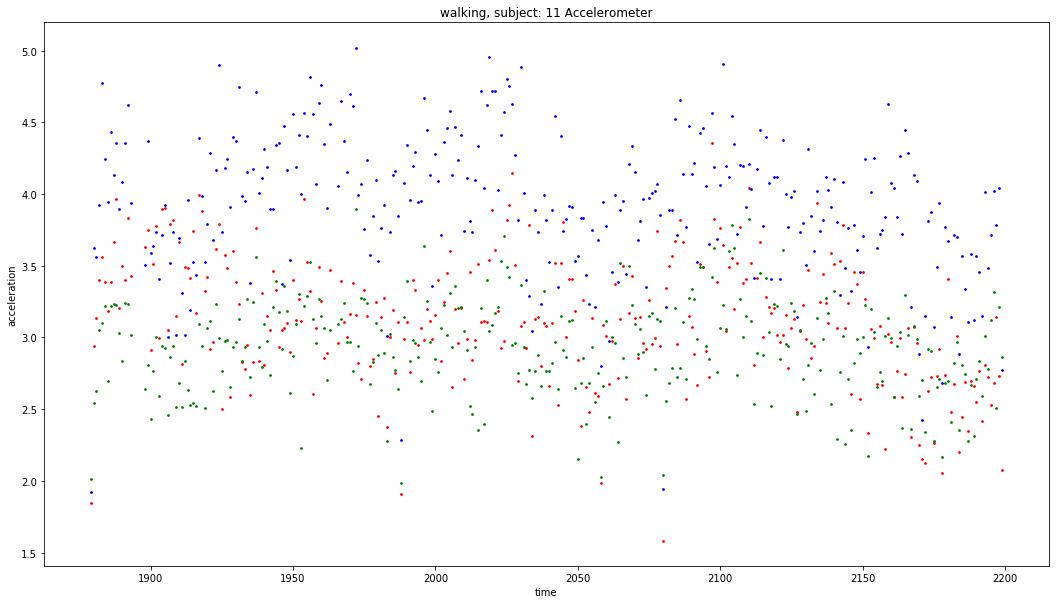

<Figure size 432x288 with 0 Axes>

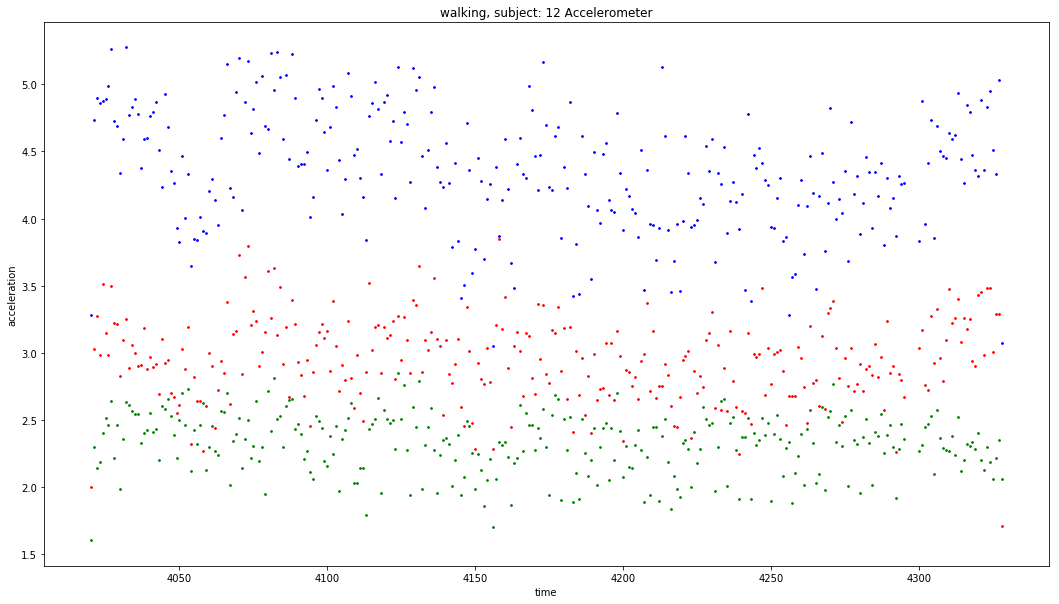

<Figure size 432x288 with 0 Axes>

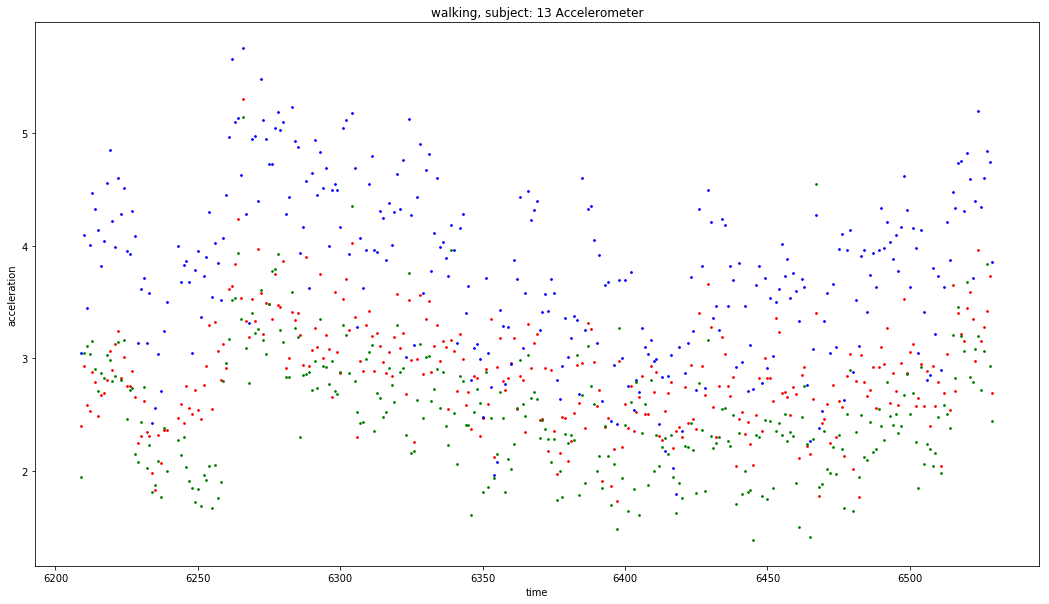

<Figure size 432x288 with 0 Axes>

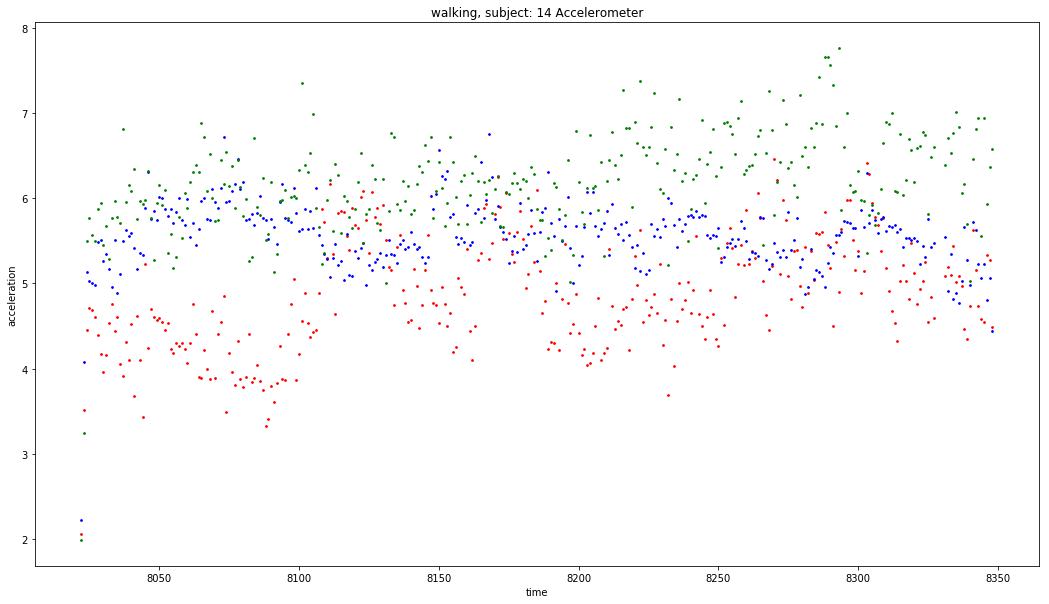

<Figure size 432x288 with 0 Axes>

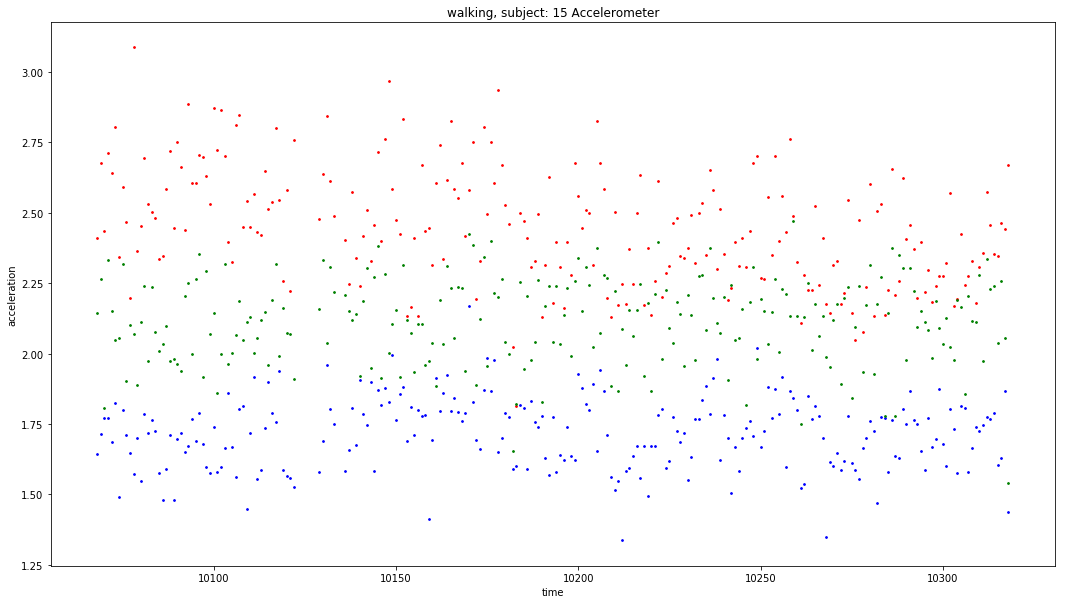

In [47]:
# check plots to see if they look consistent now that we have dropped bad samples

activities =["climbingdown","climbingup","jumping","lying","running","sitting","walking"]
# standing is left out because we did not change it

# keep only the data that is NOT in samples_to_drop
for activity in activities: 
    data = deviation[~deviation.sample_num.isin(samples_to_drop)]
    plot_std(data,activity)